# Import & overview

In [7]:
from pathlib import Path

# Data manipulation
import pandas as pd
import numpy as np
import re
from pprint import pprint

# Options for pandas
pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Visual Pandas settings
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:85% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier

path_dir = Path("./data/")

# fixed random state
rs = 1022

In [8]:
try:
    df = pd.read_csv(path_dir/'train.csv')
except:
    df = pd.read_csv('https://lms.skillfactory.ru/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block@train.csv')

In [10]:
df.head(30)

PassengerId  Survived  Pclass                                                       Name     Sex   Age  SibSp  Parch            Ticket      Fare        Cabin Embarked
0             1         0       3                                    Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171    7.2500          NaN        S
1             2         1       1        Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0          PC 17599   71.2833          C85        C
2             3         1       3                                     Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282    7.9250          NaN        S
3             4         1       1               Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803   53.1000         C123        S
4             5         0       3                                   Allen, Mr. William Henry    male  35.0      0      0            373450    8.0500          NaN        S
5             6         0       3                                           Moran, Mr. James    male   NaN      0      0            330877    8.4583          NaN        Q
6             7         0       1                                    McCarthy, Mr. Timothy J    male  54.0      0      0             17463   51.8625          E46        S
7             8         0       3                             Palsson, Master. Gosta Leonard    male   2.0      3      1            349909   21.0750          NaN        S
8             9         1       3          Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0      2            347742   11.1333          NaN        S
9            10         1       2                        Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1      0            237736   30.0708          NaN        C
10           11         1       3                            Sandstrom, Miss. Marguerite Rut  female   4.0      1      1           PP 9549   16.7000           G6        S
11           12         1       1                                   Bonnell, Miss. Elizabeth  female  58.0      0      0            113783   26.5500         C103        S
12           13         0       3                             Saundercock, Mr. William Henry    male  20.0      0      0         A/5. 2151    8.0500          NaN        S
13           14         0       3                                Andersson, Mr. Anders Johan    male  39.0      1      5            347082   31.2750          NaN        S
14           15         0       3                       Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0      0            350406    7.8542          NaN        S
15           16         1       2                           Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0      0            248706   16.0000          NaN        S
16           17         0       3                                       Rice, Master. Eugene    male   2.0      4      1            382652   29.1250          NaN        Q
17           18         1       2                               Williams, Mr. Charles Eugene    male   NaN      0      0            244373   13.0000          NaN        S
18           19         0       3    Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)  female  31.0      1      0            345763   18.0000          NaN        S
19           20         1       3                                    Masselmani, Mrs. Fatima  female   NaN      0      0              2649    7.2250          NaN        C
20           21         0       2                                       Fynney, Mr. Joseph J    male  35.0      0      0            239865   26.0000          NaN        S
21           22         1       2                                      Beesley, Mr. Lawrence    male  34.0      0      0            248698   13.0000          D56        S
22           23         1       3                                McGowa

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [13]:
# checkers


def check_missings(df: pd.DataFrame) -> pd.DataFrame:
    """
    Функция для вычисления среднего и общего числа пропусков.
    :param df: Набор данных для вычисления статистики.
    :return: Датафрейм со статистикой распределения пропусков.
    """
    na = df.isnull().sum()
    result = pd.DataFrame(data={"Кол-во уникальных": df.nunique(),
                                "Кол-во заполненных": df.shape[0] - na,
                                "Кол-во пропусков": na,
                                "Доля пропусков, %": 100 * na / df.shape[0],
                                "Тип": df.dtypes})
    print(f"Total NA-values = {na.sum()}")
    return result

def pass_value(df): # пропущенные значения бары
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = False)
        .plot(kind= 'bar', figsize=(20,5))
    );

In [14]:
check_missings(df)

Total NA-values = 866


Кол-во уникальных  Кол-во заполненных  Кол-во пропусков  Доля пропусков, %      Тип
PassengerId                891                 891                 0           0.000000    int64
Survived                     2                 891                 0           0.000000    int64
Pclass                       3                 891                 0           0.000000    int64
Name                       891                 891                 0           0.000000   object
Sex                          2                 891                 0           0.000000   object
Age                         88                 714               177          19.865320  float64
SibSp                        7                 891                 0           0.000000    int64
Parch                        7                 891                 0           0.000000    int64
Ticket                     681                 891                 0           0.000000   object
Fare                       248                 891                 0           0.000000  float64
Cabin                      147                 204               687          77.104377   object
Embarked                     3                 889                 2           0.224467   object

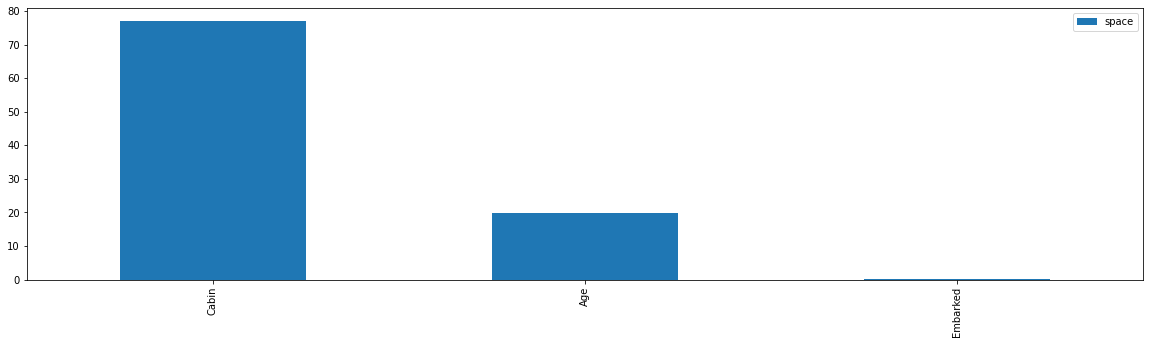

In [15]:
pass_value(df)

# Preprocessing

In [16]:
#to snake_case

df.columns = [x.lower() for x in df.columns]

In [17]:
df

passengerid  survived  pclass                                                 name     sex   age  sibsp  parch            ticket     fare cabin embarked
0              1         0       3                              Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0          PC 17599  71.2833   C85        C
2              3         1       3                               Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3              4         1       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4              5         0       3                             Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
..           ...       ...     ...                                                  ...     ...   ...    ...    ...               ...      ...   ...      ...
886          887         0       2                                Montvila, Rev. Juozas    male  27.0      0      0            211536  13.0000   NaN        S
887          888         1       1                         Graham, Miss. Margaret Edith  female  19.0      0      0            112053  30.0000   B42        S
888          889         0       3             Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1      2        W./C. 6607  23.4500   NaN        S
889          890         1       1                                Behr, Mr. Karl Howell    male  26.0      0      0            111369  30.0000  C148        C
890          891         0       3                                  Dooley, Mr. Patrick    male  32.0      0      0            370376   7.7500   NaN        Q

[891 rows x 12 columns]

Пропуски в возрасте заполним медианным значением

In [18]:
df.age.fillna(df.age.median(), inplace=True)

Удалим ненужные для обучения столбцы `Name`, `Cabin`, `Ticket` и установим `PassengerId` в качестве индекса, а также закодируем категориальные переменные для обучения

In [19]:
df = df \
    .drop(['name', 'cabin', 'ticket'], axis=1) \
    .set_index('passengerid')

In [20]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked
passengerid                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S

In [21]:
# Оставшиеся два пропуска удалим

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


# EDA

In [22]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked
passengerid                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S
...               ...     ...     ...   ...    ...    ...      ...      ...
887                 0       2    male  27.0      0      0  13.0000        S
888                 1       1  female  19.0      0      0  30.0000        S
889                 0       3  female  28.0      1      2  23.4500        S
890                 1       1    male  26.0      0      0  30.0000        C
891                 0       3    male  32.0      0      0   7.7500        Q

[889 rows x 8 columns]

Взглянем на распределения

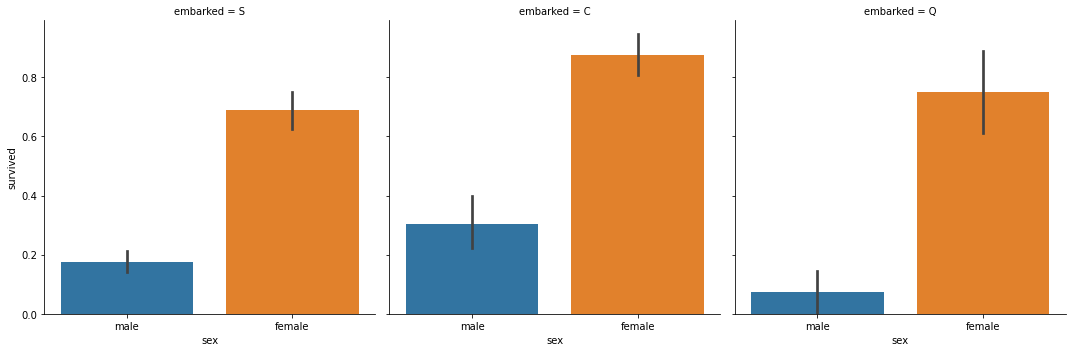

In [23]:
# распределение выживших по портам

sns.catplot(data=df, x='sex', y='survived', col='embarked', kind='bar');

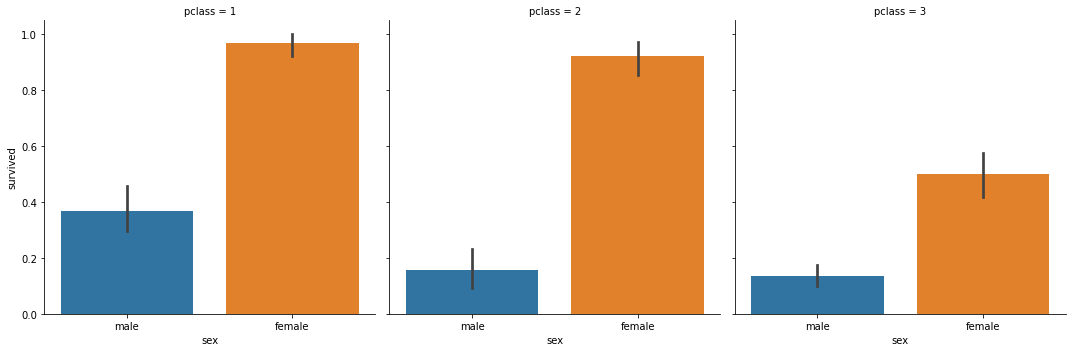

In [24]:
# распределение выживших по класам

sns.catplot(data=df, x='sex', y='survived', col='pclass', kind='bar');

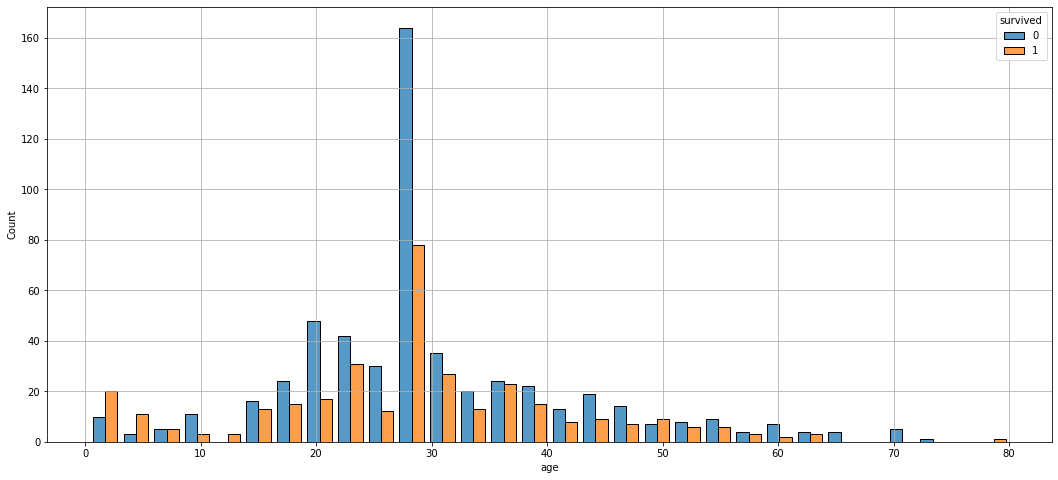

In [25]:
# распределение выживших по возрасту

fig, ax = plt.subplots(figsize=(18,8))
sns.histplot(df, x='age', hue='survived', shrink=.8, multiple='dodge')
ax.grid()
plt.show()

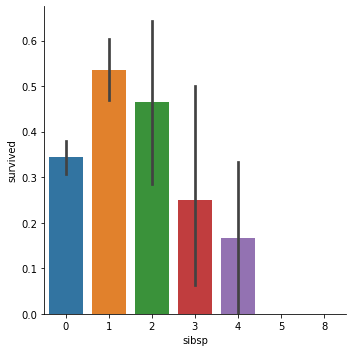

In [26]:
# влияние наличия родственников на выживание

sns.catplot(data=df, x='sibsp', y='survived', kind='bar');

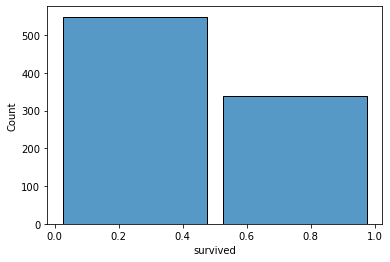

In [27]:
sns.histplot(data=df, x='survived', bins=2, shrink=0.9);

In [28]:
# Кодировка

cols_to_code = ['sex', 'embarked']

for col in cols_to_code:
    df[col] = df[col].astype('category')
    df[f'{col}_cat'] = df[col].cat.codes
    df.drop(col, axis=1, inplace=True)

# Подбор параметров и обучение

In [29]:
# Выделение признаков и разделение выборок

x = df.drop('survived', axis=1)
y = df['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=rs, stratify=y)

In [31]:
df

survived  pclass   age  sibsp  parch     fare  sex_cat  embarked_cat
passengerid                                                                      
1                   0       3  22.0      1      0   7.2500        1             2
2                   1       1  38.0      1      0  71.2833        0             0
3                   1       3  26.0      0      0   7.9250        0             2
4                   1       1  35.0      1      0  53.1000        0             2
5                   0       3  35.0      0      0   8.0500        1             2
...               ...     ...   ...    ...    ...      ...      ...           ...
887                 0       2  27.0      0      0  13.0000        1             2
888                 1       1  19.0      0      0  30.0000        0             2
889                 0       3  28.0      1      2  23.4500        0             2
890                 1       1  26.0      0      0  30.0000        1             0
891                 0       3  32.0      0      0   7.7500        1             1

[889 rows x 8 columns]

In [32]:
# стандартизируем признаки

numeric = ['age', 'fare', 'pclass', 'parch', 'embarked_cat', 'sex_cat', 'sibsp']

scaler = StandardScaler()
x_train[numeric] = scaler.fit_transform(x_train[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

## KNN

In [33]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,21)}
grid = GridSearchCV(knn, params, cv=20, scoring='f1')

In [34]:
%%time

grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
knn_best_est = grid.best_estimator_
knn_score = grid.best_score_

0.7395961076238438
{'n_neighbors': 5}
CPU times: total: 1.7 s
Wall time: 1.72 s


## SVC

In [35]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [36]:
svc = SVC(random_state=rs)
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(svc, params, cv=5, scoring='f1')

In [37]:
%%time

grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
best_svc_est = grid.best_estimator_
svc_score = grid.best_score_

0.7556280243285722
{'kernel': 'rbf'}
CPU times: total: 219 ms
Wall time: 237 ms


## Random Forest

In [38]:
rfc = RandomForestClassifier(random_state=rs)
params = {'n_estimators': range(10, 50, 5),
          'max_depth': range(5, 25, 5)}
grid = GridSearchCV(rfc, params, cv=5, scoring='f1')

In [39]:
%%time

grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
best_rfc_est = grid.best_estimator_
rfc_score = grid.best_score_

{'max_depth': 10, 'n_estimators': 40}
0.7616321486517583
CPU times: total: 4.88 s
Wall time: 4.86 s


## Catboost

In [40]:
cat = CatBoostClassifier(random_state=rs)
params = {'iterations': range(100,1200,250), 
          'learning_rate': [0.01, 0.03], 
          'depth': range(2, 6, 1)}
grid = GridSearchCV(cat, params, cv=3, scoring='f1')

In [41]:
%%time

grid.fit(x_train, y_train)

0:	learn: 0.6899322	total: 144ms	remaining: 14.2s
1:	learn: 0.6867369	total: 144ms	remaining: 7.06s
2:	learn: 0.6833778	total: 144ms	remaining: 4.67s
3:	learn: 0.6798789	total: 145ms	remaining: 3.47s
4:	learn: 0.6766709	total: 145ms	remaining: 2.76s
5:	learn: 0.6736982	total: 145ms	remaining: 2.28s
6:	learn: 0.6706357	total: 146ms	remaining: 1.94s
7:	learn: 0.6676725	total: 146ms	remaining: 1.68s
8:	learn: 0.6649352	total: 146ms	remaining: 1.48s
9:	learn: 0.6619413	total: 146ms	remaining: 1.32s
10:	learn: 0.6590060	total: 147ms	remaining: 1.19s
11:	learn: 0.6559178	total: 147ms	remaining: 1.08s
12:	learn: 0.6531652	total: 147ms	remaining: 985ms
13:	learn: 0.6501742	total: 147ms	remaining: 905ms
14:	learn: 0.6476915	total: 148ms	remaining: 836ms
15:	learn: 0.6453095	total: 148ms	remaining: 776ms
16:	learn: 0.6429134	total: 148ms	remaining: 723ms
17:	learn: 0.6405167	total: 148ms	remaining: 676ms
18:	learn: 0.6380581	total: 149ms	remaining: 634ms
19:	learn: 0.6353203	total: 149ms	remaini

90:	learn: 0.5038152	total: 21.8ms	remaining: 2.15ms
91:	learn: 0.5025765	total: 22.1ms	remaining: 1.92ms
92:	learn: 0.5013557	total: 22.3ms	remaining: 1.68ms
93:	learn: 0.5001536	total: 22.5ms	remaining: 1.44ms
94:	learn: 0.4989683	total: 22.8ms	remaining: 1.2ms
95:	learn: 0.4979940	total: 23.1ms	remaining: 962us
96:	learn: 0.4968398	total: 23.3ms	remaining: 721us
97:	learn: 0.4957009	total: 23.5ms	remaining: 480us
98:	learn: 0.4949881	total: 23.8ms	remaining: 239us
99:	learn: 0.4938745	total: 24ms	remaining: 0us
0:	learn: 0.6835949	total: 247us	remaining: 24.5ms
1:	learn: 0.6744181	total: 581us	remaining: 28.5ms
2:	learn: 0.6650766	total: 830us	remaining: 26.9ms
3:	learn: 0.6556254	total: 1.08ms	remaining: 26ms
4:	learn: 0.6472650	total: 1.36ms	remaining: 25.9ms
5:	learn: 0.6398524	total: 1.63ms	remaining: 25.6ms
6:	learn: 0.6324146	total: 1.9ms	remaining: 25.2ms
7:	learn: 0.6254588	total: 2.11ms	remaining: 24.3ms
8:	learn: 0.6192564	total: 2.36ms	remaining: 23.8ms
9:	learn: 0.612571

40:	learn: 0.4749247	total: 11.8ms	remaining: 16.9ms
41:	learn: 0.4728493	total: 12.1ms	remaining: 16.7ms
42:	learn: 0.4711690	total: 12.4ms	remaining: 16.4ms
43:	learn: 0.4699027	total: 12.6ms	remaining: 16.1ms
44:	learn: 0.4688993	total: 12.9ms	remaining: 15.7ms
45:	learn: 0.4673899	total: 13.1ms	remaining: 15.4ms
46:	learn: 0.4657726	total: 13.4ms	remaining: 15.1ms
47:	learn: 0.4646533	total: 13.7ms	remaining: 14.8ms
48:	learn: 0.4633842	total: 14ms	remaining: 14.5ms
49:	learn: 0.4617832	total: 14.2ms	remaining: 14.2ms
50:	learn: 0.4596321	total: 14.5ms	remaining: 13.9ms
51:	learn: 0.4583355	total: 14.7ms	remaining: 13.6ms
52:	learn: 0.4574384	total: 15ms	remaining: 13.3ms
53:	learn: 0.4559747	total: 15.3ms	remaining: 13ms
54:	learn: 0.4548027	total: 15.6ms	remaining: 12.8ms
55:	learn: 0.4528974	total: 16ms	remaining: 12.5ms
56:	learn: 0.4517695	total: 16.2ms	remaining: 12.2ms
57:	learn: 0.4507856	total: 16.5ms	remaining: 11.9ms
58:	learn: 0.4495409	total: 16.7ms	remaining: 11.6ms
5

187:	learn: 0.4494485	total: 120ms	remaining: 103ms
188:	learn: 0.4492879	total: 121ms	remaining: 103ms
189:	learn: 0.4488073	total: 121ms	remaining: 102ms
190:	learn: 0.4483602	total: 122ms	remaining: 102ms
191:	learn: 0.4480941	total: 123ms	remaining: 101ms
192:	learn: 0.4478786	total: 123ms	remaining: 100ms
193:	learn: 0.4474705	total: 124ms	remaining: 99.8ms
194:	learn: 0.4471375	total: 125ms	remaining: 99.2ms
195:	learn: 0.4468265	total: 125ms	remaining: 98.6ms
196:	learn: 0.4465007	total: 126ms	remaining: 98ms
197:	learn: 0.4458954	total: 127ms	remaining: 97.4ms
198:	learn: 0.4457000	total: 128ms	remaining: 96.8ms
199:	learn: 0.4451115	total: 128ms	remaining: 96.2ms
200:	learn: 0.4448631	total: 129ms	remaining: 95.6ms
201:	learn: 0.4444375	total: 130ms	remaining: 95ms
202:	learn: 0.4440555	total: 130ms	remaining: 94.4ms
203:	learn: 0.4438577	total: 131ms	remaining: 93.8ms
204:	learn: 0.4435426	total: 132ms	remaining: 93.2ms
205:	learn: 0.4433810	total: 132ms	remaining: 92.6ms
206

45:	learn: 0.5364744	total: 29.8ms	remaining: 197ms
46:	learn: 0.5349727	total: 30.6ms	remaining: 197ms
47:	learn: 0.5324695	total: 31.3ms	remaining: 197ms
48:	learn: 0.5310754	total: 32.1ms	remaining: 197ms
49:	learn: 0.5297110	total: 32.8ms	remaining: 197ms
50:	learn: 0.5277734	total: 33.5ms	remaining: 196ms
51:	learn: 0.5264029	total: 34.1ms	remaining: 196ms
52:	learn: 0.5252235	total: 34.9ms	remaining: 196ms
53:	learn: 0.5237855	total: 35.7ms	remaining: 196ms
54:	learn: 0.5224279	total: 36.5ms	remaining: 196ms
55:	learn: 0.5202132	total: 37.1ms	remaining: 195ms
56:	learn: 0.5189634	total: 37.8ms	remaining: 194ms
57:	learn: 0.5175414	total: 38.5ms	remaining: 194ms
58:	learn: 0.5169280	total: 39.2ms	remaining: 193ms
59:	learn: 0.5156349	total: 40ms	remaining: 193ms
60:	learn: 0.5145347	total: 40.6ms	remaining: 192ms
61:	learn: 0.5134132	total: 41.2ms	remaining: 192ms
62:	learn: 0.5114103	total: 41.9ms	remaining: 191ms
63:	learn: 0.5098673	total: 42.6ms	remaining: 190ms
64:	learn: 0.5

299:	learn: 0.4196331	total: 198ms	remaining: 33ms
300:	learn: 0.4195211	total: 199ms	remaining: 32.4ms
301:	learn: 0.4193250	total: 200ms	remaining: 31.8ms
302:	learn: 0.4192095	total: 201ms	remaining: 31.1ms
303:	learn: 0.4190942	total: 201ms	remaining: 30.4ms
304:	learn: 0.4189891	total: 202ms	remaining: 29.8ms
305:	learn: 0.4188189	total: 203ms	remaining: 29.1ms
306:	learn: 0.4187517	total: 203ms	remaining: 28.5ms
307:	learn: 0.4186423	total: 204ms	remaining: 27.8ms
308:	learn: 0.4184194	total: 205ms	remaining: 27.1ms
309:	learn: 0.4183683	total: 205ms	remaining: 26.5ms
310:	learn: 0.4182577	total: 206ms	remaining: 25.8ms
311:	learn: 0.4181609	total: 206ms	remaining: 25.1ms
312:	learn: 0.4178442	total: 207ms	remaining: 24.5ms
313:	learn: 0.4177451	total: 208ms	remaining: 23.8ms
314:	learn: 0.4175621	total: 208ms	remaining: 23.1ms
315:	learn: 0.4173472	total: 209ms	remaining: 22.5ms
316:	learn: 0.4172551	total: 210ms	remaining: 21.8ms
317:	learn: 0.4171486	total: 210ms	remaining: 21

157:	learn: 0.4174766	total: 105ms	remaining: 128ms
158:	learn: 0.4169556	total: 106ms	remaining: 128ms
159:	learn: 0.4166245	total: 107ms	remaining: 127ms
160:	learn: 0.4164042	total: 108ms	remaining: 126ms
161:	learn: 0.4161652	total: 108ms	remaining: 126ms
162:	learn: 0.4158338	total: 109ms	remaining: 125ms
163:	learn: 0.4155568	total: 109ms	remaining: 124ms
164:	learn: 0.4152887	total: 110ms	remaining: 124ms
165:	learn: 0.4149750	total: 111ms	remaining: 123ms
166:	learn: 0.4145764	total: 112ms	remaining: 122ms
167:	learn: 0.4144069	total: 112ms	remaining: 122ms
168:	learn: 0.4141924	total: 113ms	remaining: 121ms
169:	learn: 0.4137119	total: 114ms	remaining: 120ms
170:	learn: 0.4134562	total: 114ms	remaining: 120ms
171:	learn: 0.4127968	total: 115ms	remaining: 119ms
172:	learn: 0.4124488	total: 116ms	remaining: 119ms
173:	learn: 0.4121607	total: 117ms	remaining: 118ms
174:	learn: 0.4119479	total: 117ms	remaining: 117ms
175:	learn: 0.4117963	total: 118ms	remaining: 117ms
176:	learn: 

13:	learn: 0.5541130	total: 9.63ms	remaining: 231ms
14:	learn: 0.5467954	total: 10.4ms	remaining: 232ms
15:	learn: 0.5420544	total: 11.1ms	remaining: 232ms
16:	learn: 0.5379207	total: 11.7ms	remaining: 230ms
17:	learn: 0.5360711	total: 12.3ms	remaining: 228ms
18:	learn: 0.5337981	total: 13ms	remaining: 227ms
19:	learn: 0.5276798	total: 13.7ms	remaining: 226ms
20:	learn: 0.5241990	total: 14.4ms	remaining: 225ms
21:	learn: 0.5208556	total: 15ms	remaining: 224ms
22:	learn: 0.5178752	total: 15.7ms	remaining: 223ms
23:	learn: 0.5147857	total: 16.4ms	remaining: 223ms
24:	learn: 0.5122016	total: 17.1ms	remaining: 222ms
25:	learn: 0.5074893	total: 17.9ms	remaining: 223ms
26:	learn: 0.5047709	total: 18.6ms	remaining: 222ms
27:	learn: 0.5023126	total: 19.3ms	remaining: 222ms
28:	learn: 0.4982396	total: 20ms	remaining: 221ms
29:	learn: 0.4954490	total: 20.6ms	remaining: 220ms
30:	learn: 0.4925694	total: 21.2ms	remaining: 218ms
31:	learn: 0.4906277	total: 21.8ms	remaining: 217ms
32:	learn: 0.48720

272:	learn: 0.3669426	total: 178ms	remaining: 50.2ms
273:	learn: 0.3666788	total: 179ms	remaining: 49.6ms
274:	learn: 0.3665215	total: 179ms	remaining: 48.9ms
275:	learn: 0.3662323	total: 180ms	remaining: 48.3ms
276:	learn: 0.3659446	total: 181ms	remaining: 47.6ms
277:	learn: 0.3655732	total: 181ms	remaining: 47ms
278:	learn: 0.3652668	total: 182ms	remaining: 46.4ms
279:	learn: 0.3650297	total: 183ms	remaining: 45.7ms
280:	learn: 0.3646412	total: 184ms	remaining: 45.1ms
281:	learn: 0.3645073	total: 184ms	remaining: 44.5ms
282:	learn: 0.3642592	total: 185ms	remaining: 43.8ms
283:	learn: 0.3641833	total: 186ms	remaining: 43.2ms
284:	learn: 0.3640408	total: 186ms	remaining: 42.5ms
285:	learn: 0.3639387	total: 187ms	remaining: 41.9ms
286:	learn: 0.3636957	total: 188ms	remaining: 41.2ms
287:	learn: 0.3636271	total: 189ms	remaining: 40.6ms
288:	learn: 0.3633292	total: 189ms	remaining: 39.9ms
289:	learn: 0.3629956	total: 190ms	remaining: 39.3ms
290:	learn: 0.3629060	total: 191ms	remaining: 38

128:	learn: 0.4081015	total: 88.2ms	remaining: 151ms
129:	learn: 0.4077120	total: 88.9ms	remaining: 150ms
130:	learn: 0.4074921	total: 89.6ms	remaining: 150ms
131:	learn: 0.4073478	total: 90.2ms	remaining: 149ms
132:	learn: 0.4072929	total: 90.9ms	remaining: 148ms
133:	learn: 0.4070849	total: 91.6ms	remaining: 148ms
134:	learn: 0.4067705	total: 92.3ms	remaining: 147ms
135:	learn: 0.4064324	total: 93ms	remaining: 146ms
136:	learn: 0.4060271	total: 93.6ms	remaining: 146ms
137:	learn: 0.4058654	total: 94.3ms	remaining: 145ms
138:	learn: 0.4053974	total: 95ms	remaining: 144ms
139:	learn: 0.4051551	total: 95.8ms	remaining: 144ms
140:	learn: 0.4050844	total: 96.4ms	remaining: 143ms
141:	learn: 0.4049355	total: 97ms	remaining: 142ms
142:	learn: 0.4046495	total: 97.7ms	remaining: 141ms
143:	learn: 0.4044358	total: 98.4ms	remaining: 141ms
144:	learn: 0.4042819	total: 99.2ms	remaining: 140ms
145:	learn: 0.4041597	total: 99.8ms	remaining: 140ms
146:	learn: 0.4037515	total: 101ms	remaining: 139ms


1:	learn: 0.6656337	total: 1.55ms	remaining: 270ms
2:	learn: 0.6479950	total: 2.38ms	remaining: 275ms
3:	learn: 0.6375012	total: 3.05ms	remaining: 264ms
4:	learn: 0.6193919	total: 3.81ms	remaining: 263ms
5:	learn: 0.6052021	total: 4.52ms	remaining: 259ms
6:	learn: 0.5921886	total: 5.28ms	remaining: 259ms
7:	learn: 0.5845416	total: 6.01ms	remaining: 257ms
8:	learn: 0.5731700	total: 6.75ms	remaining: 256ms
9:	learn: 0.5602446	total: 7.49ms	remaining: 255ms
10:	learn: 0.5484482	total: 8.24ms	remaining: 254ms
11:	learn: 0.5416675	total: 9.01ms	remaining: 254ms
12:	learn: 0.5333286	total: 9.75ms	remaining: 253ms
13:	learn: 0.5283695	total: 10.5ms	remaining: 252ms
14:	learn: 0.5190850	total: 11.2ms	remaining: 251ms
15:	learn: 0.5144317	total: 12ms	remaining: 250ms
16:	learn: 0.5062874	total: 12.7ms	remaining: 248ms
17:	learn: 0.5017045	total: 13.4ms	remaining: 247ms
18:	learn: 0.4983814	total: 14.1ms	remaining: 245ms
19:	learn: 0.4914667	total: 14.7ms	remaining: 243ms
20:	learn: 0.4891952	to

229:	learn: 0.3508483	total: 160ms	remaining: 83.5ms
230:	learn: 0.3506809	total: 161ms	remaining: 82.8ms
231:	learn: 0.3504784	total: 161ms	remaining: 82.1ms
232:	learn: 0.3501709	total: 162ms	remaining: 81.4ms
233:	learn: 0.3499677	total: 163ms	remaining: 80.7ms
234:	learn: 0.3498041	total: 163ms	remaining: 80ms
235:	learn: 0.3496161	total: 164ms	remaining: 79.3ms
236:	learn: 0.3493974	total: 165ms	remaining: 78.6ms
237:	learn: 0.3491081	total: 165ms	remaining: 77.9ms
238:	learn: 0.3489276	total: 166ms	remaining: 77.2ms
239:	learn: 0.3486337	total: 167ms	remaining: 76.5ms
240:	learn: 0.3483337	total: 168ms	remaining: 75.8ms
241:	learn: 0.3482522	total: 168ms	remaining: 75.1ms
242:	learn: 0.3479259	total: 169ms	remaining: 74.4ms
243:	learn: 0.3476781	total: 170ms	remaining: 73.7ms
244:	learn: 0.3475394	total: 171ms	remaining: 73.1ms
245:	learn: 0.3473981	total: 171ms	remaining: 72.4ms
246:	learn: 0.3472150	total: 172ms	remaining: 71.7ms
247:	learn: 0.3470405	total: 172ms	remaining: 70

87:	learn: 0.4973561	total: 60.3ms	remaining: 351ms
88:	learn: 0.4967505	total: 61ms	remaining: 350ms
89:	learn: 0.4960079	total: 61.7ms	remaining: 350ms
90:	learn: 0.4954607	total: 62.4ms	remaining: 349ms
91:	learn: 0.4946740	total: 63.1ms	remaining: 348ms
92:	learn: 0.4938026	total: 63.8ms	remaining: 348ms
93:	learn: 0.4930447	total: 64.5ms	remaining: 347ms
94:	learn: 0.4923473	total: 65.1ms	remaining: 346ms
95:	learn: 0.4920046	total: 65.8ms	remaining: 346ms
96:	learn: 0.4912995	total: 66.5ms	remaining: 345ms
97:	learn: 0.4904811	total: 67.3ms	remaining: 345ms
98:	learn: 0.4897893	total: 68ms	remaining: 344ms
99:	learn: 0.4890164	total: 68.7ms	remaining: 344ms
100:	learn: 0.4883950	total: 69.5ms	remaining: 343ms
101:	learn: 0.4877575	total: 70.2ms	remaining: 343ms
102:	learn: 0.4870585	total: 71ms	remaining: 343ms
103:	learn: 0.4864405	total: 71.7ms	remaining: 342ms
104:	learn: 0.4859441	total: 72.3ms	remaining: 341ms
105:	learn: 0.4854845	total: 73.1ms	remaining: 341ms
106:	learn: 

337:	learn: 0.4151203	total: 229ms	remaining: 178ms
338:	learn: 0.4149282	total: 230ms	remaining: 177ms
339:	learn: 0.4148163	total: 231ms	remaining: 176ms
340:	learn: 0.4146280	total: 231ms	remaining: 176ms
341:	learn: 0.4142678	total: 232ms	remaining: 175ms
342:	learn: 0.4139906	total: 233ms	remaining: 175ms
343:	learn: 0.4136416	total: 234ms	remaining: 174ms
344:	learn: 0.4134689	total: 234ms	remaining: 173ms
345:	learn: 0.4134058	total: 235ms	remaining: 173ms
346:	learn: 0.4133314	total: 236ms	remaining: 172ms
347:	learn: 0.4131893	total: 237ms	remaining: 171ms
348:	learn: 0.4130710	total: 237ms	remaining: 171ms
349:	learn: 0.4128271	total: 238ms	remaining: 170ms
350:	learn: 0.4126467	total: 239ms	remaining: 169ms
351:	learn: 0.4125209	total: 239ms	remaining: 169ms
352:	learn: 0.4123205	total: 240ms	remaining: 168ms
353:	learn: 0.4121367	total: 241ms	remaining: 167ms
354:	learn: 0.4120263	total: 241ms	remaining: 167ms
355:	learn: 0.4119298	total: 242ms	remaining: 166ms
356:	learn: 

590:	learn: 0.3844157	total: 397ms	remaining: 6.05ms
591:	learn: 0.3843609	total: 398ms	remaining: 5.38ms
592:	learn: 0.3843380	total: 399ms	remaining: 4.71ms
593:	learn: 0.3842613	total: 399ms	remaining: 4.03ms
594:	learn: 0.3842014	total: 400ms	remaining: 3.36ms
595:	learn: 0.3841217	total: 401ms	remaining: 2.69ms
596:	learn: 0.3840574	total: 401ms	remaining: 2.02ms
597:	learn: 0.3838837	total: 402ms	remaining: 1.34ms
598:	learn: 0.3837134	total: 403ms	remaining: 672us
599:	learn: 0.3835234	total: 403ms	remaining: 0us
0:	learn: 0.6886347	total: 698us	remaining: 418ms
1:	learn: 0.6846059	total: 1.4ms	remaining: 420ms
2:	learn: 0.6806714	total: 2.08ms	remaining: 415ms
3:	learn: 0.6744756	total: 2.8ms	remaining: 417ms
4:	learn: 0.6684376	total: 3.46ms	remaining: 412ms
5:	learn: 0.6633265	total: 4.18ms	remaining: 414ms
6:	learn: 0.6583444	total: 4.86ms	remaining: 411ms
7:	learn: 0.6549601	total: 5.49ms	remaining: 406ms
8:	learn: 0.6501839	total: 6.14ms	remaining: 403ms
9:	learn: 0.644751

205:	learn: 0.4359681	total: 133ms	remaining: 255ms
206:	learn: 0.4357889	total: 134ms	remaining: 254ms
207:	learn: 0.4356915	total: 135ms	remaining: 254ms
208:	learn: 0.4355541	total: 135ms	remaining: 253ms
209:	learn: 0.4351348	total: 136ms	remaining: 252ms
210:	learn: 0.4348855	total: 137ms	remaining: 252ms
211:	learn: 0.4346063	total: 137ms	remaining: 251ms
212:	learn: 0.4343380	total: 138ms	remaining: 250ms
213:	learn: 0.4342414	total: 139ms	remaining: 250ms
214:	learn: 0.4339539	total: 139ms	remaining: 249ms
215:	learn: 0.4337693	total: 140ms	remaining: 249ms
216:	learn: 0.4335263	total: 141ms	remaining: 248ms
217:	learn: 0.4332032	total: 141ms	remaining: 248ms
218:	learn: 0.4330567	total: 142ms	remaining: 247ms
219:	learn: 0.4328492	total: 143ms	remaining: 247ms
220:	learn: 0.4326011	total: 144ms	remaining: 246ms
221:	learn: 0.4324907	total: 144ms	remaining: 246ms
222:	learn: 0.4321901	total: 145ms	remaining: 245ms
223:	learn: 0.4319015	total: 146ms	remaining: 244ms
224:	learn: 

467:	learn: 0.4016423	total: 301ms	remaining: 85ms
468:	learn: 0.4015300	total: 302ms	remaining: 84.4ms
469:	learn: 0.4014921	total: 303ms	remaining: 83.8ms
470:	learn: 0.4014399	total: 304ms	remaining: 83.1ms
471:	learn: 0.4013781	total: 304ms	remaining: 82.5ms
472:	learn: 0.4013588	total: 305ms	remaining: 81.8ms
473:	learn: 0.4012652	total: 305ms	remaining: 81.2ms
474:	learn: 0.4012202	total: 306ms	remaining: 80.6ms
475:	learn: 0.4010531	total: 307ms	remaining: 79.9ms
476:	learn: 0.4008508	total: 307ms	remaining: 79.3ms
477:	learn: 0.4008156	total: 308ms	remaining: 78.6ms
478:	learn: 0.4007746	total: 309ms	remaining: 78ms
479:	learn: 0.4007093	total: 310ms	remaining: 77.4ms
480:	learn: 0.4006776	total: 310ms	remaining: 76.8ms
481:	learn: 0.4006373	total: 311ms	remaining: 76.1ms
482:	learn: 0.4005777	total: 312ms	remaining: 75.5ms
483:	learn: 0.4004981	total: 312ms	remaining: 74.9ms
484:	learn: 0.4004408	total: 313ms	remaining: 74.2ms
485:	learn: 0.4003789	total: 314ms	remaining: 73.6

78:	learn: 0.4663270	total: 55.3ms	remaining: 364ms
79:	learn: 0.4647036	total: 56.1ms	remaining: 365ms
80:	learn: 0.4636857	total: 56.8ms	remaining: 364ms
81:	learn: 0.4632167	total: 57.5ms	remaining: 363ms
82:	learn: 0.4616655	total: 58.3ms	remaining: 363ms
83:	learn: 0.4610518	total: 58.9ms	remaining: 362ms
84:	learn: 0.4600901	total: 59.6ms	remaining: 361ms
85:	learn: 0.4588516	total: 60.2ms	remaining: 360ms
86:	learn: 0.4580068	total: 60.9ms	remaining: 359ms
87:	learn: 0.4568205	total: 61.6ms	remaining: 358ms
88:	learn: 0.4560733	total: 62.3ms	remaining: 357ms
89:	learn: 0.4546856	total: 62.9ms	remaining: 356ms
90:	learn: 0.4538032	total: 63.5ms	remaining: 355ms
91:	learn: 0.4532769	total: 64.2ms	remaining: 355ms
92:	learn: 0.4519590	total: 64.9ms	remaining: 354ms
93:	learn: 0.4513089	total: 65.6ms	remaining: 353ms
94:	learn: 0.4506844	total: 66.2ms	remaining: 352ms
95:	learn: 0.4503414	total: 66.8ms	remaining: 351ms
96:	learn: 0.4493064	total: 67.4ms	remaining: 350ms
97:	learn: 0

335:	learn: 0.3804029	total: 223ms	remaining: 175ms
336:	learn: 0.3802911	total: 224ms	remaining: 175ms
337:	learn: 0.3802457	total: 225ms	remaining: 174ms
338:	learn: 0.3801617	total: 225ms	remaining: 174ms
339:	learn: 0.3800893	total: 226ms	remaining: 173ms
340:	learn: 0.3799057	total: 227ms	remaining: 172ms
341:	learn: 0.3797675	total: 228ms	remaining: 172ms
342:	learn: 0.3796751	total: 228ms	remaining: 171ms
343:	learn: 0.3794949	total: 229ms	remaining: 170ms
344:	learn: 0.3793791	total: 230ms	remaining: 170ms
345:	learn: 0.3791375	total: 230ms	remaining: 169ms
346:	learn: 0.3790457	total: 231ms	remaining: 168ms
347:	learn: 0.3789235	total: 232ms	remaining: 168ms
348:	learn: 0.3788462	total: 232ms	remaining: 167ms
349:	learn: 0.3788145	total: 233ms	remaining: 166ms
350:	learn: 0.3787206	total: 234ms	remaining: 166ms
351:	learn: 0.3786448	total: 234ms	remaining: 165ms
352:	learn: 0.3785503	total: 235ms	remaining: 165ms
353:	learn: 0.3784102	total: 236ms	remaining: 164ms
354:	learn: 

595:	learn: 0.3578857	total: 392ms	remaining: 2.63ms
596:	learn: 0.3578159	total: 392ms	remaining: 1.97ms
597:	learn: 0.3577573	total: 393ms	remaining: 1.31ms
598:	learn: 0.3576631	total: 394ms	remaining: 657us
599:	learn: 0.3575886	total: 394ms	remaining: 0us
0:	learn: 0.6804599	total: 695us	remaining: 417ms
1:	learn: 0.6694241	total: 1.36ms	remaining: 407ms
2:	learn: 0.6552467	total: 1.98ms	remaining: 393ms
3:	learn: 0.6421235	total: 2.65ms	remaining: 395ms
4:	learn: 0.6287597	total: 3.35ms	remaining: 398ms
5:	learn: 0.6194524	total: 3.94ms	remaining: 390ms
6:	learn: 0.6107177	total: 4.54ms	remaining: 384ms
7:	learn: 0.6024683	total: 5.23ms	remaining: 387ms
8:	learn: 0.5928205	total: 5.88ms	remaining: 386ms
9:	learn: 0.5827745	total: 6.61ms	remaining: 390ms
10:	learn: 0.5735022	total: 7.33ms	remaining: 392ms
11:	learn: 0.5665144	total: 7.97ms	remaining: 391ms
12:	learn: 0.5592278	total: 8.62ms	remaining: 389ms
13:	learn: 0.5541130	total: 9.26ms	remaining: 387ms
14:	learn: 0.5467954	t

207:	learn: 0.3817098	total: 135ms	remaining: 254ms
208:	learn: 0.3815901	total: 135ms	remaining: 253ms
209:	learn: 0.3812939	total: 136ms	remaining: 253ms
210:	learn: 0.3809179	total: 137ms	remaining: 252ms
211:	learn: 0.3807133	total: 137ms	remaining: 252ms
212:	learn: 0.3805756	total: 138ms	remaining: 251ms
213:	learn: 0.3804125	total: 139ms	remaining: 250ms
214:	learn: 0.3802635	total: 140ms	remaining: 250ms
215:	learn: 0.3800245	total: 140ms	remaining: 249ms
216:	learn: 0.3798493	total: 141ms	remaining: 249ms
217:	learn: 0.3796331	total: 142ms	remaining: 248ms
218:	learn: 0.3793351	total: 142ms	remaining: 248ms
219:	learn: 0.3791968	total: 143ms	remaining: 247ms
220:	learn: 0.3788885	total: 144ms	remaining: 246ms
221:	learn: 0.3786972	total: 144ms	remaining: 246ms
222:	learn: 0.3785284	total: 145ms	remaining: 245ms
223:	learn: 0.3783873	total: 146ms	remaining: 244ms
224:	learn: 0.3783059	total: 146ms	remaining: 244ms
225:	learn: 0.3778830	total: 147ms	remaining: 243ms
226:	learn: 

468:	learn: 0.3301463	total: 303ms	remaining: 84.8ms
469:	learn: 0.3298914	total: 304ms	remaining: 84.1ms
470:	learn: 0.3298415	total: 305ms	remaining: 83.5ms
471:	learn: 0.3296051	total: 305ms	remaining: 82.8ms
472:	learn: 0.3294714	total: 306ms	remaining: 82.2ms
473:	learn: 0.3294372	total: 307ms	remaining: 81.5ms
474:	learn: 0.3293590	total: 308ms	remaining: 80.9ms
475:	learn: 0.3292379	total: 308ms	remaining: 80.3ms
476:	learn: 0.3290591	total: 309ms	remaining: 79.6ms
477:	learn: 0.3288798	total: 310ms	remaining: 79ms
478:	learn: 0.3288149	total: 310ms	remaining: 78.4ms
479:	learn: 0.3286902	total: 311ms	remaining: 77.8ms
480:	learn: 0.3285239	total: 312ms	remaining: 77.1ms
481:	learn: 0.3284023	total: 312ms	remaining: 76.5ms
482:	learn: 0.3282463	total: 313ms	remaining: 75.8ms
483:	learn: 0.3282128	total: 314ms	remaining: 75.2ms
484:	learn: 0.3281108	total: 314ms	remaining: 74.5ms
485:	learn: 0.3280526	total: 315ms	remaining: 73.9ms
486:	learn: 0.3279558	total: 316ms	remaining: 73

75:	learn: 0.4312541	total: 50.1ms	remaining: 345ms
76:	learn: 0.4307709	total: 50.8ms	remaining: 345ms
77:	learn: 0.4293886	total: 51.6ms	remaining: 345ms
78:	learn: 0.4288818	total: 52.3ms	remaining: 345ms
79:	learn: 0.4282074	total: 53ms	remaining: 344ms
80:	learn: 0.4279732	total: 53.6ms	remaining: 344ms
81:	learn: 0.4277028	total: 54.3ms	remaining: 343ms
82:	learn: 0.4269603	total: 54.9ms	remaining: 342ms
83:	learn: 0.4260004	total: 55.6ms	remaining: 342ms
84:	learn: 0.4254090	total: 56.3ms	remaining: 341ms
85:	learn: 0.4249332	total: 56.9ms	remaining: 340ms
86:	learn: 0.4241509	total: 57.6ms	remaining: 340ms
87:	learn: 0.4236078	total: 58.2ms	remaining: 339ms
88:	learn: 0.4229331	total: 58.9ms	remaining: 338ms
89:	learn: 0.4225773	total: 59.5ms	remaining: 337ms
90:	learn: 0.4223060	total: 60.2ms	remaining: 337ms
91:	learn: 0.4216810	total: 60.8ms	remaining: 336ms
92:	learn: 0.4212694	total: 61.4ms	remaining: 335ms
93:	learn: 0.4211304	total: 62.1ms	remaining: 334ms
94:	learn: 0.4

332:	learn: 0.3625516	total: 219ms	remaining: 175ms
333:	learn: 0.3623686	total: 219ms	remaining: 175ms
334:	learn: 0.3621866	total: 220ms	remaining: 174ms
335:	learn: 0.3619731	total: 221ms	remaining: 173ms
336:	learn: 0.3617055	total: 221ms	remaining: 173ms
337:	learn: 0.3616209	total: 222ms	remaining: 172ms
338:	learn: 0.3613121	total: 223ms	remaining: 171ms
339:	learn: 0.3610581	total: 223ms	remaining: 171ms
340:	learn: 0.3608851	total: 224ms	remaining: 170ms
341:	learn: 0.3608286	total: 225ms	remaining: 169ms
342:	learn: 0.3605743	total: 225ms	remaining: 169ms
343:	learn: 0.3604096	total: 226ms	remaining: 168ms
344:	learn: 0.3602517	total: 227ms	remaining: 167ms
345:	learn: 0.3597448	total: 227ms	remaining: 167ms
346:	learn: 0.3595148	total: 228ms	remaining: 166ms
347:	learn: 0.3593234	total: 228ms	remaining: 165ms
348:	learn: 0.3592772	total: 229ms	remaining: 165ms
349:	learn: 0.3589758	total: 230ms	remaining: 164ms
350:	learn: 0.3589227	total: 231ms	remaining: 164ms
351:	learn: 

592:	learn: 0.3213329	total: 387ms	remaining: 4.57ms
593:	learn: 0.3211646	total: 388ms	remaining: 3.92ms
594:	learn: 0.3210647	total: 389ms	remaining: 3.27ms
595:	learn: 0.3207286	total: 389ms	remaining: 2.61ms
596:	learn: 0.3206113	total: 390ms	remaining: 1.96ms
597:	learn: 0.3205198	total: 391ms	remaining: 1.31ms
598:	learn: 0.3205019	total: 392ms	remaining: 653us
599:	learn: 0.3204124	total: 392ms	remaining: 0us
0:	learn: 0.6781738	total: 655us	remaining: 392ms
1:	learn: 0.6656337	total: 1.36ms	remaining: 407ms
2:	learn: 0.6479950	total: 2.02ms	remaining: 402ms
3:	learn: 0.6375012	total: 2.72ms	remaining: 406ms
4:	learn: 0.6193919	total: 3.44ms	remaining: 410ms
5:	learn: 0.6052021	total: 4.21ms	remaining: 417ms
6:	learn: 0.5921886	total: 4.86ms	remaining: 411ms
7:	learn: 0.5845416	total: 5.45ms	remaining: 403ms
8:	learn: 0.5731700	total: 6.05ms	remaining: 398ms
9:	learn: 0.5602446	total: 6.7ms	remaining: 395ms
10:	learn: 0.5484482	total: 7.37ms	remaining: 395ms
11:	learn: 0.5416675

200:	learn: 0.3577229	total: 133ms	remaining: 265ms
201:	learn: 0.3572982	total: 134ms	remaining: 264ms
202:	learn: 0.3568555	total: 135ms	remaining: 264ms
203:	learn: 0.3566276	total: 136ms	remaining: 263ms
204:	learn: 0.3564234	total: 136ms	remaining: 263ms
205:	learn: 0.3562636	total: 137ms	remaining: 262ms
206:	learn: 0.3560012	total: 138ms	remaining: 261ms
207:	learn: 0.3558010	total: 138ms	remaining: 261ms
208:	learn: 0.3554684	total: 139ms	remaining: 260ms
209:	learn: 0.3552600	total: 140ms	remaining: 259ms
210:	learn: 0.3550137	total: 140ms	remaining: 259ms
211:	learn: 0.3548448	total: 141ms	remaining: 258ms
212:	learn: 0.3546385	total: 142ms	remaining: 258ms
213:	learn: 0.3544432	total: 143ms	remaining: 257ms
214:	learn: 0.3540787	total: 143ms	remaining: 257ms
215:	learn: 0.3538317	total: 144ms	remaining: 256ms
216:	learn: 0.3536965	total: 145ms	remaining: 256ms
217:	learn: 0.3533658	total: 146ms	remaining: 255ms
218:	learn: 0.3532574	total: 146ms	remaining: 254ms
219:	learn: 

457:	learn: 0.3127791	total: 302ms	remaining: 93.7ms
458:	learn: 0.3127098	total: 303ms	remaining: 93.1ms
459:	learn: 0.3124125	total: 304ms	remaining: 92.5ms
460:	learn: 0.3123189	total: 304ms	remaining: 91.8ms
461:	learn: 0.3121621	total: 305ms	remaining: 91.1ms
462:	learn: 0.3120168	total: 306ms	remaining: 90.5ms
463:	learn: 0.3117627	total: 307ms	remaining: 89.9ms
464:	learn: 0.3116711	total: 307ms	remaining: 89.2ms
465:	learn: 0.3116570	total: 308ms	remaining: 88.5ms
466:	learn: 0.3115153	total: 309ms	remaining: 87.9ms
467:	learn: 0.3114775	total: 309ms	remaining: 87.2ms
468:	learn: 0.3111524	total: 310ms	remaining: 86.6ms
469:	learn: 0.3110894	total: 311ms	remaining: 85.9ms
470:	learn: 0.3110235	total: 311ms	remaining: 85.3ms
471:	learn: 0.3109276	total: 312ms	remaining: 84.6ms
472:	learn: 0.3106212	total: 313ms	remaining: 84ms
473:	learn: 0.3104691	total: 313ms	remaining: 83.3ms
474:	learn: 0.3103245	total: 314ms	remaining: 82.7ms
475:	learn: 0.3096577	total: 315ms	remaining: 82

68:	learn: 0.5168847	total: 46.3ms	remaining: 524ms
69:	learn: 0.5163271	total: 47ms	remaining: 524ms
70:	learn: 0.5148866	total: 47.7ms	remaining: 524ms
71:	learn: 0.5134847	total: 48.4ms	remaining: 523ms
72:	learn: 0.5124712	total: 49.1ms	remaining: 522ms
73:	learn: 0.5109259	total: 49.7ms	remaining: 521ms
74:	learn: 0.5097535	total: 50.3ms	remaining: 520ms
75:	learn: 0.5084566	total: 51ms	remaining: 520ms
76:	learn: 0.5069999	total: 51.7ms	remaining: 519ms
77:	learn: 0.5062812	total: 52.4ms	remaining: 518ms
78:	learn: 0.5048702	total: 53.1ms	remaining: 518ms
79:	learn: 0.5040581	total: 53.8ms	remaining: 518ms
80:	learn: 0.5030604	total: 54.5ms	remaining: 517ms
81:	learn: 0.5024794	total: 55.1ms	remaining: 516ms
82:	learn: 0.5014260	total: 55.8ms	remaining: 516ms
83:	learn: 0.5008207	total: 56.5ms	remaining: 515ms
84:	learn: 0.4995053	total: 57.3ms	remaining: 515ms
85:	learn: 0.4985730	total: 57.9ms	remaining: 515ms
86:	learn: 0.4978319	total: 58.6ms	remaining: 514ms
87:	learn: 0.497

324:	learn: 0.4171837	total: 214ms	remaining: 346ms
325:	learn: 0.4171092	total: 215ms	remaining: 345ms
326:	learn: 0.4169881	total: 215ms	remaining: 344ms
327:	learn: 0.4168322	total: 216ms	remaining: 344ms
328:	learn: 0.4167118	total: 217ms	remaining: 343ms
329:	learn: 0.4165853	total: 217ms	remaining: 343ms
330:	learn: 0.4162084	total: 218ms	remaining: 342ms
331:	learn: 0.4160787	total: 219ms	remaining: 341ms
332:	learn: 0.4159371	total: 220ms	remaining: 341ms
333:	learn: 0.4158005	total: 220ms	remaining: 340ms
334:	learn: 0.4156836	total: 221ms	remaining: 340ms
335:	learn: 0.4153896	total: 221ms	remaining: 339ms
336:	learn: 0.4152889	total: 222ms	remaining: 338ms
337:	learn: 0.4151203	total: 223ms	remaining: 337ms
338:	learn: 0.4149282	total: 223ms	remaining: 337ms
339:	learn: 0.4148163	total: 224ms	remaining: 336ms
340:	learn: 0.4146280	total: 225ms	remaining: 335ms
341:	learn: 0.4142678	total: 225ms	remaining: 335ms
342:	learn: 0.4139906	total: 226ms	remaining: 334ms
343:	learn: 

586:	learn: 0.3847882	total: 384ms	remaining: 172ms
587:	learn: 0.3847056	total: 385ms	remaining: 171ms
588:	learn: 0.3846635	total: 385ms	remaining: 171ms
589:	learn: 0.3844886	total: 386ms	remaining: 170ms
590:	learn: 0.3844157	total: 386ms	remaining: 169ms
591:	learn: 0.3843609	total: 387ms	remaining: 169ms
592:	learn: 0.3843380	total: 388ms	remaining: 168ms
593:	learn: 0.3842613	total: 388ms	remaining: 167ms
594:	learn: 0.3842014	total: 389ms	remaining: 167ms
595:	learn: 0.3841217	total: 390ms	remaining: 166ms
596:	learn: 0.3840574	total: 390ms	remaining: 165ms
597:	learn: 0.3838837	total: 391ms	remaining: 165ms
598:	learn: 0.3837134	total: 392ms	remaining: 164ms
599:	learn: 0.3835234	total: 392ms	remaining: 163ms
600:	learn: 0.3834169	total: 393ms	remaining: 163ms
601:	learn: 0.3833608	total: 394ms	remaining: 162ms
602:	learn: 0.3832909	total: 394ms	remaining: 161ms
603:	learn: 0.3832396	total: 395ms	remaining: 161ms
604:	learn: 0.3831880	total: 396ms	remaining: 160ms
605:	learn: 

0:	learn: 0.6886347	total: 668us	remaining: 568ms
1:	learn: 0.6846059	total: 1.41ms	remaining: 597ms
2:	learn: 0.6806714	total: 2.04ms	remaining: 576ms
3:	learn: 0.6744756	total: 2.74ms	remaining: 579ms
4:	learn: 0.6684376	total: 3.4ms	remaining: 574ms
5:	learn: 0.6633265	total: 4.08ms	remaining: 574ms
6:	learn: 0.6583444	total: 4.73ms	remaining: 570ms
7:	learn: 0.6549601	total: 5.36ms	remaining: 564ms
8:	learn: 0.6501839	total: 6.02ms	remaining: 562ms
9:	learn: 0.6447515	total: 6.65ms	remaining: 559ms
10:	learn: 0.6394632	total: 7.34ms	remaining: 560ms
11:	learn: 0.6354967	total: 8.01ms	remaining: 559ms
12:	learn: 0.6324241	total: 8.7ms	remaining: 560ms
13:	learn: 0.6274496	total: 9.38ms	remaining: 560ms
14:	learn: 0.6226084	total: 10.1ms	remaining: 562ms
15:	learn: 0.6178962	total: 10.7ms	remaining: 557ms
16:	learn: 0.6139597	total: 11.3ms	remaining: 553ms
17:	learn: 0.6094731	total: 11.9ms	remaining: 551ms
18:	learn: 0.6051069	total: 12.5ms	remaining: 548ms
19:	learn: 0.6008566	tota

259:	learn: 0.4258340	total: 165ms	remaining: 375ms
260:	learn: 0.4257128	total: 166ms	remaining: 375ms
261:	learn: 0.4255541	total: 167ms	remaining: 374ms
262:	learn: 0.4254029	total: 167ms	remaining: 374ms
263:	learn: 0.4252575	total: 168ms	remaining: 373ms
264:	learn: 0.4251431	total: 169ms	remaining: 373ms
265:	learn: 0.4250746	total: 169ms	remaining: 372ms
266:	learn: 0.4248460	total: 170ms	remaining: 371ms
267:	learn: 0.4247209	total: 171ms	remaining: 371ms
268:	learn: 0.4244475	total: 171ms	remaining: 370ms
269:	learn: 0.4242315	total: 172ms	remaining: 370ms
270:	learn: 0.4240264	total: 173ms	remaining: 369ms
271:	learn: 0.4239219	total: 174ms	remaining: 369ms
272:	learn: 0.4238055	total: 174ms	remaining: 368ms
273:	learn: 0.4236036	total: 175ms	remaining: 367ms
274:	learn: 0.4235230	total: 175ms	remaining: 367ms
275:	learn: 0.4233144	total: 176ms	remaining: 366ms
276:	learn: 0.4231355	total: 177ms	remaining: 366ms
277:	learn: 0.4229914	total: 178ms	remaining: 365ms
278:	learn: 

518:	learn: 0.3977528	total: 335ms	remaining: 213ms
519:	learn: 0.3977198	total: 335ms	remaining: 213ms
520:	learn: 0.3976090	total: 336ms	remaining: 212ms
521:	learn: 0.3975720	total: 337ms	remaining: 212ms
522:	learn: 0.3974759	total: 337ms	remaining: 211ms
523:	learn: 0.3973695	total: 338ms	remaining: 210ms
524:	learn: 0.3972490	total: 339ms	remaining: 210ms
525:	learn: 0.3972087	total: 339ms	remaining: 209ms
526:	learn: 0.3971579	total: 340ms	remaining: 208ms
527:	learn: 0.3971202	total: 341ms	remaining: 208ms
528:	learn: 0.3970493	total: 341ms	remaining: 207ms
529:	learn: 0.3969022	total: 342ms	remaining: 206ms
530:	learn: 0.3968574	total: 343ms	remaining: 206ms
531:	learn: 0.3968380	total: 343ms	remaining: 205ms
532:	learn: 0.3966928	total: 344ms	remaining: 205ms
533:	learn: 0.3966743	total: 345ms	remaining: 204ms
534:	learn: 0.3966395	total: 345ms	remaining: 203ms
535:	learn: 0.3966183	total: 346ms	remaining: 203ms
536:	learn: 0.3965376	total: 347ms	remaining: 202ms
537:	learn: 

780:	learn: 0.3800276	total: 502ms	remaining: 44.3ms
781:	learn: 0.3799816	total: 502ms	remaining: 43.7ms
782:	learn: 0.3798652	total: 503ms	remaining: 43ms
783:	learn: 0.3798216	total: 503ms	remaining: 42.4ms
784:	learn: 0.3798001	total: 504ms	remaining: 41.7ms
785:	learn: 0.3797718	total: 505ms	remaining: 41.1ms
786:	learn: 0.3797314	total: 505ms	remaining: 40.5ms
787:	learn: 0.3797067	total: 506ms	remaining: 39.8ms
788:	learn: 0.3796826	total: 507ms	remaining: 39.2ms
789:	learn: 0.3795202	total: 507ms	remaining: 38.5ms
790:	learn: 0.3794962	total: 508ms	remaining: 37.9ms
791:	learn: 0.3794575	total: 508ms	remaining: 37.2ms
792:	learn: 0.3794378	total: 509ms	remaining: 36.6ms
793:	learn: 0.3793435	total: 510ms	remaining: 36ms
794:	learn: 0.3793277	total: 510ms	remaining: 35.3ms
795:	learn: 0.3792735	total: 511ms	remaining: 34.7ms
796:	learn: 0.3791837	total: 512ms	remaining: 34ms
797:	learn: 0.3791399	total: 512ms	remaining: 33.4ms
798:	learn: 0.3790088	total: 513ms	remaining: 32.7ms

133:	learn: 0.4293959	total: 92.8ms	remaining: 496ms
134:	learn: 0.4291094	total: 93.5ms	remaining: 495ms
135:	learn: 0.4283892	total: 94.2ms	remaining: 494ms
136:	learn: 0.4278739	total: 94.8ms	remaining: 493ms
137:	learn: 0.4274038	total: 95.4ms	remaining: 492ms
138:	learn: 0.4267200	total: 96.1ms	remaining: 492ms
139:	learn: 0.4265939	total: 96.8ms	remaining: 491ms
140:	learn: 0.4262401	total: 97.5ms	remaining: 490ms
141:	learn: 0.4257928	total: 98.2ms	remaining: 489ms
142:	learn: 0.4249253	total: 98.8ms	remaining: 489ms
143:	learn: 0.4244397	total: 99.5ms	remaining: 488ms
144:	learn: 0.4236033	total: 100ms	remaining: 487ms
145:	learn: 0.4231656	total: 101ms	remaining: 486ms
146:	learn: 0.4227181	total: 101ms	remaining: 485ms
147:	learn: 0.4221135	total: 102ms	remaining: 484ms
148:	learn: 0.4218719	total: 103ms	remaining: 484ms
149:	learn: 0.4212860	total: 104ms	remaining: 483ms
150:	learn: 0.4205145	total: 104ms	remaining: 483ms
151:	learn: 0.4201328	total: 105ms	remaining: 482ms
1

382:	learn: 0.3754131	total: 260ms	remaining: 317ms
383:	learn: 0.3752558	total: 260ms	remaining: 316ms
384:	learn: 0.3751550	total: 261ms	remaining: 315ms
385:	learn: 0.3750864	total: 262ms	remaining: 315ms
386:	learn: 0.3750078	total: 263ms	remaining: 314ms
387:	learn: 0.3749111	total: 263ms	remaining: 313ms
388:	learn: 0.3748758	total: 264ms	remaining: 313ms
389:	learn: 0.3748075	total: 265ms	remaining: 312ms
390:	learn: 0.3747142	total: 265ms	remaining: 311ms
391:	learn: 0.3746567	total: 266ms	remaining: 311ms
392:	learn: 0.3746345	total: 267ms	remaining: 310ms
393:	learn: 0.3744825	total: 268ms	remaining: 310ms
394:	learn: 0.3743482	total: 268ms	remaining: 309ms
395:	learn: 0.3742142	total: 269ms	remaining: 308ms
396:	learn: 0.3741326	total: 270ms	remaining: 308ms
397:	learn: 0.3740783	total: 270ms	remaining: 307ms
398:	learn: 0.3739984	total: 271ms	remaining: 306ms
399:	learn: 0.3739386	total: 272ms	remaining: 306ms
400:	learn: 0.3738973	total: 272ms	remaining: 305ms
401:	learn: 

636:	learn: 0.3548429	total: 429ms	remaining: 143ms
637:	learn: 0.3548278	total: 430ms	remaining: 143ms
638:	learn: 0.3547492	total: 430ms	remaining: 142ms
639:	learn: 0.3546929	total: 431ms	remaining: 141ms
640:	learn: 0.3546575	total: 432ms	remaining: 141ms
641:	learn: 0.3546372	total: 432ms	remaining: 140ms
642:	learn: 0.3545711	total: 433ms	remaining: 139ms
643:	learn: 0.3545512	total: 434ms	remaining: 139ms
644:	learn: 0.3545260	total: 435ms	remaining: 138ms
645:	learn: 0.3544148	total: 436ms	remaining: 138ms
646:	learn: 0.3543883	total: 436ms	remaining: 137ms
647:	learn: 0.3542981	total: 437ms	remaining: 136ms
648:	learn: 0.3542017	total: 438ms	remaining: 136ms
649:	learn: 0.3541693	total: 438ms	remaining: 135ms
650:	learn: 0.3540571	total: 439ms	remaining: 134ms
651:	learn: 0.3540057	total: 440ms	remaining: 134ms
652:	learn: 0.3539166	total: 441ms	remaining: 133ms
653:	learn: 0.3538496	total: 441ms	remaining: 132ms
654:	learn: 0.3537538	total: 442ms	remaining: 132ms
655:	learn: 

1:	learn: 0.6694241	total: 1.66ms	remaining: 704ms
2:	learn: 0.6552467	total: 2.41ms	remaining: 680ms
3:	learn: 0.6421235	total: 3.21ms	remaining: 679ms
4:	learn: 0.6287597	total: 3.95ms	remaining: 668ms
5:	learn: 0.6194524	total: 4.65ms	remaining: 654ms
6:	learn: 0.6107177	total: 5.33ms	remaining: 642ms
7:	learn: 0.6024683	total: 5.95ms	remaining: 626ms
8:	learn: 0.5928205	total: 6.6ms	remaining: 617ms
9:	learn: 0.5827745	total: 7.34ms	remaining: 616ms
10:	learn: 0.5735022	total: 8ms	remaining: 611ms
11:	learn: 0.5665144	total: 8.68ms	remaining: 606ms
12:	learn: 0.5592278	total: 9.4ms	remaining: 605ms
13:	learn: 0.5541130	total: 10.1ms	remaining: 605ms
14:	learn: 0.5467954	total: 10.8ms	remaining: 602ms
15:	learn: 0.5420544	total: 11.5ms	remaining: 600ms
16:	learn: 0.5379207	total: 12.3ms	remaining: 602ms
17:	learn: 0.5360711	total: 13ms	remaining: 602ms
18:	learn: 0.5337981	total: 13.7ms	remaining: 598ms
19:	learn: 0.5276798	total: 14.3ms	remaining: 595ms
20:	learn: 0.5241990	total: 

250:	learn: 0.3721908	total: 166ms	remaining: 396ms
251:	learn: 0.3720688	total: 166ms	remaining: 395ms
252:	learn: 0.3716819	total: 167ms	remaining: 394ms
253:	learn: 0.3715601	total: 168ms	remaining: 394ms
254:	learn: 0.3713085	total: 169ms	remaining: 393ms
255:	learn: 0.3709469	total: 169ms	remaining: 393ms
256:	learn: 0.3705279	total: 170ms	remaining: 392ms
257:	learn: 0.3702102	total: 171ms	remaining: 391ms
258:	learn: 0.3700864	total: 171ms	remaining: 391ms
259:	learn: 0.3698497	total: 172ms	remaining: 390ms
260:	learn: 0.3696407	total: 173ms	remaining: 390ms
261:	learn: 0.3695287	total: 174ms	remaining: 389ms
262:	learn: 0.3691935	total: 174ms	remaining: 389ms
263:	learn: 0.3690184	total: 175ms	remaining: 389ms
264:	learn: 0.3687326	total: 176ms	remaining: 388ms
265:	learn: 0.3683896	total: 176ms	remaining: 387ms
266:	learn: 0.3682388	total: 177ms	remaining: 386ms
267:	learn: 0.3679227	total: 178ms	remaining: 386ms
268:	learn: 0.3675971	total: 178ms	remaining: 385ms
269:	learn: 

504:	learn: 0.3251528	total: 334ms	remaining: 228ms
505:	learn: 0.3250331	total: 335ms	remaining: 228ms
506:	learn: 0.3248097	total: 335ms	remaining: 227ms
507:	learn: 0.3245385	total: 336ms	remaining: 226ms
508:	learn: 0.3244448	total: 337ms	remaining: 226ms
509:	learn: 0.3242899	total: 338ms	remaining: 225ms
510:	learn: 0.3241902	total: 338ms	remaining: 224ms
511:	learn: 0.3240699	total: 339ms	remaining: 224ms
512:	learn: 0.3240093	total: 340ms	remaining: 223ms
513:	learn: 0.3238613	total: 340ms	remaining: 223ms
514:	learn: 0.3237804	total: 341ms	remaining: 222ms
515:	learn: 0.3237041	total: 342ms	remaining: 221ms
516:	learn: 0.3234949	total: 342ms	remaining: 220ms
517:	learn: 0.3234096	total: 343ms	remaining: 220ms
518:	learn: 0.3231866	total: 344ms	remaining: 219ms
519:	learn: 0.3230795	total: 344ms	remaining: 218ms
520:	learn: 0.3230096	total: 345ms	remaining: 218ms
521:	learn: 0.3229902	total: 346ms	remaining: 217ms
522:	learn: 0.3229288	total: 346ms	remaining: 216ms
523:	learn: 

762:	learn: 0.2944171	total: 503ms	remaining: 57.4ms
763:	learn: 0.2943871	total: 504ms	remaining: 56.7ms
764:	learn: 0.2942110	total: 505ms	remaining: 56.1ms
765:	learn: 0.2941940	total: 505ms	remaining: 55.4ms
766:	learn: 0.2940756	total: 506ms	remaining: 54.7ms
767:	learn: 0.2940106	total: 507ms	remaining: 54.1ms
768:	learn: 0.2938984	total: 507ms	remaining: 53.4ms
769:	learn: 0.2938736	total: 508ms	remaining: 52.8ms
770:	learn: 0.2938428	total: 509ms	remaining: 52.1ms
771:	learn: 0.2938017	total: 509ms	remaining: 51.5ms
772:	learn: 0.2937869	total: 510ms	remaining: 50.8ms
773:	learn: 0.2937478	total: 511ms	remaining: 50.1ms
774:	learn: 0.2936264	total: 511ms	remaining: 49.5ms
775:	learn: 0.2934972	total: 512ms	remaining: 48.8ms
776:	learn: 0.2933743	total: 513ms	remaining: 48.2ms
777:	learn: 0.2932539	total: 513ms	remaining: 47.5ms
778:	learn: 0.2931886	total: 514ms	remaining: 46.8ms
779:	learn: 0.2931093	total: 515ms	remaining: 46.2ms
780:	learn: 0.2928401	total: 515ms	remaining: 

112:	learn: 0.4132842	total: 79.1ms	remaining: 516ms
113:	learn: 0.4130157	total: 79.8ms	remaining: 515ms
114:	learn: 0.4128997	total: 80.5ms	remaining: 514ms
115:	learn: 0.4124393	total: 81.1ms	remaining: 513ms
116:	learn: 0.4120078	total: 81.8ms	remaining: 513ms
117:	learn: 0.4117490	total: 82.5ms	remaining: 512ms
118:	learn: 0.4114055	total: 83.2ms	remaining: 511ms
119:	learn: 0.4111981	total: 83.9ms	remaining: 511ms
120:	learn: 0.4106427	total: 84.7ms	remaining: 510ms
121:	learn: 0.4103659	total: 85.4ms	remaining: 509ms
122:	learn: 0.4100515	total: 86ms	remaining: 509ms
123:	learn: 0.4099068	total: 86.7ms	remaining: 508ms
124:	learn: 0.4097229	total: 87.4ms	remaining: 507ms
125:	learn: 0.4094840	total: 88.2ms	remaining: 507ms
126:	learn: 0.4086721	total: 88.9ms	remaining: 506ms
127:	learn: 0.4083064	total: 89.5ms	remaining: 505ms
128:	learn: 0.4081015	total: 90.3ms	remaining: 504ms
129:	learn: 0.4077120	total: 90.9ms	remaining: 503ms
130:	learn: 0.4074921	total: 91.6ms	remaining: 5

356:	learn: 0.3575658	total: 249ms	remaining: 344ms
357:	learn: 0.3574041	total: 250ms	remaining: 344ms
358:	learn: 0.3571224	total: 251ms	remaining: 343ms
359:	learn: 0.3568826	total: 251ms	remaining: 342ms
360:	learn: 0.3567322	total: 252ms	remaining: 341ms
361:	learn: 0.3564617	total: 253ms	remaining: 341ms
362:	learn: 0.3562616	total: 253ms	remaining: 340ms
363:	learn: 0.3561940	total: 254ms	remaining: 339ms
364:	learn: 0.3559707	total: 255ms	remaining: 339ms
365:	learn: 0.3557232	total: 256ms	remaining: 338ms
366:	learn: 0.3555575	total: 256ms	remaining: 337ms
367:	learn: 0.3553132	total: 257ms	remaining: 337ms
368:	learn: 0.3550616	total: 258ms	remaining: 336ms
369:	learn: 0.3549864	total: 258ms	remaining: 335ms
370:	learn: 0.3547513	total: 259ms	remaining: 335ms
371:	learn: 0.3545303	total: 260ms	remaining: 334ms
372:	learn: 0.3542077	total: 261ms	remaining: 333ms
373:	learn: 0.3540311	total: 261ms	remaining: 333ms
374:	learn: 0.3537740	total: 262ms	remaining: 332ms
375:	learn: 

606:	learn: 0.3195747	total: 418ms	remaining: 167ms
607:	learn: 0.3192674	total: 419ms	remaining: 167ms
608:	learn: 0.3191772	total: 419ms	remaining: 166ms
609:	learn: 0.3191657	total: 420ms	remaining: 165ms
610:	learn: 0.3190770	total: 421ms	remaining: 165ms
611:	learn: 0.3189819	total: 421ms	remaining: 164ms
612:	learn: 0.3189195	total: 422ms	remaining: 163ms
613:	learn: 0.3187511	total: 423ms	remaining: 162ms
614:	learn: 0.3184501	total: 423ms	remaining: 162ms
615:	learn: 0.3181637	total: 424ms	remaining: 161ms
616:	learn: 0.3180438	total: 425ms	remaining: 160ms
617:	learn: 0.3179551	total: 425ms	remaining: 160ms
618:	learn: 0.3178792	total: 426ms	remaining: 159ms
619:	learn: 0.3177912	total: 427ms	remaining: 158ms
620:	learn: 0.3176744	total: 427ms	remaining: 158ms
621:	learn: 0.3176635	total: 428ms	remaining: 157ms
622:	learn: 0.3174501	total: 429ms	remaining: 156ms
623:	learn: 0.3173938	total: 429ms	remaining: 155ms
624:	learn: 0.3173564	total: 430ms	remaining: 155ms
625:	learn: 

1:	learn: 0.6656337	total: 1.49ms	remaining: 633ms
2:	learn: 0.6479950	total: 2.18ms	remaining: 616ms
3:	learn: 0.6375012	total: 2.8ms	remaining: 592ms
4:	learn: 0.6193919	total: 3.48ms	remaining: 589ms
5:	learn: 0.6052021	total: 4.14ms	remaining: 582ms
6:	learn: 0.5921886	total: 4.77ms	remaining: 575ms
7:	learn: 0.5845416	total: 5.42ms	remaining: 571ms
8:	learn: 0.5731700	total: 6.09ms	remaining: 569ms
9:	learn: 0.5602446	total: 6.75ms	remaining: 567ms
10:	learn: 0.5484482	total: 7.43ms	remaining: 567ms
11:	learn: 0.5416675	total: 8.03ms	remaining: 561ms
12:	learn: 0.5333286	total: 8.7ms	remaining: 560ms
13:	learn: 0.5283695	total: 9.35ms	remaining: 559ms
14:	learn: 0.5190850	total: 9.98ms	remaining: 555ms
15:	learn: 0.5144317	total: 10.6ms	remaining: 555ms
16:	learn: 0.5062874	total: 11.3ms	remaining: 556ms
17:	learn: 0.5017045	total: 12ms	remaining: 556ms
18:	learn: 0.4983814	total: 12.7ms	remaining: 553ms
19:	learn: 0.4914667	total: 13.3ms	remaining: 551ms
20:	learn: 0.4891952	tota

248:	learn: 0.3468821	total: 160ms	remaining: 386ms
249:	learn: 0.3467142	total: 160ms	remaining: 385ms
250:	learn: 0.3465276	total: 161ms	remaining: 385ms
251:	learn: 0.3463464	total: 162ms	remaining: 384ms
252:	learn: 0.3460438	total: 162ms	remaining: 383ms
253:	learn: 0.3458817	total: 163ms	remaining: 383ms
254:	learn: 0.3456185	total: 164ms	remaining: 382ms
255:	learn: 0.3454626	total: 164ms	remaining: 381ms
256:	learn: 0.3452309	total: 165ms	remaining: 381ms
257:	learn: 0.3448962	total: 166ms	remaining: 380ms
258:	learn: 0.3447738	total: 166ms	remaining: 380ms
259:	learn: 0.3445307	total: 167ms	remaining: 379ms
260:	learn: 0.3444133	total: 168ms	remaining: 379ms
261:	learn: 0.3441862	total: 168ms	remaining: 378ms
262:	learn: 0.3440331	total: 169ms	remaining: 377ms
263:	learn: 0.3437281	total: 170ms	remaining: 377ms
264:	learn: 0.3435742	total: 170ms	remaining: 376ms
265:	learn: 0.3434250	total: 171ms	remaining: 376ms
266:	learn: 0.3432404	total: 172ms	remaining: 375ms
267:	learn: 

508:	learn: 0.3053937	total: 326ms	remaining: 218ms
509:	learn: 0.3053299	total: 327ms	remaining: 218ms
510:	learn: 0.3051952	total: 327ms	remaining: 217ms
511:	learn: 0.3050479	total: 328ms	remaining: 216ms
512:	learn: 0.3049110	total: 329ms	remaining: 216ms
513:	learn: 0.3048493	total: 329ms	remaining: 215ms
514:	learn: 0.3047916	total: 330ms	remaining: 215ms
515:	learn: 0.3047511	total: 330ms	remaining: 214ms
516:	learn: 0.3046496	total: 331ms	remaining: 213ms
517:	learn: 0.3043911	total: 332ms	remaining: 213ms
518:	learn: 0.3043125	total: 332ms	remaining: 212ms
519:	learn: 0.3042551	total: 333ms	remaining: 211ms
520:	learn: 0.3041486	total: 334ms	remaining: 211ms
521:	learn: 0.3038935	total: 334ms	remaining: 210ms
522:	learn: 0.3038355	total: 335ms	remaining: 209ms
523:	learn: 0.3036920	total: 336ms	remaining: 209ms
524:	learn: 0.3036520	total: 336ms	remaining: 208ms
525:	learn: 0.3035954	total: 337ms	remaining: 208ms
526:	learn: 0.3035570	total: 338ms	remaining: 207ms
527:	learn: 

774:	learn: 0.2803645	total: 493ms	remaining: 47.7ms
775:	learn: 0.2802692	total: 494ms	remaining: 47.1ms
776:	learn: 0.2802051	total: 495ms	remaining: 46.5ms
777:	learn: 0.2801657	total: 495ms	remaining: 45.8ms
778:	learn: 0.2801138	total: 496ms	remaining: 45.2ms
779:	learn: 0.2800409	total: 497ms	remaining: 44.6ms
780:	learn: 0.2799883	total: 497ms	remaining: 43.9ms
781:	learn: 0.2799291	total: 498ms	remaining: 43.3ms
782:	learn: 0.2798911	total: 499ms	remaining: 42.7ms
783:	learn: 0.2798058	total: 499ms	remaining: 42ms
784:	learn: 0.2796748	total: 500ms	remaining: 41.4ms
785:	learn: 0.2795720	total: 501ms	remaining: 40.8ms
786:	learn: 0.2790240	total: 501ms	remaining: 40.1ms
787:	learn: 0.2790037	total: 502ms	remaining: 39.5ms
788:	learn: 0.2787375	total: 503ms	remaining: 38.9ms
789:	learn: 0.2786166	total: 503ms	remaining: 38.2ms
790:	learn: 0.2785160	total: 504ms	remaining: 37.6ms
791:	learn: 0.2784626	total: 505ms	remaining: 37ms
792:	learn: 0.2784423	total: 505ms	remaining: 36.3

137:	learn: 0.4683888	total: 88.5ms	remaining: 617ms
138:	learn: 0.4678335	total: 89.1ms	remaining: 616ms
139:	learn: 0.4671888	total: 90ms	remaining: 617ms
140:	learn: 0.4667352	total: 90.5ms	remaining: 616ms
141:	learn: 0.4661913	total: 91.2ms	remaining: 615ms
142:	learn: 0.4657733	total: 91.8ms	remaining: 615ms
143:	learn: 0.4649539	total: 92.5ms	remaining: 614ms
144:	learn: 0.4646655	total: 93.1ms	remaining: 613ms
145:	learn: 0.4644282	total: 93.7ms	remaining: 613ms
146:	learn: 0.4639657	total: 94.4ms	remaining: 612ms
147:	learn: 0.4634237	total: 95.1ms	remaining: 612ms
148:	learn: 0.4630184	total: 95.7ms	remaining: 611ms
149:	learn: 0.4625917	total: 96.4ms	remaining: 610ms
150:	learn: 0.4621572	total: 96.9ms	remaining: 609ms
151:	learn: 0.4618057	total: 97.5ms	remaining: 608ms
152:	learn: 0.4613961	total: 98.2ms	remaining: 608ms
153:	learn: 0.4610043	total: 98.8ms	remaining: 607ms
154:	learn: 0.4607642	total: 99.4ms	remaining: 606ms
155:	learn: 0.4604367	total: 99.9ms	remaining: 6

401:	learn: 0.4051085	total: 259ms	remaining: 450ms
402:	learn: 0.4050596	total: 260ms	remaining: 449ms
403:	learn: 0.4050007	total: 260ms	remaining: 449ms
404:	learn: 0.4047620	total: 261ms	remaining: 448ms
405:	learn: 0.4046719	total: 262ms	remaining: 447ms
406:	learn: 0.4045552	total: 262ms	remaining: 447ms
407:	learn: 0.4044646	total: 263ms	remaining: 446ms
408:	learn: 0.4043696	total: 264ms	remaining: 445ms
409:	learn: 0.4043343	total: 264ms	remaining: 445ms
410:	learn: 0.4042441	total: 265ms	remaining: 444ms
411:	learn: 0.4041315	total: 266ms	remaining: 444ms
412:	learn: 0.4038569	total: 266ms	remaining: 443ms
413:	learn: 0.4037449	total: 267ms	remaining: 443ms
414:	learn: 0.4036414	total: 268ms	remaining: 442ms
415:	learn: 0.4035211	total: 268ms	remaining: 441ms
416:	learn: 0.4034042	total: 269ms	remaining: 440ms
417:	learn: 0.4032223	total: 270ms	remaining: 440ms
418:	learn: 0.4030370	total: 270ms	remaining: 439ms
419:	learn: 0.4029617	total: 271ms	remaining: 439ms
420:	learn: 

655:	learn: 0.3790853	total: 427ms	remaining: 289ms
656:	learn: 0.3790525	total: 427ms	remaining: 288ms
657:	learn: 0.3790155	total: 428ms	remaining: 287ms
658:	learn: 0.3788814	total: 429ms	remaining: 287ms
659:	learn: 0.3788273	total: 429ms	remaining: 286ms
660:	learn: 0.3787415	total: 430ms	remaining: 286ms
661:	learn: 0.3786059	total: 431ms	remaining: 285ms
662:	learn: 0.3784842	total: 431ms	remaining: 284ms
663:	learn: 0.3783439	total: 432ms	remaining: 284ms
664:	learn: 0.3782725	total: 433ms	remaining: 283ms
665:	learn: 0.3782192	total: 433ms	remaining: 282ms
666:	learn: 0.3781881	total: 434ms	remaining: 282ms
667:	learn: 0.3779730	total: 435ms	remaining: 281ms
668:	learn: 0.3778783	total: 435ms	remaining: 280ms
669:	learn: 0.3777744	total: 436ms	remaining: 280ms
670:	learn: 0.3777081	total: 437ms	remaining: 279ms
671:	learn: 0.3776510	total: 437ms	remaining: 279ms
672:	learn: 0.3775979	total: 438ms	remaining: 278ms
673:	learn: 0.3774721	total: 439ms	remaining: 277ms
674:	learn: 

912:	learn: 0.3596956	total: 596ms	remaining: 122ms
913:	learn: 0.3596241	total: 597ms	remaining: 121ms
914:	learn: 0.3595872	total: 598ms	remaining: 121ms
915:	learn: 0.3595515	total: 598ms	remaining: 120ms
916:	learn: 0.3595167	total: 599ms	remaining: 120ms
917:	learn: 0.3594344	total: 600ms	remaining: 119ms
918:	learn: 0.3593106	total: 600ms	remaining: 118ms
919:	learn: 0.3592780	total: 601ms	remaining: 118ms
920:	learn: 0.3591763	total: 602ms	remaining: 117ms
921:	learn: 0.3591312	total: 602ms	remaining: 116ms
922:	learn: 0.3591047	total: 603ms	remaining: 116ms
923:	learn: 0.3590688	total: 604ms	remaining: 115ms
924:	learn: 0.3589886	total: 605ms	remaining: 114ms
925:	learn: 0.3589244	total: 605ms	remaining: 114ms
926:	learn: 0.3588187	total: 606ms	remaining: 113ms
927:	learn: 0.3587849	total: 607ms	remaining: 112ms
928:	learn: 0.3587218	total: 607ms	remaining: 112ms
929:	learn: 0.3586824	total: 608ms	remaining: 111ms
930:	learn: 0.3586214	total: 609ms	remaining: 111ms
931:	learn: 

14:	learn: 0.6226084	total: 10.1ms	remaining: 734ms
15:	learn: 0.6178962	total: 11.2ms	remaining: 760ms
16:	learn: 0.6139597	total: 12ms	remaining: 765ms
17:	learn: 0.6094731	total: 12.8ms	remaining: 771ms
18:	learn: 0.6051069	total: 13.6ms	remaining: 774ms
19:	learn: 0.6008566	total: 14.4ms	remaining: 775ms
20:	learn: 0.5981397	total: 15ms	remaining: 770ms
21:	learn: 0.5957643	total: 15.6ms	remaining: 763ms
22:	learn: 0.5923253	total: 16.2ms	remaining: 758ms
23:	learn: 0.5883899	total: 16.9ms	remaining: 756ms
24:	learn: 0.5859514	total: 17.5ms	remaining: 754ms
25:	learn: 0.5821762	total: 18.2ms	remaining: 753ms
26:	learn: 0.5799973	total: 18.9ms	remaining: 750ms
27:	learn: 0.5763837	total: 19.5ms	remaining: 747ms
28:	learn: 0.5733809	total: 20.2ms	remaining: 745ms
29:	learn: 0.5709537	total: 20.8ms	remaining: 743ms
30:	learn: 0.5687524	total: 21.5ms	remaining: 740ms
31:	learn: 0.5668423	total: 22.1ms	remaining: 739ms
32:	learn: 0.5649519	total: 22.8ms	remaining: 738ms
33:	learn: 0.562

263:	learn: 0.4252575	total: 178ms	remaining: 565ms
264:	learn: 0.4251431	total: 179ms	remaining: 564ms
265:	learn: 0.4250746	total: 180ms	remaining: 564ms
266:	learn: 0.4248460	total: 180ms	remaining: 563ms
267:	learn: 0.4247209	total: 181ms	remaining: 562ms
268:	learn: 0.4244475	total: 182ms	remaining: 561ms
269:	learn: 0.4242315	total: 182ms	remaining: 561ms
270:	learn: 0.4240264	total: 183ms	remaining: 560ms
271:	learn: 0.4239219	total: 184ms	remaining: 560ms
272:	learn: 0.4238055	total: 184ms	remaining: 559ms
273:	learn: 0.4236036	total: 185ms	remaining: 558ms
274:	learn: 0.4235230	total: 186ms	remaining: 557ms
275:	learn: 0.4233144	total: 186ms	remaining: 557ms
276:	learn: 0.4231355	total: 187ms	remaining: 556ms
277:	learn: 0.4229914	total: 188ms	remaining: 555ms
278:	learn: 0.4229072	total: 188ms	remaining: 554ms
279:	learn: 0.4225410	total: 189ms	remaining: 554ms
280:	learn: 0.4223679	total: 190ms	remaining: 553ms
281:	learn: 0.4221684	total: 190ms	remaining: 552ms
282:	learn: 

520:	learn: 0.3976090	total: 347ms	remaining: 386ms
521:	learn: 0.3975720	total: 348ms	remaining: 385ms
522:	learn: 0.3974759	total: 349ms	remaining: 385ms
523:	learn: 0.3973695	total: 349ms	remaining: 384ms
524:	learn: 0.3972490	total: 350ms	remaining: 383ms
525:	learn: 0.3972087	total: 351ms	remaining: 383ms
526:	learn: 0.3971579	total: 351ms	remaining: 382ms
527:	learn: 0.3971202	total: 352ms	remaining: 381ms
528:	learn: 0.3970493	total: 353ms	remaining: 381ms
529:	learn: 0.3969022	total: 353ms	remaining: 380ms
530:	learn: 0.3968574	total: 354ms	remaining: 379ms
531:	learn: 0.3968380	total: 354ms	remaining: 378ms
532:	learn: 0.3966928	total: 355ms	remaining: 378ms
533:	learn: 0.3966743	total: 356ms	remaining: 377ms
534:	learn: 0.3966395	total: 356ms	remaining: 376ms
535:	learn: 0.3966183	total: 357ms	remaining: 376ms
536:	learn: 0.3965376	total: 358ms	remaining: 375ms
537:	learn: 0.3964429	total: 358ms	remaining: 374ms
538:	learn: 0.3963741	total: 359ms	remaining: 374ms
539:	learn: 

782:	learn: 0.3798652	total: 517ms	remaining: 209ms
783:	learn: 0.3798216	total: 517ms	remaining: 209ms
784:	learn: 0.3798001	total: 518ms	remaining: 208ms
785:	learn: 0.3797718	total: 519ms	remaining: 207ms
786:	learn: 0.3797314	total: 519ms	remaining: 207ms
787:	learn: 0.3797067	total: 520ms	remaining: 206ms
788:	learn: 0.3796826	total: 521ms	remaining: 205ms
789:	learn: 0.3795202	total: 522ms	remaining: 205ms
790:	learn: 0.3794962	total: 523ms	remaining: 204ms
791:	learn: 0.3794575	total: 523ms	remaining: 203ms
792:	learn: 0.3794378	total: 524ms	remaining: 203ms
793:	learn: 0.3793435	total: 525ms	remaining: 202ms
794:	learn: 0.3793277	total: 525ms	remaining: 202ms
795:	learn: 0.3792735	total: 526ms	remaining: 201ms
796:	learn: 0.3791837	total: 527ms	remaining: 200ms
797:	learn: 0.3791399	total: 527ms	remaining: 200ms
798:	learn: 0.3790088	total: 528ms	remaining: 199ms
799:	learn: 0.3789163	total: 529ms	remaining: 198ms
800:	learn: 0.3787945	total: 530ms	remaining: 198ms
801:	learn: 

1034:	learn: 0.3630453	total: 684ms	remaining: 43ms
1035:	learn: 0.3629860	total: 685ms	remaining: 42.3ms
1036:	learn: 0.3628978	total: 685ms	remaining: 41.6ms
1037:	learn: 0.3628391	total: 686ms	remaining: 41ms
1038:	learn: 0.3628148	total: 687ms	remaining: 40.3ms
1039:	learn: 0.3627410	total: 687ms	remaining: 39.7ms
1040:	learn: 0.3626841	total: 688ms	remaining: 39ms
1041:	learn: 0.3626227	total: 689ms	remaining: 38.3ms
1042:	learn: 0.3625373	total: 689ms	remaining: 37.7ms
1043:	learn: 0.3625163	total: 690ms	remaining: 37ms
1044:	learn: 0.3624355	total: 691ms	remaining: 36.4ms
1045:	learn: 0.3623576	total: 691ms	remaining: 35.7ms
1046:	learn: 0.3623332	total: 692ms	remaining: 35ms
1047:	learn: 0.3622638	total: 693ms	remaining: 34.4ms
1048:	learn: 0.3622074	total: 694ms	remaining: 33.7ms
1049:	learn: 0.3621473	total: 694ms	remaining: 33.1ms
1050:	learn: 0.3620437	total: 695ms	remaining: 32.4ms
1051:	learn: 0.3619507	total: 696ms	remaining: 31.7ms
1052:	learn: 0.3618700	total: 696ms	re

147:	learn: 0.4221135	total: 96.1ms	remaining: 618ms
148:	learn: 0.4218719	total: 96.8ms	remaining: 618ms
149:	learn: 0.4212860	total: 97.4ms	remaining: 617ms
150:	learn: 0.4205145	total: 98.1ms	remaining: 616ms
151:	learn: 0.4201328	total: 98.7ms	remaining: 615ms
152:	learn: 0.4195803	total: 99.3ms	remaining: 615ms
153:	learn: 0.4193107	total: 99.9ms	remaining: 614ms
154:	learn: 0.4190300	total: 101ms	remaining: 613ms
155:	learn: 0.4184125	total: 101ms	remaining: 612ms
156:	learn: 0.4176799	total: 102ms	remaining: 611ms
157:	learn: 0.4174766	total: 102ms	remaining: 611ms
158:	learn: 0.4169556	total: 103ms	remaining: 610ms
159:	learn: 0.4166245	total: 104ms	remaining: 609ms
160:	learn: 0.4164042	total: 104ms	remaining: 609ms
161:	learn: 0.4161652	total: 105ms	remaining: 609ms
162:	learn: 0.4158338	total: 106ms	remaining: 608ms
163:	learn: 0.4155568	total: 107ms	remaining: 608ms
164:	learn: 0.4152887	total: 107ms	remaining: 607ms
165:	learn: 0.4149750	total: 108ms	remaining: 607ms
166:	

409:	learn: 0.3728539	total: 265ms	remaining: 445ms
410:	learn: 0.3728098	total: 265ms	remaining: 445ms
411:	learn: 0.3726083	total: 266ms	remaining: 444ms
412:	learn: 0.3725730	total: 267ms	remaining: 444ms
413:	learn: 0.3722706	total: 267ms	remaining: 443ms
414:	learn: 0.3721940	total: 268ms	remaining: 442ms
415:	learn: 0.3721055	total: 269ms	remaining: 442ms
416:	learn: 0.3720655	total: 269ms	remaining: 441ms
417:	learn: 0.3718651	total: 270ms	remaining: 440ms
418:	learn: 0.3718295	total: 270ms	remaining: 440ms
419:	learn: 0.3717888	total: 271ms	remaining: 439ms
420:	learn: 0.3716327	total: 272ms	remaining: 438ms
421:	learn: 0.3715790	total: 272ms	remaining: 438ms
422:	learn: 0.3714398	total: 273ms	remaining: 437ms
423:	learn: 0.3713357	total: 274ms	remaining: 436ms
424:	learn: 0.3712658	total: 274ms	remaining: 436ms
425:	learn: 0.3712173	total: 275ms	remaining: 435ms
426:	learn: 0.3710819	total: 276ms	remaining: 435ms
427:	learn: 0.3710338	total: 276ms	remaining: 434ms
428:	learn: 

676:	learn: 0.3521538	total: 433ms	remaining: 270ms
677:	learn: 0.3521204	total: 434ms	remaining: 270ms
678:	learn: 0.3520506	total: 434ms	remaining: 269ms
679:	learn: 0.3520239	total: 435ms	remaining: 269ms
680:	learn: 0.3519265	total: 435ms	remaining: 268ms
681:	learn: 0.3518771	total: 436ms	remaining: 267ms
682:	learn: 0.3518187	total: 437ms	remaining: 267ms
683:	learn: 0.3517228	total: 437ms	remaining: 266ms
684:	learn: 0.3516280	total: 438ms	remaining: 265ms
685:	learn: 0.3515716	total: 439ms	remaining: 265ms
686:	learn: 0.3515180	total: 439ms	remaining: 264ms
687:	learn: 0.3514456	total: 440ms	remaining: 263ms
688:	learn: 0.3514142	total: 440ms	remaining: 263ms
689:	learn: 0.3512776	total: 441ms	remaining: 262ms
690:	learn: 0.3512590	total: 442ms	remaining: 261ms
691:	learn: 0.3512069	total: 442ms	remaining: 261ms
692:	learn: 0.3510965	total: 443ms	remaining: 260ms
693:	learn: 0.3510072	total: 444ms	remaining: 259ms
694:	learn: 0.3509393	total: 444ms	remaining: 259ms
695:	learn: 

943:	learn: 0.3350153	total: 601ms	remaining: 99.3ms
944:	learn: 0.3349671	total: 602ms	remaining: 98.7ms
945:	learn: 0.3349077	total: 603ms	remaining: 98.1ms
946:	learn: 0.3348699	total: 603ms	remaining: 97.5ms
947:	learn: 0.3348116	total: 604ms	remaining: 96.9ms
948:	learn: 0.3347948	total: 605ms	remaining: 96.2ms
949:	learn: 0.3346884	total: 605ms	remaining: 95.6ms
950:	learn: 0.3345893	total: 606ms	remaining: 95ms
951:	learn: 0.3345523	total: 607ms	remaining: 94.3ms
952:	learn: 0.3345271	total: 607ms	remaining: 93.7ms
953:	learn: 0.3344903	total: 608ms	remaining: 93.1ms
954:	learn: 0.3344271	total: 609ms	remaining: 92.4ms
955:	learn: 0.3343567	total: 609ms	remaining: 91.8ms
956:	learn: 0.3343082	total: 610ms	remaining: 91.2ms
957:	learn: 0.3342356	total: 611ms	remaining: 90.5ms
958:	learn: 0.3341655	total: 611ms	remaining: 89.9ms
959:	learn: 0.3339692	total: 612ms	remaining: 89.3ms
960:	learn: 0.3339085	total: 613ms	remaining: 88.6ms
961:	learn: 0.3338492	total: 613ms	remaining: 88

52:	learn: 0.4568993	total: 35.4ms	remaining: 699ms
53:	learn: 0.4556302	total: 36.1ms	remaining: 700ms
54:	learn: 0.4545796	total: 36.8ms	remaining: 699ms
55:	learn: 0.4541576	total: 37.4ms	remaining: 698ms
56:	learn: 0.4530872	total: 38.1ms	remaining: 697ms
57:	learn: 0.4521180	total: 38.7ms	remaining: 695ms
58:	learn: 0.4501632	total: 39.3ms	remaining: 694ms
59:	learn: 0.4488508	total: 39.9ms	remaining: 692ms
60:	learn: 0.4479656	total: 40.6ms	remaining: 691ms
61:	learn: 0.4471498	total: 41.2ms	remaining: 689ms
62:	learn: 0.4466599	total: 41.8ms	remaining: 688ms
63:	learn: 0.4454922	total: 42.4ms	remaining: 686ms
64:	learn: 0.4446212	total: 43ms	remaining: 685ms
65:	learn: 0.4441620	total: 43.6ms	remaining: 683ms
66:	learn: 0.4434035	total: 44.3ms	remaining: 683ms
67:	learn: 0.4428413	total: 45ms	remaining: 683ms
68:	learn: 0.4419503	total: 45.6ms	remaining: 681ms
69:	learn: 0.4413722	total: 46.3ms	remaining: 681ms
70:	learn: 0.4401808	total: 47ms	remaining: 680ms
71:	learn: 0.43936

310:	learn: 0.3584191	total: 203ms	remaining: 515ms
311:	learn: 0.3580827	total: 204ms	remaining: 514ms
312:	learn: 0.3579343	total: 204ms	remaining: 514ms
313:	learn: 0.3577214	total: 205ms	remaining: 513ms
314:	learn: 0.3574538	total: 206ms	remaining: 512ms
315:	learn: 0.3571533	total: 206ms	remaining: 512ms
316:	learn: 0.3569861	total: 207ms	remaining: 511ms
317:	learn: 0.3564621	total: 208ms	remaining: 511ms
318:	learn: 0.3562484	total: 208ms	remaining: 510ms
319:	learn: 0.3559860	total: 209ms	remaining: 510ms
320:	learn: 0.3556767	total: 210ms	remaining: 509ms
321:	learn: 0.3555744	total: 211ms	remaining: 509ms
322:	learn: 0.3553255	total: 211ms	remaining: 508ms
323:	learn: 0.3551231	total: 212ms	remaining: 508ms
324:	learn: 0.3548452	total: 213ms	remaining: 507ms
325:	learn: 0.3545377	total: 214ms	remaining: 507ms
326:	learn: 0.3543722	total: 214ms	remaining: 507ms
327:	learn: 0.3543043	total: 215ms	remaining: 506ms
328:	learn: 0.3541922	total: 216ms	remaining: 506ms
329:	learn: 

562:	learn: 0.3167856	total: 371ms	remaining: 354ms
563:	learn: 0.3166677	total: 372ms	remaining: 354ms
564:	learn: 0.3164933	total: 373ms	remaining: 353ms
565:	learn: 0.3164102	total: 374ms	remaining: 352ms
566:	learn: 0.3162531	total: 374ms	remaining: 352ms
567:	learn: 0.3161295	total: 375ms	remaining: 351ms
568:	learn: 0.3159734	total: 376ms	remaining: 351ms
569:	learn: 0.3156399	total: 376ms	remaining: 350ms
570:	learn: 0.3155269	total: 377ms	remaining: 349ms
571:	learn: 0.3154428	total: 378ms	remaining: 349ms
572:	learn: 0.3152681	total: 378ms	remaining: 348ms
573:	learn: 0.3151350	total: 379ms	remaining: 347ms
574:	learn: 0.3151088	total: 380ms	remaining: 347ms
575:	learn: 0.3149906	total: 380ms	remaining: 346ms
576:	learn: 0.3149654	total: 381ms	remaining: 345ms
577:	learn: 0.3148845	total: 382ms	remaining: 345ms
578:	learn: 0.3148069	total: 382ms	remaining: 344ms
579:	learn: 0.3147282	total: 383ms	remaining: 343ms
580:	learn: 0.3145573	total: 384ms	remaining: 343ms
581:	learn: 

806:	learn: 0.2896352	total: 540ms	remaining: 196ms
807:	learn: 0.2894674	total: 540ms	remaining: 195ms
808:	learn: 0.2893986	total: 541ms	remaining: 195ms
809:	learn: 0.2892187	total: 542ms	remaining: 194ms
810:	learn: 0.2891049	total: 543ms	remaining: 193ms
811:	learn: 0.2890152	total: 544ms	remaining: 193ms
812:	learn: 0.2889522	total: 544ms	remaining: 192ms
813:	learn: 0.2888186	total: 545ms	remaining: 192ms
814:	learn: 0.2887173	total: 546ms	remaining: 191ms
815:	learn: 0.2886219	total: 547ms	remaining: 190ms
816:	learn: 0.2885327	total: 547ms	remaining: 190ms
817:	learn: 0.2884835	total: 548ms	remaining: 189ms
818:	learn: 0.2883771	total: 549ms	remaining: 188ms
819:	learn: 0.2883574	total: 549ms	remaining: 188ms
820:	learn: 0.2882926	total: 550ms	remaining: 187ms
821:	learn: 0.2881661	total: 551ms	remaining: 186ms
822:	learn: 0.2880682	total: 551ms	remaining: 186ms
823:	learn: 0.2879368	total: 552ms	remaining: 185ms
824:	learn: 0.2877108	total: 553ms	remaining: 184ms
825:	learn: 

1052:	learn: 0.2684310	total: 708ms	remaining: 31.6ms
1053:	learn: 0.2683759	total: 709ms	remaining: 30.9ms
1054:	learn: 0.2683247	total: 710ms	remaining: 30.3ms
1055:	learn: 0.2682822	total: 711ms	remaining: 29.6ms
1056:	learn: 0.2682297	total: 711ms	remaining: 28.9ms
1057:	learn: 0.2682179	total: 712ms	remaining: 28.3ms
1058:	learn: 0.2681599	total: 713ms	remaining: 27.6ms
1059:	learn: 0.2681399	total: 713ms	remaining: 26.9ms
1060:	learn: 0.2680375	total: 714ms	remaining: 26.2ms
1061:	learn: 0.2680261	total: 715ms	remaining: 25.6ms
1062:	learn: 0.2679589	total: 715ms	remaining: 24.9ms
1063:	learn: 0.2678819	total: 716ms	remaining: 24.2ms
1064:	learn: 0.2677351	total: 717ms	remaining: 23.6ms
1065:	learn: 0.2677151	total: 717ms	remaining: 22.9ms
1066:	learn: 0.2675544	total: 718ms	remaining: 22.2ms
1067:	learn: 0.2674159	total: 719ms	remaining: 21.5ms
1068:	learn: 0.2672893	total: 719ms	remaining: 20.9ms
1069:	learn: 0.2672118	total: 720ms	remaining: 20.2ms
1070:	learn: 0.2671690	total

150:	learn: 0.4024186	total: 105ms	remaining: 659ms
151:	learn: 0.4023026	total: 105ms	remaining: 658ms
152:	learn: 0.4021603	total: 106ms	remaining: 657ms
153:	learn: 0.4017951	total: 107ms	remaining: 656ms
154:	learn: 0.4016507	total: 108ms	remaining: 655ms
155:	learn: 0.4014188	total: 108ms	remaining: 654ms
156:	learn: 0.4012478	total: 109ms	remaining: 653ms
157:	learn: 0.4011110	total: 109ms	remaining: 652ms
158:	learn: 0.4008289	total: 110ms	remaining: 651ms
159:	learn: 0.4005674	total: 111ms	remaining: 651ms
160:	learn: 0.4004906	total: 111ms	remaining: 650ms
161:	learn: 0.4003547	total: 112ms	remaining: 649ms
162:	learn: 0.4002688	total: 113ms	remaining: 648ms
163:	learn: 0.3998273	total: 113ms	remaining: 647ms
164:	learn: 0.3995996	total: 114ms	remaining: 646ms
165:	learn: 0.3994079	total: 115ms	remaining: 645ms
166:	learn: 0.3990357	total: 115ms	remaining: 645ms
167:	learn: 0.3988504	total: 116ms	remaining: 645ms
168:	learn: 0.3986300	total: 117ms	remaining: 644ms
169:	learn: 

400:	learn: 0.3500263	total: 274ms	remaining: 478ms
401:	learn: 0.3498018	total: 275ms	remaining: 477ms
402:	learn: 0.3496095	total: 276ms	remaining: 477ms
403:	learn: 0.3492665	total: 276ms	remaining: 476ms
404:	learn: 0.3491005	total: 277ms	remaining: 475ms
405:	learn: 0.3487047	total: 277ms	remaining: 474ms
406:	learn: 0.3486709	total: 278ms	remaining: 474ms
407:	learn: 0.3484392	total: 279ms	remaining: 473ms
408:	learn: 0.3482199	total: 279ms	remaining: 472ms
409:	learn: 0.3480830	total: 280ms	remaining: 471ms
410:	learn: 0.3478797	total: 281ms	remaining: 471ms
411:	learn: 0.3477272	total: 282ms	remaining: 470ms
412:	learn: 0.3475332	total: 282ms	remaining: 469ms
413:	learn: 0.3474788	total: 283ms	remaining: 469ms
414:	learn: 0.3472590	total: 284ms	remaining: 468ms
415:	learn: 0.3470805	total: 284ms	remaining: 468ms
416:	learn: 0.3470089	total: 285ms	remaining: 467ms
417:	learn: 0.3468546	total: 286ms	remaining: 466ms
418:	learn: 0.3466592	total: 287ms	remaining: 466ms
419:	learn: 

652:	learn: 0.3148872	total: 443ms	remaining: 303ms
653:	learn: 0.3148070	total: 444ms	remaining: 303ms
654:	learn: 0.3147365	total: 445ms	remaining: 302ms
655:	learn: 0.3146193	total: 446ms	remaining: 302ms
656:	learn: 0.3145259	total: 446ms	remaining: 301ms
657:	learn: 0.3142323	total: 447ms	remaining: 300ms
658:	learn: 0.3141911	total: 448ms	remaining: 300ms
659:	learn: 0.3140306	total: 449ms	remaining: 299ms
660:	learn: 0.3139043	total: 449ms	remaining: 298ms
661:	learn: 0.3138718	total: 450ms	remaining: 298ms
662:	learn: 0.3137171	total: 451ms	remaining: 297ms
663:	learn: 0.3134545	total: 451ms	remaining: 296ms
664:	learn: 0.3133707	total: 452ms	remaining: 296ms
665:	learn: 0.3132151	total: 453ms	remaining: 295ms
666:	learn: 0.3131071	total: 454ms	remaining: 295ms
667:	learn: 0.3130525	total: 454ms	remaining: 294ms
668:	learn: 0.3129721	total: 455ms	remaining: 293ms
669:	learn: 0.3128355	total: 456ms	remaining: 293ms
670:	learn: 0.3127646	total: 457ms	remaining: 292ms
671:	learn: 

887:	learn: 0.2933207	total: 615ms	remaining: 147ms
888:	learn: 0.2932198	total: 615ms	remaining: 146ms
889:	learn: 0.2931161	total: 616ms	remaining: 145ms
890:	learn: 0.2930992	total: 617ms	remaining: 145ms
891:	learn: 0.2930348	total: 617ms	remaining: 144ms
892:	learn: 0.2929321	total: 618ms	remaining: 143ms
893:	learn: 0.2928235	total: 619ms	remaining: 143ms
894:	learn: 0.2928033	total: 620ms	remaining: 142ms
895:	learn: 0.2927558	total: 620ms	remaining: 141ms
896:	learn: 0.2927489	total: 621ms	remaining: 141ms
897:	learn: 0.2927288	total: 622ms	remaining: 140ms
898:	learn: 0.2927203	total: 623ms	remaining: 139ms
899:	learn: 0.2926755	total: 623ms	remaining: 139ms
900:	learn: 0.2926296	total: 624ms	remaining: 138ms
901:	learn: 0.2926089	total: 625ms	remaining: 137ms
902:	learn: 0.2924671	total: 625ms	remaining: 136ms
903:	learn: 0.2924491	total: 626ms	remaining: 136ms
904:	learn: 0.2922289	total: 627ms	remaining: 135ms
905:	learn: 0.2921834	total: 628ms	remaining: 134ms
906:	learn: 

1:	learn: 0.6656337	total: 1.52ms	remaining: 835ms
2:	learn: 0.6479950	total: 2.22ms	remaining: 812ms
3:	learn: 0.6375012	total: 2.84ms	remaining: 778ms
4:	learn: 0.6193919	total: 3.54ms	remaining: 774ms
5:	learn: 0.6052021	total: 4.24ms	remaining: 772ms
6:	learn: 0.5921886	total: 4.87ms	remaining: 761ms
7:	learn: 0.5845416	total: 5.56ms	remaining: 759ms
8:	learn: 0.5731700	total: 6.22ms	remaining: 755ms
9:	learn: 0.5602446	total: 6.94ms	remaining: 757ms
10:	learn: 0.5484482	total: 7.62ms	remaining: 754ms
11:	learn: 0.5416675	total: 8.32ms	remaining: 754ms
12:	learn: 0.5333286	total: 8.96ms	remaining: 750ms
13:	learn: 0.5283695	total: 9.69ms	remaining: 751ms
14:	learn: 0.5190850	total: 10.4ms	remaining: 752ms
15:	learn: 0.5144317	total: 11.1ms	remaining: 751ms
16:	learn: 0.5062874	total: 11.7ms	remaining: 747ms
17:	learn: 0.5017045	total: 12.4ms	remaining: 748ms
18:	learn: 0.4983814	total: 13.2ms	remaining: 749ms
19:	learn: 0.4914667	total: 13.9ms	remaining: 752ms
20:	learn: 0.4891952	

244:	learn: 0.3475394	total: 164ms	remaining: 573ms
245:	learn: 0.3473981	total: 165ms	remaining: 572ms
246:	learn: 0.3472150	total: 166ms	remaining: 572ms
247:	learn: 0.3470405	total: 166ms	remaining: 571ms
248:	learn: 0.3468821	total: 167ms	remaining: 570ms
249:	learn: 0.3467142	total: 168ms	remaining: 570ms
250:	learn: 0.3465276	total: 168ms	remaining: 569ms
251:	learn: 0.3463464	total: 169ms	remaining: 569ms
252:	learn: 0.3460438	total: 170ms	remaining: 568ms
253:	learn: 0.3458817	total: 170ms	remaining: 568ms
254:	learn: 0.3456185	total: 171ms	remaining: 567ms
255:	learn: 0.3454626	total: 172ms	remaining: 566ms
256:	learn: 0.3452309	total: 172ms	remaining: 566ms
257:	learn: 0.3448962	total: 173ms	remaining: 565ms
258:	learn: 0.3447738	total: 174ms	remaining: 565ms
259:	learn: 0.3445307	total: 175ms	remaining: 564ms
260:	learn: 0.3444133	total: 175ms	remaining: 564ms
261:	learn: 0.3441862	total: 176ms	remaining: 563ms
262:	learn: 0.3440331	total: 177ms	remaining: 563ms
263:	learn: 

486:	learn: 0.3083043	total: 332ms	remaining: 418ms
487:	learn: 0.3081470	total: 332ms	remaining: 417ms
488:	learn: 0.3078841	total: 333ms	remaining: 416ms
489:	learn: 0.3078173	total: 334ms	remaining: 416ms
490:	learn: 0.3076699	total: 335ms	remaining: 415ms
491:	learn: 0.3076227	total: 335ms	remaining: 414ms
492:	learn: 0.3073473	total: 336ms	remaining: 414ms
493:	learn: 0.3072569	total: 337ms	remaining: 413ms
494:	learn: 0.3071937	total: 337ms	remaining: 412ms
495:	learn: 0.3070884	total: 338ms	remaining: 411ms
496:	learn: 0.3070466	total: 339ms	remaining: 411ms
497:	learn: 0.3069479	total: 339ms	remaining: 410ms
498:	learn: 0.3069063	total: 340ms	remaining: 410ms
499:	learn: 0.3068654	total: 341ms	remaining: 409ms
500:	learn: 0.3068062	total: 341ms	remaining: 408ms
501:	learn: 0.3066744	total: 342ms	remaining: 408ms
502:	learn: 0.3061960	total: 343ms	remaining: 407ms
503:	learn: 0.3061353	total: 344ms	remaining: 407ms
504:	learn: 0.3060223	total: 345ms	remaining: 406ms
505:	learn: 

734:	learn: 0.2840099	total: 501ms	remaining: 249ms
735:	learn: 0.2839175	total: 502ms	remaining: 248ms
736:	learn: 0.2838468	total: 503ms	remaining: 248ms
737:	learn: 0.2837443	total: 503ms	remaining: 247ms
738:	learn: 0.2837054	total: 504ms	remaining: 246ms
739:	learn: 0.2836663	total: 505ms	remaining: 246ms
740:	learn: 0.2835791	total: 505ms	remaining: 245ms
741:	learn: 0.2835379	total: 506ms	remaining: 244ms
742:	learn: 0.2834568	total: 507ms	remaining: 243ms
743:	learn: 0.2834408	total: 507ms	remaining: 243ms
744:	learn: 0.2833654	total: 508ms	remaining: 242ms
745:	learn: 0.2832974	total: 509ms	remaining: 241ms
746:	learn: 0.2832035	total: 510ms	remaining: 241ms
747:	learn: 0.2830469	total: 510ms	remaining: 240ms
748:	learn: 0.2829125	total: 511ms	remaining: 239ms
749:	learn: 0.2828912	total: 512ms	remaining: 239ms
750:	learn: 0.2827062	total: 512ms	remaining: 238ms
751:	learn: 0.2825707	total: 513ms	remaining: 237ms
752:	learn: 0.2824470	total: 514ms	remaining: 237ms
753:	learn: 

982:	learn: 0.2647824	total: 669ms	remaining: 79.6ms
983:	learn: 0.2647183	total: 670ms	remaining: 79ms
984:	learn: 0.2646090	total: 671ms	remaining: 78.3ms
985:	learn: 0.2645426	total: 671ms	remaining: 77.6ms
986:	learn: 0.2645182	total: 672ms	remaining: 76.9ms
987:	learn: 0.2644190	total: 673ms	remaining: 76.2ms
988:	learn: 0.2643555	total: 673ms	remaining: 75.6ms
989:	learn: 0.2643384	total: 674ms	remaining: 74.9ms
990:	learn: 0.2642868	total: 674ms	remaining: 74.2ms
991:	learn: 0.2642053	total: 675ms	remaining: 73.5ms
992:	learn: 0.2641750	total: 676ms	remaining: 72.8ms
993:	learn: 0.2641359	total: 676ms	remaining: 72.1ms
994:	learn: 0.2641190	total: 677ms	remaining: 71.4ms
995:	learn: 0.2640532	total: 678ms	remaining: 70.8ms
996:	learn: 0.2639718	total: 678ms	remaining: 70.1ms
997:	learn: 0.2638917	total: 679ms	remaining: 69.4ms
998:	learn: 0.2638440	total: 680ms	remaining: 68.7ms
999:	learn: 0.2637078	total: 681ms	remaining: 68.1ms
1000:	learn: 0.2636615	total: 681ms	remaining: 6

0:	learn: 0.6896835	total: 278us	remaining: 27.5ms
1:	learn: 0.6858431	total: 730us	remaining: 35.8ms
2:	learn: 0.6824559	total: 1.08ms	remaining: 35.1ms
3:	learn: 0.6787150	total: 1.45ms	remaining: 34.9ms
4:	learn: 0.6748468	total: 1.77ms	remaining: 33.7ms
5:	learn: 0.6717431	total: 2.08ms	remaining: 32.6ms
6:	learn: 0.6687730	total: 2.36ms	remaining: 31.4ms
7:	learn: 0.6657256	total: 2.71ms	remaining: 31.1ms
8:	learn: 0.6627846	total: 3.03ms	remaining: 30.7ms
9:	learn: 0.6594612	total: 3.38ms	remaining: 30.4ms
10:	learn: 0.6561088	total: 3.67ms	remaining: 29.7ms
11:	learn: 0.6528976	total: 4ms	remaining: 29.3ms
12:	learn: 0.6498107	total: 4.28ms	remaining: 28.7ms
13:	learn: 0.6467118	total: 4.59ms	remaining: 28.2ms
14:	learn: 0.6436496	total: 4.89ms	remaining: 27.7ms
15:	learn: 0.6404047	total: 5.22ms	remaining: 27.4ms
16:	learn: 0.6373251	total: 5.54ms	remaining: 27.1ms
17:	learn: 0.6343939	total: 5.84ms	remaining: 26.6ms
18:	learn: 0.6314769	total: 6.15ms	remaining: 26.2ms
19:	lear

87:	learn: 0.4318200	total: 27ms	remaining: 3.67ms
88:	learn: 0.4313584	total: 27.3ms	remaining: 3.38ms
89:	learn: 0.4306871	total: 27.6ms	remaining: 3.07ms
90:	learn: 0.4301115	total: 27.9ms	remaining: 2.76ms
91:	learn: 0.4291108	total: 28.2ms	remaining: 2.45ms
92:	learn: 0.4283017	total: 28.6ms	remaining: 2.15ms
93:	learn: 0.4273178	total: 28.9ms	remaining: 1.84ms
94:	learn: 0.4266614	total: 29.1ms	remaining: 1.53ms
95:	learn: 0.4257005	total: 29.4ms	remaining: 1.23ms
96:	learn: 0.4249367	total: 29.7ms	remaining: 918us
97:	learn: 0.4241449	total: 30ms	remaining: 611us
98:	learn: 0.4233626	total: 30.3ms	remaining: 305us
99:	learn: 0.4228904	total: 30.6ms	remaining: 0us
0:	learn: 0.6828536	total: 338us	remaining: 33.5ms
1:	learn: 0.6717876	total: 940us	remaining: 46.1ms
2:	learn: 0.6623909	total: 1.27ms	remaining: 41.1ms
3:	learn: 0.6523019	total: 1.57ms	remaining: 37.7ms
4:	learn: 0.6424476	total: 1.92ms	remaining: 36.5ms
5:	learn: 0.6346945	total: 2.21ms	remaining: 34.7ms
6:	learn: 0

1:	learn: 0.6831026	total: 1.7ms	remaining: 296ms
2:	learn: 0.6789184	total: 2.52ms	remaining: 292ms
3:	learn: 0.6735235	total: 3.31ms	remaining: 287ms
4:	learn: 0.6680487	total: 4.06ms	remaining: 280ms
5:	learn: 0.6627598	total: 4.81ms	remaining: 276ms
6:	learn: 0.6595384	total: 5.47ms	remaining: 268ms
7:	learn: 0.6541313	total: 6.25ms	remaining: 267ms
8:	learn: 0.6495649	total: 7.06ms	remaining: 267ms
9:	learn: 0.6451087	total: 7.93ms	remaining: 270ms
10:	learn: 0.6421883	total: 8.63ms	remaining: 266ms
11:	learn: 0.6380268	total: 9.43ms	remaining: 265ms
12:	learn: 0.6341860	total: 10.2ms	remaining: 264ms
13:	learn: 0.6297972	total: 10.9ms	remaining: 262ms
14:	learn: 0.6246788	total: 11.8ms	remaining: 264ms
15:	learn: 0.6209949	total: 12.7ms	remaining: 264ms
16:	learn: 0.6167498	total: 13.5ms	remaining: 265ms
17:	learn: 0.6127120	total: 14.3ms	remaining: 264ms
18:	learn: 0.6087760	total: 15.1ms	remaining: 263ms
19:	learn: 0.6058457	total: 15.9ms	remaining: 262ms
20:	learn: 0.6014215	t

209:	learn: 0.4061245	total: 159ms	remaining: 106ms
210:	learn: 0.4056729	total: 160ms	remaining: 105ms
211:	learn: 0.4051092	total: 161ms	remaining: 105ms
212:	learn: 0.4046433	total: 161ms	remaining: 104ms
213:	learn: 0.4044214	total: 162ms	remaining: 103ms
214:	learn: 0.4040957	total: 163ms	remaining: 102ms
215:	learn: 0.4037635	total: 164ms	remaining: 102ms
216:	learn: 0.4036404	total: 165ms	remaining: 101ms
217:	learn: 0.4035237	total: 166ms	remaining: 100ms
218:	learn: 0.4033201	total: 166ms	remaining: 99.6ms
219:	learn: 0.4027112	total: 167ms	remaining: 98.9ms
220:	learn: 0.4024710	total: 168ms	remaining: 98.1ms
221:	learn: 0.4022487	total: 169ms	remaining: 97.2ms
222:	learn: 0.4020704	total: 169ms	remaining: 96.4ms
223:	learn: 0.4018408	total: 170ms	remaining: 95.7ms
224:	learn: 0.4015142	total: 171ms	remaining: 94.9ms
225:	learn: 0.4012655	total: 172ms	remaining: 94.2ms
226:	learn: 0.4009989	total: 172ms	remaining: 93.4ms
227:	learn: 0.4008068	total: 173ms	remaining: 92.7ms
22

30:	learn: 0.5634116	total: 24.3ms	remaining: 250ms
31:	learn: 0.5599256	total: 25.1ms	remaining: 250ms
32:	learn: 0.5563711	total: 25.9ms	remaining: 249ms
33:	learn: 0.5537584	total: 26.7ms	remaining: 248ms
34:	learn: 0.5502586	total: 27.5ms	remaining: 248ms
35:	learn: 0.5473061	total: 28.3ms	remaining: 247ms
36:	learn: 0.5439155	total: 29.3ms	remaining: 248ms
37:	learn: 0.5423405	total: 30.2ms	remaining: 248ms
38:	learn: 0.5404165	total: 30.8ms	remaining: 246ms
39:	learn: 0.5376421	total: 31.6ms	remaining: 245ms
40:	learn: 0.5349248	total: 32.3ms	remaining: 243ms
41:	learn: 0.5322795	total: 33.1ms	remaining: 243ms
42:	learn: 0.5308867	total: 33.9ms	remaining: 242ms
43:	learn: 0.5293484	total: 34.8ms	remaining: 242ms
44:	learn: 0.5278252	total: 35.5ms	remaining: 241ms
45:	learn: 0.5253501	total: 36.3ms	remaining: 240ms
46:	learn: 0.5227187	total: 37.1ms	remaining: 239ms
47:	learn: 0.5208290	total: 37.9ms	remaining: 239ms
48:	learn: 0.5184726	total: 38.7ms	remaining: 238ms
49:	learn: 0

257:	learn: 0.4015171	total: 193ms	remaining: 68.9ms
258:	learn: 0.4013770	total: 194ms	remaining: 68.2ms
259:	learn: 0.4012590	total: 195ms	remaining: 67.4ms
260:	learn: 0.4010235	total: 195ms	remaining: 66.6ms
261:	learn: 0.4009843	total: 196ms	remaining: 65.9ms
262:	learn: 0.4008336	total: 197ms	remaining: 65.1ms
263:	learn: 0.4007362	total: 198ms	remaining: 64.4ms
264:	learn: 0.4003703	total: 198ms	remaining: 63.7ms
265:	learn: 0.4001906	total: 199ms	remaining: 62.9ms
266:	learn: 0.4000980	total: 200ms	remaining: 62.2ms
267:	learn: 0.3999254	total: 201ms	remaining: 61.5ms
268:	learn: 0.3998094	total: 202ms	remaining: 60.7ms
269:	learn: 0.3995647	total: 202ms	remaining: 60ms
270:	learn: 0.3993635	total: 203ms	remaining: 59.2ms
271:	learn: 0.3992603	total: 204ms	remaining: 58.5ms
272:	learn: 0.3991586	total: 205ms	remaining: 57.7ms
273:	learn: 0.3990271	total: 205ms	remaining: 57ms
274:	learn: 0.3989092	total: 206ms	remaining: 56.2ms
275:	learn: 0.3988358	total: 207ms	remaining: 55.5

98:	learn: 0.4282683	total: 71.4ms	remaining: 181ms
99:	learn: 0.4274895	total: 72.2ms	remaining: 181ms
100:	learn: 0.4264383	total: 72.9ms	remaining: 180ms
101:	learn: 0.4259888	total: 73.7ms	remaining: 179ms
102:	learn: 0.4254056	total: 74.6ms	remaining: 179ms
103:	learn: 0.4244034	total: 75.4ms	remaining: 178ms
104:	learn: 0.4231597	total: 76.2ms	remaining: 178ms
105:	learn: 0.4225390	total: 77ms	remaining: 177ms
106:	learn: 0.4215748	total: 77.8ms	remaining: 177ms
107:	learn: 0.4209602	total: 78.5ms	remaining: 176ms
108:	learn: 0.4202918	total: 79.3ms	remaining: 175ms
109:	learn: 0.4192937	total: 80ms	remaining: 175ms
110:	learn: 0.4186445	total: 80.9ms	remaining: 174ms
111:	learn: 0.4179704	total: 81.7ms	remaining: 174ms
112:	learn: 0.4174345	total: 82.5ms	remaining: 173ms
113:	learn: 0.4169238	total: 83.3ms	remaining: 173ms
114:	learn: 0.4163545	total: 84.1ms	remaining: 172ms
115:	learn: 0.4159469	total: 84.8ms	remaining: 171ms
116:	learn: 0.4151655	total: 85.6ms	remaining: 170ms

334:	learn: 0.3562197	total: 241ms	remaining: 10.8ms
335:	learn: 0.3560346	total: 242ms	remaining: 10.1ms
336:	learn: 0.3560216	total: 242ms	remaining: 9.35ms
337:	learn: 0.3559833	total: 243ms	remaining: 8.63ms
338:	learn: 0.3557979	total: 244ms	remaining: 7.91ms
339:	learn: 0.3556790	total: 245ms	remaining: 7.19ms
340:	learn: 0.3556011	total: 245ms	remaining: 6.47ms
341:	learn: 0.3554654	total: 246ms	remaining: 5.75ms
342:	learn: 0.3553820	total: 247ms	remaining: 5.04ms
343:	learn: 0.3551819	total: 247ms	remaining: 4.32ms
344:	learn: 0.3551287	total: 248ms	remaining: 3.6ms
345:	learn: 0.3550367	total: 249ms	remaining: 2.88ms
346:	learn: 0.3547898	total: 250ms	remaining: 2.16ms
347:	learn: 0.3546611	total: 250ms	remaining: 1.44ms
348:	learn: 0.3545087	total: 251ms	remaining: 719us
349:	learn: 0.3544351	total: 252ms	remaining: 0us
0:	learn: 0.6792452	total: 702us	remaining: 245ms
1:	learn: 0.6640613	total: 1.42ms	remaining: 247ms
2:	learn: 0.6527122	total: 2.15ms	remaining: 248ms
3:	le

173:	learn: 0.3608925	total: 128ms	remaining: 129ms
174:	learn: 0.3607117	total: 128ms	remaining: 128ms
175:	learn: 0.3600602	total: 129ms	remaining: 128ms
176:	learn: 0.3599204	total: 130ms	remaining: 127ms
177:	learn: 0.3598026	total: 131ms	remaining: 126ms
178:	learn: 0.3593388	total: 132ms	remaining: 126ms
179:	learn: 0.3590553	total: 132ms	remaining: 125ms
180:	learn: 0.3586767	total: 133ms	remaining: 124ms
181:	learn: 0.3585345	total: 134ms	remaining: 123ms
182:	learn: 0.3580674	total: 135ms	remaining: 123ms
183:	learn: 0.3577125	total: 135ms	remaining: 122ms
184:	learn: 0.3573697	total: 136ms	remaining: 121ms
185:	learn: 0.3571026	total: 137ms	remaining: 121ms
186:	learn: 0.3565090	total: 137ms	remaining: 120ms
187:	learn: 0.3563575	total: 138ms	remaining: 119ms
188:	learn: 0.3561842	total: 139ms	remaining: 118ms
189:	learn: 0.3559870	total: 140ms	remaining: 118ms
190:	learn: 0.3554298	total: 140ms	remaining: 117ms
191:	learn: 0.3550431	total: 141ms	remaining: 116ms
192:	learn: 

10:	learn: 0.5652172	total: 8.5ms	remaining: 262ms
11:	learn: 0.5587262	total: 9.31ms	remaining: 262ms
12:	learn: 0.5486063	total: 10ms	remaining: 260ms
13:	learn: 0.5428091	total: 10.9ms	remaining: 262ms
14:	learn: 0.5328577	total: 11.7ms	remaining: 261ms
15:	learn: 0.5242316	total: 12.4ms	remaining: 258ms
16:	learn: 0.5184352	total: 13ms	remaining: 255ms
17:	learn: 0.5113547	total: 13.7ms	remaining: 253ms
18:	learn: 0.5067106	total: 14.4ms	remaining: 250ms
19:	learn: 0.5008673	total: 15ms	remaining: 248ms
20:	learn: 0.4941980	total: 15.8ms	remaining: 247ms
21:	learn: 0.4904170	total: 16.6ms	remaining: 247ms
22:	learn: 0.4854714	total: 17.4ms	remaining: 247ms
23:	learn: 0.4826380	total: 18.1ms	remaining: 246ms
24:	learn: 0.4789376	total: 18.8ms	remaining: 245ms
25:	learn: 0.4750657	total: 19.6ms	remaining: 244ms
26:	learn: 0.4728037	total: 20.4ms	remaining: 244ms
27:	learn: 0.4692350	total: 21.1ms	remaining: 243ms
28:	learn: 0.4670798	total: 21.9ms	remaining: 242ms
29:	learn: 0.463352

243:	learn: 0.3443593	total: 178ms	remaining: 77.5ms
244:	learn: 0.3443032	total: 179ms	remaining: 76.8ms
245:	learn: 0.3441898	total: 180ms	remaining: 76.1ms
246:	learn: 0.3441189	total: 181ms	remaining: 75.3ms
247:	learn: 0.3439101	total: 181ms	remaining: 74.6ms
248:	learn: 0.3436458	total: 182ms	remaining: 73.9ms
249:	learn: 0.3433205	total: 183ms	remaining: 73.2ms
250:	learn: 0.3431896	total: 184ms	remaining: 72.5ms
251:	learn: 0.3430627	total: 185ms	remaining: 71.8ms
252:	learn: 0.3428526	total: 185ms	remaining: 71.1ms
253:	learn: 0.3425385	total: 186ms	remaining: 70.3ms
254:	learn: 0.3422435	total: 187ms	remaining: 69.6ms
255:	learn: 0.3421519	total: 188ms	remaining: 68.9ms
256:	learn: 0.3415773	total: 188ms	remaining: 68.2ms
257:	learn: 0.3409192	total: 189ms	remaining: 67.5ms
258:	learn: 0.3406845	total: 190ms	remaining: 66.7ms
259:	learn: 0.3405553	total: 191ms	remaining: 66ms
260:	learn: 0.3398150	total: 191ms	remaining: 65.3ms
261:	learn: 0.3397615	total: 192ms	remaining: 64

84:	learn: 0.3688924	total: 62.5ms	remaining: 195ms
85:	learn: 0.3683711	total: 63.4ms	remaining: 195ms
86:	learn: 0.3675474	total: 64.2ms	remaining: 194ms
87:	learn: 0.3674610	total: 64.9ms	remaining: 193ms
88:	learn: 0.3671730	total: 65.7ms	remaining: 193ms
89:	learn: 0.3667954	total: 66.4ms	remaining: 192ms
90:	learn: 0.3659884	total: 67.1ms	remaining: 191ms
91:	learn: 0.3654830	total: 67.8ms	remaining: 190ms
92:	learn: 0.3649718	total: 68.5ms	remaining: 189ms
93:	learn: 0.3646231	total: 69.4ms	remaining: 189ms
94:	learn: 0.3643025	total: 70.1ms	remaining: 188ms
95:	learn: 0.3640245	total: 70.9ms	remaining: 187ms
96:	learn: 0.3637433	total: 71.6ms	remaining: 187ms
97:	learn: 0.3632305	total: 72.3ms	remaining: 186ms
98:	learn: 0.3630876	total: 73.1ms	remaining: 185ms
99:	learn: 0.3627099	total: 73.8ms	remaining: 185ms
100:	learn: 0.3622756	total: 74.6ms	remaining: 184ms
101:	learn: 0.3615366	total: 75.4ms	remaining: 183ms
102:	learn: 0.3613304	total: 76.1ms	remaining: 183ms
103:	lear

312:	learn: 0.2985360	total: 232ms	remaining: 27.5ms
313:	learn: 0.2984587	total: 233ms	remaining: 26.7ms
314:	learn: 0.2983549	total: 234ms	remaining: 26ms
315:	learn: 0.2982376	total: 235ms	remaining: 25.3ms
316:	learn: 0.2978698	total: 236ms	remaining: 24.5ms
317:	learn: 0.2977517	total: 236ms	remaining: 23.8ms
318:	learn: 0.2974042	total: 237ms	remaining: 23.1ms
319:	learn: 0.2973033	total: 238ms	remaining: 22.3ms
320:	learn: 0.2972343	total: 239ms	remaining: 21.6ms
321:	learn: 0.2969516	total: 240ms	remaining: 20.8ms
322:	learn: 0.2967546	total: 240ms	remaining: 20.1ms
323:	learn: 0.2966076	total: 241ms	remaining: 19.4ms
324:	learn: 0.2962717	total: 242ms	remaining: 18.6ms
325:	learn: 0.2961656	total: 243ms	remaining: 17.9ms
326:	learn: 0.2959691	total: 244ms	remaining: 17.1ms
327:	learn: 0.2959467	total: 244ms	remaining: 16.4ms
328:	learn: 0.2956872	total: 245ms	remaining: 15.6ms
329:	learn: 0.2955094	total: 246ms	remaining: 14.9ms
330:	learn: 0.2953690	total: 247ms	remaining: 14

152:	learn: 0.4257338	total: 110ms	remaining: 322ms
153:	learn: 0.4253419	total: 111ms	remaining: 322ms
154:	learn: 0.4249046	total: 112ms	remaining: 321ms
155:	learn: 0.4244335	total: 113ms	remaining: 321ms
156:	learn: 0.4240060	total: 113ms	remaining: 320ms
157:	learn: 0.4237227	total: 114ms	remaining: 320ms
158:	learn: 0.4233339	total: 115ms	remaining: 319ms
159:	learn: 0.4228417	total: 116ms	remaining: 319ms
160:	learn: 0.4225333	total: 117ms	remaining: 318ms
161:	learn: 0.4221674	total: 117ms	remaining: 318ms
162:	learn: 0.4218595	total: 118ms	remaining: 317ms
163:	learn: 0.4215609	total: 119ms	remaining: 317ms
164:	learn: 0.4211811	total: 120ms	remaining: 316ms
165:	learn: 0.4209020	total: 121ms	remaining: 316ms
166:	learn: 0.4205181	total: 121ms	remaining: 315ms
167:	learn: 0.4201491	total: 122ms	remaining: 314ms
168:	learn: 0.4199367	total: 123ms	remaining: 314ms
169:	learn: 0.4196460	total: 124ms	remaining: 313ms
170:	learn: 0.4193442	total: 125ms	remaining: 312ms
171:	learn: 

387:	learn: 0.3717654	total: 281ms	remaining: 153ms
388:	learn: 0.3716758	total: 281ms	remaining: 153ms
389:	learn: 0.3715567	total: 282ms	remaining: 152ms
390:	learn: 0.3713299	total: 283ms	remaining: 151ms
391:	learn: 0.3712731	total: 284ms	remaining: 151ms
392:	learn: 0.3711227	total: 285ms	remaining: 150ms
393:	learn: 0.3709169	total: 285ms	remaining: 149ms
394:	learn: 0.3708537	total: 286ms	remaining: 148ms
395:	learn: 0.3707968	total: 287ms	remaining: 148ms
396:	learn: 0.3705733	total: 287ms	remaining: 147ms
397:	learn: 0.3704040	total: 288ms	remaining: 146ms
398:	learn: 0.3702193	total: 289ms	remaining: 146ms
399:	learn: 0.3701289	total: 290ms	remaining: 145ms
400:	learn: 0.3699890	total: 290ms	remaining: 144ms
401:	learn: 0.3699023	total: 291ms	remaining: 143ms
402:	learn: 0.3698157	total: 292ms	remaining: 143ms
403:	learn: 0.3697116	total: 293ms	remaining: 142ms
404:	learn: 0.3696025	total: 293ms	remaining: 141ms
405:	learn: 0.3695949	total: 294ms	remaining: 140ms
406:	learn: 

1:	learn: 0.6828898	total: 2.11ms	remaining: 632ms
2:	learn: 0.6785862	total: 3.09ms	remaining: 614ms
3:	learn: 0.6724356	total: 4.03ms	remaining: 601ms
4:	learn: 0.6671781	total: 4.89ms	remaining: 582ms
5:	learn: 0.6613004	total: 5.68ms	remaining: 563ms
6:	learn: 0.6578416	total: 6.35ms	remaining: 538ms
7:	learn: 0.6540941	total: 7.12ms	remaining: 527ms
8:	learn: 0.6504246	total: 7.95ms	remaining: 522ms
9:	learn: 0.6449673	total: 8.76ms	remaining: 517ms
10:	learn: 0.6404177	total: 9.6ms	remaining: 514ms
11:	learn: 0.6368106	total: 10.4ms	remaining: 510ms
12:	learn: 0.6316021	total: 11.2ms	remaining: 506ms
13:	learn: 0.6281577	total: 12ms	remaining: 501ms
14:	learn: 0.6225892	total: 12.7ms	remaining: 496ms
15:	learn: 0.6173520	total: 13.5ms	remaining: 494ms
16:	learn: 0.6133369	total: 14.4ms	remaining: 494ms
17:	learn: 0.6104573	total: 15.3ms	remaining: 496ms
18:	learn: 0.6071663	total: 16.5ms	remaining: 503ms
19:	learn: 0.6027834	total: 17.7ms	remaining: 512ms
20:	learn: 0.5982560	tot

209:	learn: 0.4115296	total: 172ms	remaining: 319ms
210:	learn: 0.4112782	total: 173ms	remaining: 318ms
211:	learn: 0.4107595	total: 173ms	remaining: 317ms
212:	learn: 0.4104812	total: 174ms	remaining: 317ms
213:	learn: 0.4102655	total: 175ms	remaining: 316ms
214:	learn: 0.4100573	total: 176ms	remaining: 315ms
215:	learn: 0.4098087	total: 177ms	remaining: 314ms
216:	learn: 0.4093079	total: 178ms	remaining: 314ms
217:	learn: 0.4091985	total: 179ms	remaining: 313ms
218:	learn: 0.4090501	total: 179ms	remaining: 312ms
219:	learn: 0.4089022	total: 180ms	remaining: 311ms
220:	learn: 0.4087345	total: 181ms	remaining: 310ms
221:	learn: 0.4086058	total: 182ms	remaining: 310ms
222:	learn: 0.4084454	total: 183ms	remaining: 309ms
223:	learn: 0.4083201	total: 184ms	remaining: 308ms
224:	learn: 0.4080513	total: 184ms	remaining: 307ms
225:	learn: 0.4079607	total: 185ms	remaining: 306ms
226:	learn: 0.4077805	total: 186ms	remaining: 306ms
227:	learn: 0.4075883	total: 187ms	remaining: 305ms
228:	learn: 

423:	learn: 0.3781516	total: 341ms	remaining: 142ms
424:	learn: 0.3780361	total: 342ms	remaining: 141ms
425:	learn: 0.3779719	total: 343ms	remaining: 140ms
426:	learn: 0.3777469	total: 344ms	remaining: 139ms
427:	learn: 0.3776418	total: 345ms	remaining: 138ms
428:	learn: 0.3776054	total: 345ms	remaining: 138ms
429:	learn: 0.3775265	total: 346ms	remaining: 137ms
430:	learn: 0.3774938	total: 347ms	remaining: 136ms
431:	learn: 0.3773875	total: 347ms	remaining: 135ms
432:	learn: 0.3772649	total: 348ms	remaining: 134ms
433:	learn: 0.3772414	total: 349ms	remaining: 133ms
434:	learn: 0.3769374	total: 350ms	remaining: 133ms
435:	learn: 0.3768932	total: 350ms	remaining: 132ms
436:	learn: 0.3768641	total: 351ms	remaining: 131ms
437:	learn: 0.3767828	total: 352ms	remaining: 130ms
438:	learn: 0.3767193	total: 353ms	remaining: 129ms
439:	learn: 0.3766450	total: 353ms	remaining: 129ms
440:	learn: 0.3764786	total: 354ms	remaining: 128ms
441:	learn: 0.3763353	total: 355ms	remaining: 127ms
442:	learn: 

14:	learn: 0.6104303	total: 11.1ms	remaining: 432ms
15:	learn: 0.6063569	total: 11.8ms	remaining: 430ms
16:	learn: 0.6017060	total: 12.6ms	remaining: 432ms
17:	learn: 0.5980597	total: 13.3ms	remaining: 431ms
18:	learn: 0.5949676	total: 14ms	remaining: 430ms
19:	learn: 0.5894616	total: 14.7ms	remaining: 427ms
20:	learn: 0.5845332	total: 15.5ms	remaining: 426ms
21:	learn: 0.5798077	total: 16.2ms	remaining: 425ms
22:	learn: 0.5751093	total: 17ms	remaining: 426ms
23:	learn: 0.5706343	total: 17.8ms	remaining: 427ms
24:	learn: 0.5663903	total: 18.5ms	remaining: 426ms
25:	learn: 0.5622257	total: 19.2ms	remaining: 425ms
26:	learn: 0.5576358	total: 20ms	remaining: 424ms
27:	learn: 0.5548105	total: 20.7ms	remaining: 422ms
28:	learn: 0.5507630	total: 21.4ms	remaining: 421ms
29:	learn: 0.5476681	total: 22.1ms	remaining: 420ms
30:	learn: 0.5444465	total: 22.8ms	remaining: 419ms
31:	learn: 0.5408859	total: 23.6ms	remaining: 418ms
32:	learn: 0.5371450	total: 24.3ms	remaining: 418ms
33:	learn: 0.53412

254:	learn: 0.3681122	total: 180ms	remaining: 243ms
255:	learn: 0.3679335	total: 180ms	remaining: 242ms
256:	learn: 0.3677626	total: 181ms	remaining: 242ms
257:	learn: 0.3676225	total: 182ms	remaining: 241ms
258:	learn: 0.3674568	total: 183ms	remaining: 240ms
259:	learn: 0.3673922	total: 183ms	remaining: 240ms
260:	learn: 0.3672883	total: 184ms	remaining: 239ms
261:	learn: 0.3672138	total: 185ms	remaining: 239ms
262:	learn: 0.3670443	total: 186ms	remaining: 238ms
263:	learn: 0.3667896	total: 187ms	remaining: 237ms
264:	learn: 0.3665199	total: 187ms	remaining: 237ms
265:	learn: 0.3663634	total: 188ms	remaining: 236ms
266:	learn: 0.3660467	total: 189ms	remaining: 235ms
267:	learn: 0.3659289	total: 189ms	remaining: 235ms
268:	learn: 0.3656988	total: 190ms	remaining: 234ms
269:	learn: 0.3655997	total: 191ms	remaining: 233ms
270:	learn: 0.3653334	total: 192ms	remaining: 232ms
271:	learn: 0.3651480	total: 192ms	remaining: 232ms
272:	learn: 0.3650293	total: 193ms	remaining: 231ms
273:	learn: 

491:	learn: 0.3391992	total: 349ms	remaining: 76.6ms
492:	learn: 0.3391152	total: 350ms	remaining: 75.9ms
493:	learn: 0.3388869	total: 351ms	remaining: 75.2ms
494:	learn: 0.3388340	total: 351ms	remaining: 74.5ms
495:	learn: 0.3388024	total: 352ms	remaining: 73.8ms
496:	learn: 0.3385964	total: 353ms	remaining: 73.1ms
497:	learn: 0.3385111	total: 354ms	remaining: 72.4ms
498:	learn: 0.3384338	total: 354ms	remaining: 71.7ms
499:	learn: 0.3383527	total: 355ms	remaining: 71ms
500:	learn: 0.3383036	total: 356ms	remaining: 70.3ms
501:	learn: 0.3382553	total: 356ms	remaining: 69.6ms
502:	learn: 0.3381862	total: 357ms	remaining: 68.9ms
503:	learn: 0.3381203	total: 358ms	remaining: 68.2ms
504:	learn: 0.3380470	total: 359ms	remaining: 67.5ms
505:	learn: 0.3378131	total: 359ms	remaining: 66.8ms
506:	learn: 0.3377077	total: 360ms	remaining: 66.1ms
507:	learn: 0.3375468	total: 361ms	remaining: 65.4ms
508:	learn: 0.3374661	total: 362ms	remaining: 64.7ms
509:	learn: 0.3373504	total: 362ms	remaining: 64

83:	learn: 0.4000526	total: 60.8ms	remaining: 374ms
84:	learn: 0.3995136	total: 61.6ms	remaining: 373ms
85:	learn: 0.3991654	total: 62.3ms	remaining: 372ms
86:	learn: 0.3984398	total: 63ms	remaining: 372ms
87:	learn: 0.3979786	total: 63.7ms	remaining: 371ms
88:	learn: 0.3974954	total: 64.5ms	remaining: 370ms
89:	learn: 0.3962725	total: 65.1ms	remaining: 369ms
90:	learn: 0.3956594	total: 65.9ms	remaining: 369ms
91:	learn: 0.3940676	total: 66.6ms	remaining: 368ms
92:	learn: 0.3938141	total: 67.3ms	remaining: 367ms
93:	learn: 0.3932156	total: 68ms	remaining: 366ms
94:	learn: 0.3915668	total: 68.7ms	remaining: 365ms
95:	learn: 0.3912133	total: 69.4ms	remaining: 364ms
96:	learn: 0.3899203	total: 70ms	remaining: 363ms
97:	learn: 0.3892655	total: 70.8ms	remaining: 363ms
98:	learn: 0.3885638	total: 71.5ms	remaining: 362ms
99:	learn: 0.3879972	total: 72.2ms	remaining: 361ms
100:	learn: 0.3874278	total: 72.9ms	remaining: 360ms
101:	learn: 0.3869440	total: 73.7ms	remaining: 360ms
102:	learn: 0.38

320:	learn: 0.3171936	total: 229ms	remaining: 199ms
321:	learn: 0.3169710	total: 230ms	remaining: 199ms
322:	learn: 0.3166843	total: 231ms	remaining: 198ms
323:	learn: 0.3165065	total: 232ms	remaining: 197ms
324:	learn: 0.3163040	total: 232ms	remaining: 197ms
325:	learn: 0.3160355	total: 233ms	remaining: 196ms
326:	learn: 0.3158836	total: 234ms	remaining: 195ms
327:	learn: 0.3156539	total: 234ms	remaining: 194ms
328:	learn: 0.3155118	total: 235ms	remaining: 194ms
329:	learn: 0.3151650	total: 236ms	remaining: 193ms
330:	learn: 0.3147309	total: 237ms	remaining: 193ms
331:	learn: 0.3146355	total: 238ms	remaining: 192ms
332:	learn: 0.3142594	total: 238ms	remaining: 191ms
333:	learn: 0.3138968	total: 239ms	remaining: 191ms
334:	learn: 0.3138257	total: 240ms	remaining: 190ms
335:	learn: 0.3135659	total: 241ms	remaining: 189ms
336:	learn: 0.3133118	total: 241ms	remaining: 188ms
337:	learn: 0.3130628	total: 242ms	remaining: 188ms
338:	learn: 0.3129391	total: 243ms	remaining: 187ms
339:	learn: 

557:	learn: 0.2612901	total: 399ms	remaining: 30ms
558:	learn: 0.2611163	total: 400ms	remaining: 29.3ms
559:	learn: 0.2609649	total: 400ms	remaining: 28.6ms
560:	learn: 0.2607168	total: 401ms	remaining: 27.9ms
561:	learn: 0.2604471	total: 402ms	remaining: 27.2ms
562:	learn: 0.2603039	total: 403ms	remaining: 26.5ms
563:	learn: 0.2602719	total: 403ms	remaining: 25.7ms
564:	learn: 0.2600571	total: 404ms	remaining: 25ms
565:	learn: 0.2599190	total: 405ms	remaining: 24.3ms
566:	learn: 0.2598754	total: 405ms	remaining: 23.6ms
567:	learn: 0.2597058	total: 406ms	remaining: 22.9ms
568:	learn: 0.2594694	total: 407ms	remaining: 22.2ms
569:	learn: 0.2593336	total: 407ms	remaining: 21.4ms
570:	learn: 0.2591960	total: 408ms	remaining: 20.7ms
571:	learn: 0.2590018	total: 409ms	remaining: 20ms
572:	learn: 0.2588053	total: 410ms	remaining: 19.3ms
573:	learn: 0.2586965	total: 410ms	remaining: 18.6ms
574:	learn: 0.2585418	total: 411ms	remaining: 17.9ms
575:	learn: 0.2584537	total: 412ms	remaining: 17.2ms

134:	learn: 0.3770654	total: 108ms	remaining: 372ms
135:	learn: 0.3767355	total: 109ms	remaining: 371ms
136:	learn: 0.3760606	total: 110ms	remaining: 370ms
137:	learn: 0.3758563	total: 110ms	remaining: 370ms
138:	learn: 0.3752429	total: 111ms	remaining: 369ms
139:	learn: 0.3750878	total: 112ms	remaining: 368ms
140:	learn: 0.3745814	total: 113ms	remaining: 368ms
141:	learn: 0.3742136	total: 114ms	remaining: 367ms
142:	learn: 0.3740742	total: 115ms	remaining: 366ms
143:	learn: 0.3738016	total: 115ms	remaining: 365ms
144:	learn: 0.3737059	total: 116ms	remaining: 365ms
145:	learn: 0.3735910	total: 117ms	remaining: 364ms
146:	learn: 0.3734721	total: 118ms	remaining: 363ms
147:	learn: 0.3731987	total: 119ms	remaining: 362ms
148:	learn: 0.3729139	total: 119ms	remaining: 362ms
149:	learn: 0.3725563	total: 120ms	remaining: 361ms
150:	learn: 0.3722198	total: 121ms	remaining: 360ms
151:	learn: 0.3717315	total: 122ms	remaining: 359ms
152:	learn: 0.3716839	total: 123ms	remaining: 359ms
153:	learn: 

350:	learn: 0.3141924	total: 278ms	remaining: 197ms
351:	learn: 0.3139287	total: 279ms	remaining: 196ms
352:	learn: 0.3136198	total: 279ms	remaining: 196ms
353:	learn: 0.3133116	total: 280ms	remaining: 195ms
354:	learn: 0.3131746	total: 281ms	remaining: 194ms
355:	learn: 0.3127566	total: 282ms	remaining: 193ms
356:	learn: 0.3126057	total: 283ms	remaining: 192ms
357:	learn: 0.3123678	total: 283ms	remaining: 192ms
358:	learn: 0.3119250	total: 284ms	remaining: 191ms
359:	learn: 0.3116582	total: 285ms	remaining: 190ms
360:	learn: 0.3113627	total: 286ms	remaining: 189ms
361:	learn: 0.3112536	total: 287ms	remaining: 189ms
362:	learn: 0.3111602	total: 288ms	remaining: 188ms
363:	learn: 0.3111353	total: 288ms	remaining: 187ms
364:	learn: 0.3110293	total: 289ms	remaining: 186ms
365:	learn: 0.3109959	total: 290ms	remaining: 185ms
366:	learn: 0.3107036	total: 291ms	remaining: 185ms
367:	learn: 0.3104157	total: 292ms	remaining: 184ms
368:	learn: 0.3102808	total: 293ms	remaining: 183ms
369:	learn: 

567:	learn: 0.2676657	total: 446ms	remaining: 25.1ms
568:	learn: 0.2673585	total: 447ms	remaining: 24.4ms
569:	learn: 0.2672200	total: 448ms	remaining: 23.6ms
570:	learn: 0.2670374	total: 449ms	remaining: 22.8ms
571:	learn: 0.2668913	total: 449ms	remaining: 22ms
572:	learn: 0.2668291	total: 450ms	remaining: 21.2ms
573:	learn: 0.2667154	total: 451ms	remaining: 20.4ms
574:	learn: 0.2664960	total: 452ms	remaining: 19.6ms
575:	learn: 0.2662135	total: 453ms	remaining: 18.9ms
576:	learn: 0.2661164	total: 454ms	remaining: 18.1ms
577:	learn: 0.2660437	total: 455ms	remaining: 17.3ms
578:	learn: 0.2659733	total: 455ms	remaining: 16.5ms
579:	learn: 0.2656997	total: 456ms	remaining: 15.7ms
580:	learn: 0.2654319	total: 457ms	remaining: 14.9ms
581:	learn: 0.2653559	total: 458ms	remaining: 14.2ms
582:	learn: 0.2651348	total: 459ms	remaining: 13.4ms
583:	learn: 0.2649421	total: 459ms	remaining: 12.6ms
584:	learn: 0.2649263	total: 460ms	remaining: 11.8ms
585:	learn: 0.2647330	total: 461ms	remaining: 11

146:	learn: 0.3446570	total: 111ms	remaining: 342ms
147:	learn: 0.3443348	total: 112ms	remaining: 342ms
148:	learn: 0.3441257	total: 113ms	remaining: 341ms
149:	learn: 0.3439492	total: 113ms	remaining: 340ms
150:	learn: 0.3437407	total: 114ms	remaining: 339ms
151:	learn: 0.3433102	total: 115ms	remaining: 339ms
152:	learn: 0.3428148	total: 116ms	remaining: 338ms
153:	learn: 0.3426619	total: 117ms	remaining: 338ms
154:	learn: 0.3425971	total: 117ms	remaining: 337ms
155:	learn: 0.3424785	total: 118ms	remaining: 336ms
156:	learn: 0.3418866	total: 119ms	remaining: 336ms
157:	learn: 0.3415843	total: 120ms	remaining: 335ms
158:	learn: 0.3412215	total: 121ms	remaining: 334ms
159:	learn: 0.3406670	total: 121ms	remaining: 333ms
160:	learn: 0.3401129	total: 122ms	remaining: 332ms
161:	learn: 0.3399589	total: 123ms	remaining: 332ms
162:	learn: 0.3397410	total: 123ms	remaining: 331ms
163:	learn: 0.3393982	total: 124ms	remaining: 330ms
164:	learn: 0.3392491	total: 125ms	remaining: 330ms
165:	learn: 

375:	learn: 0.2864908	total: 281ms	remaining: 167ms
376:	learn: 0.2861820	total: 282ms	remaining: 167ms
377:	learn: 0.2858909	total: 283ms	remaining: 166ms
378:	learn: 0.2857268	total: 283ms	remaining: 165ms
379:	learn: 0.2855506	total: 284ms	remaining: 164ms
380:	learn: 0.2852299	total: 285ms	remaining: 164ms
381:	learn: 0.2850274	total: 285ms	remaining: 163ms
382:	learn: 0.2848653	total: 286ms	remaining: 162ms
383:	learn: 0.2846270	total: 287ms	remaining: 161ms
384:	learn: 0.2846087	total: 288ms	remaining: 161ms
385:	learn: 0.2843555	total: 288ms	remaining: 160ms
386:	learn: 0.2843257	total: 289ms	remaining: 159ms
387:	learn: 0.2839006	total: 290ms	remaining: 158ms
388:	learn: 0.2837119	total: 291ms	remaining: 158ms
389:	learn: 0.2834376	total: 291ms	remaining: 157ms
390:	learn: 0.2833104	total: 292ms	remaining: 156ms
391:	learn: 0.2832499	total: 293ms	remaining: 155ms
392:	learn: 0.2829641	total: 294ms	remaining: 155ms
393:	learn: 0.2826680	total: 294ms	remaining: 154ms
394:	learn: 

0:	learn: 0.6884535	total: 1.15ms	remaining: 975ms
1:	learn: 0.6831026	total: 1.99ms	remaining: 842ms
2:	learn: 0.6789184	total: 2.74ms	remaining: 773ms
3:	learn: 0.6735235	total: 3.47ms	remaining: 734ms
4:	learn: 0.6680487	total: 4.19ms	remaining: 709ms
5:	learn: 0.6627598	total: 4.85ms	remaining: 682ms
6:	learn: 0.6595384	total: 5.48ms	remaining: 660ms
7:	learn: 0.6541313	total: 6.2ms	remaining: 653ms
8:	learn: 0.6495649	total: 6.9ms	remaining: 645ms
9:	learn: 0.6451087	total: 7.58ms	remaining: 637ms
10:	learn: 0.6421883	total: 8.2ms	remaining: 625ms
11:	learn: 0.6380268	total: 8.88ms	remaining: 620ms
12:	learn: 0.6341860	total: 9.54ms	remaining: 614ms
13:	learn: 0.6297972	total: 10.2ms	remaining: 611ms
14:	learn: 0.6246788	total: 11ms	remaining: 615ms
15:	learn: 0.6209949	total: 11.8ms	remaining: 616ms
16:	learn: 0.6167498	total: 12.5ms	remaining: 613ms
17:	learn: 0.6127120	total: 13.2ms	remaining: 610ms
18:	learn: 0.6087760	total: 13.9ms	remaining: 609ms
19:	learn: 0.6058457	total:

222:	learn: 0.4020704	total: 158ms	remaining: 443ms
223:	learn: 0.4018408	total: 158ms	remaining: 443ms
224:	learn: 0.4015142	total: 159ms	remaining: 442ms
225:	learn: 0.4012655	total: 160ms	remaining: 441ms
226:	learn: 0.4009989	total: 160ms	remaining: 440ms
227:	learn: 0.4008068	total: 161ms	remaining: 440ms
228:	learn: 0.4005671	total: 162ms	remaining: 439ms
229:	learn: 0.4002973	total: 163ms	remaining: 438ms
230:	learn: 0.4001310	total: 163ms	remaining: 438ms
231:	learn: 0.3998420	total: 164ms	remaining: 437ms
232:	learn: 0.3996874	total: 165ms	remaining: 436ms
233:	learn: 0.3995255	total: 166ms	remaining: 436ms
234:	learn: 0.3990884	total: 166ms	remaining: 435ms
235:	learn: 0.3988713	total: 167ms	remaining: 434ms
236:	learn: 0.3988180	total: 168ms	remaining: 434ms
237:	learn: 0.3984847	total: 168ms	remaining: 433ms
238:	learn: 0.3982066	total: 169ms	remaining: 432ms
239:	learn: 0.3980163	total: 170ms	remaining: 432ms
240:	learn: 0.3976939	total: 171ms	remaining: 431ms
241:	learn: 

456:	learn: 0.3631877	total: 325ms	remaining: 279ms
457:	learn: 0.3631110	total: 326ms	remaining: 279ms
458:	learn: 0.3630838	total: 326ms	remaining: 278ms
459:	learn: 0.3630109	total: 327ms	remaining: 277ms
460:	learn: 0.3628747	total: 328ms	remaining: 276ms
461:	learn: 0.3627535	total: 328ms	remaining: 276ms
462:	learn: 0.3626399	total: 329ms	remaining: 275ms
463:	learn: 0.3625837	total: 330ms	remaining: 274ms
464:	learn: 0.3625418	total: 330ms	remaining: 274ms
465:	learn: 0.3624915	total: 331ms	remaining: 273ms
466:	learn: 0.3624684	total: 332ms	remaining: 272ms
467:	learn: 0.3622674	total: 332ms	remaining: 271ms
468:	learn: 0.3621290	total: 333ms	remaining: 271ms
469:	learn: 0.3620615	total: 334ms	remaining: 270ms
470:	learn: 0.3617806	total: 335ms	remaining: 269ms
471:	learn: 0.3616065	total: 335ms	remaining: 269ms
472:	learn: 0.3613609	total: 336ms	remaining: 268ms
473:	learn: 0.3613125	total: 337ms	remaining: 267ms
474:	learn: 0.3612713	total: 338ms	remaining: 267ms
475:	learn: 

692:	learn: 0.3404339	total: 494ms	remaining: 112ms
693:	learn: 0.3403717	total: 494ms	remaining: 111ms
694:	learn: 0.3402268	total: 495ms	remaining: 110ms
695:	learn: 0.3401965	total: 496ms	remaining: 110ms
696:	learn: 0.3401347	total: 497ms	remaining: 109ms
697:	learn: 0.3399378	total: 497ms	remaining: 108ms
698:	learn: 0.3398577	total: 498ms	remaining: 108ms
699:	learn: 0.3398124	total: 499ms	remaining: 107ms
700:	learn: 0.3397890	total: 500ms	remaining: 106ms
701:	learn: 0.3397077	total: 500ms	remaining: 106ms
702:	learn: 0.3396100	total: 501ms	remaining: 105ms
703:	learn: 0.3395391	total: 502ms	remaining: 104ms
704:	learn: 0.3394979	total: 503ms	remaining: 103ms
705:	learn: 0.3394476	total: 503ms	remaining: 103ms
706:	learn: 0.3393556	total: 504ms	remaining: 102ms
707:	learn: 0.3392347	total: 505ms	remaining: 101ms
708:	learn: 0.3391485	total: 506ms	remaining: 101ms
709:	learn: 0.3390030	total: 507ms	remaining: 100ms
710:	learn: 0.3388964	total: 508ms	remaining: 99.3ms
711:	learn:

24:	learn: 0.5833934	total: 18.7ms	remaining: 617ms
25:	learn: 0.5809346	total: 19.5ms	remaining: 619ms
26:	learn: 0.5771530	total: 20.2ms	remaining: 617ms
27:	learn: 0.5733878	total: 20.9ms	remaining: 615ms
28:	learn: 0.5698896	total: 21.7ms	remaining: 614ms
29:	learn: 0.5662900	total: 22.4ms	remaining: 613ms
30:	learn: 0.5634116	total: 23.1ms	remaining: 610ms
31:	learn: 0.5599256	total: 23.8ms	remaining: 607ms
32:	learn: 0.5563711	total: 24.4ms	remaining: 605ms
33:	learn: 0.5537584	total: 25.1ms	remaining: 602ms
34:	learn: 0.5502586	total: 25.8ms	remaining: 601ms
35:	learn: 0.5473061	total: 26.5ms	remaining: 599ms
36:	learn: 0.5439155	total: 27.2ms	remaining: 598ms
37:	learn: 0.5423405	total: 27.9ms	remaining: 595ms
38:	learn: 0.5404165	total: 28.6ms	remaining: 594ms
39:	learn: 0.5376421	total: 29.3ms	remaining: 594ms
40:	learn: 0.5349248	total: 30.1ms	remaining: 594ms
41:	learn: 0.5322795	total: 30.9ms	remaining: 594ms
42:	learn: 0.5308867	total: 31.5ms	remaining: 591ms
43:	learn: 0

260:	learn: 0.4010235	total: 189ms	remaining: 427ms
261:	learn: 0.4009843	total: 190ms	remaining: 426ms
262:	learn: 0.4008336	total: 190ms	remaining: 425ms
263:	learn: 0.4007362	total: 191ms	remaining: 425ms
264:	learn: 0.4003703	total: 192ms	remaining: 424ms
265:	learn: 0.4001906	total: 193ms	remaining: 423ms
266:	learn: 0.4000980	total: 194ms	remaining: 423ms
267:	learn: 0.3999254	total: 194ms	remaining: 422ms
268:	learn: 0.3998094	total: 195ms	remaining: 421ms
269:	learn: 0.3995647	total: 196ms	remaining: 420ms
270:	learn: 0.3993635	total: 196ms	remaining: 420ms
271:	learn: 0.3992603	total: 197ms	remaining: 419ms
272:	learn: 0.3991586	total: 198ms	remaining: 418ms
273:	learn: 0.3990271	total: 199ms	remaining: 418ms
274:	learn: 0.3989092	total: 199ms	remaining: 417ms
275:	learn: 0.3988358	total: 200ms	remaining: 416ms
276:	learn: 0.3986399	total: 201ms	remaining: 416ms
277:	learn: 0.3984744	total: 202ms	remaining: 415ms
278:	learn: 0.3983126	total: 202ms	remaining: 414ms
279:	learn: 

492:	learn: 0.3706215	total: 358ms	remaining: 260ms
493:	learn: 0.3704892	total: 359ms	remaining: 259ms
494:	learn: 0.3704490	total: 360ms	remaining: 258ms
495:	learn: 0.3703792	total: 361ms	remaining: 257ms
496:	learn: 0.3701958	total: 362ms	remaining: 257ms
497:	learn: 0.3701367	total: 362ms	remaining: 256ms
498:	learn: 0.3700738	total: 363ms	remaining: 255ms
499:	learn: 0.3699609	total: 364ms	remaining: 255ms
500:	learn: 0.3698648	total: 364ms	remaining: 254ms
501:	learn: 0.3698289	total: 365ms	remaining: 253ms
502:	learn: 0.3698031	total: 366ms	remaining: 252ms
503:	learn: 0.3696893	total: 367ms	remaining: 252ms
504:	learn: 0.3695568	total: 367ms	remaining: 251ms
505:	learn: 0.3695194	total: 368ms	remaining: 250ms
506:	learn: 0.3692906	total: 369ms	remaining: 249ms
507:	learn: 0.3691743	total: 369ms	remaining: 249ms
508:	learn: 0.3690156	total: 370ms	remaining: 248ms
509:	learn: 0.3688928	total: 371ms	remaining: 247ms
510:	learn: 0.3687528	total: 372ms	remaining: 247ms
511:	learn: 

728:	learn: 0.3475951	total: 529ms	remaining: 87.8ms
729:	learn: 0.3473793	total: 530ms	remaining: 87.1ms
730:	learn: 0.3471706	total: 531ms	remaining: 86.4ms
731:	learn: 0.3471411	total: 531ms	remaining: 85.7ms
732:	learn: 0.3470190	total: 532ms	remaining: 84.9ms
733:	learn: 0.3469240	total: 533ms	remaining: 84.2ms
734:	learn: 0.3467549	total: 534ms	remaining: 83.5ms
735:	learn: 0.3464898	total: 534ms	remaining: 82.8ms
736:	learn: 0.3464240	total: 535ms	remaining: 82ms
737:	learn: 0.3463733	total: 536ms	remaining: 81.3ms
738:	learn: 0.3463347	total: 537ms	remaining: 80.6ms
739:	learn: 0.3462447	total: 537ms	remaining: 79.9ms
740:	learn: 0.3460933	total: 538ms	remaining: 79.1ms
741:	learn: 0.3460418	total: 539ms	remaining: 78.4ms
742:	learn: 0.3459888	total: 539ms	remaining: 77.7ms
743:	learn: 0.3459016	total: 540ms	remaining: 76.9ms
744:	learn: 0.3458181	total: 541ms	remaining: 76.2ms
745:	learn: 0.3457896	total: 541ms	remaining: 75.5ms
746:	learn: 0.3456336	total: 542ms	remaining: 74

67:	learn: 0.4616930	total: 49.2ms	remaining: 566ms
68:	learn: 0.4606552	total: 50ms	remaining: 565ms
69:	learn: 0.4596036	total: 50.7ms	remaining: 565ms
70:	learn: 0.4576388	total: 51.5ms	remaining: 565ms
71:	learn: 0.4561648	total: 52.3ms	remaining: 565ms
72:	learn: 0.4545538	total: 53ms	remaining: 564ms
73:	learn: 0.4532319	total: 53.8ms	remaining: 564ms
74:	learn: 0.4522460	total: 54.5ms	remaining: 563ms
75:	learn: 0.4512431	total: 55.3ms	remaining: 563ms
76:	learn: 0.4496900	total: 56ms	remaining: 562ms
77:	learn: 0.4490478	total: 56.7ms	remaining: 561ms
78:	learn: 0.4481847	total: 57.5ms	remaining: 561ms
79:	learn: 0.4467815	total: 58.2ms	remaining: 561ms
80:	learn: 0.4455249	total: 59ms	remaining: 560ms
81:	learn: 0.4442945	total: 59.6ms	remaining: 558ms
82:	learn: 0.4436235	total: 60.3ms	remaining: 557ms
83:	learn: 0.4422991	total: 61ms	remaining: 556ms
84:	learn: 0.4418684	total: 61.7ms	remaining: 555ms
85:	learn: 0.4405922	total: 62.4ms	remaining: 555ms
86:	learn: 0.4399759	t

298:	learn: 0.3614130	total: 219ms	remaining: 404ms
299:	learn: 0.3612387	total: 220ms	remaining: 403ms
300:	learn: 0.3611529	total: 221ms	remaining: 403ms
301:	learn: 0.3610374	total: 222ms	remaining: 402ms
302:	learn: 0.3607559	total: 222ms	remaining: 401ms
303:	learn: 0.3605894	total: 223ms	remaining: 401ms
304:	learn: 0.3604998	total: 224ms	remaining: 400ms
305:	learn: 0.3601268	total: 225ms	remaining: 399ms
306:	learn: 0.3600107	total: 225ms	remaining: 399ms
307:	learn: 0.3598385	total: 226ms	remaining: 398ms
308:	learn: 0.3595971	total: 227ms	remaining: 397ms
309:	learn: 0.3594483	total: 228ms	remaining: 397ms
310:	learn: 0.3592851	total: 229ms	remaining: 396ms
311:	learn: 0.3592609	total: 229ms	remaining: 395ms
312:	learn: 0.3591745	total: 230ms	remaining: 395ms
313:	learn: 0.3590567	total: 231ms	remaining: 394ms
314:	learn: 0.3589730	total: 232ms	remaining: 393ms
315:	learn: 0.3587911	total: 232ms	remaining: 393ms
316:	learn: 0.3587263	total: 233ms	remaining: 392ms
317:	learn: 

525:	learn: 0.3358721	total: 388ms	remaining: 239ms
526:	learn: 0.3358666	total: 389ms	remaining: 239ms
527:	learn: 0.3357755	total: 390ms	remaining: 238ms
528:	learn: 0.3357134	total: 391ms	remaining: 237ms
529:	learn: 0.3356056	total: 391ms	remaining: 236ms
530:	learn: 0.3355269	total: 392ms	remaining: 236ms
531:	learn: 0.3353703	total: 393ms	remaining: 235ms
532:	learn: 0.3352543	total: 394ms	remaining: 234ms
533:	learn: 0.3351596	total: 395ms	remaining: 233ms
534:	learn: 0.3351006	total: 395ms	remaining: 233ms
535:	learn: 0.3350287	total: 396ms	remaining: 232ms
536:	learn: 0.3348551	total: 397ms	remaining: 231ms
537:	learn: 0.3347983	total: 397ms	remaining: 230ms
538:	learn: 0.3346743	total: 398ms	remaining: 230ms
539:	learn: 0.3346224	total: 399ms	remaining: 229ms
540:	learn: 0.3344773	total: 400ms	remaining: 228ms
541:	learn: 0.3344498	total: 400ms	remaining: 227ms
542:	learn: 0.3343584	total: 401ms	remaining: 227ms
543:	learn: 0.3342924	total: 402ms	remaining: 226ms
544:	learn: 

763:	learn: 0.3134849	total: 558ms	remaining: 62.9ms
764:	learn: 0.3133902	total: 559ms	remaining: 62.1ms
765:	learn: 0.3132552	total: 560ms	remaining: 61.4ms
766:	learn: 0.3131578	total: 561ms	remaining: 60.7ms
767:	learn: 0.3130255	total: 562ms	remaining: 60ms
768:	learn: 0.3129517	total: 562ms	remaining: 59.2ms
769:	learn: 0.3129158	total: 563ms	remaining: 58.5ms
770:	learn: 0.3128641	total: 564ms	remaining: 57.8ms
771:	learn: 0.3127294	total: 565ms	remaining: 57ms
772:	learn: 0.3126730	total: 565ms	remaining: 56.3ms
773:	learn: 0.3126095	total: 566ms	remaining: 55.6ms
774:	learn: 0.3123981	total: 567ms	remaining: 54.8ms
775:	learn: 0.3122935	total: 567ms	remaining: 54.1ms
776:	learn: 0.3122048	total: 568ms	remaining: 53.4ms
777:	learn: 0.3120092	total: 569ms	remaining: 52.6ms
778:	learn: 0.3119341	total: 569ms	remaining: 51.9ms
779:	learn: 0.3117659	total: 570ms	remaining: 51.2ms
780:	learn: 0.3116789	total: 571ms	remaining: 50.4ms
781:	learn: 0.3115377	total: 571ms	remaining: 49.7

101:	learn: 0.3869440	total: 77ms	remaining: 564ms
102:	learn: 0.3864278	total: 77.8ms	remaining: 564ms
103:	learn: 0.3852055	total: 78.5ms	remaining: 563ms
104:	learn: 0.3847713	total: 79.2ms	remaining: 562ms
105:	learn: 0.3845681	total: 80ms	remaining: 561ms
106:	learn: 0.3842409	total: 80.8ms	remaining: 561ms
107:	learn: 0.3838568	total: 81.5ms	remaining: 560ms
108:	learn: 0.3834197	total: 82.2ms	remaining: 559ms
109:	learn: 0.3831437	total: 82.9ms	remaining: 558ms
110:	learn: 0.3829105	total: 83.7ms	remaining: 557ms
111:	learn: 0.3827376	total: 84.5ms	remaining: 557ms
112:	learn: 0.3823404	total: 85.2ms	remaining: 556ms
113:	learn: 0.3820598	total: 86.1ms	remaining: 556ms
114:	learn: 0.3812879	total: 86.8ms	remaining: 555ms
115:	learn: 0.3810531	total: 87.5ms	remaining: 554ms
116:	learn: 0.3805614	total: 88.2ms	remaining: 553ms
117:	learn: 0.3799481	total: 88.9ms	remaining: 552ms
118:	learn: 0.3797016	total: 89.6ms	remaining: 551ms
119:	learn: 0.3792339	total: 90.3ms	remaining: 549

339:	learn: 0.3126735	total: 247ms	remaining: 371ms
340:	learn: 0.3124388	total: 248ms	remaining: 370ms
341:	learn: 0.3120326	total: 249ms	remaining: 370ms
342:	learn: 0.3119587	total: 250ms	remaining: 369ms
343:	learn: 0.3115761	total: 250ms	remaining: 368ms
344:	learn: 0.3114876	total: 251ms	remaining: 367ms
345:	learn: 0.3113478	total: 252ms	remaining: 367ms
346:	learn: 0.3110446	total: 252ms	remaining: 366ms
347:	learn: 0.3108278	total: 253ms	remaining: 365ms
348:	learn: 0.3107144	total: 254ms	remaining: 364ms
349:	learn: 0.3099210	total: 255ms	remaining: 364ms
350:	learn: 0.3096546	total: 255ms	remaining: 363ms
351:	learn: 0.3094470	total: 256ms	remaining: 362ms
352:	learn: 0.3090859	total: 257ms	remaining: 361ms
353:	learn: 0.3088430	total: 257ms	remaining: 361ms
354:	learn: 0.3087767	total: 258ms	remaining: 360ms
355:	learn: 0.3083639	total: 259ms	remaining: 359ms
356:	learn: 0.3082218	total: 260ms	remaining: 359ms
357:	learn: 0.3079356	total: 260ms	remaining: 358ms
358:	learn: 

571:	learn: 0.2590018	total: 417ms	remaining: 202ms
572:	learn: 0.2588053	total: 417ms	remaining: 202ms
573:	learn: 0.2586965	total: 418ms	remaining: 201ms
574:	learn: 0.2585418	total: 419ms	remaining: 200ms
575:	learn: 0.2584537	total: 419ms	remaining: 199ms
576:	learn: 0.2582349	total: 420ms	remaining: 199ms
577:	learn: 0.2578495	total: 421ms	remaining: 198ms
578:	learn: 0.2577646	total: 421ms	remaining: 197ms
579:	learn: 0.2576951	total: 422ms	remaining: 197ms
580:	learn: 0.2575636	total: 423ms	remaining: 196ms
581:	learn: 0.2574514	total: 423ms	remaining: 195ms
582:	learn: 0.2573438	total: 424ms	remaining: 194ms
583:	learn: 0.2571981	total: 425ms	remaining: 193ms
584:	learn: 0.2569773	total: 425ms	remaining: 193ms
585:	learn: 0.2566234	total: 426ms	remaining: 192ms
586:	learn: 0.2562097	total: 427ms	remaining: 191ms
587:	learn: 0.2560312	total: 428ms	remaining: 190ms
588:	learn: 0.2558536	total: 428ms	remaining: 190ms
589:	learn: 0.2556727	total: 429ms	remaining: 189ms
590:	learn: 

798:	learn: 0.2227791	total: 586ms	remaining: 37.4ms
799:	learn: 0.2226618	total: 588ms	remaining: 36.7ms
800:	learn: 0.2225831	total: 589ms	remaining: 36ms
801:	learn: 0.2224670	total: 591ms	remaining: 35.3ms
802:	learn: 0.2224120	total: 592ms	remaining: 34.6ms
803:	learn: 0.2223358	total: 593ms	remaining: 33.9ms
804:	learn: 0.2222191	total: 595ms	remaining: 33.2ms
805:	learn: 0.2220932	total: 596ms	remaining: 32.5ms
806:	learn: 0.2219085	total: 597ms	remaining: 31.8ms
807:	learn: 0.2216121	total: 598ms	remaining: 31.1ms
808:	learn: 0.2214540	total: 599ms	remaining: 30.4ms
809:	learn: 0.2212711	total: 600ms	remaining: 29.7ms
810:	learn: 0.2211960	total: 601ms	remaining: 28.9ms
811:	learn: 0.2211291	total: 602ms	remaining: 28.2ms
812:	learn: 0.2210748	total: 604ms	remaining: 27.5ms
813:	learn: 0.2210381	total: 606ms	remaining: 26.8ms
814:	learn: 0.2209506	total: 607ms	remaining: 26.1ms
815:	learn: 0.2208295	total: 608ms	remaining: 25.3ms
816:	learn: 0.2208077	total: 609ms	remaining: 24

314:	learn: 0.3235853	total: 249ms	remaining: 424ms
315:	learn: 0.3234235	total: 250ms	remaining: 423ms
316:	learn: 0.3230267	total: 251ms	remaining: 422ms
317:	learn: 0.3226529	total: 252ms	remaining: 421ms
318:	learn: 0.3224961	total: 253ms	remaining: 420ms
319:	learn: 0.3223594	total: 253ms	remaining: 419ms
320:	learn: 0.3220137	total: 254ms	remaining: 418ms
321:	learn: 0.3218555	total: 255ms	remaining: 418ms
322:	learn: 0.3217348	total: 255ms	remaining: 417ms
323:	learn: 0.3215665	total: 256ms	remaining: 416ms
324:	learn: 0.3214253	total: 257ms	remaining: 415ms
325:	learn: 0.3212500	total: 258ms	remaining: 414ms
326:	learn: 0.3211078	total: 258ms	remaining: 413ms
327:	learn: 0.3209931	total: 259ms	remaining: 412ms
328:	learn: 0.3206243	total: 260ms	remaining: 411ms
329:	learn: 0.3200719	total: 261ms	remaining: 411ms
330:	learn: 0.3199340	total: 261ms	remaining: 410ms
331:	learn: 0.3198011	total: 262ms	remaining: 409ms
332:	learn: 0.3194556	total: 263ms	remaining: 408ms
333:	learn: 

539:	learn: 0.2722956	total: 419ms	remaining: 240ms
540:	learn: 0.2721037	total: 419ms	remaining: 240ms
541:	learn: 0.2718251	total: 420ms	remaining: 239ms
542:	learn: 0.2716166	total: 421ms	remaining: 238ms
543:	learn: 0.2714965	total: 421ms	remaining: 237ms
544:	learn: 0.2714730	total: 422ms	remaining: 236ms
545:	learn: 0.2713246	total: 423ms	remaining: 235ms
546:	learn: 0.2711032	total: 424ms	remaining: 235ms
547:	learn: 0.2709578	total: 424ms	remaining: 234ms
548:	learn: 0.2707779	total: 425ms	remaining: 233ms
549:	learn: 0.2705537	total: 426ms	remaining: 232ms
550:	learn: 0.2703511	total: 427ms	remaining: 232ms
551:	learn: 0.2701537	total: 427ms	remaining: 231ms
552:	learn: 0.2697108	total: 428ms	remaining: 230ms
553:	learn: 0.2696492	total: 429ms	remaining: 229ms
554:	learn: 0.2693831	total: 430ms	remaining: 228ms
555:	learn: 0.2693055	total: 430ms	remaining: 228ms
556:	learn: 0.2692253	total: 431ms	remaining: 227ms
557:	learn: 0.2691615	total: 432ms	remaining: 226ms
558:	learn: 

767:	learn: 0.2395478	total: 588ms	remaining: 62.8ms
768:	learn: 0.2394753	total: 589ms	remaining: 62ms
769:	learn: 0.2392928	total: 590ms	remaining: 61.3ms
770:	learn: 0.2392838	total: 591ms	remaining: 60.5ms
771:	learn: 0.2391362	total: 592ms	remaining: 59.8ms
772:	learn: 0.2388938	total: 592ms	remaining: 59ms
773:	learn: 0.2387722	total: 593ms	remaining: 58.2ms
774:	learn: 0.2387042	total: 594ms	remaining: 57.5ms
775:	learn: 0.2385468	total: 595ms	remaining: 56.7ms
776:	learn: 0.2383207	total: 595ms	remaining: 55.9ms
777:	learn: 0.2380460	total: 596ms	remaining: 55.2ms
778:	learn: 0.2379635	total: 597ms	remaining: 54.4ms
779:	learn: 0.2376529	total: 597ms	remaining: 53.6ms
780:	learn: 0.2374038	total: 598ms	remaining: 52.8ms
781:	learn: 0.2372565	total: 599ms	remaining: 52.1ms
782:	learn: 0.2372471	total: 600ms	remaining: 51.3ms
783:	learn: 0.2370368	total: 600ms	remaining: 50.5ms
784:	learn: 0.2369752	total: 601ms	remaining: 49.8ms
785:	learn: 0.2369677	total: 602ms	remaining: 49ms

102:	learn: 0.3613304	total: 73.3ms	remaining: 532ms
103:	learn: 0.3607653	total: 74.2ms	remaining: 532ms
104:	learn: 0.3602671	total: 75.1ms	remaining: 533ms
105:	learn: 0.3599282	total: 75.8ms	remaining: 532ms
106:	learn: 0.3594139	total: 76.6ms	remaining: 532ms
107:	learn: 0.3586466	total: 77.3ms	remaining: 531ms
108:	learn: 0.3584630	total: 78.1ms	remaining: 531ms
109:	learn: 0.3579424	total: 78.8ms	remaining: 530ms
110:	learn: 0.3576945	total: 79.7ms	remaining: 531ms
111:	learn: 0.3566102	total: 80.4ms	remaining: 530ms
112:	learn: 0.3564048	total: 81.1ms	remaining: 529ms
113:	learn: 0.3562103	total: 81.8ms	remaining: 528ms
114:	learn: 0.3554812	total: 82.5ms	remaining: 527ms
115:	learn: 0.3551895	total: 83.1ms	remaining: 526ms
116:	learn: 0.3548526	total: 83.8ms	remaining: 525ms
117:	learn: 0.3547137	total: 84.5ms	remaining: 524ms
118:	learn: 0.3539686	total: 85.2ms	remaining: 523ms
119:	learn: 0.3534759	total: 86ms	remaining: 523ms
120:	learn: 0.3533536	total: 86.7ms	remaining: 5

328:	learn: 0.2956872	total: 242ms	remaining: 384ms
329:	learn: 0.2955094	total: 243ms	remaining: 383ms
330:	learn: 0.2953690	total: 244ms	remaining: 382ms
331:	learn: 0.2952492	total: 245ms	remaining: 382ms
332:	learn: 0.2949688	total: 245ms	remaining: 381ms
333:	learn: 0.2949085	total: 246ms	remaining: 380ms
334:	learn: 0.2947333	total: 247ms	remaining: 379ms
335:	learn: 0.2944175	total: 247ms	remaining: 379ms
336:	learn: 0.2943041	total: 248ms	remaining: 378ms
337:	learn: 0.2939368	total: 249ms	remaining: 377ms
338:	learn: 0.2938748	total: 250ms	remaining: 376ms
339:	learn: 0.2934441	total: 250ms	remaining: 375ms
340:	learn: 0.2933307	total: 251ms	remaining: 375ms
341:	learn: 0.2932232	total: 252ms	remaining: 374ms
342:	learn: 0.2928936	total: 252ms	remaining: 373ms
343:	learn: 0.2926697	total: 253ms	remaining: 372ms
344:	learn: 0.2925035	total: 254ms	remaining: 372ms
345:	learn: 0.2923966	total: 255ms	remaining: 371ms
346:	learn: 0.2923188	total: 255ms	remaining: 370ms
347:	learn: 

562:	learn: 0.2542234	total: 411ms	remaining: 209ms
563:	learn: 0.2540256	total: 411ms	remaining: 209ms
564:	learn: 0.2539174	total: 412ms	remaining: 208ms
565:	learn: 0.2537104	total: 413ms	remaining: 207ms
566:	learn: 0.2536415	total: 414ms	remaining: 206ms
567:	learn: 0.2535677	total: 414ms	remaining: 206ms
568:	learn: 0.2533229	total: 415ms	remaining: 205ms
569:	learn: 0.2532183	total: 416ms	remaining: 204ms
570:	learn: 0.2531739	total: 416ms	remaining: 203ms
571:	learn: 0.2529167	total: 417ms	remaining: 203ms
572:	learn: 0.2527742	total: 418ms	remaining: 202ms
573:	learn: 0.2524583	total: 419ms	remaining: 201ms
574:	learn: 0.2523999	total: 419ms	remaining: 201ms
575:	learn: 0.2523613	total: 420ms	remaining: 200ms
576:	learn: 0.2523193	total: 421ms	remaining: 199ms
577:	learn: 0.2523088	total: 421ms	remaining: 198ms
578:	learn: 0.2520851	total: 422ms	remaining: 198ms
579:	learn: 0.2520526	total: 423ms	remaining: 197ms
580:	learn: 0.2518628	total: 424ms	remaining: 196ms
581:	learn: 

801:	learn: 0.2237822	total: 581ms	remaining: 34.8ms
802:	learn: 0.2237463	total: 581ms	remaining: 34ms
803:	learn: 0.2237023	total: 582ms	remaining: 33.3ms
804:	learn: 0.2236695	total: 583ms	remaining: 32.6ms
805:	learn: 0.2235576	total: 584ms	remaining: 31.9ms
806:	learn: 0.2234929	total: 585ms	remaining: 31.1ms
807:	learn: 0.2233162	total: 585ms	remaining: 30.4ms
808:	learn: 0.2233058	total: 586ms	remaining: 29.7ms
809:	learn: 0.2231683	total: 587ms	remaining: 29ms
810:	learn: 0.2230405	total: 587ms	remaining: 28.2ms
811:	learn: 0.2229630	total: 588ms	remaining: 27.5ms
812:	learn: 0.2228312	total: 589ms	remaining: 26.8ms
813:	learn: 0.2227666	total: 590ms	remaining: 26.1ms
814:	learn: 0.2225774	total: 590ms	remaining: 25.4ms
815:	learn: 0.2224658	total: 591ms	remaining: 24.6ms
816:	learn: 0.2223720	total: 592ms	remaining: 23.9ms
817:	learn: 0.2223471	total: 593ms	remaining: 23.2ms
818:	learn: 0.2221748	total: 593ms	remaining: 22.5ms
819:	learn: 0.2220146	total: 594ms	remaining: 21.7

136:	learn: 0.4337290	total: 102ms	remaining: 716ms
137:	learn: 0.4329772	total: 103ms	remaining: 716ms
138:	learn: 0.4325787	total: 103ms	remaining: 715ms
139:	learn: 0.4319924	total: 104ms	remaining: 714ms
140:	learn: 0.4313663	total: 105ms	remaining: 713ms
141:	learn: 0.4310488	total: 105ms	remaining: 711ms
142:	learn: 0.4303622	total: 106ms	remaining: 710ms
143:	learn: 0.4296498	total: 107ms	remaining: 709ms
144:	learn: 0.4293396	total: 108ms	remaining: 708ms
145:	learn: 0.4290092	total: 108ms	remaining: 707ms
146:	learn: 0.4285919	total: 109ms	remaining: 706ms
147:	learn: 0.4282655	total: 110ms	remaining: 705ms
148:	learn: 0.4277896	total: 110ms	remaining: 704ms
149:	learn: 0.4273800	total: 111ms	remaining: 704ms
150:	learn: 0.4267607	total: 112ms	remaining: 702ms
151:	learn: 0.4259636	total: 112ms	remaining: 701ms
152:	learn: 0.4257338	total: 113ms	remaining: 700ms
153:	learn: 0.4253419	total: 114ms	remaining: 699ms
154:	learn: 0.4249046	total: 115ms	remaining: 698ms
155:	learn: 

371:	learn: 0.3741512	total: 271ms	remaining: 531ms
372:	learn: 0.3739225	total: 272ms	remaining: 530ms
373:	learn: 0.3736125	total: 273ms	remaining: 530ms
374:	learn: 0.3735147	total: 273ms	remaining: 529ms
375:	learn: 0.3733491	total: 274ms	remaining: 528ms
376:	learn: 0.3730366	total: 275ms	remaining: 527ms
377:	learn: 0.3729760	total: 276ms	remaining: 526ms
378:	learn: 0.3729159	total: 276ms	remaining: 526ms
379:	learn: 0.3727880	total: 277ms	remaining: 525ms
380:	learn: 0.3725448	total: 278ms	remaining: 524ms
381:	learn: 0.3723802	total: 278ms	remaining: 523ms
382:	learn: 0.3721855	total: 279ms	remaining: 522ms
383:	learn: 0.3720448	total: 280ms	remaining: 522ms
384:	learn: 0.3719676	total: 281ms	remaining: 521ms
385:	learn: 0.3719090	total: 281ms	remaining: 520ms
386:	learn: 0.3718534	total: 282ms	remaining: 519ms
387:	learn: 0.3717654	total: 283ms	remaining: 518ms
388:	learn: 0.3716758	total: 283ms	remaining: 518ms
389:	learn: 0.3715567	total: 284ms	remaining: 517ms
390:	learn: 

599:	learn: 0.3490424	total: 439ms	remaining: 366ms
600:	learn: 0.3489507	total: 440ms	remaining: 365ms
601:	learn: 0.3488653	total: 440ms	remaining: 364ms
602:	learn: 0.3487226	total: 441ms	remaining: 364ms
603:	learn: 0.3486752	total: 442ms	remaining: 363ms
604:	learn: 0.3486244	total: 443ms	remaining: 362ms
605:	learn: 0.3484597	total: 443ms	remaining: 361ms
606:	learn: 0.3483114	total: 444ms	remaining: 361ms
607:	learn: 0.3482809	total: 445ms	remaining: 360ms
608:	learn: 0.3481744	total: 446ms	remaining: 359ms
609:	learn: 0.3481237	total: 446ms	remaining: 359ms
610:	learn: 0.3480638	total: 447ms	remaining: 358ms
611:	learn: 0.3479570	total: 448ms	remaining: 357ms
612:	learn: 0.3479059	total: 449ms	remaining: 357ms
613:	learn: 0.3478435	total: 450ms	remaining: 356ms
614:	learn: 0.3478208	total: 450ms	remaining: 355ms
615:	learn: 0.3477532	total: 451ms	remaining: 354ms
616:	learn: 0.3476201	total: 452ms	remaining: 354ms
617:	learn: 0.3475807	total: 452ms	remaining: 353ms
618:	learn: 

835:	learn: 0.3277331	total: 608ms	remaining: 192ms
836:	learn: 0.3276373	total: 609ms	remaining: 191ms
837:	learn: 0.3275405	total: 610ms	remaining: 191ms
838:	learn: 0.3274224	total: 611ms	remaining: 190ms
839:	learn: 0.3273223	total: 611ms	remaining: 189ms
840:	learn: 0.3271986	total: 612ms	remaining: 189ms
841:	learn: 0.3270961	total: 613ms	remaining: 188ms
842:	learn: 0.3270788	total: 614ms	remaining: 187ms
843:	learn: 0.3269778	total: 615ms	remaining: 186ms
844:	learn: 0.3269257	total: 615ms	remaining: 186ms
845:	learn: 0.3268705	total: 616ms	remaining: 185ms
846:	learn: 0.3268434	total: 617ms	remaining: 184ms
847:	learn: 0.3267892	total: 618ms	remaining: 184ms
848:	learn: 0.3266868	total: 619ms	remaining: 183ms
849:	learn: 0.3266622	total: 620ms	remaining: 182ms
850:	learn: 0.3264373	total: 621ms	remaining: 182ms
851:	learn: 0.3262780	total: 621ms	remaining: 181ms
852:	learn: 0.3261398	total: 622ms	remaining: 180ms
853:	learn: 0.3261183	total: 623ms	remaining: 180ms
854:	learn: 

1042:	learn: 0.3085862	total: 777ms	remaining: 42.4ms
1043:	learn: 0.3084556	total: 777ms	remaining: 41.7ms
1044:	learn: 0.3083088	total: 778ms	remaining: 41ms
1045:	learn: 0.3082125	total: 779ms	remaining: 40.2ms
1046:	learn: 0.3080683	total: 780ms	remaining: 39.5ms
1047:	learn: 0.3080144	total: 781ms	remaining: 38.7ms
1048:	learn: 0.3078727	total: 781ms	remaining: 38ms
1049:	learn: 0.3077580	total: 782ms	remaining: 37.2ms
1050:	learn: 0.3076803	total: 783ms	remaining: 36.5ms
1051:	learn: 0.3075682	total: 784ms	remaining: 35.8ms
1052:	learn: 0.3073671	total: 784ms	remaining: 35ms
1053:	learn: 0.3073208	total: 785ms	remaining: 34.3ms
1054:	learn: 0.3071906	total: 786ms	remaining: 33.5ms
1055:	learn: 0.3071255	total: 786ms	remaining: 32.8ms
1056:	learn: 0.3069557	total: 787ms	remaining: 32ms
1057:	learn: 0.3068155	total: 788ms	remaining: 31.3ms
1058:	learn: 0.3067612	total: 789ms	remaining: 30.5ms
1059:	learn: 0.3066523	total: 789ms	remaining: 29.8ms
1060:	learn: 0.3066130	total: 790ms	

125:	learn: 0.4397731	total: 93.1ms	remaining: 720ms
126:	learn: 0.4389510	total: 93.8ms	remaining: 719ms
127:	learn: 0.4386465	total: 94.6ms	remaining: 718ms
128:	learn: 0.4380029	total: 95.4ms	remaining: 718ms
129:	learn: 0.4373575	total: 96.2ms	remaining: 718ms
130:	learn: 0.4366977	total: 97ms	remaining: 717ms
131:	learn: 0.4362612	total: 97.8ms	remaining: 717ms
132:	learn: 0.4357918	total: 98.6ms	remaining: 717ms
133:	learn: 0.4351236	total: 99.4ms	remaining: 716ms
134:	learn: 0.4342760	total: 100ms	remaining: 716ms
135:	learn: 0.4339887	total: 101ms	remaining: 715ms
136:	learn: 0.4335597	total: 102ms	remaining: 715ms
137:	learn: 0.4333446	total: 103ms	remaining: 715ms
138:	learn: 0.4330175	total: 103ms	remaining: 714ms
139:	learn: 0.4327937	total: 104ms	remaining: 713ms
140:	learn: 0.4321489	total: 105ms	remaining: 712ms
141:	learn: 0.4317976	total: 106ms	remaining: 713ms
142:	learn: 0.4310216	total: 107ms	remaining: 714ms
143:	learn: 0.4307321	total: 108ms	remaining: 715ms
144:	

353:	learn: 0.3876495	total: 262ms	remaining: 553ms
354:	learn: 0.3875449	total: 263ms	remaining: 552ms
355:	learn: 0.3872964	total: 264ms	remaining: 552ms
356:	learn: 0.3871226	total: 265ms	remaining: 551ms
357:	learn: 0.3869884	total: 266ms	remaining: 550ms
358:	learn: 0.3867354	total: 266ms	remaining: 550ms
359:	learn: 0.3866743	total: 267ms	remaining: 549ms
360:	learn: 0.3865139	total: 268ms	remaining: 548ms
361:	learn: 0.3862670	total: 268ms	remaining: 547ms
362:	learn: 0.3861253	total: 269ms	remaining: 546ms
363:	learn: 0.3860409	total: 270ms	remaining: 546ms
364:	learn: 0.3859559	total: 271ms	remaining: 545ms
365:	learn: 0.3859110	total: 272ms	remaining: 545ms
366:	learn: 0.3858317	total: 272ms	remaining: 544ms
367:	learn: 0.3857417	total: 273ms	remaining: 543ms
368:	learn: 0.3856748	total: 274ms	remaining: 543ms
369:	learn: 0.3856245	total: 275ms	remaining: 542ms
370:	learn: 0.3853359	total: 275ms	remaining: 541ms
371:	learn: 0.3852181	total: 276ms	remaining: 541ms
372:	learn: 

588:	learn: 0.3612044	total: 432ms	remaining: 375ms
589:	learn: 0.3611160	total: 433ms	remaining: 374ms
590:	learn: 0.3608570	total: 434ms	remaining: 374ms
591:	learn: 0.3608084	total: 435ms	remaining: 373ms
592:	learn: 0.3606948	total: 435ms	remaining: 372ms
593:	learn: 0.3606745	total: 436ms	remaining: 371ms
594:	learn: 0.3605961	total: 437ms	remaining: 371ms
595:	learn: 0.3605141	total: 438ms	remaining: 370ms
596:	learn: 0.3604212	total: 438ms	remaining: 369ms
597:	learn: 0.3602739	total: 439ms	remaining: 369ms
598:	learn: 0.3602237	total: 440ms	remaining: 368ms
599:	learn: 0.3601693	total: 441ms	remaining: 367ms
600:	learn: 0.3600523	total: 441ms	remaining: 366ms
601:	learn: 0.3597355	total: 442ms	remaining: 366ms
602:	learn: 0.3596779	total: 443ms	remaining: 365ms
603:	learn: 0.3594457	total: 444ms	remaining: 364ms
604:	learn: 0.3593202	total: 444ms	remaining: 364ms
605:	learn: 0.3592815	total: 445ms	remaining: 363ms
606:	learn: 0.3592615	total: 446ms	remaining: 362ms
607:	learn: 

808:	learn: 0.3397476	total: 600ms	remaining: 216ms
809:	learn: 0.3395616	total: 601ms	remaining: 215ms
810:	learn: 0.3394251	total: 601ms	remaining: 214ms
811:	learn: 0.3393548	total: 602ms	remaining: 214ms
812:	learn: 0.3392943	total: 603ms	remaining: 213ms
813:	learn: 0.3392444	total: 604ms	remaining: 212ms
814:	learn: 0.3391651	total: 604ms	remaining: 211ms
815:	learn: 0.3389884	total: 605ms	remaining: 211ms
816:	learn: 0.3389204	total: 606ms	remaining: 210ms
817:	learn: 0.3387331	total: 607ms	remaining: 209ms
818:	learn: 0.3386564	total: 607ms	remaining: 208ms
819:	learn: 0.3385993	total: 608ms	remaining: 208ms
820:	learn: 0.3385311	total: 609ms	remaining: 207ms
821:	learn: 0.3384291	total: 610ms	remaining: 206ms
822:	learn: 0.3383609	total: 611ms	remaining: 206ms
823:	learn: 0.3381967	total: 612ms	remaining: 205ms
824:	learn: 0.3380481	total: 612ms	remaining: 204ms
825:	learn: 0.3376891	total: 613ms	remaining: 203ms
826:	learn: 0.3376336	total: 614ms	remaining: 203ms
827:	learn: 

1028:	learn: 0.3179631	total: 768ms	remaining: 53ms
1029:	learn: 0.3179026	total: 769ms	remaining: 52.3ms
1030:	learn: 0.3177821	total: 770ms	remaining: 51.5ms
1031:	learn: 0.3177653	total: 771ms	remaining: 50.8ms
1032:	learn: 0.3177451	total: 772ms	remaining: 50.1ms
1033:	learn: 0.3176274	total: 773ms	remaining: 49.3ms
1034:	learn: 0.3175054	total: 773ms	remaining: 48.6ms
1035:	learn: 0.3174380	total: 774ms	remaining: 47.8ms
1036:	learn: 0.3174024	total: 775ms	remaining: 47.1ms
1037:	learn: 0.3173617	total: 776ms	remaining: 46.3ms
1038:	learn: 0.3172326	total: 776ms	remaining: 45.6ms
1039:	learn: 0.3171773	total: 777ms	remaining: 44.8ms
1040:	learn: 0.3170594	total: 778ms	remaining: 44.1ms
1041:	learn: 0.3170179	total: 779ms	remaining: 43.4ms
1042:	learn: 0.3169335	total: 780ms	remaining: 42.6ms
1043:	learn: 0.3168055	total: 780ms	remaining: 41.9ms
1044:	learn: 0.3166865	total: 781ms	remaining: 41.1ms
1045:	learn: 0.3166666	total: 782ms	remaining: 40.4ms
1046:	learn: 0.3165664	total: 

91:	learn: 0.4345863	total: 76.6ms	remaining: 839ms
92:	learn: 0.4339361	total: 77.4ms	remaining: 838ms
93:	learn: 0.4333069	total: 78.3ms	remaining: 837ms
94:	learn: 0.4322714	total: 79.1ms	remaining: 837ms
95:	learn: 0.4308731	total: 79.9ms	remaining: 835ms
96:	learn: 0.4300081	total: 80.7ms	remaining: 834ms
97:	learn: 0.4293624	total: 81.5ms	remaining: 833ms
98:	learn: 0.4282683	total: 82.2ms	remaining: 831ms
99:	learn: 0.4274895	total: 83ms	remaining: 830ms
100:	learn: 0.4264383	total: 83.9ms	remaining: 829ms
101:	learn: 0.4259888	total: 84.7ms	remaining: 828ms
102:	learn: 0.4254056	total: 85.6ms	remaining: 829ms
103:	learn: 0.4244034	total: 86.5ms	remaining: 828ms
104:	learn: 0.4231597	total: 87.2ms	remaining: 827ms
105:	learn: 0.4225390	total: 88ms	remaining: 825ms
106:	learn: 0.4215748	total: 88.9ms	remaining: 825ms
107:	learn: 0.4209602	total: 89.9ms	remaining: 825ms
108:	learn: 0.4202918	total: 90.7ms	remaining: 825ms
109:	learn: 0.4192937	total: 91.5ms	remaining: 824ms
110:	l

301:	learn: 0.3610374	total: 247ms	remaining: 653ms
302:	learn: 0.3607559	total: 248ms	remaining: 652ms
303:	learn: 0.3605894	total: 249ms	remaining: 652ms
304:	learn: 0.3604998	total: 250ms	remaining: 651ms
305:	learn: 0.3601268	total: 251ms	remaining: 650ms
306:	learn: 0.3600107	total: 251ms	remaining: 649ms
307:	learn: 0.3598385	total: 252ms	remaining: 649ms
308:	learn: 0.3595971	total: 253ms	remaining: 648ms
309:	learn: 0.3594483	total: 254ms	remaining: 647ms
310:	learn: 0.3592851	total: 255ms	remaining: 647ms
311:	learn: 0.3592609	total: 256ms	remaining: 646ms
312:	learn: 0.3591745	total: 256ms	remaining: 645ms
313:	learn: 0.3590567	total: 257ms	remaining: 644ms
314:	learn: 0.3589730	total: 258ms	remaining: 643ms
315:	learn: 0.3587911	total: 259ms	remaining: 642ms
316:	learn: 0.3587263	total: 260ms	remaining: 642ms
317:	learn: 0.3585800	total: 261ms	remaining: 641ms
318:	learn: 0.3582984	total: 262ms	remaining: 640ms
319:	learn: 0.3582390	total: 262ms	remaining: 640ms
320:	learn: 

510:	learn: 0.3372796	total: 417ms	remaining: 481ms
511:	learn: 0.3371671	total: 418ms	remaining: 480ms
512:	learn: 0.3370885	total: 419ms	remaining: 479ms
513:	learn: 0.3369415	total: 419ms	remaining: 478ms
514:	learn: 0.3368676	total: 420ms	remaining: 477ms
515:	learn: 0.3367677	total: 421ms	remaining: 477ms
516:	learn: 0.3366173	total: 422ms	remaining: 476ms
517:	learn: 0.3365147	total: 422ms	remaining: 475ms
518:	learn: 0.3364761	total: 423ms	remaining: 474ms
519:	learn: 0.3363665	total: 424ms	remaining: 473ms
520:	learn: 0.3362925	total: 425ms	remaining: 472ms
521:	learn: 0.3362579	total: 425ms	remaining: 471ms
522:	learn: 0.3362347	total: 426ms	remaining: 470ms
523:	learn: 0.3361879	total: 427ms	remaining: 469ms
524:	learn: 0.3360505	total: 428ms	remaining: 469ms
525:	learn: 0.3358721	total: 429ms	remaining: 468ms
526:	learn: 0.3358666	total: 429ms	remaining: 467ms
527:	learn: 0.3357755	total: 430ms	remaining: 466ms
528:	learn: 0.3357134	total: 431ms	remaining: 465ms
529:	learn: 

740:	learn: 0.3157493	total: 587ms	remaining: 284ms
741:	learn: 0.3156797	total: 588ms	remaining: 284ms
742:	learn: 0.3156338	total: 589ms	remaining: 283ms
743:	learn: 0.3155620	total: 589ms	remaining: 282ms
744:	learn: 0.3154763	total: 590ms	remaining: 281ms
745:	learn: 0.3153620	total: 591ms	remaining: 280ms
746:	learn: 0.3153171	total: 592ms	remaining: 280ms
747:	learn: 0.3152178	total: 592ms	remaining: 279ms
748:	learn: 0.3151504	total: 593ms	remaining: 278ms
749:	learn: 0.3150471	total: 594ms	remaining: 277ms
750:	learn: 0.3149752	total: 595ms	remaining: 276ms
751:	learn: 0.3148993	total: 595ms	remaining: 276ms
752:	learn: 0.3148562	total: 596ms	remaining: 275ms
753:	learn: 0.3147225	total: 597ms	remaining: 274ms
754:	learn: 0.3145812	total: 598ms	remaining: 273ms
755:	learn: 0.3142990	total: 598ms	remaining: 272ms
756:	learn: 0.3141651	total: 599ms	remaining: 272ms
757:	learn: 0.3140556	total: 600ms	remaining: 271ms
758:	learn: 0.3139090	total: 601ms	remaining: 270ms
759:	learn: 

974:	learn: 0.2955199	total: 757ms	remaining: 97ms
975:	learn: 0.2954351	total: 758ms	remaining: 96.3ms
976:	learn: 0.2954091	total: 758ms	remaining: 95.5ms
977:	learn: 0.2953153	total: 759ms	remaining: 94.7ms
978:	learn: 0.2952577	total: 760ms	remaining: 93.9ms
979:	learn: 0.2952088	total: 761ms	remaining: 93.2ms
980:	learn: 0.2951255	total: 762ms	remaining: 92.4ms
981:	learn: 0.2950585	total: 762ms	remaining: 91.6ms
982:	learn: 0.2949032	total: 763ms	remaining: 90.8ms
983:	learn: 0.2948079	total: 764ms	remaining: 90.1ms
984:	learn: 0.2947571	total: 765ms	remaining: 89.3ms
985:	learn: 0.2947162	total: 766ms	remaining: 88.5ms
986:	learn: 0.2946080	total: 766ms	remaining: 87.8ms
987:	learn: 0.2945214	total: 767ms	remaining: 87ms
988:	learn: 0.2944699	total: 768ms	remaining: 86.2ms
989:	learn: 0.2943221	total: 769ms	remaining: 85.4ms
990:	learn: 0.2943015	total: 770ms	remaining: 84.7ms
991:	learn: 0.2942563	total: 771ms	remaining: 83.9ms
992:	learn: 0.2942042	total: 771ms	remaining: 83.1

57:	learn: 0.4241178	total: 42ms	remaining: 754ms
58:	learn: 0.4222890	total: 42.8ms	remaining: 755ms
59:	learn: 0.4216352	total: 43.6ms	remaining: 755ms
60:	learn: 0.4210165	total: 44.3ms	remaining: 754ms
61:	learn: 0.4199493	total: 45ms	remaining: 753ms
62:	learn: 0.4181570	total: 45.8ms	remaining: 754ms
63:	learn: 0.4167002	total: 46.6ms	remaining: 755ms
64:	learn: 0.4150316	total: 47.5ms	remaining: 756ms
65:	learn: 0.4141210	total: 48.3ms	remaining: 757ms
66:	learn: 0.4127871	total: 49.1ms	remaining: 758ms
67:	learn: 0.4117771	total: 49.9ms	remaining: 757ms
68:	learn: 0.4111588	total: 50.7ms	remaining: 757ms
69:	learn: 0.4101580	total: 51.5ms	remaining: 758ms
70:	learn: 0.4092342	total: 52.3ms	remaining: 758ms
71:	learn: 0.4087998	total: 53ms	remaining: 757ms
72:	learn: 0.4079218	total: 53.8ms	remaining: 756ms
73:	learn: 0.4077204	total: 54.5ms	remaining: 755ms
74:	learn: 0.4072518	total: 55.3ms	remaining: 756ms
75:	learn: 0.4055320	total: 56ms	remaining: 755ms
76:	learn: 0.4050781

286:	learn: 0.3273210	total: 211ms	remaining: 597ms
287:	learn: 0.3268296	total: 212ms	remaining: 596ms
288:	learn: 0.3266538	total: 212ms	remaining: 596ms
289:	learn: 0.3260894	total: 213ms	remaining: 595ms
290:	learn: 0.3259976	total: 214ms	remaining: 594ms
291:	learn: 0.3254609	total: 214ms	remaining: 593ms
292:	learn: 0.3253528	total: 215ms	remaining: 593ms
293:	learn: 0.3248439	total: 216ms	remaining: 592ms
294:	learn: 0.3242715	total: 217ms	remaining: 591ms
295:	learn: 0.3240737	total: 217ms	remaining: 590ms
296:	learn: 0.3237516	total: 218ms	remaining: 590ms
297:	learn: 0.3234243	total: 219ms	remaining: 589ms
298:	learn: 0.3232879	total: 220ms	remaining: 589ms
299:	learn: 0.3227581	total: 220ms	remaining: 588ms
300:	learn: 0.3226205	total: 221ms	remaining: 587ms
301:	learn: 0.3224453	total: 222ms	remaining: 587ms
302:	learn: 0.3223408	total: 223ms	remaining: 586ms
303:	learn: 0.3216769	total: 224ms	remaining: 585ms
304:	learn: 0.3214755	total: 224ms	remaining: 585ms
305:	learn: 

517:	learn: 0.2688524	total: 381ms	remaining: 428ms
518:	learn: 0.2687016	total: 382ms	remaining: 427ms
519:	learn: 0.2685012	total: 383ms	remaining: 427ms
520:	learn: 0.2682685	total: 383ms	remaining: 426ms
521:	learn: 0.2680108	total: 384ms	remaining: 425ms
522:	learn: 0.2677507	total: 385ms	remaining: 425ms
523:	learn: 0.2675444	total: 386ms	remaining: 424ms
524:	learn: 0.2674580	total: 386ms	remaining: 423ms
525:	learn: 0.2673622	total: 387ms	remaining: 423ms
526:	learn: 0.2670607	total: 388ms	remaining: 422ms
527:	learn: 0.2669799	total: 389ms	remaining: 421ms
528:	learn: 0.2668343	total: 390ms	remaining: 420ms
529:	learn: 0.2665466	total: 390ms	remaining: 420ms
530:	learn: 0.2664212	total: 391ms	remaining: 419ms
531:	learn: 0.2661622	total: 392ms	remaining: 418ms
532:	learn: 0.2661328	total: 393ms	remaining: 418ms
533:	learn: 0.2660076	total: 393ms	remaining: 417ms
534:	learn: 0.2659239	total: 394ms	remaining: 416ms
535:	learn: 0.2657561	total: 395ms	remaining: 416ms
536:	learn: 

741:	learn: 0.2313153	total: 548ms	remaining: 265ms
742:	learn: 0.2311958	total: 549ms	remaining: 264ms
743:	learn: 0.2310405	total: 550ms	remaining: 263ms
744:	learn: 0.2309063	total: 551ms	remaining: 262ms
745:	learn: 0.2306412	total: 551ms	remaining: 262ms
746:	learn: 0.2305109	total: 552ms	remaining: 261ms
747:	learn: 0.2303130	total: 553ms	remaining: 260ms
748:	learn: 0.2301375	total: 553ms	remaining: 259ms
749:	learn: 0.2299408	total: 554ms	remaining: 259ms
750:	learn: 0.2298836	total: 555ms	remaining: 258ms
751:	learn: 0.2296829	total: 556ms	remaining: 257ms
752:	learn: 0.2295579	total: 556ms	remaining: 256ms
753:	learn: 0.2292907	total: 557ms	remaining: 256ms
754:	learn: 0.2291317	total: 558ms	remaining: 255ms
755:	learn: 0.2289964	total: 559ms	remaining: 254ms
756:	learn: 0.2288973	total: 559ms	remaining: 253ms
757:	learn: 0.2288307	total: 560ms	remaining: 253ms
758:	learn: 0.2287015	total: 561ms	remaining: 252ms
759:	learn: 0.2286338	total: 562ms	remaining: 251ms
760:	learn: 

971:	learn: 0.2029571	total: 718ms	remaining: 94.5ms
972:	learn: 0.2028250	total: 718ms	remaining: 93.8ms
973:	learn: 0.2028095	total: 719ms	remaining: 93ms
974:	learn: 0.2026911	total: 720ms	remaining: 92.3ms
975:	learn: 0.2025605	total: 721ms	remaining: 91.6ms
976:	learn: 0.2024045	total: 722ms	remaining: 90.8ms
977:	learn: 0.2023339	total: 722ms	remaining: 90.1ms
978:	learn: 0.2022340	total: 723ms	remaining: 89.4ms
979:	learn: 0.2022101	total: 724ms	remaining: 88.6ms
980:	learn: 0.2021540	total: 725ms	remaining: 87.9ms
981:	learn: 0.2020939	total: 725ms	remaining: 87.2ms
982:	learn: 0.2019990	total: 726ms	remaining: 86.4ms
983:	learn: 0.2019691	total: 727ms	remaining: 85.7ms
984:	learn: 0.2018513	total: 728ms	remaining: 85ms
985:	learn: 0.2017068	total: 728ms	remaining: 84.2ms
986:	learn: 0.2016425	total: 729ms	remaining: 83.5ms
987:	learn: 0.2013116	total: 730ms	remaining: 82.8ms
988:	learn: 0.2011983	total: 731ms	remaining: 82ms
989:	learn: 0.2010705	total: 732ms	remaining: 81.3ms

57:	learn: 0.4210767	total: 41.8ms	remaining: 751ms
58:	learn: 0.4197788	total: 42.7ms	remaining: 753ms
59:	learn: 0.4188130	total: 43.6ms	remaining: 755ms
60:	learn: 0.4176978	total: 44.3ms	remaining: 755ms
61:	learn: 0.4173465	total: 45.1ms	remaining: 755ms
62:	learn: 0.4161542	total: 45.9ms	remaining: 756ms
63:	learn: 0.4153819	total: 46.7ms	remaining: 756ms
64:	learn: 0.4146519	total: 47.5ms	remaining: 757ms
65:	learn: 0.4139317	total: 48.3ms	remaining: 757ms
66:	learn: 0.4130007	total: 49.1ms	remaining: 757ms
67:	learn: 0.4123134	total: 50ms	remaining: 759ms
68:	learn: 0.4114999	total: 50.7ms	remaining: 758ms
69:	learn: 0.4109429	total: 51.6ms	remaining: 759ms
70:	learn: 0.4101513	total: 52.3ms	remaining: 758ms
71:	learn: 0.4095859	total: 53.1ms	remaining: 758ms
72:	learn: 0.4085161	total: 53.9ms	remaining: 758ms
73:	learn: 0.4075948	total: 54.8ms	remaining: 759ms
74:	learn: 0.4068152	total: 55.6ms	remaining: 760ms
75:	learn: 0.4063137	total: 56.4ms	remaining: 760ms
76:	learn: 0.4

286:	learn: 0.3319843	total: 212ms	remaining: 602ms
287:	learn: 0.3315066	total: 213ms	remaining: 601ms
288:	learn: 0.3313378	total: 214ms	remaining: 601ms
289:	learn: 0.3308769	total: 215ms	remaining: 600ms
290:	learn: 0.3304209	total: 216ms	remaining: 599ms
291:	learn: 0.3303642	total: 216ms	remaining: 599ms
292:	learn: 0.3301296	total: 217ms	remaining: 598ms
293:	learn: 0.3299417	total: 218ms	remaining: 598ms
294:	learn: 0.3294736	total: 219ms	remaining: 597ms
295:	learn: 0.3290612	total: 219ms	remaining: 596ms
296:	learn: 0.3287747	total: 220ms	remaining: 595ms
297:	learn: 0.3286126	total: 221ms	remaining: 595ms
298:	learn: 0.3284489	total: 222ms	remaining: 594ms
299:	learn: 0.3282524	total: 223ms	remaining: 594ms
300:	learn: 0.3279902	total: 223ms	remaining: 593ms
301:	learn: 0.3278367	total: 224ms	remaining: 592ms
302:	learn: 0.3274664	total: 225ms	remaining: 591ms
303:	learn: 0.3269259	total: 226ms	remaining: 591ms
304:	learn: 0.3264139	total: 226ms	remaining: 590ms
305:	learn: 

515:	learn: 0.2767093	total: 381ms	remaining: 432ms
516:	learn: 0.2763578	total: 382ms	remaining: 431ms
517:	learn: 0.2762256	total: 383ms	remaining: 430ms
518:	learn: 0.2762060	total: 384ms	remaining: 430ms
519:	learn: 0.2761134	total: 385ms	remaining: 429ms
520:	learn: 0.2760831	total: 385ms	remaining: 428ms
521:	learn: 0.2759452	total: 386ms	remaining: 427ms
522:	learn: 0.2758213	total: 387ms	remaining: 427ms
523:	learn: 0.2757818	total: 388ms	remaining: 426ms
524:	learn: 0.2753943	total: 388ms	remaining: 425ms
525:	learn: 0.2753179	total: 389ms	remaining: 425ms
526:	learn: 0.2750272	total: 390ms	remaining: 424ms
527:	learn: 0.2748358	total: 391ms	remaining: 423ms
528:	learn: 0.2747080	total: 392ms	remaining: 423ms
529:	learn: 0.2746296	total: 392ms	remaining: 422ms
530:	learn: 0.2744123	total: 393ms	remaining: 421ms
531:	learn: 0.2740767	total: 394ms	remaining: 421ms
532:	learn: 0.2736546	total: 395ms	remaining: 420ms
533:	learn: 0.2734063	total: 396ms	remaining: 419ms
534:	learn: 

744:	learn: 0.2425673	total: 551ms	remaining: 262ms
745:	learn: 0.2422709	total: 551ms	remaining: 262ms
746:	learn: 0.2421408	total: 552ms	remaining: 261ms
747:	learn: 0.2421215	total: 553ms	remaining: 260ms
748:	learn: 0.2420799	total: 554ms	remaining: 259ms
749:	learn: 0.2418073	total: 554ms	remaining: 259ms
750:	learn: 0.2417105	total: 555ms	remaining: 258ms
751:	learn: 0.2416686	total: 556ms	remaining: 257ms
752:	learn: 0.2413848	total: 556ms	remaining: 256ms
753:	learn: 0.2411448	total: 557ms	remaining: 256ms
754:	learn: 0.2409332	total: 558ms	remaining: 255ms
755:	learn: 0.2408894	total: 559ms	remaining: 254ms
756:	learn: 0.2408473	total: 560ms	remaining: 254ms
757:	learn: 0.2406598	total: 560ms	remaining: 253ms
758:	learn: 0.2405210	total: 561ms	remaining: 252ms
759:	learn: 0.2403993	total: 562ms	remaining: 251ms
760:	learn: 0.2401232	total: 563ms	remaining: 251ms
761:	learn: 0.2400764	total: 563ms	remaining: 250ms
762:	learn: 0.2399573	total: 564ms	remaining: 249ms
763:	learn: 

979:	learn: 0.2141546	total: 719ms	remaining: 88ms
980:	learn: 0.2140099	total: 720ms	remaining: 87.3ms
981:	learn: 0.2139719	total: 720ms	remaining: 86.6ms
982:	learn: 0.2138451	total: 721ms	remaining: 85.8ms
983:	learn: 0.2138197	total: 722ms	remaining: 85.1ms
984:	learn: 0.2137837	total: 723ms	remaining: 84.4ms
985:	learn: 0.2137631	total: 723ms	remaining: 83.6ms
986:	learn: 0.2137547	total: 724ms	remaining: 82.9ms
987:	learn: 0.2137244	total: 725ms	remaining: 82.2ms
988:	learn: 0.2136070	total: 726ms	remaining: 81.4ms
989:	learn: 0.2134551	total: 726ms	remaining: 80.7ms
990:	learn: 0.2133936	total: 727ms	remaining: 80ms
991:	learn: 0.2133624	total: 728ms	remaining: 79.3ms
992:	learn: 0.2133090	total: 729ms	remaining: 78.5ms
993:	learn: 0.2132075	total: 729ms	remaining: 77.8ms
994:	learn: 0.2131748	total: 730ms	remaining: 77.1ms
995:	learn: 0.2129974	total: 731ms	remaining: 76.3ms
996:	learn: 0.2129337	total: 732ms	remaining: 75.6ms
997:	learn: 0.2129274	total: 733ms	remaining: 74.9

65:	learn: 0.3843706	total: 49.5ms	remaining: 776ms
66:	learn: 0.3836938	total: 50.4ms	remaining: 778ms
67:	learn: 0.3834904	total: 51.4ms	remaining: 781ms
68:	learn: 0.3826589	total: 52.3ms	remaining: 781ms
69:	learn: 0.3812820	total: 53ms	remaining: 780ms
70:	learn: 0.3803455	total: 53.8ms	remaining: 779ms
71:	learn: 0.3787370	total: 54.5ms	remaining: 779ms
72:	learn: 0.3784242	total: 55.4ms	remaining: 779ms
73:	learn: 0.3776733	total: 56.2ms	remaining: 779ms
74:	learn: 0.3770716	total: 57ms	remaining: 779ms
75:	learn: 0.3757424	total: 57.8ms	remaining: 779ms
76:	learn: 0.3751577	total: 58.7ms	remaining: 780ms
77:	learn: 0.3740075	total: 59.5ms	remaining: 780ms
78:	learn: 0.3737454	total: 60.3ms	remaining: 779ms
79:	learn: 0.3726654	total: 61.2ms	remaining: 780ms
80:	learn: 0.3716382	total: 61.9ms	remaining: 779ms
81:	learn: 0.3710336	total: 62.7ms	remaining: 778ms
82:	learn: 0.3700473	total: 63.4ms	remaining: 777ms
83:	learn: 0.3697090	total: 64.2ms	remaining: 777ms
84:	learn: 0.368

291:	learn: 0.3046952	total: 219ms	remaining: 607ms
292:	learn: 0.3041820	total: 220ms	remaining: 606ms
293:	learn: 0.3040759	total: 221ms	remaining: 606ms
294:	learn: 0.3038163	total: 222ms	remaining: 605ms
295:	learn: 0.3033422	total: 222ms	remaining: 604ms
296:	learn: 0.3030335	total: 223ms	remaining: 604ms
297:	learn: 0.3025009	total: 224ms	remaining: 603ms
298:	learn: 0.3022235	total: 225ms	remaining: 603ms
299:	learn: 0.3017914	total: 226ms	remaining: 602ms
300:	learn: 0.3012920	total: 227ms	remaining: 601ms
301:	learn: 0.3011218	total: 227ms	remaining: 601ms
302:	learn: 0.3009462	total: 228ms	remaining: 600ms
303:	learn: 0.3008151	total: 229ms	remaining: 600ms
304:	learn: 0.3005514	total: 230ms	remaining: 599ms
305:	learn: 0.3001502	total: 231ms	remaining: 598ms
306:	learn: 0.2998429	total: 231ms	remaining: 598ms
307:	learn: 0.2997728	total: 232ms	remaining: 597ms
308:	learn: 0.2995375	total: 233ms	remaining: 596ms
309:	learn: 0.2992956	total: 234ms	remaining: 596ms
310:	learn: 

521:	learn: 0.2605868	total: 390ms	remaining: 432ms
522:	learn: 0.2600538	total: 391ms	remaining: 431ms
523:	learn: 0.2598186	total: 392ms	remaining: 430ms
524:	learn: 0.2597685	total: 392ms	remaining: 430ms
525:	learn: 0.2595778	total: 393ms	remaining: 429ms
526:	learn: 0.2595109	total: 394ms	remaining: 428ms
527:	learn: 0.2592984	total: 395ms	remaining: 427ms
528:	learn: 0.2592127	total: 395ms	remaining: 427ms
529:	learn: 0.2591485	total: 396ms	remaining: 426ms
530:	learn: 0.2590890	total: 397ms	remaining: 425ms
531:	learn: 0.2588554	total: 397ms	remaining: 424ms
532:	learn: 0.2587133	total: 398ms	remaining: 424ms
533:	learn: 0.2585361	total: 399ms	remaining: 423ms
534:	learn: 0.2584815	total: 400ms	remaining: 422ms
535:	learn: 0.2583341	total: 400ms	remaining: 421ms
536:	learn: 0.2581138	total: 401ms	remaining: 421ms
537:	learn: 0.2577960	total: 402ms	remaining: 420ms
538:	learn: 0.2575712	total: 403ms	remaining: 419ms
539:	learn: 0.2575594	total: 403ms	remaining: 418ms
540:	learn: 

752:	learn: 0.2302068	total: 559ms	remaining: 257ms
753:	learn: 0.2301389	total: 559ms	remaining: 257ms
754:	learn: 0.2300423	total: 560ms	remaining: 256ms
755:	learn: 0.2298821	total: 561ms	remaining: 255ms
756:	learn: 0.2297081	total: 562ms	remaining: 254ms
757:	learn: 0.2293347	total: 562ms	remaining: 254ms
758:	learn: 0.2292780	total: 563ms	remaining: 253ms
759:	learn: 0.2290840	total: 564ms	remaining: 252ms
760:	learn: 0.2289316	total: 565ms	remaining: 252ms
761:	learn: 0.2287232	total: 565ms	remaining: 251ms
762:	learn: 0.2286823	total: 566ms	remaining: 250ms
763:	learn: 0.2284846	total: 567ms	remaining: 249ms
764:	learn: 0.2284451	total: 568ms	remaining: 249ms
765:	learn: 0.2282826	total: 568ms	remaining: 248ms
766:	learn: 0.2281288	total: 569ms	remaining: 247ms
767:	learn: 0.2279940	total: 570ms	remaining: 246ms
768:	learn: 0.2279364	total: 571ms	remaining: 246ms
769:	learn: 0.2278442	total: 571ms	remaining: 245ms
770:	learn: 0.2277301	total: 572ms	remaining: 244ms
771:	learn: 

988:	learn: 0.2053132	total: 729ms	remaining: 81.8ms
989:	learn: 0.2052825	total: 730ms	remaining: 81.1ms
990:	learn: 0.2051997	total: 731ms	remaining: 80.4ms
991:	learn: 0.2051562	total: 732ms	remaining: 79.7ms
992:	learn: 0.2050727	total: 733ms	remaining: 78.9ms
993:	learn: 0.2049586	total: 733ms	remaining: 78.2ms
994:	learn: 0.2048829	total: 734ms	remaining: 77.4ms
995:	learn: 0.2047049	total: 735ms	remaining: 76.7ms
996:	learn: 0.2045430	total: 735ms	remaining: 76ms
997:	learn: 0.2043323	total: 736ms	remaining: 75.2ms
998:	learn: 0.2042014	total: 737ms	remaining: 74.5ms
999:	learn: 0.2041248	total: 738ms	remaining: 73.8ms
1000:	learn: 0.2039945	total: 738ms	remaining: 73ms
1001:	learn: 0.2039186	total: 739ms	remaining: 72.3ms
1002:	learn: 0.2038425	total: 740ms	remaining: 71.5ms
1003:	learn: 0.2037857	total: 741ms	remaining: 70.8ms
1004:	learn: 0.2036830	total: 741ms	remaining: 70.1ms
1005:	learn: 0.2036168	total: 742ms	remaining: 69.3ms
1006:	learn: 0.2035515	total: 743ms	remainin

1:	learn: 0.6862860	total: 1.15ms	remaining: 56.2ms
2:	learn: 0.6825522	total: 1.59ms	remaining: 51.5ms
3:	learn: 0.6789063	total: 1.95ms	remaining: 46.9ms
4:	learn: 0.6751523	total: 2.34ms	remaining: 44.5ms
5:	learn: 0.6722081	total: 2.7ms	remaining: 42.3ms
6:	learn: 0.6688169	total: 3.06ms	remaining: 40.6ms
7:	learn: 0.6653068	total: 3.37ms	remaining: 38.8ms
8:	learn: 0.6623142	total: 3.73ms	remaining: 37.7ms
9:	learn: 0.6590984	total: 4.11ms	remaining: 37ms
10:	learn: 0.6563077	total: 4.33ms	remaining: 35ms
11:	learn: 0.6535683	total: 4.55ms	remaining: 33.4ms
12:	learn: 0.6503799	total: 4.88ms	remaining: 32.7ms
13:	learn: 0.6471538	total: 5.17ms	remaining: 31.8ms
14:	learn: 0.6443245	total: 5.56ms	remaining: 31.5ms
15:	learn: 0.6412153	total: 5.93ms	remaining: 31.1ms
16:	learn: 0.6381401	total: 6.29ms	remaining: 30.7ms
17:	learn: 0.6355824	total: 6.59ms	remaining: 30ms
18:	learn: 0.6326540	total: 6.98ms	remaining: 29.8ms
19:	learn: 0.6302676	total: 7.2ms	remaining: 28.8ms
20:	learn:

87:	learn: 0.4201257	total: 30.1ms	remaining: 4.11ms
88:	learn: 0.4193196	total: 30.6ms	remaining: 3.78ms
89:	learn: 0.4187356	total: 31ms	remaining: 3.44ms
90:	learn: 0.4183272	total: 31.4ms	remaining: 3.1ms
91:	learn: 0.4178600	total: 31.7ms	remaining: 2.76ms
92:	learn: 0.4172853	total: 32.1ms	remaining: 2.42ms
93:	learn: 0.4162778	total: 32.5ms	remaining: 2.07ms
94:	learn: 0.4156036	total: 32.9ms	remaining: 1.73ms
95:	learn: 0.4146579	total: 33.2ms	remaining: 1.38ms
96:	learn: 0.4145327	total: 33.5ms	remaining: 1.03ms
97:	learn: 0.4139912	total: 33.8ms	remaining: 690us
98:	learn: 0.4135116	total: 34.2ms	remaining: 345us
99:	learn: 0.4127939	total: 34.5ms	remaining: 0us
0:	learn: 0.6831284	total: 336us	remaining: 33.3ms
1:	learn: 0.6730874	total: 761us	remaining: 37.3ms
2:	learn: 0.6620559	total: 1.12ms	remaining: 36.3ms
3:	learn: 0.6521733	total: 1.46ms	remaining: 35.1ms
4:	learn: 0.6422946	total: 1.84ms	remaining: 35.1ms
5:	learn: 0.6348741	total: 2.18ms	remaining: 34.2ms
6:	learn:

1:	learn: 0.6844499	total: 1.74ms	remaining: 303ms
2:	learn: 0.6808814	total: 2.5ms	remaining: 289ms
3:	learn: 0.6744617	total: 3.37ms	remaining: 291ms
4:	learn: 0.6703549	total: 4.24ms	remaining: 292ms
5:	learn: 0.6648274	total: 5.15ms	remaining: 295ms
6:	learn: 0.6597408	total: 5.92ms	remaining: 290ms
7:	learn: 0.6541705	total: 6.77ms	remaining: 290ms
8:	learn: 0.6493234	total: 7.55ms	remaining: 286ms
9:	learn: 0.6434886	total: 8.42ms	remaining: 286ms
10:	learn: 0.6375041	total: 9.46ms	remaining: 292ms
11:	learn: 0.6322965	total: 10.5ms	remaining: 295ms
12:	learn: 0.6277901	total: 11.6ms	remaining: 300ms
13:	learn: 0.6234461	total: 12.4ms	remaining: 298ms
14:	learn: 0.6183673	total: 13.2ms	remaining: 295ms
15:	learn: 0.6139971	total: 13.9ms	remaining: 291ms
16:	learn: 0.6091148	total: 14.7ms	remaining: 289ms
17:	learn: 0.6046916	total: 15.5ms	remaining: 286ms
18:	learn: 0.6019155	total: 16.4ms	remaining: 285ms
19:	learn: 0.5993664	total: 17.2ms	remaining: 284ms
20:	learn: 0.5951962	t

217:	learn: 0.3795442	total: 171ms	remaining: 104ms
218:	learn: 0.3790920	total: 172ms	remaining: 103ms
219:	learn: 0.3786550	total: 173ms	remaining: 102ms
220:	learn: 0.3782197	total: 174ms	remaining: 101ms
221:	learn: 0.3779656	total: 174ms	remaining: 101ms
222:	learn: 0.3776463	total: 175ms	remaining: 99.8ms
223:	learn: 0.3775233	total: 176ms	remaining: 99ms
224:	learn: 0.3773548	total: 177ms	remaining: 98.3ms
225:	learn: 0.3769584	total: 178ms	remaining: 97.5ms
226:	learn: 0.3767394	total: 179ms	remaining: 96.7ms
227:	learn: 0.3763102	total: 179ms	remaining: 96ms
228:	learn: 0.3761141	total: 180ms	remaining: 95.2ms
229:	learn: 0.3754992	total: 181ms	remaining: 94.5ms
230:	learn: 0.3752330	total: 182ms	remaining: 93.7ms
231:	learn: 0.3751215	total: 183ms	remaining: 93ms
232:	learn: 0.3747424	total: 184ms	remaining: 92.2ms
233:	learn: 0.3744734	total: 184ms	remaining: 91.5ms
234:	learn: 0.3743746	total: 185ms	remaining: 90.7ms
235:	learn: 0.3742687	total: 186ms	remaining: 89.9ms
236:

44:	learn: 0.5188382	total: 36.2ms	remaining: 245ms
45:	learn: 0.5167955	total: 37.2ms	remaining: 246ms
46:	learn: 0.5147408	total: 38ms	remaining: 245ms
47:	learn: 0.5129185	total: 38.8ms	remaining: 244ms
48:	learn: 0.5112673	total: 39.7ms	remaining: 244ms
49:	learn: 0.5088588	total: 40.4ms	remaining: 243ms
50:	learn: 0.5073558	total: 41.3ms	remaining: 242ms
51:	learn: 0.5051039	total: 42.2ms	remaining: 242ms
52:	learn: 0.5028567	total: 43ms	remaining: 241ms
53:	learn: 0.5017904	total: 43.7ms	remaining: 239ms
54:	learn: 0.5000001	total: 44.6ms	remaining: 239ms
55:	learn: 0.4975927	total: 45.4ms	remaining: 239ms
56:	learn: 0.4955795	total: 46.4ms	remaining: 239ms
57:	learn: 0.4942222	total: 47.4ms	remaining: 238ms
58:	learn: 0.4931787	total: 48.2ms	remaining: 238ms
59:	learn: 0.4913438	total: 49.2ms	remaining: 238ms
60:	learn: 0.4895567	total: 50.3ms	remaining: 238ms
61:	learn: 0.4879257	total: 51.1ms	remaining: 237ms
62:	learn: 0.4860386	total: 51.9ms	remaining: 236ms
63:	learn: 0.484

253:	learn: 0.3806518	total: 207ms	remaining: 78.2ms
254:	learn: 0.3804670	total: 208ms	remaining: 77.4ms
255:	learn: 0.3803833	total: 209ms	remaining: 76.7ms
256:	learn: 0.3802399	total: 210ms	remaining: 75.9ms
257:	learn: 0.3800004	total: 211ms	remaining: 75.1ms
258:	learn: 0.3799206	total: 211ms	remaining: 74.3ms
259:	learn: 0.3796354	total: 212ms	remaining: 73.4ms
260:	learn: 0.3794181	total: 213ms	remaining: 72.6ms
261:	learn: 0.3792536	total: 214ms	remaining: 71.8ms
262:	learn: 0.3790620	total: 215ms	remaining: 71ms
263:	learn: 0.3789395	total: 216ms	remaining: 70.2ms
264:	learn: 0.3787786	total: 217ms	remaining: 69.6ms
265:	learn: 0.3787498	total: 218ms	remaining: 68.7ms
266:	learn: 0.3785575	total: 218ms	remaining: 67.9ms
267:	learn: 0.3784277	total: 219ms	remaining: 67.1ms
268:	learn: 0.3783610	total: 220ms	remaining: 66.3ms
269:	learn: 0.3779519	total: 229ms	remaining: 67.7ms
270:	learn: 0.3777518	total: 230ms	remaining: 67ms
271:	learn: 0.3776073	total: 231ms	remaining: 66.2

248:	learn: 0.3551681	total: 221ms	remaining: 89.5ms
249:	learn: 0.3550484	total: 222ms	remaining: 88.9ms
250:	learn: 0.3547928	total: 223ms	remaining: 88.1ms
251:	learn: 0.3546614	total: 225ms	remaining: 87.4ms
252:	learn: 0.3545423	total: 226ms	remaining: 86.6ms
253:	learn: 0.3542693	total: 227ms	remaining: 85.8ms
254:	learn: 0.3541196	total: 228ms	remaining: 84.8ms
255:	learn: 0.3539979	total: 229ms	remaining: 83.9ms
256:	learn: 0.3536717	total: 230ms	remaining: 83.1ms
257:	learn: 0.3535016	total: 231ms	remaining: 82.2ms
258:	learn: 0.3532176	total: 231ms	remaining: 81.3ms
259:	learn: 0.3528471	total: 232ms	remaining: 80.5ms
260:	learn: 0.3527170	total: 233ms	remaining: 79.6ms
261:	learn: 0.3523937	total: 234ms	remaining: 78.7ms
262:	learn: 0.3522451	total: 235ms	remaining: 77.8ms
263:	learn: 0.3519287	total: 236ms	remaining: 77ms
264:	learn: 0.3515837	total: 237ms	remaining: 76.1ms
265:	learn: 0.3515512	total: 238ms	remaining: 75.2ms
266:	learn: 0.3513440	total: 239ms	remaining: 74

259:	learn: 0.2996589	total: 215ms	remaining: 74.4ms
260:	learn: 0.2992564	total: 216ms	remaining: 73.6ms
261:	learn: 0.2990145	total: 217ms	remaining: 72.8ms
262:	learn: 0.2987765	total: 218ms	remaining: 72ms
263:	learn: 0.2984361	total: 218ms	remaining: 71.2ms
264:	learn: 0.2980075	total: 219ms	remaining: 70.3ms
265:	learn: 0.2972798	total: 220ms	remaining: 69.5ms
266:	learn: 0.2969873	total: 221ms	remaining: 68.6ms
267:	learn: 0.2966714	total: 222ms	remaining: 67.8ms
268:	learn: 0.2962221	total: 222ms	remaining: 67ms
269:	learn: 0.2955942	total: 223ms	remaining: 66.1ms
270:	learn: 0.2951222	total: 224ms	remaining: 65.3ms
271:	learn: 0.2948632	total: 225ms	remaining: 64.5ms
272:	learn: 0.2941016	total: 226ms	remaining: 63.7ms
273:	learn: 0.2940159	total: 227ms	remaining: 62.8ms
274:	learn: 0.2938798	total: 227ms	remaining: 62ms
275:	learn: 0.2937929	total: 228ms	remaining: 61.2ms
276:	learn: 0.2934471	total: 229ms	remaining: 60.4ms
277:	learn: 0.2931671	total: 230ms	remaining: 59.6ms

77:	learn: 0.3874368	total: 61.6ms	remaining: 215ms
78:	learn: 0.3861771	total: 62.5ms	remaining: 214ms
79:	learn: 0.3855328	total: 63.3ms	remaining: 214ms
80:	learn: 0.3850524	total: 64.1ms	remaining: 213ms
81:	learn: 0.3846347	total: 64.9ms	remaining: 212ms
82:	learn: 0.3834281	total: 65.7ms	remaining: 211ms
83:	learn: 0.3830974	total: 66.5ms	remaining: 211ms
84:	learn: 0.3828441	total: 67.3ms	remaining: 210ms
85:	learn: 0.3822559	total: 68.1ms	remaining: 209ms
86:	learn: 0.3819091	total: 69ms	remaining: 208ms
87:	learn: 0.3816712	total: 69.9ms	remaining: 208ms
88:	learn: 0.3809355	total: 70.7ms	remaining: 207ms
89:	learn: 0.3800682	total: 71.7ms	remaining: 207ms
90:	learn: 0.3795081	total: 72.6ms	remaining: 207ms
91:	learn: 0.3793365	total: 73.2ms	remaining: 205ms
92:	learn: 0.3786286	total: 74ms	remaining: 205ms
93:	learn: 0.3778965	total: 74.8ms	remaining: 204ms
94:	learn: 0.3773183	total: 75.6ms	remaining: 203ms
95:	learn: 0.3766089	total: 76.4ms	remaining: 202ms
96:	learn: 0.376

289:	learn: 0.2949846	total: 232ms	remaining: 47.9ms
290:	learn: 0.2946234	total: 233ms	remaining: 47.2ms
291:	learn: 0.2944439	total: 233ms	remaining: 46.4ms
292:	learn: 0.2943239	total: 234ms	remaining: 45.6ms
293:	learn: 0.2936166	total: 235ms	remaining: 44.8ms
294:	learn: 0.2934229	total: 236ms	remaining: 44ms
295:	learn: 0.2932684	total: 237ms	remaining: 43.2ms
296:	learn: 0.2926644	total: 238ms	remaining: 42.4ms
297:	learn: 0.2924353	total: 238ms	remaining: 41.6ms
298:	learn: 0.2918325	total: 239ms	remaining: 40.8ms
299:	learn: 0.2915323	total: 240ms	remaining: 40ms
300:	learn: 0.2913371	total: 241ms	remaining: 39.2ms
301:	learn: 0.2911665	total: 242ms	remaining: 38.4ms
302:	learn: 0.2906163	total: 243ms	remaining: 37.6ms
303:	learn: 0.2904269	total: 244ms	remaining: 36.8ms
304:	learn: 0.2898568	total: 244ms	remaining: 36ms
305:	learn: 0.2896268	total: 245ms	remaining: 35.2ms
306:	learn: 0.2894490	total: 246ms	remaining: 34.4ms
307:	learn: 0.2893163	total: 247ms	remaining: 33.6ms

103:	learn: 0.3400695	total: 88ms	remaining: 208ms
104:	learn: 0.3397386	total: 88.9ms	remaining: 207ms
105:	learn: 0.3394300	total: 89.8ms	remaining: 207ms
106:	learn: 0.3389806	total: 90.6ms	remaining: 206ms
107:	learn: 0.3383455	total: 91.5ms	remaining: 205ms
108:	learn: 0.3379204	total: 92.3ms	remaining: 204ms
109:	learn: 0.3376513	total: 93ms	remaining: 203ms
110:	learn: 0.3372191	total: 93.8ms	remaining: 202ms
111:	learn: 0.3369544	total: 94.7ms	remaining: 201ms
112:	learn: 0.3366642	total: 95.5ms	remaining: 200ms
113:	learn: 0.3361157	total: 96.3ms	remaining: 199ms
114:	learn: 0.3352434	total: 97.1ms	remaining: 198ms
115:	learn: 0.3349049	total: 97.9ms	remaining: 198ms
116:	learn: 0.3344066	total: 98.8ms	remaining: 197ms
117:	learn: 0.3338811	total: 99.5ms	remaining: 196ms
118:	learn: 0.3334747	total: 100ms	remaining: 195ms
119:	learn: 0.3332918	total: 101ms	remaining: 194ms
120:	learn: 0.3326722	total: 102ms	remaining: 193ms
121:	learn: 0.3318744	total: 103ms	remaining: 192ms
1

307:	learn: 0.2682901	total: 259ms	remaining: 35.4ms
308:	learn: 0.2680992	total: 260ms	remaining: 34.5ms
309:	learn: 0.2675970	total: 261ms	remaining: 33.7ms
310:	learn: 0.2668714	total: 262ms	remaining: 32.9ms
311:	learn: 0.2666367	total: 263ms	remaining: 32ms
312:	learn: 0.2665363	total: 264ms	remaining: 31.2ms
313:	learn: 0.2660617	total: 265ms	remaining: 30.3ms
314:	learn: 0.2655200	total: 266ms	remaining: 29.5ms
315:	learn: 0.2651978	total: 266ms	remaining: 28.7ms
316:	learn: 0.2649920	total: 267ms	remaining: 27.8ms
317:	learn: 0.2647504	total: 268ms	remaining: 27ms
318:	learn: 0.2645418	total: 269ms	remaining: 26.1ms
319:	learn: 0.2639958	total: 270ms	remaining: 25.3ms
320:	learn: 0.2635597	total: 271ms	remaining: 24.4ms
321:	learn: 0.2632543	total: 271ms	remaining: 23.6ms
322:	learn: 0.2627508	total: 272ms	remaining: 22.8ms
323:	learn: 0.2623094	total: 273ms	remaining: 21.9ms
324:	learn: 0.2621540	total: 274ms	remaining: 21.1ms
325:	learn: 0.2619895	total: 275ms	remaining: 20.2

126:	learn: 0.4177123	total: 102ms	remaining: 380ms
127:	learn: 0.4169939	total: 103ms	remaining: 379ms
128:	learn: 0.4165724	total: 104ms	remaining: 379ms
129:	learn: 0.4153568	total: 105ms	remaining: 378ms
130:	learn: 0.4147635	total: 105ms	remaining: 377ms
131:	learn: 0.4140855	total: 106ms	remaining: 377ms
132:	learn: 0.4137480	total: 107ms	remaining: 376ms
133:	learn: 0.4131545	total: 108ms	remaining: 376ms
134:	learn: 0.4127157	total: 109ms	remaining: 375ms
135:	learn: 0.4124316	total: 110ms	remaining: 375ms
136:	learn: 0.4119559	total: 111ms	remaining: 374ms
137:	learn: 0.4115011	total: 112ms	remaining: 374ms
138:	learn: 0.4112930	total: 112ms	remaining: 373ms
139:	learn: 0.4107471	total: 113ms	remaining: 371ms
140:	learn: 0.4105093	total: 114ms	remaining: 370ms
141:	learn: 0.4098004	total: 115ms	remaining: 369ms
142:	learn: 0.4089231	total: 115ms	remaining: 369ms
143:	learn: 0.4085833	total: 116ms	remaining: 368ms
144:	learn: 0.4081950	total: 117ms	remaining: 367ms
145:	learn: 

330:	learn: 0.3550980	total: 273ms	remaining: 222ms
331:	learn: 0.3550284	total: 274ms	remaining: 221ms
332:	learn: 0.3547991	total: 275ms	remaining: 220ms
333:	learn: 0.3547059	total: 276ms	remaining: 220ms
334:	learn: 0.3544110	total: 277ms	remaining: 219ms
335:	learn: 0.3542170	total: 277ms	remaining: 218ms
336:	learn: 0.3540991	total: 278ms	remaining: 217ms
337:	learn: 0.3538262	total: 279ms	remaining: 216ms
338:	learn: 0.3536530	total: 280ms	remaining: 216ms
339:	learn: 0.3535557	total: 281ms	remaining: 215ms
340:	learn: 0.3534328	total: 282ms	remaining: 214ms
341:	learn: 0.3533730	total: 282ms	remaining: 213ms
342:	learn: 0.3531772	total: 283ms	remaining: 212ms
343:	learn: 0.3530752	total: 284ms	remaining: 211ms
344:	learn: 0.3528347	total: 285ms	remaining: 211ms
345:	learn: 0.3526042	total: 286ms	remaining: 210ms
346:	learn: 0.3523596	total: 286ms	remaining: 209ms
347:	learn: 0.3522680	total: 287ms	remaining: 208ms
348:	learn: 0.3520743	total: 288ms	remaining: 207ms
349:	learn: 

540:	learn: 0.3256382	total: 443ms	remaining: 48.3ms
541:	learn: 0.3254793	total: 444ms	remaining: 47.5ms
542:	learn: 0.3253510	total: 445ms	remaining: 46.7ms
543:	learn: 0.3251772	total: 445ms	remaining: 45.9ms
544:	learn: 0.3251507	total: 446ms	remaining: 45ms
545:	learn: 0.3250349	total: 447ms	remaining: 44.2ms
546:	learn: 0.3249342	total: 448ms	remaining: 43.4ms
547:	learn: 0.3246835	total: 449ms	remaining: 42.6ms
548:	learn: 0.3246362	total: 449ms	remaining: 41.7ms
549:	learn: 0.3245881	total: 450ms	remaining: 40.9ms
550:	learn: 0.3243886	total: 451ms	remaining: 40.1ms
551:	learn: 0.3242781	total: 452ms	remaining: 39.3ms
552:	learn: 0.3241116	total: 453ms	remaining: 38.5ms
553:	learn: 0.3240843	total: 453ms	remaining: 37.6ms
554:	learn: 0.3240151	total: 454ms	remaining: 36.8ms
555:	learn: 0.3239063	total: 455ms	remaining: 36ms
556:	learn: 0.3238354	total: 456ms	remaining: 35.2ms
557:	learn: 0.3237499	total: 457ms	remaining: 34.4ms
558:	learn: 0.3236511	total: 457ms	remaining: 33.5

114:	learn: 0.4308597	total: 91.5ms	remaining: 386ms
115:	learn: 0.4300579	total: 92.3ms	remaining: 385ms
116:	learn: 0.4290968	total: 93.2ms	remaining: 385ms
117:	learn: 0.4288463	total: 93.8ms	remaining: 383ms
118:	learn: 0.4283777	total: 94.6ms	remaining: 382ms
119:	learn: 0.4273786	total: 95.4ms	remaining: 382ms
120:	learn: 0.4271452	total: 96.1ms	remaining: 380ms
121:	learn: 0.4266382	total: 97ms	remaining: 380ms
122:	learn: 0.4254419	total: 97.8ms	remaining: 379ms
123:	learn: 0.4251445	total: 98.6ms	remaining: 378ms
124:	learn: 0.4245213	total: 99.4ms	remaining: 378ms
125:	learn: 0.4235529	total: 100ms	remaining: 377ms
126:	learn: 0.4233446	total: 101ms	remaining: 375ms
127:	learn: 0.4230048	total: 102ms	remaining: 374ms
128:	learn: 0.4221308	total: 102ms	remaining: 374ms
129:	learn: 0.4213641	total: 103ms	remaining: 373ms
130:	learn: 0.4209794	total: 104ms	remaining: 372ms
131:	learn: 0.4202981	total: 105ms	remaining: 372ms
132:	learn: 0.4199437	total: 106ms	remaining: 371ms
133

318:	learn: 0.3682597	total: 262ms	remaining: 231ms
319:	learn: 0.3681419	total: 262ms	remaining: 230ms
320:	learn: 0.3679143	total: 263ms	remaining: 229ms
321:	learn: 0.3676518	total: 264ms	remaining: 228ms
322:	learn: 0.3675525	total: 265ms	remaining: 227ms
323:	learn: 0.3674423	total: 266ms	remaining: 226ms
324:	learn: 0.3670499	total: 267ms	remaining: 226ms
325:	learn: 0.3669025	total: 267ms	remaining: 225ms
326:	learn: 0.3666455	total: 268ms	remaining: 224ms
327:	learn: 0.3664038	total: 269ms	remaining: 223ms
328:	learn: 0.3662226	total: 270ms	remaining: 222ms
329:	learn: 0.3660616	total: 271ms	remaining: 222ms
330:	learn: 0.3659926	total: 272ms	remaining: 221ms
331:	learn: 0.3658528	total: 272ms	remaining: 220ms
332:	learn: 0.3657696	total: 273ms	remaining: 219ms
333:	learn: 0.3656853	total: 274ms	remaining: 218ms
334:	learn: 0.3656101	total: 275ms	remaining: 217ms
335:	learn: 0.3654472	total: 276ms	remaining: 217ms
336:	learn: 0.3652688	total: 277ms	remaining: 216ms
337:	learn: 

515:	learn: 0.3403340	total: 431ms	remaining: 70.2ms
516:	learn: 0.3402711	total: 432ms	remaining: 69.3ms
517:	learn: 0.3400982	total: 433ms	remaining: 68.5ms
518:	learn: 0.3399538	total: 434ms	remaining: 67.7ms
519:	learn: 0.3398243	total: 434ms	remaining: 66.8ms
520:	learn: 0.3397084	total: 435ms	remaining: 66ms
521:	learn: 0.3396864	total: 436ms	remaining: 65.2ms
522:	learn: 0.3395882	total: 437ms	remaining: 64.3ms
523:	learn: 0.3394677	total: 438ms	remaining: 63.5ms
524:	learn: 0.3393784	total: 438ms	remaining: 62.6ms
525:	learn: 0.3392889	total: 439ms	remaining: 61.8ms
526:	learn: 0.3392452	total: 440ms	remaining: 60.9ms
527:	learn: 0.3391486	total: 441ms	remaining: 60.1ms
528:	learn: 0.3390510	total: 441ms	remaining: 59.3ms
529:	learn: 0.3389016	total: 442ms	remaining: 58.4ms
530:	learn: 0.3388213	total: 443ms	remaining: 57.6ms
531:	learn: 0.3387230	total: 444ms	remaining: 56.8ms
532:	learn: 0.3385935	total: 445ms	remaining: 55.9ms
533:	learn: 0.3385486	total: 446ms	remaining: 55

85:	learn: 0.4296968	total: 68.8ms	remaining: 411ms
86:	learn: 0.4292177	total: 69.7ms	remaining: 411ms
87:	learn: 0.4284301	total: 70.8ms	remaining: 412ms
88:	learn: 0.4278444	total: 71.6ms	remaining: 411ms
89:	learn: 0.4265085	total: 72.5ms	remaining: 411ms
90:	learn: 0.4253607	total: 73.3ms	remaining: 410ms
91:	learn: 0.4246509	total: 74.2ms	remaining: 410ms
92:	learn: 0.4233411	total: 75ms	remaining: 409ms
93:	learn: 0.4219988	total: 75.9ms	remaining: 409ms
94:	learn: 0.4204152	total: 76.8ms	remaining: 408ms
95:	learn: 0.4199408	total: 77.6ms	remaining: 408ms
96:	learn: 0.4186740	total: 78.5ms	remaining: 407ms
97:	learn: 0.4173259	total: 79.4ms	remaining: 407ms
98:	learn: 0.4163931	total: 80.3ms	remaining: 406ms
99:	learn: 0.4157700	total: 81.1ms	remaining: 406ms
100:	learn: 0.4147155	total: 82ms	remaining: 405ms
101:	learn: 0.4142258	total: 82.9ms	remaining: 405ms
102:	learn: 0.4137228	total: 83.7ms	remaining: 404ms
103:	learn: 0.4128613	total: 84.6ms	remaining: 403ms
104:	learn: 

293:	learn: 0.3463058	total: 239ms	remaining: 249ms
294:	learn: 0.3461326	total: 240ms	remaining: 248ms
295:	learn: 0.3459032	total: 240ms	remaining: 247ms
296:	learn: 0.3457544	total: 241ms	remaining: 246ms
297:	learn: 0.3456913	total: 242ms	remaining: 245ms
298:	learn: 0.3454344	total: 243ms	remaining: 244ms
299:	learn: 0.3452035	total: 244ms	remaining: 244ms
300:	learn: 0.3449991	total: 244ms	remaining: 243ms
301:	learn: 0.3448261	total: 245ms	remaining: 242ms
302:	learn: 0.3446320	total: 246ms	remaining: 241ms
303:	learn: 0.3444322	total: 247ms	remaining: 240ms
304:	learn: 0.3443452	total: 248ms	remaining: 239ms
305:	learn: 0.3441615	total: 248ms	remaining: 239ms
306:	learn: 0.3439641	total: 249ms	remaining: 238ms
307:	learn: 0.3437308	total: 250ms	remaining: 237ms
308:	learn: 0.3435648	total: 251ms	remaining: 236ms
309:	learn: 0.3434101	total: 252ms	remaining: 236ms
310:	learn: 0.3431151	total: 253ms	remaining: 235ms
311:	learn: 0.3429687	total: 253ms	remaining: 234ms
312:	learn: 

504:	learn: 0.3157637	total: 408ms	remaining: 76.7ms
505:	learn: 0.3155918	total: 409ms	remaining: 75.9ms
506:	learn: 0.3155551	total: 410ms	remaining: 75.1ms
507:	learn: 0.3153791	total: 411ms	remaining: 74.4ms
508:	learn: 0.3153354	total: 411ms	remaining: 73.6ms
509:	learn: 0.3152799	total: 412ms	remaining: 72.8ms
510:	learn: 0.3151891	total: 413ms	remaining: 72ms
511:	learn: 0.3150739	total: 414ms	remaining: 71.1ms
512:	learn: 0.3150181	total: 415ms	remaining: 70.4ms
513:	learn: 0.3149194	total: 416ms	remaining: 69.6ms
514:	learn: 0.3148151	total: 417ms	remaining: 68.8ms
515:	learn: 0.3146965	total: 418ms	remaining: 68ms
516:	learn: 0.3145572	total: 418ms	remaining: 67.2ms
517:	learn: 0.3143351	total: 419ms	remaining: 66.4ms
518:	learn: 0.3141752	total: 420ms	remaining: 65.6ms
519:	learn: 0.3140939	total: 421ms	remaining: 64.8ms
520:	learn: 0.3140301	total: 422ms	remaining: 64ms
521:	learn: 0.3138824	total: 423ms	remaining: 63.2ms
522:	learn: 0.3136785	total: 424ms	remaining: 62.4ms

72:	learn: 0.3793463	total: 63.6ms	remaining: 459ms
73:	learn: 0.3790322	total: 64.5ms	remaining: 458ms
74:	learn: 0.3783087	total: 65.4ms	remaining: 458ms
75:	learn: 0.3778922	total: 66.1ms	remaining: 456ms
76:	learn: 0.3770980	total: 66.9ms	remaining: 454ms
77:	learn: 0.3766805	total: 67.8ms	remaining: 453ms
78:	learn: 0.3757874	total: 68.7ms	remaining: 453ms
79:	learn: 0.3750228	total: 69.5ms	remaining: 452ms
80:	learn: 0.3745596	total: 70.4ms	remaining: 451ms
81:	learn: 0.3731765	total: 71.2ms	remaining: 450ms
82:	learn: 0.3726904	total: 72.1ms	remaining: 449ms
83:	learn: 0.3719207	total: 73ms	remaining: 448ms
84:	learn: 0.3717490	total: 73.8ms	remaining: 447ms
85:	learn: 0.3705176	total: 74.7ms	remaining: 446ms
86:	learn: 0.3698058	total: 75.6ms	remaining: 446ms
87:	learn: 0.3694117	total: 76.5ms	remaining: 445ms
88:	learn: 0.3685704	total: 77.5ms	remaining: 445ms
89:	learn: 0.3678663	total: 78.4ms	remaining: 444ms
90:	learn: 0.3669122	total: 79.2ms	remaining: 443ms
91:	learn: 0.3

281:	learn: 0.2919005	total: 233ms	remaining: 262ms
282:	learn: 0.2916834	total: 233ms	remaining: 262ms
283:	learn: 0.2913446	total: 234ms	remaining: 261ms
284:	learn: 0.2912290	total: 235ms	remaining: 260ms
285:	learn: 0.2909813	total: 236ms	remaining: 259ms
286:	learn: 0.2909160	total: 237ms	remaining: 258ms
287:	learn: 0.2905586	total: 238ms	remaining: 258ms
288:	learn: 0.2902691	total: 239ms	remaining: 257ms
289:	learn: 0.2898272	total: 239ms	remaining: 256ms
290:	learn: 0.2896947	total: 240ms	remaining: 255ms
291:	learn: 0.2896096	total: 241ms	remaining: 254ms
292:	learn: 0.2890955	total: 242ms	remaining: 253ms
293:	learn: 0.2889922	total: 243ms	remaining: 253ms
294:	learn: 0.2884495	total: 244ms	remaining: 252ms
295:	learn: 0.2882189	total: 244ms	remaining: 251ms
296:	learn: 0.2878160	total: 245ms	remaining: 250ms
297:	learn: 0.2877291	total: 246ms	remaining: 249ms
298:	learn: 0.2875078	total: 247ms	remaining: 249ms
299:	learn: 0.2871837	total: 248ms	remaining: 248ms
300:	learn: 

494:	learn: 0.2248468	total: 403ms	remaining: 85.6ms
495:	learn: 0.2243554	total: 404ms	remaining: 84.7ms
496:	learn: 0.2241260	total: 405ms	remaining: 83.9ms
497:	learn: 0.2240766	total: 406ms	remaining: 83.1ms
498:	learn: 0.2238886	total: 407ms	remaining: 82.3ms
499:	learn: 0.2237174	total: 407ms	remaining: 81.5ms
500:	learn: 0.2236350	total: 408ms	remaining: 80.7ms
501:	learn: 0.2233231	total: 409ms	remaining: 79.8ms
502:	learn: 0.2230961	total: 410ms	remaining: 79ms
503:	learn: 0.2230038	total: 410ms	remaining: 78.2ms
504:	learn: 0.2226845	total: 411ms	remaining: 77.4ms
505:	learn: 0.2225118	total: 412ms	remaining: 76.5ms
506:	learn: 0.2221411	total: 413ms	remaining: 75.7ms
507:	learn: 0.2219480	total: 414ms	remaining: 74.9ms
508:	learn: 0.2216333	total: 415ms	remaining: 74.1ms
509:	learn: 0.2214477	total: 415ms	remaining: 73.3ms
510:	learn: 0.2211446	total: 416ms	remaining: 72.5ms
511:	learn: 0.2209301	total: 417ms	remaining: 71.7ms
512:	learn: 0.2207188	total: 418ms	remaining: 70

67:	learn: 0.3949415	total: 54.3ms	remaining: 425ms
68:	learn: 0.3938394	total: 55.2ms	remaining: 425ms
69:	learn: 0.3937116	total: 55.9ms	remaining: 423ms
70:	learn: 0.3934163	total: 56.7ms	remaining: 423ms
71:	learn: 0.3928042	total: 57.5ms	remaining: 422ms
72:	learn: 0.3918522	total: 58.4ms	remaining: 422ms
73:	learn: 0.3911077	total: 59.2ms	remaining: 421ms
74:	learn: 0.3901812	total: 60.1ms	remaining: 421ms
75:	learn: 0.3895292	total: 61.1ms	remaining: 421ms
76:	learn: 0.3887014	total: 61.9ms	remaining: 421ms
77:	learn: 0.3874368	total: 62.7ms	remaining: 420ms
78:	learn: 0.3861771	total: 63.9ms	remaining: 421ms
79:	learn: 0.3855328	total: 64.9ms	remaining: 422ms
80:	learn: 0.3850524	total: 66ms	remaining: 423ms
81:	learn: 0.3846347	total: 67.1ms	remaining: 424ms
82:	learn: 0.3834281	total: 68.1ms	remaining: 424ms
83:	learn: 0.3830974	total: 69.2ms	remaining: 425ms
84:	learn: 0.3828441	total: 70.1ms	remaining: 425ms
85:	learn: 0.3822559	total: 70.9ms	remaining: 424ms
86:	learn: 0.3

270:	learn: 0.3028845	total: 225ms	remaining: 273ms
271:	learn: 0.3027145	total: 226ms	remaining: 272ms
272:	learn: 0.3022049	total: 227ms	remaining: 271ms
273:	learn: 0.3020086	total: 227ms	remaining: 270ms
274:	learn: 0.3018787	total: 228ms	remaining: 270ms
275:	learn: 0.3011573	total: 229ms	remaining: 269ms
276:	learn: 0.3004755	total: 230ms	remaining: 268ms
277:	learn: 0.3001990	total: 231ms	remaining: 267ms
278:	learn: 0.2993697	total: 232ms	remaining: 267ms
279:	learn: 0.2992270	total: 233ms	remaining: 266ms
280:	learn: 0.2986248	total: 233ms	remaining: 265ms
281:	learn: 0.2984677	total: 234ms	remaining: 264ms
282:	learn: 0.2982826	total: 235ms	remaining: 263ms
283:	learn: 0.2981606	total: 236ms	remaining: 262ms
284:	learn: 0.2980294	total: 237ms	remaining: 261ms
285:	learn: 0.2979058	total: 237ms	remaining: 261ms
286:	learn: 0.2972417	total: 238ms	remaining: 260ms
287:	learn: 0.2964204	total: 239ms	remaining: 259ms
288:	learn: 0.2957790	total: 240ms	remaining: 258ms
289:	learn: 

478:	learn: 0.2368027	total: 396ms	remaining: 100ms
479:	learn: 0.2363434	total: 397ms	remaining: 99.2ms
480:	learn: 0.2360436	total: 398ms	remaining: 98.4ms
481:	learn: 0.2356523	total: 399ms	remaining: 97.6ms
482:	learn: 0.2355461	total: 399ms	remaining: 96.7ms
483:	learn: 0.2355309	total: 400ms	remaining: 95.9ms
484:	learn: 0.2352782	total: 401ms	remaining: 95.1ms
485:	learn: 0.2348781	total: 402ms	remaining: 94.3ms
486:	learn: 0.2345698	total: 403ms	remaining: 93.5ms
487:	learn: 0.2342758	total: 404ms	remaining: 92.7ms
488:	learn: 0.2340863	total: 405ms	remaining: 91.9ms
489:	learn: 0.2335178	total: 406ms	remaining: 91ms
490:	learn: 0.2332073	total: 406ms	remaining: 90.2ms
491:	learn: 0.2328895	total: 407ms	remaining: 89.4ms
492:	learn: 0.2328738	total: 408ms	remaining: 88.6ms
493:	learn: 0.2324385	total: 409ms	remaining: 87.7ms
494:	learn: 0.2321534	total: 410ms	remaining: 86.9ms
495:	learn: 0.2318800	total: 411ms	remaining: 86.1ms
496:	learn: 0.2318131	total: 412ms	remaining: 85.

47:	learn: 0.3868889	total: 38.8ms	remaining: 446ms
48:	learn: 0.3852301	total: 39.7ms	remaining: 447ms
49:	learn: 0.3838836	total: 40.6ms	remaining: 447ms
50:	learn: 0.3832294	total: 41.5ms	remaining: 447ms
51:	learn: 0.3813710	total: 42.5ms	remaining: 447ms
52:	learn: 0.3801133	total: 43.4ms	remaining: 447ms
53:	learn: 0.3790290	total: 44.3ms	remaining: 448ms
54:	learn: 0.3772649	total: 45.2ms	remaining: 447ms
55:	learn: 0.3761227	total: 46ms	remaining: 447ms
56:	learn: 0.3754307	total: 46.8ms	remaining: 446ms
57:	learn: 0.3746494	total: 47.6ms	remaining: 445ms
58:	learn: 0.3737283	total: 48.6ms	remaining: 445ms
59:	learn: 0.3724582	total: 49.4ms	remaining: 445ms
60:	learn: 0.3715740	total: 50.3ms	remaining: 445ms
61:	learn: 0.3711508	total: 51.4ms	remaining: 446ms
62:	learn: 0.3701605	total: 52.3ms	remaining: 446ms
63:	learn: 0.3698028	total: 53.2ms	remaining: 445ms
64:	learn: 0.3681913	total: 54ms	remaining: 444ms
65:	learn: 0.3672057	total: 54.8ms	remaining: 443ms
66:	learn: 0.366

256:	learn: 0.2858774	total: 210ms	remaining: 280ms
257:	learn: 0.2852728	total: 210ms	remaining: 279ms
258:	learn: 0.2846234	total: 211ms	remaining: 278ms
259:	learn: 0.2842988	total: 212ms	remaining: 278ms
260:	learn: 0.2834246	total: 213ms	remaining: 277ms
261:	learn: 0.2832328	total: 214ms	remaining: 276ms
262:	learn: 0.2830460	total: 215ms	remaining: 275ms
263:	learn: 0.2828531	total: 216ms	remaining: 274ms
264:	learn: 0.2824178	total: 217ms	remaining: 274ms
265:	learn: 0.2821751	total: 217ms	remaining: 273ms
266:	learn: 0.2816918	total: 218ms	remaining: 272ms
267:	learn: 0.2813856	total: 219ms	remaining: 271ms
268:	learn: 0.2811587	total: 220ms	remaining: 271ms
269:	learn: 0.2810370	total: 221ms	remaining: 270ms
270:	learn: 0.2806903	total: 222ms	remaining: 269ms
271:	learn: 0.2799823	total: 223ms	remaining: 268ms
272:	learn: 0.2792687	total: 223ms	remaining: 268ms
273:	learn: 0.2790107	total: 224ms	remaining: 267ms
274:	learn: 0.2787193	total: 225ms	remaining: 266ms
275:	learn: 

464:	learn: 0.2265704	total: 380ms	remaining: 110ms
465:	learn: 0.2264298	total: 381ms	remaining: 110ms
466:	learn: 0.2261915	total: 382ms	remaining: 109ms
467:	learn: 0.2259779	total: 383ms	remaining: 108ms
468:	learn: 0.2255934	total: 384ms	remaining: 107ms
469:	learn: 0.2254705	total: 385ms	remaining: 106ms
470:	learn: 0.2254100	total: 386ms	remaining: 106ms
471:	learn: 0.2252582	total: 387ms	remaining: 105ms
472:	learn: 0.2248733	total: 387ms	remaining: 104ms
473:	learn: 0.2245118	total: 388ms	remaining: 103ms
474:	learn: 0.2244536	total: 389ms	remaining: 102ms
475:	learn: 0.2237377	total: 390ms	remaining: 102ms
476:	learn: 0.2235733	total: 391ms	remaining: 101ms
477:	learn: 0.2234306	total: 392ms	remaining: 99.9ms
478:	learn: 0.2231958	total: 392ms	remaining: 99.1ms
479:	learn: 0.2230467	total: 393ms	remaining: 98.3ms
480:	learn: 0.2228221	total: 394ms	remaining: 97.5ms
481:	learn: 0.2227574	total: 395ms	remaining: 96.7ms
482:	learn: 0.2226872	total: 396ms	remaining: 95.9ms
483:	l

34:	learn: 0.5506519	total: 27.5ms	remaining: 641ms
35:	learn: 0.5479020	total: 28.4ms	remaining: 642ms
36:	learn: 0.5443908	total: 29.2ms	remaining: 642ms
37:	learn: 0.5407646	total: 30.1ms	remaining: 643ms
38:	learn: 0.5381595	total: 31ms	remaining: 645ms
39:	learn: 0.5359267	total: 31.8ms	remaining: 644ms
40:	learn: 0.5327620	total: 32.7ms	remaining: 644ms
41:	learn: 0.5303860	total: 33.6ms	remaining: 646ms
42:	learn: 0.5273150	total: 34.4ms	remaining: 645ms
43:	learn: 0.5251430	total: 35.2ms	remaining: 644ms
44:	learn: 0.5218729	total: 36ms	remaining: 644ms
45:	learn: 0.5195841	total: 36.9ms	remaining: 645ms
46:	learn: 0.5175738	total: 37.7ms	remaining: 644ms
47:	learn: 0.5153288	total: 38.5ms	remaining: 644ms
48:	learn: 0.5135190	total: 39.4ms	remaining: 644ms
49:	learn: 0.5101863	total: 40.3ms	remaining: 645ms
50:	learn: 0.5081416	total: 41.3ms	remaining: 647ms
51:	learn: 0.5052047	total: 42.3ms	remaining: 649ms
52:	learn: 0.5027193	total: 43.2ms	remaining: 650ms
53:	learn: 0.500

245:	learn: 0.3726636	total: 198ms	remaining: 487ms
246:	learn: 0.3722657	total: 199ms	remaining: 486ms
247:	learn: 0.3720879	total: 200ms	remaining: 486ms
248:	learn: 0.3719447	total: 201ms	remaining: 485ms
249:	learn: 0.3716712	total: 202ms	remaining: 484ms
250:	learn: 0.3714808	total: 203ms	remaining: 483ms
251:	learn: 0.3713430	total: 203ms	remaining: 483ms
252:	learn: 0.3711330	total: 204ms	remaining: 482ms
253:	learn: 0.3709371	total: 205ms	remaining: 481ms
254:	learn: 0.3707685	total: 206ms	remaining: 481ms
255:	learn: 0.3703802	total: 207ms	remaining: 480ms
256:	learn: 0.3702932	total: 208ms	remaining: 479ms
257:	learn: 0.3700639	total: 208ms	remaining: 478ms
258:	learn: 0.3699702	total: 209ms	remaining: 478ms
259:	learn: 0.3695537	total: 210ms	remaining: 477ms
260:	learn: 0.3690398	total: 211ms	remaining: 476ms
261:	learn: 0.3688280	total: 212ms	remaining: 475ms
262:	learn: 0.3684390	total: 213ms	remaining: 474ms
263:	learn: 0.3683068	total: 213ms	remaining: 474ms
264:	learn: 

455:	learn: 0.3363236	total: 369ms	remaining: 318ms
456:	learn: 0.3362839	total: 369ms	remaining: 318ms
457:	learn: 0.3361866	total: 370ms	remaining: 317ms
458:	learn: 0.3360777	total: 371ms	remaining: 316ms
459:	learn: 0.3360070	total: 372ms	remaining: 315ms
460:	learn: 0.3358550	total: 373ms	remaining: 314ms
461:	learn: 0.3357252	total: 374ms	remaining: 314ms
462:	learn: 0.3356422	total: 374ms	remaining: 313ms
463:	learn: 0.3355124	total: 375ms	remaining: 312ms
464:	learn: 0.3353051	total: 376ms	remaining: 312ms
465:	learn: 0.3349969	total: 377ms	remaining: 311ms
466:	learn: 0.3348936	total: 378ms	remaining: 310ms
467:	learn: 0.3346336	total: 379ms	remaining: 309ms
468:	learn: 0.3344802	total: 380ms	remaining: 308ms
469:	learn: 0.3342332	total: 381ms	remaining: 308ms
470:	learn: 0.3340545	total: 381ms	remaining: 307ms
471:	learn: 0.3339574	total: 382ms	remaining: 306ms
472:	learn: 0.3337941	total: 383ms	remaining: 305ms
473:	learn: 0.3337516	total: 384ms	remaining: 304ms
474:	learn: 

643:	learn: 0.3136292	total: 538ms	remaining: 172ms
644:	learn: 0.3134489	total: 539ms	remaining: 171ms
645:	learn: 0.3134201	total: 540ms	remaining: 170ms
646:	learn: 0.3132731	total: 540ms	remaining: 170ms
647:	learn: 0.3131822	total: 541ms	remaining: 169ms
648:	learn: 0.3130310	total: 542ms	remaining: 168ms
649:	learn: 0.3129773	total: 543ms	remaining: 167ms
650:	learn: 0.3128301	total: 544ms	remaining: 166ms
651:	learn: 0.3126795	total: 545ms	remaining: 165ms
652:	learn: 0.3126300	total: 546ms	remaining: 165ms
653:	learn: 0.3125229	total: 546ms	remaining: 164ms
654:	learn: 0.3124920	total: 547ms	remaining: 163ms
655:	learn: 0.3124367	total: 548ms	remaining: 162ms
656:	learn: 0.3122864	total: 549ms	remaining: 161ms
657:	learn: 0.3120945	total: 550ms	remaining: 160ms
658:	learn: 0.3120347	total: 550ms	remaining: 159ms
659:	learn: 0.3119699	total: 551ms	remaining: 159ms
660:	learn: 0.3117865	total: 552ms	remaining: 158ms
661:	learn: 0.3116818	total: 553ms	remaining: 157ms
662:	learn: 

846:	learn: 0.2919302	total: 707ms	remaining: 2.5ms
847:	learn: 0.2917126	total: 708ms	remaining: 1.67ms
848:	learn: 0.2915843	total: 709ms	remaining: 834us
849:	learn: 0.2915078	total: 710ms	remaining: 0us
0:	learn: 0.6880573	total: 915us	remaining: 777ms
1:	learn: 0.6841441	total: 1.6ms	remaining: 680ms
2:	learn: 0.6776909	total: 2.44ms	remaining: 690ms
3:	learn: 0.6712273	total: 3.28ms	remaining: 694ms
4:	learn: 0.6669145	total: 4.04ms	remaining: 683ms
5:	learn: 0.6605774	total: 4.9ms	remaining: 689ms
6:	learn: 0.6548714	total: 5.68ms	remaining: 685ms
7:	learn: 0.6480662	total: 6.58ms	remaining: 693ms
8:	learn: 0.6447904	total: 7.26ms	remaining: 678ms
9:	learn: 0.6394729	total: 8.02ms	remaining: 674ms
10:	learn: 0.6342792	total: 8.89ms	remaining: 678ms
11:	learn: 0.6296508	total: 9.72ms	remaining: 679ms
12:	learn: 0.6240544	total: 10.5ms	remaining: 679ms
13:	learn: 0.6190807	total: 11.4ms	remaining: 683ms
14:	learn: 0.6141107	total: 12.3ms	remaining: 685ms
15:	learn: 0.6093811	total

157:	learn: 0.4078363	total: 134ms	remaining: 585ms
158:	learn: 0.4071788	total: 134ms	remaining: 584ms
159:	learn: 0.4068996	total: 135ms	remaining: 584ms
160:	learn: 0.4065553	total: 136ms	remaining: 583ms
161:	learn: 0.4060363	total: 137ms	remaining: 582ms
162:	learn: 0.4057363	total: 138ms	remaining: 582ms
163:	learn: 0.4054115	total: 139ms	remaining: 581ms
164:	learn: 0.4051402	total: 140ms	remaining: 580ms
165:	learn: 0.4048366	total: 141ms	remaining: 580ms
166:	learn: 0.4047674	total: 141ms	remaining: 578ms
167:	learn: 0.4045296	total: 142ms	remaining: 577ms
168:	learn: 0.4039061	total: 143ms	remaining: 577ms
169:	learn: 0.4035294	total: 144ms	remaining: 576ms
170:	learn: 0.4027881	total: 145ms	remaining: 575ms
171:	learn: 0.4023421	total: 146ms	remaining: 574ms
172:	learn: 0.4018938	total: 147ms	remaining: 573ms
173:	learn: 0.4016979	total: 148ms	remaining: 574ms
174:	learn: 0.4012062	total: 149ms	remaining: 573ms
175:	learn: 0.4007564	total: 149ms	remaining: 572ms
176:	learn: 

357:	learn: 0.3615306	total: 304ms	remaining: 417ms
358:	learn: 0.3614135	total: 305ms	remaining: 417ms
359:	learn: 0.3613112	total: 305ms	remaining: 416ms
360:	learn: 0.3611156	total: 306ms	remaining: 415ms
361:	learn: 0.3610786	total: 307ms	remaining: 414ms
362:	learn: 0.3610399	total: 308ms	remaining: 413ms
363:	learn: 0.3609552	total: 309ms	remaining: 412ms
364:	learn: 0.3607657	total: 310ms	remaining: 411ms
365:	learn: 0.3606283	total: 311ms	remaining: 411ms
366:	learn: 0.3604599	total: 311ms	remaining: 410ms
367:	learn: 0.3602370	total: 312ms	remaining: 409ms
368:	learn: 0.3601512	total: 313ms	remaining: 408ms
369:	learn: 0.3600475	total: 314ms	remaining: 408ms
370:	learn: 0.3598595	total: 315ms	remaining: 407ms
371:	learn: 0.3597465	total: 316ms	remaining: 406ms
372:	learn: 0.3596840	total: 317ms	remaining: 405ms
373:	learn: 0.3595270	total: 318ms	remaining: 405ms
374:	learn: 0.3593579	total: 319ms	remaining: 404ms
375:	learn: 0.3589801	total: 320ms	remaining: 403ms
376:	learn: 

559:	learn: 0.3355577	total: 476ms	remaining: 246ms
560:	learn: 0.3355427	total: 477ms	remaining: 245ms
561:	learn: 0.3355273	total: 478ms	remaining: 245ms
562:	learn: 0.3354728	total: 479ms	remaining: 244ms
563:	learn: 0.3354450	total: 480ms	remaining: 243ms
564:	learn: 0.3353488	total: 480ms	remaining: 242ms
565:	learn: 0.3353081	total: 481ms	remaining: 242ms
566:	learn: 0.3349892	total: 482ms	remaining: 241ms
567:	learn: 0.3347646	total: 483ms	remaining: 240ms
568:	learn: 0.3347318	total: 484ms	remaining: 239ms
569:	learn: 0.3346423	total: 485ms	remaining: 238ms
570:	learn: 0.3345481	total: 486ms	remaining: 238ms
571:	learn: 0.3344401	total: 487ms	remaining: 237ms
572:	learn: 0.3343795	total: 488ms	remaining: 236ms
573:	learn: 0.3342024	total: 489ms	remaining: 235ms
574:	learn: 0.3339929	total: 490ms	remaining: 234ms
575:	learn: 0.3339180	total: 491ms	remaining: 233ms
576:	learn: 0.3338101	total: 492ms	remaining: 233ms
577:	learn: 0.3337249	total: 492ms	remaining: 232ms
578:	learn: 

759:	learn: 0.3124991	total: 646ms	remaining: 76.5ms
760:	learn: 0.3124484	total: 647ms	remaining: 75.7ms
761:	learn: 0.3123785	total: 648ms	remaining: 74.8ms
762:	learn: 0.3120027	total: 649ms	remaining: 74ms
763:	learn: 0.3119353	total: 650ms	remaining: 73.1ms
764:	learn: 0.3117623	total: 650ms	remaining: 72.3ms
765:	learn: 0.3116892	total: 651ms	remaining: 71.4ms
766:	learn: 0.3116341	total: 652ms	remaining: 70.6ms
767:	learn: 0.3115695	total: 653ms	remaining: 69.7ms
768:	learn: 0.3112432	total: 654ms	remaining: 68.9ms
769:	learn: 0.3109927	total: 655ms	remaining: 68ms
770:	learn: 0.3109399	total: 656ms	remaining: 67.2ms
771:	learn: 0.3107231	total: 656ms	remaining: 66.3ms
772:	learn: 0.3106975	total: 657ms	remaining: 65.5ms
773:	learn: 0.3104634	total: 658ms	remaining: 64.6ms
774:	learn: 0.3103971	total: 659ms	remaining: 63.8ms
775:	learn: 0.3103125	total: 660ms	remaining: 62.9ms
776:	learn: 0.3102425	total: 661ms	remaining: 62.1ms
777:	learn: 0.3099928	total: 662ms	remaining: 61.2

83:	learn: 0.4327303	total: 65ms	remaining: 592ms
84:	learn: 0.4312121	total: 65.8ms	remaining: 592ms
85:	learn: 0.4296968	total: 66.7ms	remaining: 592ms
86:	learn: 0.4292177	total: 67.4ms	remaining: 591ms
87:	learn: 0.4284301	total: 68.3ms	remaining: 591ms
88:	learn: 0.4278444	total: 69.1ms	remaining: 591ms
89:	learn: 0.4265085	total: 69.9ms	remaining: 590ms
90:	learn: 0.4253607	total: 70.8ms	remaining: 590ms
91:	learn: 0.4246509	total: 71.6ms	remaining: 590ms
92:	learn: 0.4233411	total: 72.5ms	remaining: 590ms
93:	learn: 0.4219988	total: 73.3ms	remaining: 589ms
94:	learn: 0.4204152	total: 74.1ms	remaining: 589ms
95:	learn: 0.4199408	total: 74.9ms	remaining: 588ms
96:	learn: 0.4186740	total: 75.7ms	remaining: 588ms
97:	learn: 0.4173259	total: 76.6ms	remaining: 588ms
98:	learn: 0.4163931	total: 77.4ms	remaining: 587ms
99:	learn: 0.4157700	total: 78.2ms	remaining: 587ms
100:	learn: 0.4147155	total: 79.1ms	remaining: 587ms
101:	learn: 0.4142258	total: 80ms	remaining: 586ms
102:	learn: 0.

295:	learn: 0.3459032	total: 233ms	remaining: 436ms
296:	learn: 0.3457544	total: 234ms	remaining: 436ms
297:	learn: 0.3456913	total: 235ms	remaining: 435ms
298:	learn: 0.3454344	total: 236ms	remaining: 434ms
299:	learn: 0.3452035	total: 237ms	remaining: 434ms
300:	learn: 0.3449991	total: 237ms	remaining: 433ms
301:	learn: 0.3448261	total: 238ms	remaining: 432ms
302:	learn: 0.3446320	total: 239ms	remaining: 432ms
303:	learn: 0.3444322	total: 240ms	remaining: 431ms
304:	learn: 0.3443452	total: 241ms	remaining: 430ms
305:	learn: 0.3441615	total: 241ms	remaining: 429ms
306:	learn: 0.3439641	total: 242ms	remaining: 428ms
307:	learn: 0.3437308	total: 243ms	remaining: 428ms
308:	learn: 0.3435648	total: 244ms	remaining: 427ms
309:	learn: 0.3434101	total: 244ms	remaining: 426ms
310:	learn: 0.3431151	total: 245ms	remaining: 425ms
311:	learn: 0.3429687	total: 246ms	remaining: 424ms
312:	learn: 0.3427844	total: 247ms	remaining: 424ms
313:	learn: 0.3427348	total: 248ms	remaining: 423ms
314:	learn: 

512:	learn: 0.3150181	total: 403ms	remaining: 265ms
513:	learn: 0.3149194	total: 404ms	remaining: 264ms
514:	learn: 0.3148151	total: 405ms	remaining: 263ms
515:	learn: 0.3146965	total: 406ms	remaining: 263ms
516:	learn: 0.3145572	total: 407ms	remaining: 262ms
517:	learn: 0.3143351	total: 408ms	remaining: 261ms
518:	learn: 0.3141752	total: 409ms	remaining: 261ms
519:	learn: 0.3140939	total: 409ms	remaining: 260ms
520:	learn: 0.3140301	total: 410ms	remaining: 259ms
521:	learn: 0.3138824	total: 411ms	remaining: 258ms
522:	learn: 0.3136785	total: 412ms	remaining: 258ms
523:	learn: 0.3136136	total: 413ms	remaining: 257ms
524:	learn: 0.3135474	total: 414ms	remaining: 256ms
525:	learn: 0.3134626	total: 415ms	remaining: 255ms
526:	learn: 0.3133986	total: 416ms	remaining: 255ms
527:	learn: 0.3133147	total: 416ms	remaining: 254ms
528:	learn: 0.3131473	total: 417ms	remaining: 253ms
529:	learn: 0.3129950	total: 418ms	remaining: 253ms
530:	learn: 0.3128238	total: 419ms	remaining: 252ms
531:	learn: 

709:	learn: 0.2920747	total: 574ms	remaining: 113ms
710:	learn: 0.2920476	total: 574ms	remaining: 112ms
711:	learn: 0.2919552	total: 575ms	remaining: 112ms
712:	learn: 0.2918848	total: 576ms	remaining: 111ms
713:	learn: 0.2916874	total: 577ms	remaining: 110ms
714:	learn: 0.2916383	total: 578ms	remaining: 109ms
715:	learn: 0.2916032	total: 579ms	remaining: 108ms
716:	learn: 0.2915520	total: 580ms	remaining: 108ms
717:	learn: 0.2914071	total: 581ms	remaining: 107ms
718:	learn: 0.2913336	total: 582ms	remaining: 106ms
719:	learn: 0.2912888	total: 583ms	remaining: 105ms
720:	learn: 0.2911735	total: 584ms	remaining: 104ms
721:	learn: 0.2911124	total: 584ms	remaining: 104ms
722:	learn: 0.2909560	total: 586ms	remaining: 103ms
723:	learn: 0.2909146	total: 586ms	remaining: 102ms
724:	learn: 0.2907984	total: 587ms	remaining: 101ms
725:	learn: 0.2907307	total: 588ms	remaining: 100ms
726:	learn: 0.2906807	total: 589ms	remaining: 99.7ms
727:	learn: 0.2904980	total: 590ms	remaining: 98.9ms
728:	learn

20:	learn: 0.4968093	total: 16.8ms	remaining: 664ms
21:	learn: 0.4918047	total: 18ms	remaining: 677ms
22:	learn: 0.4866557	total: 18.8ms	remaining: 678ms
23:	learn: 0.4803489	total: 19.7ms	remaining: 677ms
24:	learn: 0.4761312	total: 20.5ms	remaining: 678ms
25:	learn: 0.4724471	total: 21.5ms	remaining: 681ms
26:	learn: 0.4700165	total: 22.4ms	remaining: 683ms
27:	learn: 0.4625625	total: 23.2ms	remaining: 680ms
28:	learn: 0.4595255	total: 24ms	remaining: 679ms
29:	learn: 0.4550070	total: 24.8ms	remaining: 679ms
30:	learn: 0.4516351	total: 25.8ms	remaining: 681ms
31:	learn: 0.4476965	total: 26.7ms	remaining: 683ms
32:	learn: 0.4429404	total: 27.5ms	remaining: 682ms
33:	learn: 0.4375595	total: 28.5ms	remaining: 685ms
34:	learn: 0.4353348	total: 29.3ms	remaining: 683ms
35:	learn: 0.4320565	total: 30.1ms	remaining: 681ms
36:	learn: 0.4292246	total: 31ms	remaining: 681ms
37:	learn: 0.4279877	total: 32ms	remaining: 684ms
38:	learn: 0.4262177	total: 32.9ms	remaining: 685ms
39:	learn: 0.4236661

233:	learn: 0.3073767	total: 188ms	remaining: 496ms
234:	learn: 0.3072343	total: 189ms	remaining: 496ms
235:	learn: 0.3068358	total: 190ms	remaining: 495ms
236:	learn: 0.3065921	total: 191ms	remaining: 494ms
237:	learn: 0.3064176	total: 192ms	remaining: 494ms
238:	learn: 0.3059272	total: 193ms	remaining: 493ms
239:	learn: 0.3054184	total: 194ms	remaining: 493ms
240:	learn: 0.3052715	total: 195ms	remaining: 492ms
241:	learn: 0.3048417	total: 196ms	remaining: 491ms
242:	learn: 0.3044930	total: 196ms	remaining: 491ms
243:	learn: 0.3042963	total: 197ms	remaining: 490ms
244:	learn: 0.3037170	total: 198ms	remaining: 490ms
245:	learn: 0.3036238	total: 199ms	remaining: 489ms
246:	learn: 0.3034151	total: 200ms	remaining: 488ms
247:	learn: 0.3030357	total: 201ms	remaining: 488ms
248:	learn: 0.3029608	total: 202ms	remaining: 487ms
249:	learn: 0.3024849	total: 203ms	remaining: 486ms
250:	learn: 0.3020844	total: 204ms	remaining: 486ms
251:	learn: 0.3017070	total: 205ms	remaining: 485ms
252:	learn: 

426:	learn: 0.2438204	total: 360ms	remaining: 356ms
427:	learn: 0.2435998	total: 360ms	remaining: 355ms
428:	learn: 0.2432525	total: 361ms	remaining: 355ms
429:	learn: 0.2428040	total: 362ms	remaining: 354ms
430:	learn: 0.2424436	total: 363ms	remaining: 353ms
431:	learn: 0.2423200	total: 364ms	remaining: 352ms
432:	learn: 0.2420555	total: 365ms	remaining: 351ms
433:	learn: 0.2416343	total: 365ms	remaining: 350ms
434:	learn: 0.2414960	total: 366ms	remaining: 349ms
435:	learn: 0.2413770	total: 367ms	remaining: 349ms
436:	learn: 0.2410783	total: 368ms	remaining: 348ms
437:	learn: 0.2408331	total: 369ms	remaining: 347ms
438:	learn: 0.2405812	total: 369ms	remaining: 346ms
439:	learn: 0.2400292	total: 370ms	remaining: 345ms
440:	learn: 0.2398162	total: 371ms	remaining: 344ms
441:	learn: 0.2396150	total: 372ms	remaining: 343ms
442:	learn: 0.2391404	total: 373ms	remaining: 342ms
443:	learn: 0.2389161	total: 373ms	remaining: 341ms
444:	learn: 0.2384190	total: 374ms	remaining: 340ms
445:	learn: 

636:	learn: 0.1969158	total: 529ms	remaining: 177ms
637:	learn: 0.1967672	total: 530ms	remaining: 176ms
638:	learn: 0.1965732	total: 531ms	remaining: 175ms
639:	learn: 0.1965037	total: 532ms	remaining: 174ms
640:	learn: 0.1964625	total: 533ms	remaining: 174ms
641:	learn: 0.1962412	total: 533ms	remaining: 173ms
642:	learn: 0.1958702	total: 534ms	remaining: 172ms
643:	learn: 0.1955543	total: 535ms	remaining: 171ms
644:	learn: 0.1953242	total: 536ms	remaining: 170ms
645:	learn: 0.1951592	total: 537ms	remaining: 169ms
646:	learn: 0.1949741	total: 538ms	remaining: 169ms
647:	learn: 0.1947470	total: 538ms	remaining: 168ms
648:	learn: 0.1945193	total: 539ms	remaining: 167ms
649:	learn: 0.1940364	total: 540ms	remaining: 166ms
650:	learn: 0.1939094	total: 541ms	remaining: 165ms
651:	learn: 0.1937583	total: 542ms	remaining: 165ms
652:	learn: 0.1934900	total: 543ms	remaining: 164ms
653:	learn: 0.1933607	total: 544ms	remaining: 163ms
654:	learn: 0.1931898	total: 545ms	remaining: 162ms
655:	learn: 

840:	learn: 0.1642925	total: 700ms	remaining: 7.49ms
841:	learn: 0.1641815	total: 701ms	remaining: 6.66ms
842:	learn: 0.1641174	total: 702ms	remaining: 5.83ms
843:	learn: 0.1640060	total: 703ms	remaining: 5ms
844:	learn: 0.1638074	total: 703ms	remaining: 4.16ms
845:	learn: 0.1636684	total: 704ms	remaining: 3.33ms
846:	learn: 0.1636366	total: 705ms	remaining: 2.5ms
847:	learn: 0.1634750	total: 706ms	remaining: 1.67ms
848:	learn: 0.1632444	total: 707ms	remaining: 832us
849:	learn: 0.1631385	total: 708ms	remaining: 0us
0:	learn: 0.6780785	total: 756us	remaining: 642ms
1:	learn: 0.6670134	total: 1.43ms	remaining: 605ms
2:	learn: 0.6491619	total: 2.4ms	remaining: 678ms
3:	learn: 0.6321274	total: 3.25ms	remaining: 687ms
4:	learn: 0.6216183	total: 4.02ms	remaining: 680ms
5:	learn: 0.6062251	total: 4.88ms	remaining: 687ms
6:	learn: 0.5933359	total: 5.63ms	remaining: 679ms
7:	learn: 0.5813409	total: 6.39ms	remaining: 672ms
8:	learn: 0.5748968	total: 7.05ms	remaining: 658ms
9:	learn: 0.5649214	t

158:	learn: 0.3492329	total: 128ms	remaining: 556ms
159:	learn: 0.3485511	total: 129ms	remaining: 555ms
160:	learn: 0.3482978	total: 130ms	remaining: 555ms
161:	learn: 0.3476732	total: 130ms	remaining: 554ms
162:	learn: 0.3471994	total: 131ms	remaining: 553ms
163:	learn: 0.3470613	total: 132ms	remaining: 552ms
164:	learn: 0.3465685	total: 133ms	remaining: 552ms
165:	learn: 0.3458913	total: 134ms	remaining: 551ms
166:	learn: 0.3456917	total: 135ms	remaining: 550ms
167:	learn: 0.3456318	total: 135ms	remaining: 549ms
168:	learn: 0.3455741	total: 136ms	remaining: 548ms
169:	learn: 0.3450294	total: 137ms	remaining: 548ms
170:	learn: 0.3447841	total: 138ms	remaining: 547ms
171:	learn: 0.3441770	total: 139ms	remaining: 546ms
172:	learn: 0.3434354	total: 139ms	remaining: 546ms
173:	learn: 0.3431510	total: 140ms	remaining: 545ms
174:	learn: 0.3428616	total: 141ms	remaining: 545ms
175:	learn: 0.3421403	total: 142ms	remaining: 545ms
176:	learn: 0.3419147	total: 143ms	remaining: 545ms
177:	learn: 

369:	learn: 0.2684105	total: 299ms	remaining: 388ms
370:	learn: 0.2681093	total: 300ms	remaining: 387ms
371:	learn: 0.2677925	total: 300ms	remaining: 386ms
372:	learn: 0.2674182	total: 301ms	remaining: 385ms
373:	learn: 0.2671320	total: 302ms	remaining: 385ms
374:	learn: 0.2666330	total: 303ms	remaining: 384ms
375:	learn: 0.2660746	total: 304ms	remaining: 383ms
376:	learn: 0.2659155	total: 305ms	remaining: 383ms
377:	learn: 0.2657304	total: 306ms	remaining: 382ms
378:	learn: 0.2654775	total: 307ms	remaining: 381ms
379:	learn: 0.2652346	total: 308ms	remaining: 381ms
380:	learn: 0.2651615	total: 309ms	remaining: 380ms
381:	learn: 0.2647647	total: 310ms	remaining: 380ms
382:	learn: 0.2641538	total: 311ms	remaining: 379ms
383:	learn: 0.2638394	total: 311ms	remaining: 378ms
384:	learn: 0.2637569	total: 312ms	remaining: 377ms
385:	learn: 0.2636557	total: 313ms	remaining: 377ms
386:	learn: 0.2632844	total: 314ms	remaining: 376ms
387:	learn: 0.2630437	total: 315ms	remaining: 375ms
388:	learn: 

571:	learn: 0.2138886	total: 469ms	remaining: 228ms
572:	learn: 0.2138094	total: 470ms	remaining: 227ms
573:	learn: 0.2135735	total: 471ms	remaining: 226ms
574:	learn: 0.2133534	total: 472ms	remaining: 226ms
575:	learn: 0.2131379	total: 472ms	remaining: 225ms
576:	learn: 0.2128887	total: 473ms	remaining: 224ms
577:	learn: 0.2128239	total: 474ms	remaining: 223ms
578:	learn: 0.2128098	total: 475ms	remaining: 222ms
579:	learn: 0.2125925	total: 476ms	remaining: 222ms
580:	learn: 0.2123390	total: 477ms	remaining: 221ms
581:	learn: 0.2121691	total: 478ms	remaining: 220ms
582:	learn: 0.2119988	total: 479ms	remaining: 219ms
583:	learn: 0.2117781	total: 480ms	remaining: 218ms
584:	learn: 0.2116087	total: 480ms	remaining: 218ms
585:	learn: 0.2113699	total: 481ms	remaining: 217ms
586:	learn: 0.2111645	total: 482ms	remaining: 216ms
587:	learn: 0.2110223	total: 483ms	remaining: 215ms
588:	learn: 0.2107643	total: 484ms	remaining: 215ms
589:	learn: 0.2103909	total: 485ms	remaining: 214ms
590:	learn: 

779:	learn: 0.1807438	total: 641ms	remaining: 57.5ms
780:	learn: 0.1807100	total: 642ms	remaining: 56.7ms
781:	learn: 0.1804631	total: 643ms	remaining: 55.9ms
782:	learn: 0.1802928	total: 644ms	remaining: 55.1ms
783:	learn: 0.1801833	total: 645ms	remaining: 54.3ms
784:	learn: 0.1799590	total: 645ms	remaining: 53.4ms
785:	learn: 0.1799378	total: 646ms	remaining: 52.6ms
786:	learn: 0.1797697	total: 647ms	remaining: 51.8ms
787:	learn: 0.1794776	total: 648ms	remaining: 51ms
788:	learn: 0.1794286	total: 649ms	remaining: 50.2ms
789:	learn: 0.1793891	total: 650ms	remaining: 49.3ms
790:	learn: 0.1792518	total: 650ms	remaining: 48.5ms
791:	learn: 0.1791143	total: 651ms	remaining: 47.7ms
792:	learn: 0.1789501	total: 652ms	remaining: 46.9ms
793:	learn: 0.1787956	total: 653ms	remaining: 46.1ms
794:	learn: 0.1787581	total: 654ms	remaining: 45.2ms
795:	learn: 0.1786172	total: 655ms	remaining: 44.4ms
796:	learn: 0.1784825	total: 656ms	remaining: 43.6ms
797:	learn: 0.1782724	total: 657ms	remaining: 42

92:	learn: 0.3468655	total: 76.7ms	remaining: 624ms
93:	learn: 0.3462515	total: 77.6ms	remaining: 624ms
94:	learn: 0.3458710	total: 78.5ms	remaining: 624ms
95:	learn: 0.3452064	total: 79.4ms	remaining: 623ms
96:	learn: 0.3444862	total: 80.2ms	remaining: 623ms
97:	learn: 0.3440437	total: 81.1ms	remaining: 622ms
98:	learn: 0.3434386	total: 82ms	remaining: 622ms
99:	learn: 0.3424330	total: 82.8ms	remaining: 621ms
100:	learn: 0.3419936	total: 83.5ms	remaining: 620ms
101:	learn: 0.3415691	total: 84.4ms	remaining: 619ms
102:	learn: 0.3409557	total: 85.3ms	remaining: 618ms
103:	learn: 0.3400695	total: 86.1ms	remaining: 617ms
104:	learn: 0.3397386	total: 86.8ms	remaining: 616ms
105:	learn: 0.3394300	total: 87.6ms	remaining: 615ms
106:	learn: 0.3389806	total: 88.5ms	remaining: 614ms
107:	learn: 0.3383455	total: 89.4ms	remaining: 614ms
108:	learn: 0.3379204	total: 90.3ms	remaining: 614ms
109:	learn: 0.3376513	total: 91.1ms	remaining: 613ms
110:	learn: 0.3372191	total: 92ms	remaining: 612ms
111:	

303:	learn: 0.2690550	total: 247ms	remaining: 443ms
304:	learn: 0.2687794	total: 248ms	remaining: 443ms
305:	learn: 0.2686895	total: 249ms	remaining: 442ms
306:	learn: 0.2684596	total: 249ms	remaining: 441ms
307:	learn: 0.2682901	total: 250ms	remaining: 440ms
308:	learn: 0.2680992	total: 251ms	remaining: 440ms
309:	learn: 0.2675970	total: 252ms	remaining: 439ms
310:	learn: 0.2668714	total: 253ms	remaining: 438ms
311:	learn: 0.2666367	total: 254ms	remaining: 437ms
312:	learn: 0.2665363	total: 254ms	remaining: 436ms
313:	learn: 0.2660617	total: 255ms	remaining: 436ms
314:	learn: 0.2655200	total: 256ms	remaining: 435ms
315:	learn: 0.2651978	total: 257ms	remaining: 434ms
316:	learn: 0.2649920	total: 258ms	remaining: 434ms
317:	learn: 0.2647504	total: 259ms	remaining: 433ms
318:	learn: 0.2645418	total: 260ms	remaining: 432ms
319:	learn: 0.2639958	total: 260ms	remaining: 431ms
320:	learn: 0.2635597	total: 261ms	remaining: 431ms
321:	learn: 0.2632543	total: 262ms	remaining: 430ms
322:	learn: 

514:	learn: 0.2172208	total: 417ms	remaining: 271ms
515:	learn: 0.2170812	total: 418ms	remaining: 270ms
516:	learn: 0.2165970	total: 419ms	remaining: 270ms
517:	learn: 0.2163944	total: 420ms	remaining: 269ms
518:	learn: 0.2162455	total: 421ms	remaining: 268ms
519:	learn: 0.2159911	total: 421ms	remaining: 267ms
520:	learn: 0.2159336	total: 422ms	remaining: 267ms
521:	learn: 0.2156023	total: 423ms	remaining: 266ms
522:	learn: 0.2155909	total: 424ms	remaining: 265ms
523:	learn: 0.2154133	total: 425ms	remaining: 264ms
524:	learn: 0.2153679	total: 426ms	remaining: 264ms
525:	learn: 0.2151688	total: 427ms	remaining: 263ms
526:	learn: 0.2150772	total: 428ms	remaining: 262ms
527:	learn: 0.2149639	total: 429ms	remaining: 261ms
528:	learn: 0.2147683	total: 430ms	remaining: 261ms
529:	learn: 0.2147206	total: 430ms	remaining: 260ms
530:	learn: 0.2146169	total: 431ms	remaining: 259ms
531:	learn: 0.2144340	total: 432ms	remaining: 258ms
532:	learn: 0.2142675	total: 433ms	remaining: 258ms
533:	learn: 

711:	learn: 0.1891275	total: 589ms	remaining: 114ms
712:	learn: 0.1889644	total: 590ms	remaining: 113ms
713:	learn: 0.1888793	total: 591ms	remaining: 113ms
714:	learn: 0.1888273	total: 592ms	remaining: 112ms
715:	learn: 0.1886360	total: 593ms	remaining: 111ms
716:	learn: 0.1884975	total: 594ms	remaining: 110ms
717:	learn: 0.1884913	total: 594ms	remaining: 109ms
718:	learn: 0.1883332	total: 595ms	remaining: 108ms
719:	learn: 0.1881073	total: 596ms	remaining: 108ms
720:	learn: 0.1878813	total: 597ms	remaining: 107ms
721:	learn: 0.1877933	total: 598ms	remaining: 106ms
722:	learn: 0.1876679	total: 599ms	remaining: 105ms
723:	learn: 0.1874070	total: 600ms	remaining: 104ms
724:	learn: 0.1872854	total: 601ms	remaining: 104ms
725:	learn: 0.1870857	total: 601ms	remaining: 103ms
726:	learn: 0.1868505	total: 602ms	remaining: 102ms
727:	learn: 0.1867813	total: 603ms	remaining: 101ms
728:	learn: 0.1866609	total: 604ms	remaining: 100ms
729:	learn: 0.1864533	total: 605ms	remaining: 99.4ms
730:	learn:

25:	learn: 0.5784763	total: 22.6ms	remaining: 933ms
26:	learn: 0.5761672	total: 23.5ms	remaining: 932ms
27:	learn: 0.5719911	total: 24.4ms	remaining: 933ms
28:	learn: 0.5691564	total: 25.2ms	remaining: 930ms
29:	learn: 0.5670425	total: 25.9ms	remaining: 923ms
30:	learn: 0.5640776	total: 26.7ms	remaining: 922ms
31:	learn: 0.5598015	total: 27.6ms	remaining: 921ms
32:	learn: 0.5572275	total: 28.4ms	remaining: 920ms
33:	learn: 0.5541101	total: 29.3ms	remaining: 918ms
34:	learn: 0.5506519	total: 30.1ms	remaining: 915ms
35:	learn: 0.5479020	total: 30.9ms	remaining: 912ms
36:	learn: 0.5443908	total: 31.7ms	remaining: 910ms
37:	learn: 0.5407646	total: 32.5ms	remaining: 907ms
38:	learn: 0.5381595	total: 33.3ms	remaining: 907ms
39:	learn: 0.5359267	total: 34.2ms	remaining: 907ms
40:	learn: 0.5327620	total: 35.2ms	remaining: 908ms
41:	learn: 0.5303860	total: 36ms	remaining: 907ms
42:	learn: 0.5273150	total: 37ms	remaining: 909ms
43:	learn: 0.5251430	total: 37.9ms	remaining: 910ms
44:	learn: 0.521

228:	learn: 0.3761141	total: 194ms	remaining: 736ms
229:	learn: 0.3754992	total: 194ms	remaining: 735ms
230:	learn: 0.3752330	total: 195ms	remaining: 735ms
231:	learn: 0.3751215	total: 196ms	remaining: 734ms
232:	learn: 0.3747424	total: 197ms	remaining: 733ms
233:	learn: 0.3744734	total: 198ms	remaining: 732ms
234:	learn: 0.3743746	total: 199ms	remaining: 732ms
235:	learn: 0.3742687	total: 200ms	remaining: 731ms
236:	learn: 0.3741181	total: 200ms	remaining: 730ms
237:	learn: 0.3739827	total: 201ms	remaining: 729ms
238:	learn: 0.3738108	total: 202ms	remaining: 728ms
239:	learn: 0.3736960	total: 203ms	remaining: 727ms
240:	learn: 0.3736244	total: 204ms	remaining: 728ms
241:	learn: 0.3733056	total: 205ms	remaining: 727ms
242:	learn: 0.3731487	total: 206ms	remaining: 727ms
243:	learn: 0.3729989	total: 207ms	remaining: 726ms
244:	learn: 0.3728240	total: 208ms	remaining: 725ms
245:	learn: 0.3726636	total: 209ms	remaining: 724ms
246:	learn: 0.3722657	total: 210ms	remaining: 724ms
247:	learn: 

421:	learn: 0.3410443	total: 361ms	remaining: 580ms
422:	learn: 0.3408784	total: 362ms	remaining: 579ms
423:	learn: 0.3408166	total: 363ms	remaining: 578ms
424:	learn: 0.3407030	total: 364ms	remaining: 578ms
425:	learn: 0.3405839	total: 365ms	remaining: 577ms
426:	learn: 0.3404980	total: 365ms	remaining: 576ms
427:	learn: 0.3403425	total: 366ms	remaining: 575ms
428:	learn: 0.3401747	total: 367ms	remaining: 574ms
429:	learn: 0.3400160	total: 368ms	remaining: 573ms
430:	learn: 0.3398674	total: 369ms	remaining: 572ms
431:	learn: 0.3396701	total: 370ms	remaining: 572ms
432:	learn: 0.3395825	total: 370ms	remaining: 571ms
433:	learn: 0.3394644	total: 371ms	remaining: 570ms
434:	learn: 0.3392669	total: 372ms	remaining: 569ms
435:	learn: 0.3392007	total: 373ms	remaining: 568ms
436:	learn: 0.3391367	total: 374ms	remaining: 567ms
437:	learn: 0.3388846	total: 375ms	remaining: 566ms
438:	learn: 0.3387547	total: 375ms	remaining: 565ms
439:	learn: 0.3385586	total: 376ms	remaining: 564ms
440:	learn: 

631:	learn: 0.3148794	total: 532ms	remaining: 394ms
632:	learn: 0.3147933	total: 533ms	remaining: 393ms
633:	learn: 0.3146956	total: 534ms	remaining: 393ms
634:	learn: 0.3146463	total: 535ms	remaining: 392ms
635:	learn: 0.3145869	total: 536ms	remaining: 391ms
636:	learn: 0.3144811	total: 537ms	remaining: 390ms
637:	learn: 0.3143168	total: 538ms	remaining: 389ms
638:	learn: 0.3141935	total: 538ms	remaining: 388ms
639:	learn: 0.3141402	total: 539ms	remaining: 387ms
640:	learn: 0.3139368	total: 540ms	remaining: 387ms
641:	learn: 0.3138844	total: 541ms	remaining: 386ms
642:	learn: 0.3137630	total: 541ms	remaining: 385ms
643:	learn: 0.3136292	total: 542ms	remaining: 384ms
644:	learn: 0.3134489	total: 543ms	remaining: 383ms
645:	learn: 0.3134201	total: 544ms	remaining: 382ms
646:	learn: 0.3132731	total: 545ms	remaining: 381ms
647:	learn: 0.3131822	total: 546ms	remaining: 381ms
648:	learn: 0.3130310	total: 546ms	remaining: 380ms
649:	learn: 0.3129773	total: 547ms	remaining: 379ms
650:	learn: 

839:	learn: 0.2928083	total: 702ms	remaining: 217ms
840:	learn: 0.2925751	total: 703ms	remaining: 216ms
841:	learn: 0.2924137	total: 704ms	remaining: 216ms
842:	learn: 0.2923621	total: 705ms	remaining: 215ms
843:	learn: 0.2922808	total: 705ms	remaining: 214ms
844:	learn: 0.2921404	total: 706ms	remaining: 213ms
845:	learn: 0.2919871	total: 707ms	remaining: 212ms
846:	learn: 0.2919302	total: 708ms	remaining: 211ms
847:	learn: 0.2917126	total: 709ms	remaining: 211ms
848:	learn: 0.2915843	total: 709ms	remaining: 210ms
849:	learn: 0.2915078	total: 710ms	remaining: 209ms
850:	learn: 0.2914557	total: 711ms	remaining: 208ms
851:	learn: 0.2914325	total: 712ms	remaining: 207ms
852:	learn: 0.2912731	total: 712ms	remaining: 206ms
853:	learn: 0.2911326	total: 713ms	remaining: 205ms
854:	learn: 0.2909759	total: 714ms	remaining: 205ms
855:	learn: 0.2908761	total: 715ms	remaining: 204ms
856:	learn: 0.2906592	total: 716ms	remaining: 203ms
857:	learn: 0.2905538	total: 716ms	remaining: 202ms
858:	learn: 

1052:	learn: 0.2691019	total: 873ms	remaining: 39ms
1053:	learn: 0.2689746	total: 874ms	remaining: 38.2ms
1054:	learn: 0.2689219	total: 875ms	remaining: 37.3ms
1055:	learn: 0.2688109	total: 876ms	remaining: 36.5ms
1056:	learn: 0.2687055	total: 877ms	remaining: 35.7ms
1057:	learn: 0.2686160	total: 878ms	remaining: 34.8ms
1058:	learn: 0.2685628	total: 878ms	remaining: 34ms
1059:	learn: 0.2684746	total: 879ms	remaining: 33.2ms
1060:	learn: 0.2683091	total: 880ms	remaining: 32.3ms
1061:	learn: 0.2681529	total: 881ms	remaining: 31.5ms
1062:	learn: 0.2680459	total: 882ms	remaining: 30.7ms
1063:	learn: 0.2679330	total: 882ms	remaining: 29.9ms
1064:	learn: 0.2678204	total: 883ms	remaining: 29ms
1065:	learn: 0.2677322	total: 884ms	remaining: 28.2ms
1066:	learn: 0.2676217	total: 885ms	remaining: 27.4ms
1067:	learn: 0.2675291	total: 886ms	remaining: 26.5ms
1068:	learn: 0.2674622	total: 886ms	remaining: 25.7ms
1069:	learn: 0.2674092	total: 887ms	remaining: 24.9ms
1070:	learn: 0.2672480	total: 888m

117:	learn: 0.4288463	total: 98.3ms	remaining: 818ms
118:	learn: 0.4283777	total: 99.3ms	remaining: 818ms
119:	learn: 0.4273786	total: 100ms	remaining: 817ms
120:	learn: 0.4271452	total: 101ms	remaining: 815ms
121:	learn: 0.4266382	total: 102ms	remaining: 815ms
122:	learn: 0.4254419	total: 102ms	remaining: 814ms
123:	learn: 0.4251445	total: 103ms	remaining: 812ms
124:	learn: 0.4245213	total: 104ms	remaining: 812ms
125:	learn: 0.4235529	total: 105ms	remaining: 811ms
126:	learn: 0.4233446	total: 106ms	remaining: 809ms
127:	learn: 0.4230048	total: 107ms	remaining: 809ms
128:	learn: 0.4221308	total: 107ms	remaining: 807ms
129:	learn: 0.4213641	total: 108ms	remaining: 806ms
130:	learn: 0.4209794	total: 109ms	remaining: 805ms
131:	learn: 0.4202981	total: 110ms	remaining: 804ms
132:	learn: 0.4199437	total: 110ms	remaining: 803ms
133:	learn: 0.4192166	total: 111ms	remaining: 802ms
134:	learn: 0.4188143	total: 112ms	remaining: 801ms
135:	learn: 0.4183051	total: 113ms	remaining: 800ms
136:	learn

331:	learn: 0.3658528	total: 268ms	remaining: 620ms
332:	learn: 0.3657696	total: 269ms	remaining: 619ms
333:	learn: 0.3656853	total: 270ms	remaining: 618ms
334:	learn: 0.3656101	total: 271ms	remaining: 618ms
335:	learn: 0.3654472	total: 271ms	remaining: 617ms
336:	learn: 0.3652688	total: 272ms	remaining: 616ms
337:	learn: 0.3648868	total: 273ms	remaining: 616ms
338:	learn: 0.3645899	total: 274ms	remaining: 615ms
339:	learn: 0.3645338	total: 275ms	remaining: 614ms
340:	learn: 0.3643529	total: 275ms	remaining: 613ms
341:	learn: 0.3642074	total: 276ms	remaining: 612ms
342:	learn: 0.3641263	total: 277ms	remaining: 611ms
343:	learn: 0.3639014	total: 278ms	remaining: 610ms
344:	learn: 0.3638018	total: 279ms	remaining: 610ms
345:	learn: 0.3637232	total: 279ms	remaining: 609ms
346:	learn: 0.3635510	total: 280ms	remaining: 608ms
347:	learn: 0.3634523	total: 281ms	remaining: 607ms
348:	learn: 0.3630643	total: 282ms	remaining: 606ms
349:	learn: 0.3629667	total: 283ms	remaining: 605ms
350:	learn: 

545:	learn: 0.3372884	total: 438ms	remaining: 444ms
546:	learn: 0.3372194	total: 439ms	remaining: 444ms
547:	learn: 0.3371640	total: 440ms	remaining: 443ms
548:	learn: 0.3370144	total: 440ms	remaining: 442ms
549:	learn: 0.3366251	total: 441ms	remaining: 441ms
550:	learn: 0.3365494	total: 442ms	remaining: 440ms
551:	learn: 0.3363377	total: 443ms	remaining: 440ms
552:	learn: 0.3363096	total: 444ms	remaining: 439ms
553:	learn: 0.3361998	total: 445ms	remaining: 438ms
554:	learn: 0.3360208	total: 445ms	remaining: 437ms
555:	learn: 0.3359322	total: 446ms	remaining: 437ms
556:	learn: 0.3358077	total: 447ms	remaining: 436ms
557:	learn: 0.3357562	total: 448ms	remaining: 435ms
558:	learn: 0.3356463	total: 449ms	remaining: 434ms
559:	learn: 0.3355577	total: 450ms	remaining: 434ms
560:	learn: 0.3355427	total: 450ms	remaining: 433ms
561:	learn: 0.3355273	total: 451ms	remaining: 432ms
562:	learn: 0.3354728	total: 452ms	remaining: 431ms
563:	learn: 0.3354450	total: 453ms	remaining: 431ms
564:	learn: 

749:	learn: 0.3135084	total: 609ms	remaining: 284ms
750:	learn: 0.3134419	total: 610ms	remaining: 284ms
751:	learn: 0.3133675	total: 611ms	remaining: 283ms
752:	learn: 0.3132770	total: 612ms	remaining: 282ms
753:	learn: 0.3131269	total: 613ms	remaining: 281ms
754:	learn: 0.3130398	total: 614ms	remaining: 281ms
755:	learn: 0.3129320	total: 615ms	remaining: 280ms
756:	learn: 0.3128683	total: 616ms	remaining: 279ms
757:	learn: 0.3127419	total: 616ms	remaining: 278ms
758:	learn: 0.3126774	total: 617ms	remaining: 277ms
759:	learn: 0.3124991	total: 618ms	remaining: 276ms
760:	learn: 0.3124484	total: 619ms	remaining: 276ms
761:	learn: 0.3123785	total: 620ms	remaining: 275ms
762:	learn: 0.3120027	total: 620ms	remaining: 274ms
763:	learn: 0.3119353	total: 621ms	remaining: 273ms
764:	learn: 0.3117623	total: 622ms	remaining: 272ms
765:	learn: 0.3116892	total: 623ms	remaining: 272ms
766:	learn: 0.3116341	total: 624ms	remaining: 271ms
767:	learn: 0.3115695	total: 625ms	remaining: 270ms
768:	learn: 

954:	learn: 0.2872142	total: 780ms	remaining: 118ms
955:	learn: 0.2870719	total: 781ms	remaining: 118ms
956:	learn: 0.2870077	total: 782ms	remaining: 117ms
957:	learn: 0.2868236	total: 782ms	remaining: 116ms
958:	learn: 0.2866369	total: 783ms	remaining: 115ms
959:	learn: 0.2865653	total: 784ms	remaining: 114ms
960:	learn: 0.2864850	total: 785ms	remaining: 114ms
961:	learn: 0.2863820	total: 785ms	remaining: 113ms
962:	learn: 0.2862188	total: 786ms	remaining: 112ms
963:	learn: 0.2860430	total: 787ms	remaining: 111ms
964:	learn: 0.2860289	total: 788ms	remaining: 110ms
965:	learn: 0.2858850	total: 789ms	remaining: 109ms
966:	learn: 0.2857929	total: 790ms	remaining: 109ms
967:	learn: 0.2856198	total: 791ms	remaining: 108ms
968:	learn: 0.2854785	total: 791ms	remaining: 107ms
969:	learn: 0.2854445	total: 792ms	remaining: 106ms
970:	learn: 0.2853889	total: 793ms	remaining: 105ms
971:	learn: 0.2853104	total: 794ms	remaining: 105ms
972:	learn: 0.2851472	total: 795ms	remaining: 104ms
973:	learn: 

21:	learn: 0.5785589	total: 17.8ms	remaining: 875ms
22:	learn: 0.5734950	total: 18.9ms	remaining: 884ms
23:	learn: 0.5703531	total: 19.7ms	remaining: 885ms
24:	learn: 0.5667549	total: 20.6ms	remaining: 884ms
25:	learn: 0.5638598	total: 21.4ms	remaining: 883ms
26:	learn: 0.5605100	total: 22.1ms	remaining: 878ms
27:	learn: 0.5564625	total: 22.8ms	remaining: 874ms
28:	learn: 0.5516571	total: 23.7ms	remaining: 874ms
29:	learn: 0.5494112	total: 24.4ms	remaining: 869ms
30:	learn: 0.5453226	total: 25.2ms	remaining: 868ms
31:	learn: 0.5426957	total: 26ms	remaining: 868ms
32:	learn: 0.5398247	total: 26.9ms	remaining: 869ms
33:	learn: 0.5354831	total: 27.7ms	remaining: 869ms
34:	learn: 0.5320251	total: 28.5ms	remaining: 869ms
35:	learn: 0.5289130	total: 29.4ms	remaining: 868ms
36:	learn: 0.5256452	total: 30.2ms	remaining: 867ms
37:	learn: 0.5223761	total: 31ms	remaining: 867ms
38:	learn: 0.5190192	total: 31.7ms	remaining: 864ms
39:	learn: 0.5157175	total: 32.5ms	remaining: 862ms
40:	learn: 0.513

232:	learn: 0.3587954	total: 187ms	remaining: 697ms
233:	learn: 0.3585990	total: 188ms	remaining: 696ms
234:	learn: 0.3584701	total: 189ms	remaining: 696ms
235:	learn: 0.3582420	total: 190ms	remaining: 695ms
236:	learn: 0.3579815	total: 191ms	remaining: 694ms
237:	learn: 0.3575176	total: 191ms	remaining: 693ms
238:	learn: 0.3574140	total: 192ms	remaining: 693ms
239:	learn: 0.3572654	total: 193ms	remaining: 692ms
240:	learn: 0.3571448	total: 194ms	remaining: 691ms
241:	learn: 0.3569810	total: 195ms	remaining: 690ms
242:	learn: 0.3566253	total: 195ms	remaining: 689ms
243:	learn: 0.3563698	total: 196ms	remaining: 688ms
244:	learn: 0.3560165	total: 197ms	remaining: 688ms
245:	learn: 0.3558910	total: 198ms	remaining: 687ms
246:	learn: 0.3554794	total: 199ms	remaining: 687ms
247:	learn: 0.3553127	total: 200ms	remaining: 686ms
248:	learn: 0.3551681	total: 201ms	remaining: 686ms
249:	learn: 0.3550484	total: 202ms	remaining: 685ms
250:	learn: 0.3547928	total: 202ms	remaining: 685ms
251:	learn: 

443:	learn: 0.3231449	total: 358ms	remaining: 529ms
444:	learn: 0.3231220	total: 359ms	remaining: 528ms
445:	learn: 0.3230031	total: 359ms	remaining: 527ms
446:	learn: 0.3229048	total: 360ms	remaining: 526ms
447:	learn: 0.3226398	total: 361ms	remaining: 525ms
448:	learn: 0.3224832	total: 362ms	remaining: 525ms
449:	learn: 0.3224026	total: 363ms	remaining: 524ms
450:	learn: 0.3222706	total: 363ms	remaining: 523ms
451:	learn: 0.3220843	total: 364ms	remaining: 522ms
452:	learn: 0.3220069	total: 365ms	remaining: 521ms
453:	learn: 0.3219514	total: 365ms	remaining: 520ms
454:	learn: 0.3217303	total: 366ms	remaining: 519ms
455:	learn: 0.3216305	total: 367ms	remaining: 518ms
456:	learn: 0.3214406	total: 368ms	remaining: 518ms
457:	learn: 0.3212753	total: 369ms	remaining: 517ms
458:	learn: 0.3210951	total: 369ms	remaining: 516ms
459:	learn: 0.3209757	total: 370ms	remaining: 515ms
460:	learn: 0.3208805	total: 371ms	remaining: 514ms
461:	learn: 0.3207791	total: 372ms	remaining: 513ms
462:	learn: 

658:	learn: 0.2981359	total: 526ms	remaining: 352ms
659:	learn: 0.2980576	total: 527ms	remaining: 351ms
660:	learn: 0.2979784	total: 528ms	remaining: 351ms
661:	learn: 0.2979089	total: 529ms	remaining: 350ms
662:	learn: 0.2978779	total: 530ms	remaining: 349ms
663:	learn: 0.2978056	total: 530ms	remaining: 348ms
664:	learn: 0.2976869	total: 531ms	remaining: 348ms
665:	learn: 0.2975469	total: 532ms	remaining: 347ms
666:	learn: 0.2974771	total: 533ms	remaining: 346ms
667:	learn: 0.2973176	total: 534ms	remaining: 345ms
668:	learn: 0.2972771	total: 535ms	remaining: 344ms
669:	learn: 0.2971462	total: 536ms	remaining: 344ms
670:	learn: 0.2969833	total: 536ms	remaining: 343ms
671:	learn: 0.2968645	total: 537ms	remaining: 342ms
672:	learn: 0.2967334	total: 538ms	remaining: 341ms
673:	learn: 0.2965979	total: 539ms	remaining: 341ms
674:	learn: 0.2965007	total: 540ms	remaining: 340ms
675:	learn: 0.2964392	total: 541ms	remaining: 339ms
676:	learn: 0.2963861	total: 541ms	remaining: 338ms
677:	learn: 

864:	learn: 0.2753348	total: 698ms	remaining: 190ms
865:	learn: 0.2751567	total: 699ms	remaining: 189ms
866:	learn: 0.2749431	total: 700ms	remaining: 188ms
867:	learn: 0.2748237	total: 700ms	remaining: 187ms
868:	learn: 0.2747308	total: 701ms	remaining: 186ms
869:	learn: 0.2745974	total: 702ms	remaining: 186ms
870:	learn: 0.2744159	total: 703ms	remaining: 185ms
871:	learn: 0.2742663	total: 704ms	remaining: 184ms
872:	learn: 0.2742071	total: 705ms	remaining: 183ms
873:	learn: 0.2740459	total: 706ms	remaining: 182ms
874:	learn: 0.2737896	total: 706ms	remaining: 182ms
875:	learn: 0.2735902	total: 707ms	remaining: 181ms
876:	learn: 0.2735310	total: 708ms	remaining: 180ms
877:	learn: 0.2734701	total: 709ms	remaining: 179ms
878:	learn: 0.2734254	total: 710ms	remaining: 178ms
879:	learn: 0.2732954	total: 710ms	remaining: 178ms
880:	learn: 0.2731158	total: 711ms	remaining: 177ms
881:	learn: 0.2730307	total: 712ms	remaining: 176ms
882:	learn: 0.2729544	total: 713ms	remaining: 175ms
883:	learn: 

1070:	learn: 0.2557123	total: 868ms	remaining: 23.5ms
1071:	learn: 0.2557038	total: 869ms	remaining: 22.7ms
1072:	learn: 0.2555823	total: 870ms	remaining: 21.9ms
1073:	learn: 0.2555066	total: 871ms	remaining: 21.1ms
1074:	learn: 0.2554620	total: 872ms	remaining: 20.3ms
1075:	learn: 0.2553653	total: 873ms	remaining: 19.5ms
1076:	learn: 0.2552644	total: 873ms	remaining: 18.7ms
1077:	learn: 0.2551165	total: 874ms	remaining: 17.8ms
1078:	learn: 0.2550886	total: 875ms	remaining: 17ms
1079:	learn: 0.2550104	total: 876ms	remaining: 16.2ms
1080:	learn: 0.2549608	total: 877ms	remaining: 15.4ms
1081:	learn: 0.2549173	total: 878ms	remaining: 14.6ms
1082:	learn: 0.2548577	total: 878ms	remaining: 13.8ms
1083:	learn: 0.2548403	total: 879ms	remaining: 13ms
1084:	learn: 0.2547894	total: 880ms	remaining: 12.2ms
1085:	learn: 0.2547337	total: 881ms	remaining: 11.4ms
1086:	learn: 0.2546567	total: 882ms	remaining: 10.5ms
1087:	learn: 0.2545878	total: 883ms	remaining: 9.73ms
1088:	learn: 0.2544577	total: 88

137:	learn: 0.3442204	total: 110ms	remaining: 767ms
138:	learn: 0.3433463	total: 111ms	remaining: 767ms
139:	learn: 0.3431795	total: 112ms	remaining: 766ms
140:	learn: 0.3422228	total: 113ms	remaining: 765ms
141:	learn: 0.3411846	total: 113ms	remaining: 765ms
142:	learn: 0.3406954	total: 114ms	remaining: 765ms
143:	learn: 0.3402586	total: 115ms	remaining: 764ms
144:	learn: 0.3396673	total: 116ms	remaining: 763ms
145:	learn: 0.3394810	total: 117ms	remaining: 762ms
146:	learn: 0.3391442	total: 117ms	remaining: 761ms
147:	learn: 0.3387961	total: 118ms	remaining: 760ms
148:	learn: 0.3386730	total: 119ms	remaining: 759ms
149:	learn: 0.3380840	total: 120ms	remaining: 759ms
150:	learn: 0.3376663	total: 121ms	remaining: 758ms
151:	learn: 0.3375362	total: 121ms	remaining: 757ms
152:	learn: 0.3373005	total: 122ms	remaining: 756ms
153:	learn: 0.3370925	total: 123ms	remaining: 756ms
154:	learn: 0.3368837	total: 124ms	remaining: 755ms
155:	learn: 0.3363408	total: 125ms	remaining: 754ms
156:	learn: 

348:	learn: 0.2687069	total: 280ms	remaining: 602ms
349:	learn: 0.2679860	total: 281ms	remaining: 602ms
350:	learn: 0.2676305	total: 281ms	remaining: 601ms
351:	learn: 0.2672615	total: 282ms	remaining: 600ms
352:	learn: 0.2668278	total: 283ms	remaining: 599ms
353:	learn: 0.2663809	total: 284ms	remaining: 598ms
354:	learn: 0.2662504	total: 285ms	remaining: 597ms
355:	learn: 0.2657011	total: 285ms	remaining: 597ms
356:	learn: 0.2655387	total: 286ms	remaining: 596ms
357:	learn: 0.2651103	total: 287ms	remaining: 595ms
358:	learn: 0.2648043	total: 288ms	remaining: 595ms
359:	learn: 0.2644728	total: 289ms	remaining: 594ms
360:	learn: 0.2640958	total: 290ms	remaining: 593ms
361:	learn: 0.2640436	total: 290ms	remaining: 592ms
362:	learn: 0.2637764	total: 291ms	remaining: 591ms
363:	learn: 0.2636500	total: 292ms	remaining: 591ms
364:	learn: 0.2632825	total: 293ms	remaining: 590ms
365:	learn: 0.2630826	total: 294ms	remaining: 589ms
366:	learn: 0.2626352	total: 295ms	remaining: 589ms
367:	learn: 

558:	learn: 0.2113476	total: 450ms	remaining: 435ms
559:	learn: 0.2111977	total: 451ms	remaining: 435ms
560:	learn: 0.2110577	total: 452ms	remaining: 434ms
561:	learn: 0.2108397	total: 453ms	remaining: 433ms
562:	learn: 0.2105722	total: 453ms	remaining: 432ms
563:	learn: 0.2105004	total: 454ms	remaining: 432ms
564:	learn: 0.2103428	total: 455ms	remaining: 431ms
565:	learn: 0.2101922	total: 456ms	remaining: 430ms
566:	learn: 0.2099899	total: 457ms	remaining: 429ms
567:	learn: 0.2096423	total: 458ms	remaining: 429ms
568:	learn: 0.2094168	total: 458ms	remaining: 428ms
569:	learn: 0.2093594	total: 459ms	remaining: 427ms
570:	learn: 0.2090657	total: 460ms	remaining: 426ms
571:	learn: 0.2089868	total: 461ms	remaining: 425ms
572:	learn: 0.2087696	total: 461ms	remaining: 424ms
573:	learn: 0.2086778	total: 462ms	remaining: 424ms
574:	learn: 0.2084870	total: 463ms	remaining: 423ms
575:	learn: 0.2080656	total: 464ms	remaining: 422ms
576:	learn: 0.2079187	total: 465ms	remaining: 421ms
577:	learn: 

767:	learn: 0.1738183	total: 618ms	remaining: 267ms
768:	learn: 0.1736057	total: 619ms	remaining: 266ms
769:	learn: 0.1735492	total: 620ms	remaining: 266ms
770:	learn: 0.1733182	total: 621ms	remaining: 265ms
771:	learn: 0.1732613	total: 622ms	remaining: 264ms
772:	learn: 0.1730793	total: 623ms	remaining: 263ms
773:	learn: 0.1728417	total: 624ms	remaining: 263ms
774:	learn: 0.1727061	total: 624ms	remaining: 262ms
775:	learn: 0.1726005	total: 625ms	remaining: 261ms
776:	learn: 0.1724789	total: 626ms	remaining: 260ms
777:	learn: 0.1722772	total: 627ms	remaining: 259ms
778:	learn: 0.1722405	total: 628ms	remaining: 259ms
779:	learn: 0.1720656	total: 628ms	remaining: 258ms
780:	learn: 0.1717544	total: 629ms	remaining: 257ms
781:	learn: 0.1716592	total: 630ms	remaining: 256ms
782:	learn: 0.1716072	total: 631ms	remaining: 255ms
783:	learn: 0.1714163	total: 632ms	remaining: 255ms
784:	learn: 0.1712815	total: 633ms	remaining: 254ms
785:	learn: 0.1710850	total: 633ms	remaining: 253ms
786:	learn: 

978:	learn: 0.1505409	total: 788ms	remaining: 97.4ms
979:	learn: 0.1504476	total: 789ms	remaining: 96.6ms
980:	learn: 0.1503064	total: 790ms	remaining: 95.9ms
981:	learn: 0.1501621	total: 791ms	remaining: 95.1ms
982:	learn: 0.1499925	total: 792ms	remaining: 94.3ms
983:	learn: 0.1499475	total: 793ms	remaining: 93.5ms
984:	learn: 0.1498082	total: 794ms	remaining: 92.7ms
985:	learn: 0.1497245	total: 794ms	remaining: 91.9ms
986:	learn: 0.1496658	total: 795ms	remaining: 91.1ms
987:	learn: 0.1495992	total: 796ms	remaining: 90.3ms
988:	learn: 0.1495061	total: 797ms	remaining: 89.4ms
989:	learn: 0.1494296	total: 798ms	remaining: 88.6ms
990:	learn: 0.1493404	total: 799ms	remaining: 87.8ms
991:	learn: 0.1492984	total: 800ms	remaining: 87ms
992:	learn: 0.1492110	total: 800ms	remaining: 86.3ms
993:	learn: 0.1491822	total: 801ms	remaining: 85.5ms
994:	learn: 0.1490203	total: 802ms	remaining: 84.7ms
995:	learn: 0.1489942	total: 803ms	remaining: 83.9ms
996:	learn: 0.1488138	total: 804ms	remaining: 83

196:	learn: 0.3331335	total: 190ms	remaining: 873ms
197:	learn: 0.3327450	total: 191ms	remaining: 872ms
198:	learn: 0.3326697	total: 192ms	remaining: 871ms
199:	learn: 0.3323095	total: 193ms	remaining: 869ms
200:	learn: 0.3320635	total: 194ms	remaining: 867ms
201:	learn: 0.3317861	total: 195ms	remaining: 866ms
202:	learn: 0.3316111	total: 196ms	remaining: 865ms
203:	learn: 0.3303730	total: 197ms	remaining: 864ms
204:	learn: 0.3296737	total: 197ms	remaining: 862ms
205:	learn: 0.3291455	total: 198ms	remaining: 861ms
206:	learn: 0.3290387	total: 199ms	remaining: 859ms
207:	learn: 0.3288674	total: 200ms	remaining: 857ms
208:	learn: 0.3285305	total: 201ms	remaining: 856ms
209:	learn: 0.3283274	total: 202ms	remaining: 854ms
210:	learn: 0.3281608	total: 202ms	remaining: 853ms
211:	learn: 0.3275534	total: 203ms	remaining: 851ms
212:	learn: 0.3273105	total: 204ms	remaining: 850ms
213:	learn: 0.3271038	total: 205ms	remaining: 849ms
214:	learn: 0.3257669	total: 206ms	remaining: 847ms
215:	learn: 

394:	learn: 0.2605760	total: 360ms	remaining: 642ms
395:	learn: 0.2603239	total: 361ms	remaining: 641ms
396:	learn: 0.2601221	total: 361ms	remaining: 640ms
397:	learn: 0.2599103	total: 362ms	remaining: 639ms
398:	learn: 0.2593834	total: 363ms	remaining: 638ms
399:	learn: 0.2589368	total: 364ms	remaining: 637ms
400:	learn: 0.2587188	total: 365ms	remaining: 636ms
401:	learn: 0.2582529	total: 366ms	remaining: 635ms
402:	learn: 0.2577721	total: 366ms	remaining: 634ms
403:	learn: 0.2575690	total: 367ms	remaining: 633ms
404:	learn: 0.2570034	total: 368ms	remaining: 632ms
405:	learn: 0.2567018	total: 369ms	remaining: 631ms
406:	learn: 0.2565576	total: 370ms	remaining: 630ms
407:	learn: 0.2562164	total: 371ms	remaining: 629ms
408:	learn: 0.2559874	total: 372ms	remaining: 628ms
409:	learn: 0.2557790	total: 372ms	remaining: 627ms
410:	learn: 0.2554064	total: 373ms	remaining: 626ms
411:	learn: 0.2553685	total: 374ms	remaining: 625ms
412:	learn: 0.2553026	total: 375ms	remaining: 624ms
413:	learn: 

601:	learn: 0.2087248	total: 532ms	remaining: 440ms
602:	learn: 0.2083811	total: 533ms	remaining: 439ms
603:	learn: 0.2083159	total: 534ms	remaining: 438ms
604:	learn: 0.2081208	total: 534ms	remaining: 437ms
605:	learn: 0.2079585	total: 535ms	remaining: 436ms
606:	learn: 0.2077160	total: 536ms	remaining: 435ms
607:	learn: 0.2074291	total: 537ms	remaining: 435ms
608:	learn: 0.2072122	total: 538ms	remaining: 434ms
609:	learn: 0.2069964	total: 539ms	remaining: 433ms
610:	learn: 0.2067683	total: 540ms	remaining: 432ms
611:	learn: 0.2064435	total: 541ms	remaining: 431ms
612:	learn: 0.2063086	total: 541ms	remaining: 430ms
613:	learn: 0.2060762	total: 542ms	remaining: 429ms
614:	learn: 0.2059430	total: 543ms	remaining: 428ms
615:	learn: 0.2059302	total: 544ms	remaining: 427ms
616:	learn: 0.2057064	total: 545ms	remaining: 427ms
617:	learn: 0.2054882	total: 546ms	remaining: 426ms
618:	learn: 0.2052750	total: 547ms	remaining: 425ms
619:	learn: 0.2050661	total: 548ms	remaining: 424ms
620:	learn: 

803:	learn: 0.1774159	total: 702ms	remaining: 258ms
804:	learn: 0.1772861	total: 703ms	remaining: 258ms
805:	learn: 0.1772429	total: 704ms	remaining: 257ms
806:	learn: 0.1772172	total: 704ms	remaining: 256ms
807:	learn: 0.1770890	total: 705ms	remaining: 255ms
808:	learn: 0.1770408	total: 706ms	remaining: 254ms
809:	learn: 0.1768445	total: 707ms	remaining: 253ms
810:	learn: 0.1766698	total: 708ms	remaining: 252ms
811:	learn: 0.1765149	total: 708ms	remaining: 251ms
812:	learn: 0.1762724	total: 709ms	remaining: 250ms
813:	learn: 0.1760328	total: 710ms	remaining: 250ms
814:	learn: 0.1760016	total: 711ms	remaining: 249ms
815:	learn: 0.1759681	total: 712ms	remaining: 248ms
816:	learn: 0.1759606	total: 713ms	remaining: 247ms
817:	learn: 0.1759065	total: 714ms	remaining: 246ms
818:	learn: 0.1758744	total: 714ms	remaining: 245ms
819:	learn: 0.1757580	total: 715ms	remaining: 244ms
820:	learn: 0.1756776	total: 716ms	remaining: 243ms
821:	learn: 0.1755255	total: 717ms	remaining: 242ms
822:	learn: 

1009:	learn: 0.1545117	total: 873ms	remaining: 77.8ms
1010:	learn: 0.1544935	total: 874ms	remaining: 76.9ms
1011:	learn: 0.1544894	total: 875ms	remaining: 76.1ms
1012:	learn: 0.1543261	total: 876ms	remaining: 75.2ms
1013:	learn: 0.1541758	total: 877ms	remaining: 74.4ms
1014:	learn: 0.1539940	total: 878ms	remaining: 73.5ms
1015:	learn: 0.1539515	total: 878ms	remaining: 72.6ms
1016:	learn: 0.1538080	total: 879ms	remaining: 71.8ms
1017:	learn: 0.1536405	total: 880ms	remaining: 70.9ms
1018:	learn: 0.1534812	total: 881ms	remaining: 70ms
1019:	learn: 0.1533735	total: 882ms	remaining: 69.2ms
1020:	learn: 0.1532379	total: 883ms	remaining: 68.3ms
1021:	learn: 0.1530618	total: 884ms	remaining: 67.5ms
1022:	learn: 0.1529100	total: 885ms	remaining: 66.6ms
1023:	learn: 0.1528590	total: 886ms	remaining: 65.7ms
1024:	learn: 0.1528173	total: 887ms	remaining: 64.9ms
1025:	learn: 0.1527006	total: 888ms	remaining: 64ms
1026:	learn: 0.1526267	total: 888ms	remaining: 63.1ms
1027:	learn: 0.1525970	total: 88

72:	learn: 0.3612961	total: 59.2ms	remaining: 832ms
73:	learn: 0.3607046	total: 60ms	remaining: 832ms
74:	learn: 0.3597875	total: 60.9ms	remaining: 833ms
75:	learn: 0.3588676	total: 61.8ms	remaining: 832ms
76:	learn: 0.3579164	total: 62.8ms	remaining: 834ms
77:	learn: 0.3567930	total: 63.6ms	remaining: 833ms
78:	learn: 0.3563023	total: 64.4ms	remaining: 833ms
79:	learn: 0.3559108	total: 65.3ms	remaining: 832ms
80:	learn: 0.3549636	total: 66.1ms	remaining: 832ms
81:	learn: 0.3539464	total: 67ms	remaining: 832ms
82:	learn: 0.3529456	total: 67.9ms	remaining: 832ms
83:	learn: 0.3523501	total: 68.8ms	remaining: 832ms
84:	learn: 0.3520119	total: 69.7ms	remaining: 832ms
85:	learn: 0.3514182	total: 70.5ms	remaining: 832ms
86:	learn: 0.3507198	total: 71.4ms	remaining: 832ms
87:	learn: 0.3499180	total: 72.3ms	remaining: 831ms
88:	learn: 0.3492078	total: 73.1ms	remaining: 831ms
89:	learn: 0.3485663	total: 74.1ms	remaining: 832ms
90:	learn: 0.3479500	total: 75ms	remaining: 832ms
91:	learn: 0.34764

281:	learn: 0.2764545	total: 231ms	remaining: 670ms
282:	learn: 0.2762774	total: 232ms	remaining: 669ms
283:	learn: 0.2759855	total: 233ms	remaining: 669ms
284:	learn: 0.2754757	total: 234ms	remaining: 668ms
285:	learn: 0.2749339	total: 234ms	remaining: 667ms
286:	learn: 0.2744900	total: 235ms	remaining: 666ms
287:	learn: 0.2739991	total: 236ms	remaining: 666ms
288:	learn: 0.2735936	total: 237ms	remaining: 665ms
289:	learn: 0.2734606	total: 238ms	remaining: 664ms
290:	learn: 0.2732569	total: 239ms	remaining: 663ms
291:	learn: 0.2730377	total: 239ms	remaining: 663ms
292:	learn: 0.2724078	total: 240ms	remaining: 662ms
293:	learn: 0.2721390	total: 241ms	remaining: 661ms
294:	learn: 0.2718139	total: 242ms	remaining: 660ms
295:	learn: 0.2715934	total: 243ms	remaining: 660ms
296:	learn: 0.2712169	total: 244ms	remaining: 659ms
297:	learn: 0.2709174	total: 245ms	remaining: 659ms
298:	learn: 0.2705522	total: 246ms	remaining: 658ms
299:	learn: 0.2702862	total: 247ms	remaining: 657ms
300:	learn: 

485:	learn: 0.2221015	total: 400ms	remaining: 505ms
486:	learn: 0.2219659	total: 401ms	remaining: 505ms
487:	learn: 0.2219128	total: 402ms	remaining: 504ms
488:	learn: 0.2217224	total: 403ms	remaining: 503ms
489:	learn: 0.2215893	total: 404ms	remaining: 503ms
490:	learn: 0.2215299	total: 405ms	remaining: 502ms
491:	learn: 0.2214761	total: 405ms	remaining: 501ms
492:	learn: 0.2214529	total: 406ms	remaining: 500ms
493:	learn: 0.2211513	total: 407ms	remaining: 500ms
494:	learn: 0.2210309	total: 408ms	remaining: 499ms
495:	learn: 0.2208117	total: 409ms	remaining: 498ms
496:	learn: 0.2207569	total: 410ms	remaining: 497ms
497:	learn: 0.2205479	total: 411ms	remaining: 497ms
498:	learn: 0.2203495	total: 412ms	remaining: 496ms
499:	learn: 0.2201737	total: 412ms	remaining: 495ms
500:	learn: 0.2199982	total: 413ms	remaining: 494ms
501:	learn: 0.2199331	total: 414ms	remaining: 493ms
502:	learn: 0.2197276	total: 415ms	remaining: 492ms
503:	learn: 0.2196578	total: 416ms	remaining: 492ms
504:	learn: 

694:	learn: 0.1909966	total: 571ms	remaining: 333ms
695:	learn: 0.1909697	total: 572ms	remaining: 332ms
696:	learn: 0.1906914	total: 573ms	remaining: 331ms
697:	learn: 0.1903854	total: 573ms	remaining: 330ms
698:	learn: 0.1903341	total: 574ms	remaining: 329ms
699:	learn: 0.1902246	total: 575ms	remaining: 329ms
700:	learn: 0.1901331	total: 576ms	remaining: 328ms
701:	learn: 0.1900756	total: 577ms	remaining: 327ms
702:	learn: 0.1900083	total: 578ms	remaining: 326ms
703:	learn: 0.1899806	total: 579ms	remaining: 325ms
704:	learn: 0.1898645	total: 580ms	remaining: 325ms
705:	learn: 0.1897476	total: 580ms	remaining: 324ms
706:	learn: 0.1895816	total: 581ms	remaining: 323ms
707:	learn: 0.1895718	total: 582ms	remaining: 322ms
708:	learn: 0.1894764	total: 583ms	remaining: 322ms
709:	learn: 0.1893770	total: 584ms	remaining: 321ms
710:	learn: 0.1892441	total: 585ms	remaining: 320ms
711:	learn: 0.1891275	total: 586ms	remaining: 319ms
712:	learn: 0.1889644	total: 586ms	remaining: 318ms
713:	learn: 

904:	learn: 0.1664751	total: 741ms	remaining: 160ms
905:	learn: 0.1663124	total: 742ms	remaining: 159ms
906:	learn: 0.1661232	total: 743ms	remaining: 158ms
907:	learn: 0.1660323	total: 744ms	remaining: 157ms
908:	learn: 0.1659162	total: 745ms	remaining: 156ms
909:	learn: 0.1658316	total: 745ms	remaining: 156ms
910:	learn: 0.1656719	total: 746ms	remaining: 155ms
911:	learn: 0.1654139	total: 747ms	remaining: 154ms
912:	learn: 0.1653058	total: 748ms	remaining: 153ms
913:	learn: 0.1652149	total: 749ms	remaining: 152ms
914:	learn: 0.1651925	total: 750ms	remaining: 152ms
915:	learn: 0.1650403	total: 751ms	remaining: 151ms
916:	learn: 0.1650328	total: 751ms	remaining: 150ms
917:	learn: 0.1649520	total: 752ms	remaining: 149ms
918:	learn: 0.1649314	total: 753ms	remaining: 148ms
919:	learn: 0.1647947	total: 754ms	remaining: 148ms
920:	learn: 0.1645529	total: 755ms	remaining: 147ms
921:	learn: 0.1644228	total: 756ms	remaining: 146ms
922:	learn: 0.1642668	total: 756ms	remaining: 145ms
923:	learn: 

1:	learn: 0.6865370	total: 1.24ms	remaining: 60.7ms
2:	learn: 0.6831504	total: 1.84ms	remaining: 59.4ms
3:	learn: 0.6798972	total: 2.43ms	remaining: 58.4ms
4:	learn: 0.6769736	total: 2.69ms	remaining: 51ms
5:	learn: 0.6733154	total: 3.19ms	remaining: 50ms
6:	learn: 0.6704947	total: 3.42ms	remaining: 45.4ms
7:	learn: 0.6672941	total: 3.92ms	remaining: 45.1ms
8:	learn: 0.6641025	total: 4.4ms	remaining: 44.5ms
9:	learn: 0.6606845	total: 4.83ms	remaining: 43.5ms
10:	learn: 0.6575996	total: 5.28ms	remaining: 42.7ms
11:	learn: 0.6546735	total: 5.57ms	remaining: 40.8ms
12:	learn: 0.6514909	total: 6.07ms	remaining: 40.6ms
13:	learn: 0.6484127	total: 6.62ms	remaining: 40.6ms
14:	learn: 0.6452866	total: 7.14ms	remaining: 40.5ms
15:	learn: 0.6427574	total: 7.66ms	remaining: 40.2ms
16:	learn: 0.6398065	total: 8.21ms	remaining: 40.1ms
17:	learn: 0.6369200	total: 8.69ms	remaining: 39.6ms
18:	learn: 0.6341396	total: 9.13ms	remaining: 38.9ms
19:	learn: 0.6316077	total: 9.61ms	remaining: 38.4ms
20:	lea

18:	learn: 0.6298356	total: 8ms	remaining: 34.1ms
19:	learn: 0.6267364	total: 8.39ms	remaining: 33.6ms
20:	learn: 0.6238602	total: 8.9ms	remaining: 33.5ms
21:	learn: 0.6209798	total: 9.36ms	remaining: 33.2ms
22:	learn: 0.6182406	total: 9.84ms	remaining: 33ms
23:	learn: 0.6155772	total: 10.3ms	remaining: 32.7ms
24:	learn: 0.6127962	total: 10.7ms	remaining: 32ms
25:	learn: 0.6102094	total: 11.3ms	remaining: 32.1ms
26:	learn: 0.6071442	total: 11.9ms	remaining: 32.2ms
27:	learn: 0.6042081	total: 12.4ms	remaining: 32ms
28:	learn: 0.6019225	total: 13ms	remaining: 31.8ms
29:	learn: 0.5991332	total: 13.5ms	remaining: 31.5ms
30:	learn: 0.5964482	total: 14.1ms	remaining: 31.3ms
31:	learn: 0.5940340	total: 14.4ms	remaining: 30.6ms
32:	learn: 0.5912789	total: 15ms	remaining: 30.4ms
33:	learn: 0.5887391	total: 15.6ms	remaining: 30.2ms
34:	learn: 0.5866412	total: 16.2ms	remaining: 30.1ms
35:	learn: 0.5838968	total: 16.7ms	remaining: 29.7ms
36:	learn: 0.5815728	total: 17.3ms	remaining: 29.4ms
37:	lea

44:	learn: 0.4645085	total: 19.8ms	remaining: 24.2ms
45:	learn: 0.4622470	total: 20.3ms	remaining: 23.8ms
46:	learn: 0.4600900	total: 20.7ms	remaining: 23.4ms
47:	learn: 0.4582784	total: 21.3ms	remaining: 23ms
48:	learn: 0.4566131	total: 21.8ms	remaining: 22.7ms
49:	learn: 0.4549022	total: 22.2ms	remaining: 22.2ms
50:	learn: 0.4533063	total: 22.7ms	remaining: 21.9ms
51:	learn: 0.4511477	total: 23.2ms	remaining: 21.4ms
52:	learn: 0.4497064	total: 23.7ms	remaining: 21ms
53:	learn: 0.4484915	total: 24.2ms	remaining: 20.6ms
54:	learn: 0.4475745	total: 24.7ms	remaining: 20.2ms
55:	learn: 0.4460037	total: 25.1ms	remaining: 19.7ms
56:	learn: 0.4442642	total: 25.6ms	remaining: 19.3ms
57:	learn: 0.4430864	total: 26.1ms	remaining: 18.9ms
58:	learn: 0.4413384	total: 26.6ms	remaining: 18.5ms
59:	learn: 0.4398340	total: 27.1ms	remaining: 18.1ms
60:	learn: 0.4389469	total: 27.4ms	remaining: 17.5ms
61:	learn: 0.4375012	total: 28ms	remaining: 17.2ms
62:	learn: 0.4368469	total: 28.4ms	remaining: 16.7ms

37:	learn: 0.5268364	total: 34.4ms	remaining: 283ms
38:	learn: 0.5241620	total: 35.3ms	remaining: 282ms
39:	learn: 0.5212812	total: 36.3ms	remaining: 281ms
40:	learn: 0.5185470	total: 37.3ms	remaining: 281ms
41:	learn: 0.5155193	total: 38.3ms	remaining: 281ms
42:	learn: 0.5129241	total: 39.5ms	remaining: 282ms
43:	learn: 0.5116987	total: 40.3ms	remaining: 280ms
44:	learn: 0.5095695	total: 41.3ms	remaining: 280ms
45:	learn: 0.5067789	total: 42.5ms	remaining: 281ms
46:	learn: 0.5054922	total: 43.3ms	remaining: 279ms
47:	learn: 0.5027168	total: 44.3ms	remaining: 279ms
48:	learn: 0.5004203	total: 45.5ms	remaining: 279ms
49:	learn: 0.4974541	total: 46.6ms	remaining: 279ms
50:	learn: 0.4955191	total: 47.6ms	remaining: 279ms
51:	learn: 0.4923769	total: 48.6ms	remaining: 278ms
52:	learn: 0.4904554	total: 49.6ms	remaining: 278ms
53:	learn: 0.4895047	total: 50.4ms	remaining: 276ms
54:	learn: 0.4870942	total: 51.6ms	remaining: 277ms
55:	learn: 0.4842858	total: 52.6ms	remaining: 276ms
56:	learn: 0

226:	learn: 0.3594349	total: 205ms	remaining: 111ms
227:	learn: 0.3590026	total: 206ms	remaining: 110ms
228:	learn: 0.3587952	total: 207ms	remaining: 109ms
229:	learn: 0.3583992	total: 208ms	remaining: 108ms
230:	learn: 0.3582442	total: 209ms	remaining: 107ms
231:	learn: 0.3580033	total: 210ms	remaining: 107ms
232:	learn: 0.3574729	total: 211ms	remaining: 106ms
233:	learn: 0.3571073	total: 211ms	remaining: 105ms
234:	learn: 0.3568558	total: 212ms	remaining: 104ms
235:	learn: 0.3566202	total: 213ms	remaining: 103ms
236:	learn: 0.3562611	total: 214ms	remaining: 102ms
237:	learn: 0.3562081	total: 215ms	remaining: 101ms
238:	learn: 0.3561061	total: 216ms	remaining: 100ms
239:	learn: 0.3558511	total: 217ms	remaining: 99.3ms
240:	learn: 0.3556430	total: 218ms	remaining: 98.4ms
241:	learn: 0.3555105	total: 218ms	remaining: 97.4ms
242:	learn: 0.3553820	total: 219ms	remaining: 96.5ms
243:	learn: 0.3552159	total: 220ms	remaining: 95.5ms
244:	learn: 0.3549033	total: 221ms	remaining: 94.7ms
245:	l

216:	learn: 0.3717984	total: 199ms	remaining: 122ms
217:	learn: 0.3716123	total: 200ms	remaining: 121ms
218:	learn: 0.3712246	total: 201ms	remaining: 120ms
219:	learn: 0.3709704	total: 202ms	remaining: 119ms
220:	learn: 0.3706795	total: 203ms	remaining: 118ms
221:	learn: 0.3705958	total: 203ms	remaining: 117ms
222:	learn: 0.3702538	total: 204ms	remaining: 116ms
223:	learn: 0.3701378	total: 205ms	remaining: 115ms
224:	learn: 0.3698607	total: 206ms	remaining: 115ms
225:	learn: 0.3696109	total: 207ms	remaining: 114ms
226:	learn: 0.3691591	total: 208ms	remaining: 113ms
227:	learn: 0.3688259	total: 209ms	remaining: 112ms
228:	learn: 0.3685818	total: 210ms	remaining: 111ms
229:	learn: 0.3682168	total: 211ms	remaining: 110ms
230:	learn: 0.3680165	total: 212ms	remaining: 109ms
231:	learn: 0.3675772	total: 213ms	remaining: 108ms
232:	learn: 0.3673217	total: 214ms	remaining: 107ms
233:	learn: 0.3670671	total: 215ms	remaining: 106ms
234:	learn: 0.3667706	total: 216ms	remaining: 106ms
235:	learn: 

206:	learn: 0.3483410	total: 191ms	remaining: 132ms
207:	learn: 0.3479517	total: 192ms	remaining: 131ms
208:	learn: 0.3476796	total: 193ms	remaining: 130ms
209:	learn: 0.3470589	total: 194ms	remaining: 129ms
210:	learn: 0.3467335	total: 195ms	remaining: 128ms
211:	learn: 0.3462357	total: 196ms	remaining: 127ms
212:	learn: 0.3459283	total: 197ms	remaining: 127ms
213:	learn: 0.3456199	total: 198ms	remaining: 126ms
214:	learn: 0.3452672	total: 199ms	remaining: 125ms
215:	learn: 0.3450915	total: 200ms	remaining: 124ms
216:	learn: 0.3447981	total: 201ms	remaining: 123ms
217:	learn: 0.3446212	total: 202ms	remaining: 122ms
218:	learn: 0.3443980	total: 203ms	remaining: 121ms
219:	learn: 0.3439019	total: 204ms	remaining: 120ms
220:	learn: 0.3437320	total: 205ms	remaining: 120ms
221:	learn: 0.3434861	total: 206ms	remaining: 119ms
222:	learn: 0.3432004	total: 207ms	remaining: 118ms
223:	learn: 0.3430019	total: 208ms	remaining: 117ms
224:	learn: 0.3426317	total: 209ms	remaining: 116ms
225:	learn: 

188:	learn: 0.3018485	total: 178ms	remaining: 151ms
189:	learn: 0.3016818	total: 179ms	remaining: 151ms
190:	learn: 0.3011619	total: 180ms	remaining: 150ms
191:	learn: 0.3007416	total: 181ms	remaining: 149ms
192:	learn: 0.3001277	total: 182ms	remaining: 148ms
193:	learn: 0.2997482	total: 183ms	remaining: 147ms
194:	learn: 0.2995834	total: 184ms	remaining: 146ms
195:	learn: 0.2994879	total: 184ms	remaining: 145ms
196:	learn: 0.2990153	total: 185ms	remaining: 144ms
197:	learn: 0.2984920	total: 186ms	remaining: 143ms
198:	learn: 0.2982393	total: 188ms	remaining: 142ms
199:	learn: 0.2974768	total: 189ms	remaining: 141ms
200:	learn: 0.2971934	total: 190ms	remaining: 141ms
201:	learn: 0.2965837	total: 191ms	remaining: 140ms
202:	learn: 0.2962490	total: 191ms	remaining: 139ms
203:	learn: 0.2956530	total: 192ms	remaining: 138ms
204:	learn: 0.2951669	total: 193ms	remaining: 137ms
205:	learn: 0.2942299	total: 194ms	remaining: 136ms
206:	learn: 0.2938817	total: 195ms	remaining: 135ms
207:	learn: 

1:	learn: 0.6540433	total: 2.12ms	remaining: 368ms
2:	learn: 0.6355178	total: 3.29ms	remaining: 380ms
3:	learn: 0.6200830	total: 4.18ms	remaining: 361ms
4:	learn: 0.6114741	total: 4.89ms	remaining: 337ms
5:	learn: 0.5995558	total: 5.84ms	remaining: 335ms
6:	learn: 0.5909778	total: 6.66ms	remaining: 326ms
7:	learn: 0.5786451	total: 7.57ms	remaining: 324ms
8:	learn: 0.5658188	total: 8.56ms	remaining: 324ms
9:	learn: 0.5541361	total: 9.69ms	remaining: 330ms
10:	learn: 0.5429960	total: 10.7ms	remaining: 331ms
11:	learn: 0.5333332	total: 11.9ms	remaining: 335ms
12:	learn: 0.5237368	total: 13.2ms	remaining: 341ms
13:	learn: 0.5151151	total: 14.2ms	remaining: 340ms
14:	learn: 0.5070614	total: 15.1ms	remaining: 338ms
15:	learn: 0.4998442	total: 16.2ms	remaining: 337ms
16:	learn: 0.4926766	total: 17.2ms	remaining: 337ms
17:	learn: 0.4865480	total: 18.2ms	remaining: 336ms
18:	learn: 0.4833976	total: 19ms	remaining: 332ms
19:	learn: 0.4774813	total: 20ms	remaining: 330ms
20:	learn: 0.4738096	tota

185:	learn: 0.3077301	total: 174ms	remaining: 154ms
186:	learn: 0.3074979	total: 175ms	remaining: 153ms
187:	learn: 0.3071609	total: 176ms	remaining: 152ms
188:	learn: 0.3067691	total: 177ms	remaining: 151ms
189:	learn: 0.3065955	total: 178ms	remaining: 150ms
190:	learn: 0.3059613	total: 179ms	remaining: 149ms
191:	learn: 0.3056703	total: 180ms	remaining: 148ms
192:	learn: 0.3054851	total: 181ms	remaining: 147ms
193:	learn: 0.3050568	total: 182ms	remaining: 146ms
194:	learn: 0.3042400	total: 183ms	remaining: 145ms
195:	learn: 0.3038464	total: 184ms	remaining: 144ms
196:	learn: 0.3028927	total: 185ms	remaining: 144ms
197:	learn: 0.3026822	total: 186ms	remaining: 143ms
198:	learn: 0.3026026	total: 187ms	remaining: 142ms
199:	learn: 0.3017652	total: 188ms	remaining: 141ms
200:	learn: 0.3011970	total: 189ms	remaining: 140ms
201:	learn: 0.3010406	total: 190ms	remaining: 139ms
202:	learn: 0.3008063	total: 191ms	remaining: 138ms
203:	learn: 0.3000716	total: 192ms	remaining: 137ms
204:	learn: 

1:	learn: 0.6556248	total: 2.15ms	remaining: 375ms
2:	learn: 0.6341858	total: 3.17ms	remaining: 367ms
3:	learn: 0.6152500	total: 4.14ms	remaining: 358ms
4:	learn: 0.5983571	total: 5.01ms	remaining: 346ms
5:	learn: 0.5865885	total: 5.91ms	remaining: 339ms
6:	learn: 0.5743200	total: 6.87ms	remaining: 336ms
7:	learn: 0.5592381	total: 7.83ms	remaining: 335ms
8:	learn: 0.5522821	total: 8.6ms	remaining: 326ms
9:	learn: 0.5385189	total: 9.52ms	remaining: 324ms
10:	learn: 0.5265203	total: 10.6ms	remaining: 325ms
11:	learn: 0.5198474	total: 11.3ms	remaining: 318ms
12:	learn: 0.5081978	total: 12.2ms	remaining: 316ms
13:	learn: 0.5006160	total: 13ms	remaining: 311ms
14:	learn: 0.4963419	total: 13.7ms	remaining: 307ms
15:	learn: 0.4898331	total: 14.6ms	remaining: 305ms
16:	learn: 0.4837481	total: 15.6ms	remaining: 306ms
17:	learn: 0.4756530	total: 16.6ms	remaining: 307ms
18:	learn: 0.4679351	total: 17.6ms	remaining: 306ms
19:	learn: 0.4628394	total: 18.6ms	remaining: 307ms
20:	learn: 0.4555352	tot

187:	learn: 0.2853046	total: 171ms	remaining: 147ms
188:	learn: 0.2851752	total: 172ms	remaining: 146ms
189:	learn: 0.2847164	total: 173ms	remaining: 145ms
190:	learn: 0.2845099	total: 174ms	remaining: 145ms
191:	learn: 0.2841246	total: 175ms	remaining: 144ms
192:	learn: 0.2841100	total: 175ms	remaining: 143ms
193:	learn: 0.2838191	total: 176ms	remaining: 142ms
194:	learn: 0.2832212	total: 177ms	remaining: 141ms
195:	learn: 0.2829323	total: 178ms	remaining: 140ms
196:	learn: 0.2825949	total: 179ms	remaining: 139ms
197:	learn: 0.2819891	total: 180ms	remaining: 138ms
198:	learn: 0.2809993	total: 181ms	remaining: 138ms
199:	learn: 0.2805617	total: 182ms	remaining: 137ms
200:	learn: 0.2801253	total: 183ms	remaining: 136ms
201:	learn: 0.2796651	total: 184ms	remaining: 135ms
202:	learn: 0.2789662	total: 185ms	remaining: 134ms
203:	learn: 0.2782318	total: 186ms	remaining: 133ms
204:	learn: 0.2776977	total: 187ms	remaining: 133ms
205:	learn: 0.2774904	total: 189ms	remaining: 132ms
206:	learn: 

1:	learn: 0.6827480	total: 2.36ms	remaining: 706ms
2:	learn: 0.6760895	total: 3.64ms	remaining: 725ms
3:	learn: 0.6702334	total: 4.87ms	remaining: 725ms
4:	learn: 0.6636906	total: 5.99ms	remaining: 712ms
5:	learn: 0.6577215	total: 7.02ms	remaining: 695ms
6:	learn: 0.6529620	total: 8.09ms	remaining: 686ms
7:	learn: 0.6477199	total: 9.09ms	remaining: 673ms
8:	learn: 0.6414960	total: 10.1ms	remaining: 665ms
9:	learn: 0.6366154	total: 11.2ms	remaining: 659ms
10:	learn: 0.6317008	total: 12.1ms	remaining: 650ms
11:	learn: 0.6253206	total: 13.1ms	remaining: 643ms
12:	learn: 0.6200288	total: 14.2ms	remaining: 642ms
13:	learn: 0.6140059	total: 15.3ms	remaining: 640ms
14:	learn: 0.6104267	total: 16.3ms	remaining: 636ms
15:	learn: 0.6077731	total: 17.1ms	remaining: 625ms
16:	learn: 0.6036520	total: 18.3ms	remaining: 628ms
17:	learn: 0.6010836	total: 19.4ms	remaining: 627ms
18:	learn: 0.5956249	total: 20.6ms	remaining: 631ms
19:	learn: 0.5919191	total: 22.2ms	remaining: 643ms
20:	learn: 0.5868099	

175:	learn: 0.3771140	total: 172ms	remaining: 415ms
176:	learn: 0.3768251	total: 173ms	remaining: 415ms
177:	learn: 0.3763768	total: 175ms	remaining: 414ms
178:	learn: 0.3761047	total: 176ms	remaining: 413ms
179:	learn: 0.3758688	total: 177ms	remaining: 412ms
180:	learn: 0.3757400	total: 177ms	remaining: 411ms
181:	learn: 0.3751969	total: 179ms	remaining: 410ms
182:	learn: 0.3748419	total: 180ms	remaining: 409ms
183:	learn: 0.3742811	total: 181ms	remaining: 408ms
184:	learn: 0.3740343	total: 182ms	remaining: 407ms
185:	learn: 0.3736834	total: 183ms	remaining: 406ms
186:	learn: 0.3734802	total: 183ms	remaining: 405ms
187:	learn: 0.3732974	total: 184ms	remaining: 404ms
188:	learn: 0.3729749	total: 185ms	remaining: 403ms
189:	learn: 0.3726181	total: 186ms	remaining: 402ms
190:	learn: 0.3720373	total: 187ms	remaining: 401ms
191:	learn: 0.3714709	total: 188ms	remaining: 400ms
192:	learn: 0.3710319	total: 189ms	remaining: 399ms
193:	learn: 0.3707280	total: 190ms	remaining: 398ms
194:	learn: 

356:	learn: 0.3311020	total: 344ms	remaining: 234ms
357:	learn: 0.3309118	total: 345ms	remaining: 233ms
358:	learn: 0.3308065	total: 346ms	remaining: 233ms
359:	learn: 0.3306259	total: 347ms	remaining: 232ms
360:	learn: 0.3303736	total: 349ms	remaining: 231ms
361:	learn: 0.3302277	total: 350ms	remaining: 230ms
362:	learn: 0.3302036	total: 350ms	remaining: 229ms
363:	learn: 0.3300421	total: 351ms	remaining: 228ms
364:	learn: 0.3300281	total: 352ms	remaining: 227ms
365:	learn: 0.3296848	total: 353ms	remaining: 226ms
366:	learn: 0.3293447	total: 354ms	remaining: 225ms
367:	learn: 0.3289096	total: 355ms	remaining: 224ms
368:	learn: 0.3286995	total: 356ms	remaining: 223ms
369:	learn: 0.3284254	total: 357ms	remaining: 222ms
370:	learn: 0.3282079	total: 358ms	remaining: 221ms
371:	learn: 0.3280849	total: 359ms	remaining: 220ms
372:	learn: 0.3278515	total: 360ms	remaining: 219ms
373:	learn: 0.3277753	total: 361ms	remaining: 218ms
374:	learn: 0.3276061	total: 362ms	remaining: 217ms
375:	learn: 

533:	learn: 0.3054077	total: 517ms	remaining: 63.8ms
534:	learn: 0.3053588	total: 518ms	remaining: 62.9ms
535:	learn: 0.3052908	total: 519ms	remaining: 61.9ms
536:	learn: 0.3051551	total: 520ms	remaining: 61ms
537:	learn: 0.3050634	total: 521ms	remaining: 60ms
538:	learn: 0.3048524	total: 522ms	remaining: 59ms
539:	learn: 0.3047921	total: 522ms	remaining: 58.1ms
540:	learn: 0.3046307	total: 523ms	remaining: 57.1ms
541:	learn: 0.3045207	total: 524ms	remaining: 56.1ms
542:	learn: 0.3044334	total: 525ms	remaining: 55.1ms
543:	learn: 0.3042847	total: 526ms	remaining: 54.2ms
544:	learn: 0.3039449	total: 527ms	remaining: 53.2ms
545:	learn: 0.3037781	total: 528ms	remaining: 52.2ms
546:	learn: 0.3036533	total: 529ms	remaining: 51.3ms
547:	learn: 0.3034095	total: 530ms	remaining: 50.3ms
548:	learn: 0.3033201	total: 531ms	remaining: 49.3ms
549:	learn: 0.3031136	total: 532ms	remaining: 48.4ms
550:	learn: 0.3029590	total: 533ms	remaining: 47.4ms
551:	learn: 0.3028823	total: 534ms	remaining: 46.4ms

268:	learn: 0.3589684	total: 245ms	remaining: 301ms
269:	learn: 0.3588102	total: 246ms	remaining: 301ms
270:	learn: 0.3585376	total: 247ms	remaining: 300ms
271:	learn: 0.3581197	total: 248ms	remaining: 299ms
272:	learn: 0.3580618	total: 249ms	remaining: 298ms
273:	learn: 0.3577666	total: 250ms	remaining: 297ms
274:	learn: 0.3576309	total: 251ms	remaining: 296ms
275:	learn: 0.3574262	total: 252ms	remaining: 296ms
276:	learn: 0.3570918	total: 253ms	remaining: 295ms
277:	learn: 0.3569713	total: 254ms	remaining: 294ms
278:	learn: 0.3569159	total: 254ms	remaining: 293ms
279:	learn: 0.3565653	total: 256ms	remaining: 292ms
280:	learn: 0.3560898	total: 257ms	remaining: 291ms
281:	learn: 0.3558923	total: 258ms	remaining: 290ms
282:	learn: 0.3557756	total: 259ms	remaining: 290ms
283:	learn: 0.3555571	total: 260ms	remaining: 289ms
284:	learn: 0.3554367	total: 261ms	remaining: 288ms
285:	learn: 0.3549942	total: 262ms	remaining: 287ms
286:	learn: 0.3548603	total: 263ms	remaining: 286ms
287:	learn: 

454:	learn: 0.3240478	total: 417ms	remaining: 133ms
455:	learn: 0.3238620	total: 419ms	remaining: 132ms
456:	learn: 0.3237738	total: 420ms	remaining: 131ms
457:	learn: 0.3235888	total: 421ms	remaining: 130ms
458:	learn: 0.3234276	total: 422ms	remaining: 130ms
459:	learn: 0.3232572	total: 423ms	remaining: 129ms
460:	learn: 0.3230761	total: 424ms	remaining: 128ms
461:	learn: 0.3228104	total: 425ms	remaining: 127ms
462:	learn: 0.3226812	total: 426ms	remaining: 126ms
463:	learn: 0.3225410	total: 427ms	remaining: 125ms
464:	learn: 0.3224480	total: 428ms	remaining: 124ms
465:	learn: 0.3223329	total: 429ms	remaining: 123ms
466:	learn: 0.3222474	total: 430ms	remaining: 122ms
467:	learn: 0.3220863	total: 431ms	remaining: 121ms
468:	learn: 0.3219702	total: 432ms	remaining: 121ms
469:	learn: 0.3219019	total: 433ms	remaining: 120ms
470:	learn: 0.3217377	total: 434ms	remaining: 119ms
471:	learn: 0.3215940	total: 435ms	remaining: 118ms
472:	learn: 0.3214070	total: 436ms	remaining: 117ms
473:	learn: 

184:	learn: 0.3549474	total: 171ms	remaining: 384ms
185:	learn: 0.3547190	total: 172ms	remaining: 383ms
186:	learn: 0.3541780	total: 173ms	remaining: 382ms
187:	learn: 0.3539127	total: 174ms	remaining: 381ms
188:	learn: 0.3536739	total: 175ms	remaining: 380ms
189:	learn: 0.3534532	total: 176ms	remaining: 380ms
190:	learn: 0.3531150	total: 177ms	remaining: 379ms
191:	learn: 0.3526621	total: 178ms	remaining: 378ms
192:	learn: 0.3522230	total: 179ms	remaining: 377ms
193:	learn: 0.3518666	total: 180ms	remaining: 376ms
194:	learn: 0.3515412	total: 181ms	remaining: 375ms
195:	learn: 0.3514095	total: 182ms	remaining: 375ms
196:	learn: 0.3510467	total: 183ms	remaining: 374ms
197:	learn: 0.3508281	total: 184ms	remaining: 373ms
198:	learn: 0.3506017	total: 185ms	remaining: 372ms
199:	learn: 0.3502978	total: 186ms	remaining: 371ms
200:	learn: 0.3500758	total: 187ms	remaining: 370ms
201:	learn: 0.3498022	total: 188ms	remaining: 369ms
202:	learn: 0.3497600	total: 188ms	remaining: 368ms
203:	learn: 

370:	learn: 0.3115710	total: 343ms	remaining: 212ms
371:	learn: 0.3113586	total: 344ms	remaining: 211ms
372:	learn: 0.3111177	total: 345ms	remaining: 210ms
373:	learn: 0.3109685	total: 346ms	remaining: 209ms
374:	learn: 0.3107664	total: 347ms	remaining: 208ms
375:	learn: 0.3106894	total: 348ms	remaining: 207ms
376:	learn: 0.3104942	total: 349ms	remaining: 206ms
377:	learn: 0.3103177	total: 350ms	remaining: 205ms
378:	learn: 0.3099578	total: 351ms	remaining: 205ms
379:	learn: 0.3099036	total: 352ms	remaining: 204ms
380:	learn: 0.3098548	total: 353ms	remaining: 203ms
381:	learn: 0.3096143	total: 354ms	remaining: 202ms
382:	learn: 0.3094332	total: 355ms	remaining: 201ms
383:	learn: 0.3093121	total: 356ms	remaining: 200ms
384:	learn: 0.3091238	total: 357ms	remaining: 199ms
385:	learn: 0.3089765	total: 358ms	remaining: 198ms
386:	learn: 0.3089252	total: 359ms	remaining: 197ms
387:	learn: 0.3088232	total: 360ms	remaining: 196ms
388:	learn: 0.3086559	total: 361ms	remaining: 196ms
389:	learn: 

556:	learn: 0.2834261	total: 515ms	remaining: 39.7ms
557:	learn: 0.2833611	total: 516ms	remaining: 38.8ms
558:	learn: 0.2831297	total: 517ms	remaining: 37.9ms
559:	learn: 0.2829161	total: 518ms	remaining: 37ms
560:	learn: 0.2826634	total: 519ms	remaining: 36.1ms
561:	learn: 0.2825816	total: 520ms	remaining: 35.2ms
562:	learn: 0.2825327	total: 521ms	remaining: 34.2ms
563:	learn: 0.2823787	total: 522ms	remaining: 33.3ms
564:	learn: 0.2821259	total: 523ms	remaining: 32.4ms
565:	learn: 0.2820869	total: 524ms	remaining: 31.5ms
566:	learn: 0.2819445	total: 525ms	remaining: 30.5ms
567:	learn: 0.2818842	total: 526ms	remaining: 29.6ms
568:	learn: 0.2817783	total: 527ms	remaining: 28.7ms
569:	learn: 0.2815907	total: 528ms	remaining: 27.8ms
570:	learn: 0.2814975	total: 529ms	remaining: 26.9ms
571:	learn: 0.2813766	total: 530ms	remaining: 25.9ms
572:	learn: 0.2811450	total: 531ms	remaining: 25ms
573:	learn: 0.2809164	total: 532ms	remaining: 24.1ms
574:	learn: 0.2808330	total: 533ms	remaining: 23.2

284:	learn: 0.2618987	total: 267ms	remaining: 295ms
285:	learn: 0.2615346	total: 268ms	remaining: 294ms
286:	learn: 0.2610908	total: 269ms	remaining: 293ms
287:	learn: 0.2604945	total: 270ms	remaining: 292ms
288:	learn: 0.2601856	total: 271ms	remaining: 291ms
289:	learn: 0.2599696	total: 272ms	remaining: 290ms
290:	learn: 0.2596576	total: 273ms	remaining: 289ms
291:	learn: 0.2589237	total: 273ms	remaining: 288ms
292:	learn: 0.2582769	total: 274ms	remaining: 287ms
293:	learn: 0.2579802	total: 275ms	remaining: 287ms
294:	learn: 0.2577001	total: 276ms	remaining: 286ms
295:	learn: 0.2574939	total: 277ms	remaining: 285ms
296:	learn: 0.2572954	total: 278ms	remaining: 284ms
297:	learn: 0.2570483	total: 279ms	remaining: 283ms
298:	learn: 0.2569278	total: 280ms	remaining: 282ms
299:	learn: 0.2563760	total: 281ms	remaining: 281ms
300:	learn: 0.2561786	total: 282ms	remaining: 280ms
301:	learn: 0.2556176	total: 283ms	remaining: 279ms
302:	learn: 0.2554073	total: 284ms	remaining: 278ms
303:	learn: 

466:	learn: 0.1990416	total: 438ms	remaining: 125ms
467:	learn: 0.1987494	total: 439ms	remaining: 124ms
468:	learn: 0.1985014	total: 440ms	remaining: 123ms
469:	learn: 0.1983194	total: 441ms	remaining: 122ms
470:	learn: 0.1981782	total: 442ms	remaining: 121ms
471:	learn: 0.1977549	total: 443ms	remaining: 120ms
472:	learn: 0.1975246	total: 444ms	remaining: 119ms
473:	learn: 0.1973624	total: 445ms	remaining: 118ms
474:	learn: 0.1971085	total: 446ms	remaining: 117ms
475:	learn: 0.1969043	total: 447ms	remaining: 116ms
476:	learn: 0.1968435	total: 448ms	remaining: 115ms
477:	learn: 0.1964164	total: 449ms	remaining: 115ms
478:	learn: 0.1959352	total: 450ms	remaining: 114ms
479:	learn: 0.1957096	total: 451ms	remaining: 113ms
480:	learn: 0.1954472	total: 452ms	remaining: 112ms
481:	learn: 0.1952596	total: 453ms	remaining: 111ms
482:	learn: 0.1951910	total: 454ms	remaining: 110ms
483:	learn: 0.1951544	total: 464ms	remaining: 111ms
484:	learn: 0.1948570	total: 466ms	remaining: 110ms
485:	learn: 

170:	learn: 0.3137373	total: 166ms	remaining: 416ms
171:	learn: 0.3133007	total: 167ms	remaining: 416ms
172:	learn: 0.3131384	total: 168ms	remaining: 415ms
173:	learn: 0.3128605	total: 169ms	remaining: 414ms
174:	learn: 0.3122337	total: 170ms	remaining: 413ms
175:	learn: 0.3119472	total: 171ms	remaining: 412ms
176:	learn: 0.3115954	total: 172ms	remaining: 411ms
177:	learn: 0.3113390	total: 173ms	remaining: 410ms
178:	learn: 0.3097342	total: 174ms	remaining: 409ms
179:	learn: 0.3094589	total: 175ms	remaining: 408ms
180:	learn: 0.3090499	total: 176ms	remaining: 407ms
181:	learn: 0.3087795	total: 177ms	remaining: 406ms
182:	learn: 0.3086930	total: 178ms	remaining: 405ms
183:	learn: 0.3080104	total: 179ms	remaining: 404ms
184:	learn: 0.3078384	total: 179ms	remaining: 403ms
185:	learn: 0.3077301	total: 180ms	remaining: 401ms
186:	learn: 0.3074979	total: 181ms	remaining: 400ms
187:	learn: 0.3071609	total: 182ms	remaining: 400ms
188:	learn: 0.3067691	total: 183ms	remaining: 398ms
189:	learn: 

354:	learn: 0.2420986	total: 337ms	remaining: 233ms
355:	learn: 0.2414471	total: 338ms	remaining: 232ms
356:	learn: 0.2412093	total: 340ms	remaining: 231ms
357:	learn: 0.2405190	total: 341ms	remaining: 230ms
358:	learn: 0.2399944	total: 341ms	remaining: 229ms
359:	learn: 0.2398972	total: 342ms	remaining: 228ms
360:	learn: 0.2396317	total: 343ms	remaining: 227ms
361:	learn: 0.2390697	total: 344ms	remaining: 226ms
362:	learn: 0.2389760	total: 345ms	remaining: 225ms
363:	learn: 0.2388535	total: 346ms	remaining: 225ms
364:	learn: 0.2386661	total: 347ms	remaining: 224ms
365:	learn: 0.2380413	total: 349ms	remaining: 223ms
366:	learn: 0.2376457	total: 349ms	remaining: 222ms
367:	learn: 0.2374147	total: 350ms	remaining: 221ms
368:	learn: 0.2369546	total: 352ms	remaining: 220ms
369:	learn: 0.2368987	total: 352ms	remaining: 219ms
370:	learn: 0.2363805	total: 354ms	remaining: 218ms
371:	learn: 0.2357141	total: 355ms	remaining: 217ms
372:	learn: 0.2352246	total: 356ms	remaining: 216ms
373:	learn: 

533:	learn: 0.1917204	total: 508ms	remaining: 62.8ms
534:	learn: 0.1916250	total: 509ms	remaining: 61.9ms
535:	learn: 0.1915559	total: 510ms	remaining: 60.9ms
536:	learn: 0.1913672	total: 511ms	remaining: 60ms
537:	learn: 0.1912919	total: 512ms	remaining: 59ms
538:	learn: 0.1910382	total: 513ms	remaining: 58.1ms
539:	learn: 0.1909726	total: 514ms	remaining: 57.1ms
540:	learn: 0.1907042	total: 515ms	remaining: 56.2ms
541:	learn: 0.1904992	total: 516ms	remaining: 55.2ms
542:	learn: 0.1901845	total: 517ms	remaining: 54.3ms
543:	learn: 0.1898875	total: 518ms	remaining: 53.3ms
544:	learn: 0.1896112	total: 519ms	remaining: 52.4ms
545:	learn: 0.1894040	total: 520ms	remaining: 51.4ms
546:	learn: 0.1892304	total: 521ms	remaining: 50.5ms
547:	learn: 0.1890023	total: 522ms	remaining: 49.5ms
548:	learn: 0.1889625	total: 523ms	remaining: 48.6ms
549:	learn: 0.1885291	total: 524ms	remaining: 47.6ms
550:	learn: 0.1882289	total: 525ms	remaining: 46.6ms
551:	learn: 0.1881862	total: 525ms	remaining: 45.7

266:	learn: 0.2525680	total: 246ms	remaining: 307ms
267:	learn: 0.2521119	total: 247ms	remaining: 306ms
268:	learn: 0.2516919	total: 248ms	remaining: 305ms
269:	learn: 0.2509973	total: 249ms	remaining: 304ms
270:	learn: 0.2504099	total: 250ms	remaining: 303ms
271:	learn: 0.2501878	total: 251ms	remaining: 303ms
272:	learn: 0.2501033	total: 252ms	remaining: 302ms
273:	learn: 0.2494619	total: 253ms	remaining: 301ms
274:	learn: 0.2490721	total: 254ms	remaining: 300ms
275:	learn: 0.2485897	total: 255ms	remaining: 299ms
276:	learn: 0.2480581	total: 256ms	remaining: 298ms
277:	learn: 0.2477295	total: 257ms	remaining: 297ms
278:	learn: 0.2473381	total: 258ms	remaining: 296ms
279:	learn: 0.2471754	total: 258ms	remaining: 295ms
280:	learn: 0.2466020	total: 259ms	remaining: 295ms
281:	learn: 0.2464743	total: 260ms	remaining: 294ms
282:	learn: 0.2462352	total: 261ms	remaining: 293ms
283:	learn: 0.2456809	total: 262ms	remaining: 292ms
284:	learn: 0.2454472	total: 263ms	remaining: 291ms
285:	learn: 

446:	learn: 0.1990880	total: 418ms	remaining: 143ms
447:	learn: 0.1989077	total: 419ms	remaining: 142ms
448:	learn: 0.1985203	total: 420ms	remaining: 141ms
449:	learn: 0.1983188	total: 421ms	remaining: 140ms
450:	learn: 0.1981967	total: 422ms	remaining: 139ms
451:	learn: 0.1978981	total: 423ms	remaining: 138ms
452:	learn: 0.1978477	total: 424ms	remaining: 137ms
453:	learn: 0.1976195	total: 425ms	remaining: 137ms
454:	learn: 0.1975023	total: 426ms	remaining: 136ms
455:	learn: 0.1974537	total: 427ms	remaining: 135ms
456:	learn: 0.1973599	total: 428ms	remaining: 134ms
457:	learn: 0.1970670	total: 429ms	remaining: 133ms
458:	learn: 0.1967901	total: 430ms	remaining: 132ms
459:	learn: 0.1964021	total: 431ms	remaining: 131ms
460:	learn: 0.1961229	total: 432ms	remaining: 130ms
461:	learn: 0.1959621	total: 433ms	remaining: 129ms
462:	learn: 0.1958890	total: 434ms	remaining: 128ms
463:	learn: 0.1955204	total: 435ms	remaining: 127ms
464:	learn: 0.1952356	total: 436ms	remaining: 127ms
465:	learn: 

166:	learn: 0.3808912	total: 163ms	remaining: 666ms
167:	learn: 0.3808233	total: 164ms	remaining: 664ms
168:	learn: 0.3801328	total: 165ms	remaining: 663ms
169:	learn: 0.3798551	total: 166ms	remaining: 662ms
170:	learn: 0.3792499	total: 167ms	remaining: 661ms
171:	learn: 0.3787088	total: 168ms	remaining: 661ms
172:	learn: 0.3785957	total: 168ms	remaining: 659ms
173:	learn: 0.3781852	total: 169ms	remaining: 658ms
174:	learn: 0.3775867	total: 170ms	remaining: 657ms
175:	learn: 0.3771140	total: 171ms	remaining: 656ms
176:	learn: 0.3768251	total: 172ms	remaining: 656ms
177:	learn: 0.3763768	total: 173ms	remaining: 655ms
178:	learn: 0.3761047	total: 174ms	remaining: 653ms
179:	learn: 0.3758688	total: 175ms	remaining: 652ms
180:	learn: 0.3757400	total: 176ms	remaining: 651ms
181:	learn: 0.3751969	total: 177ms	remaining: 650ms
182:	learn: 0.3748419	total: 178ms	remaining: 649ms
183:	learn: 0.3742811	total: 179ms	remaining: 648ms
184:	learn: 0.3740343	total: 180ms	remaining: 648ms
185:	learn: 

341:	learn: 0.3333793	total: 334ms	remaining: 497ms
342:	learn: 0.3332181	total: 336ms	remaining: 496ms
343:	learn: 0.3329637	total: 337ms	remaining: 495ms
344:	learn: 0.3325819	total: 338ms	remaining: 494ms
345:	learn: 0.3324368	total: 339ms	remaining: 493ms
346:	learn: 0.3323211	total: 340ms	remaining: 492ms
347:	learn: 0.3320899	total: 341ms	remaining: 492ms
348:	learn: 0.3319423	total: 342ms	remaining: 491ms
349:	learn: 0.3317965	total: 343ms	remaining: 489ms
350:	learn: 0.3317555	total: 344ms	remaining: 488ms
351:	learn: 0.3315922	total: 345ms	remaining: 487ms
352:	learn: 0.3314292	total: 345ms	remaining: 486ms
353:	learn: 0.3313620	total: 346ms	remaining: 485ms
354:	learn: 0.3313525	total: 347ms	remaining: 484ms
355:	learn: 0.3311773	total: 348ms	remaining: 483ms
356:	learn: 0.3311020	total: 349ms	remaining: 482ms
357:	learn: 0.3309118	total: 350ms	remaining: 481ms
358:	learn: 0.3308065	total: 351ms	remaining: 480ms
359:	learn: 0.3306259	total: 352ms	remaining: 479ms
360:	learn: 

516:	learn: 0.3078595	total: 506ms	remaining: 326ms
517:	learn: 0.3076444	total: 507ms	remaining: 325ms
518:	learn: 0.3075497	total: 508ms	remaining: 324ms
519:	learn: 0.3074784	total: 509ms	remaining: 323ms
520:	learn: 0.3073834	total: 510ms	remaining: 322ms
521:	learn: 0.3073118	total: 511ms	remaining: 321ms
522:	learn: 0.3072198	total: 512ms	remaining: 320ms
523:	learn: 0.3070320	total: 513ms	remaining: 319ms
524:	learn: 0.3069035	total: 514ms	remaining: 318ms
525:	learn: 0.3067853	total: 515ms	remaining: 317ms
526:	learn: 0.3065188	total: 516ms	remaining: 316ms
527:	learn: 0.3064113	total: 517ms	remaining: 315ms
528:	learn: 0.3062702	total: 518ms	remaining: 315ms
529:	learn: 0.3061594	total: 519ms	remaining: 314ms
530:	learn: 0.3058934	total: 520ms	remaining: 313ms
531:	learn: 0.3058185	total: 521ms	remaining: 312ms
532:	learn: 0.3056491	total: 522ms	remaining: 311ms
533:	learn: 0.3054077	total: 523ms	remaining: 310ms
534:	learn: 0.3053588	total: 524ms	remaining: 309ms
535:	learn: 

692:	learn: 0.2832124	total: 677ms	remaining: 153ms
693:	learn: 0.2830662	total: 678ms	remaining: 153ms
694:	learn: 0.2828736	total: 680ms	remaining: 152ms
695:	learn: 0.2828050	total: 681ms	remaining: 151ms
696:	learn: 0.2827440	total: 682ms	remaining: 150ms
697:	learn: 0.2824838	total: 683ms	remaining: 149ms
698:	learn: 0.2823818	total: 684ms	remaining: 148ms
699:	learn: 0.2820823	total: 685ms	remaining: 147ms
700:	learn: 0.2820014	total: 686ms	remaining: 146ms
701:	learn: 0.2818485	total: 687ms	remaining: 145ms
702:	learn: 0.2817788	total: 688ms	remaining: 144ms
703:	learn: 0.2816009	total: 689ms	remaining: 143ms
704:	learn: 0.2814755	total: 690ms	remaining: 142ms
705:	learn: 0.2814285	total: 691ms	remaining: 141ms
706:	learn: 0.2813040	total: 692ms	remaining: 140ms
707:	learn: 0.2811008	total: 693ms	remaining: 139ms
708:	learn: 0.2809677	total: 694ms	remaining: 138ms
709:	learn: 0.2808679	total: 695ms	remaining: 137ms
710:	learn: 0.2807655	total: 696ms	remaining: 136ms
711:	learn: 

1:	learn: 0.6795844	total: 2.33ms	remaining: 987ms
2:	learn: 0.6726650	total: 3.33ms	remaining: 940ms
3:	learn: 0.6665187	total: 4.18ms	remaining: 883ms
4:	learn: 0.6629120	total: 4.77ms	remaining: 806ms
5:	learn: 0.6579586	total: 5.68ms	remaining: 799ms
6:	learn: 0.6540887	total: 6.4ms	remaining: 771ms
7:	learn: 0.6487204	total: 7.3ms	remaining: 768ms
8:	learn: 0.6426286	total: 8.2ms	remaining: 767ms
9:	learn: 0.6383907	total: 9.1ms	remaining: 765ms
10:	learn: 0.6327618	total: 9.95ms	remaining: 759ms
11:	learn: 0.6274096	total: 10.9ms	remaining: 762ms
12:	learn: 0.6219374	total: 11.9ms	remaining: 766ms
13:	learn: 0.6171173	total: 12.6ms	remaining: 750ms
14:	learn: 0.6121314	total: 13.5ms	remaining: 749ms
15:	learn: 0.6083710	total: 14.3ms	remaining: 745ms
16:	learn: 0.6045989	total: 15.2ms	remaining: 747ms
17:	learn: 0.6000808	total: 16.2ms	remaining: 748ms
18:	learn: 0.5963089	total: 17.1ms	remaining: 748ms
19:	learn: 0.5916996	total: 18.1ms	remaining: 750ms
20:	learn: 0.5874614	tota

183:	learn: 0.3824749	total: 165ms	remaining: 596ms
184:	learn: 0.3821992	total: 166ms	remaining: 596ms
185:	learn: 0.3817822	total: 167ms	remaining: 596ms
186:	learn: 0.3814244	total: 168ms	remaining: 595ms
187:	learn: 0.3810394	total: 169ms	remaining: 595ms
188:	learn: 0.3805671	total: 170ms	remaining: 594ms
189:	learn: 0.3804495	total: 171ms	remaining: 593ms
190:	learn: 0.3803222	total: 172ms	remaining: 592ms
191:	learn: 0.3799693	total: 173ms	remaining: 592ms
192:	learn: 0.3796271	total: 174ms	remaining: 591ms
193:	learn: 0.3793029	total: 175ms	remaining: 591ms
194:	learn: 0.3789690	total: 176ms	remaining: 590ms
195:	learn: 0.3787425	total: 177ms	remaining: 589ms
196:	learn: 0.3782083	total: 178ms	remaining: 589ms
197:	learn: 0.3781129	total: 178ms	remaining: 587ms
198:	learn: 0.3775788	total: 179ms	remaining: 587ms
199:	learn: 0.3772593	total: 180ms	remaining: 586ms
200:	learn: 0.3767547	total: 181ms	remaining: 585ms
201:	learn: 0.3762987	total: 183ms	remaining: 586ms
202:	learn: 

360:	learn: 0.3407162	total: 335ms	remaining: 453ms
361:	learn: 0.3406078	total: 336ms	remaining: 452ms
362:	learn: 0.3405711	total: 336ms	remaining: 451ms
363:	learn: 0.3403720	total: 338ms	remaining: 451ms
364:	learn: 0.3403596	total: 338ms	remaining: 450ms
365:	learn: 0.3401479	total: 339ms	remaining: 449ms
366:	learn: 0.3398586	total: 340ms	remaining: 448ms
367:	learn: 0.3395177	total: 341ms	remaining: 447ms
368:	learn: 0.3393225	total: 342ms	remaining: 446ms
369:	learn: 0.3391593	total: 343ms	remaining: 445ms
370:	learn: 0.3390511	total: 344ms	remaining: 444ms
371:	learn: 0.3388325	total: 345ms	remaining: 443ms
372:	learn: 0.3386209	total: 346ms	remaining: 443ms
373:	learn: 0.3382746	total: 347ms	remaining: 442ms
374:	learn: 0.3382313	total: 348ms	remaining: 441ms
375:	learn: 0.3381051	total: 349ms	remaining: 440ms
376:	learn: 0.3378714	total: 350ms	remaining: 439ms
377:	learn: 0.3377008	total: 351ms	remaining: 438ms
378:	learn: 0.3376335	total: 352ms	remaining: 437ms
379:	learn: 

541:	learn: 0.3108128	total: 507ms	remaining: 288ms
542:	learn: 0.3106393	total: 508ms	remaining: 287ms
543:	learn: 0.3105324	total: 509ms	remaining: 286ms
544:	learn: 0.3103460	total: 510ms	remaining: 285ms
545:	learn: 0.3103425	total: 510ms	remaining: 284ms
546:	learn: 0.3100196	total: 511ms	remaining: 283ms
547:	learn: 0.3097824	total: 512ms	remaining: 282ms
548:	learn: 0.3097234	total: 513ms	remaining: 281ms
549:	learn: 0.3094624	total: 514ms	remaining: 280ms
550:	learn: 0.3094357	total: 515ms	remaining: 279ms
551:	learn: 0.3093084	total: 516ms	remaining: 278ms
552:	learn: 0.3092072	total: 517ms	remaining: 278ms
553:	learn: 0.3090674	total: 518ms	remaining: 277ms
554:	learn: 0.3089244	total: 519ms	remaining: 276ms
555:	learn: 0.3086632	total: 520ms	remaining: 275ms
556:	learn: 0.3085522	total: 521ms	remaining: 274ms
557:	learn: 0.3084638	total: 522ms	remaining: 273ms
558:	learn: 0.3083723	total: 523ms	remaining: 272ms
559:	learn: 0.3082895	total: 524ms	remaining: 271ms
560:	learn: 

723:	learn: 0.2841353	total: 676ms	remaining: 118ms
724:	learn: 0.2840535	total: 677ms	remaining: 117ms
725:	learn: 0.2839336	total: 678ms	remaining: 116ms
726:	learn: 0.2839267	total: 679ms	remaining: 115ms
727:	learn: 0.2837089	total: 680ms	remaining: 114ms
728:	learn: 0.2834761	total: 681ms	remaining: 113ms
729:	learn: 0.2832217	total: 682ms	remaining: 112ms
730:	learn: 0.2829498	total: 683ms	remaining: 111ms
731:	learn: 0.2828307	total: 684ms	remaining: 110ms
732:	learn: 0.2825338	total: 685ms	remaining: 109ms
733:	learn: 0.2823956	total: 686ms	remaining: 108ms
734:	learn: 0.2823408	total: 687ms	remaining: 107ms
735:	learn: 0.2822709	total: 687ms	remaining: 106ms
736:	learn: 0.2821595	total: 688ms	remaining: 106ms
737:	learn: 0.2820956	total: 689ms	remaining: 105ms
738:	learn: 0.2819158	total: 690ms	remaining: 104ms
739:	learn: 0.2818287	total: 691ms	remaining: 103ms
740:	learn: 0.2816322	total: 692ms	remaining: 102ms
741:	learn: 0.2814646	total: 693ms	remaining: 101ms
742:	learn: 

189:	learn: 0.3534532	total: 187ms	remaining: 648ms
190:	learn: 0.3531150	total: 188ms	remaining: 648ms
191:	learn: 0.3526621	total: 189ms	remaining: 647ms
192:	learn: 0.3522230	total: 190ms	remaining: 646ms
193:	learn: 0.3518666	total: 191ms	remaining: 645ms
194:	learn: 0.3515412	total: 192ms	remaining: 644ms
195:	learn: 0.3514095	total: 193ms	remaining: 643ms
196:	learn: 0.3510467	total: 194ms	remaining: 642ms
197:	learn: 0.3508281	total: 194ms	remaining: 640ms
198:	learn: 0.3506017	total: 195ms	remaining: 639ms
199:	learn: 0.3502978	total: 196ms	remaining: 638ms
200:	learn: 0.3500758	total: 197ms	remaining: 637ms
201:	learn: 0.3498022	total: 198ms	remaining: 636ms
202:	learn: 0.3497600	total: 199ms	remaining: 634ms
203:	learn: 0.3493909	total: 200ms	remaining: 633ms
204:	learn: 0.3488954	total: 201ms	remaining: 632ms
205:	learn: 0.3486912	total: 202ms	remaining: 631ms
206:	learn: 0.3483410	total: 203ms	remaining: 629ms
207:	learn: 0.3479517	total: 204ms	remaining: 628ms
208:	learn: 

369:	learn: 0.3118534	total: 358ms	remaining: 464ms
370:	learn: 0.3115710	total: 358ms	remaining: 463ms
371:	learn: 0.3113586	total: 360ms	remaining: 462ms
372:	learn: 0.3111177	total: 360ms	remaining: 461ms
373:	learn: 0.3109685	total: 361ms	remaining: 460ms
374:	learn: 0.3107664	total: 363ms	remaining: 459ms
375:	learn: 0.3106894	total: 363ms	remaining: 458ms
376:	learn: 0.3104942	total: 364ms	remaining: 457ms
377:	learn: 0.3103177	total: 365ms	remaining: 456ms
378:	learn: 0.3099578	total: 366ms	remaining: 455ms
379:	learn: 0.3099036	total: 367ms	remaining: 454ms
380:	learn: 0.3098548	total: 368ms	remaining: 453ms
381:	learn: 0.3096143	total: 369ms	remaining: 452ms
382:	learn: 0.3094332	total: 370ms	remaining: 451ms
383:	learn: 0.3093121	total: 371ms	remaining: 450ms
384:	learn: 0.3091238	total: 372ms	remaining: 449ms
385:	learn: 0.3089765	total: 373ms	remaining: 448ms
386:	learn: 0.3089252	total: 374ms	remaining: 447ms
387:	learn: 0.3088232	total: 375ms	remaining: 446ms
388:	learn: 

548:	learn: 0.2845627	total: 528ms	remaining: 289ms
549:	learn: 0.2842915	total: 529ms	remaining: 288ms
550:	learn: 0.2841808	total: 530ms	remaining: 288ms
551:	learn: 0.2839647	total: 531ms	remaining: 287ms
552:	learn: 0.2839258	total: 532ms	remaining: 286ms
553:	learn: 0.2838529	total: 533ms	remaining: 285ms
554:	learn: 0.2837146	total: 534ms	remaining: 284ms
555:	learn: 0.2836142	total: 535ms	remaining: 283ms
556:	learn: 0.2834261	total: 536ms	remaining: 282ms
557:	learn: 0.2833611	total: 537ms	remaining: 281ms
558:	learn: 0.2831297	total: 538ms	remaining: 280ms
559:	learn: 0.2829161	total: 538ms	remaining: 279ms
560:	learn: 0.2826634	total: 539ms	remaining: 278ms
561:	learn: 0.2825816	total: 541ms	remaining: 277ms
562:	learn: 0.2825327	total: 541ms	remaining: 276ms
563:	learn: 0.2823787	total: 542ms	remaining: 275ms
564:	learn: 0.2821259	total: 543ms	remaining: 274ms
565:	learn: 0.2820869	total: 544ms	remaining: 273ms
566:	learn: 0.2819445	total: 545ms	remaining: 272ms
567:	learn: 

729:	learn: 0.2602618	total: 700ms	remaining: 115ms
730:	learn: 0.2601873	total: 701ms	remaining: 114ms
731:	learn: 0.2600975	total: 702ms	remaining: 113ms
732:	learn: 0.2599980	total: 703ms	remaining: 112ms
733:	learn: 0.2598073	total: 703ms	remaining: 111ms
734:	learn: 0.2596239	total: 704ms	remaining: 110ms
735:	learn: 0.2595852	total: 705ms	remaining: 109ms
736:	learn: 0.2593964	total: 706ms	remaining: 108ms
737:	learn: 0.2592744	total: 707ms	remaining: 107ms
738:	learn: 0.2590657	total: 708ms	remaining: 106ms
739:	learn: 0.2589336	total: 709ms	remaining: 105ms
740:	learn: 0.2588213	total: 710ms	remaining: 104ms
741:	learn: 0.2587270	total: 711ms	remaining: 103ms
742:	learn: 0.2585936	total: 712ms	remaining: 103ms
743:	learn: 0.2584463	total: 713ms	remaining: 102ms
744:	learn: 0.2583847	total: 714ms	remaining: 101ms
745:	learn: 0.2582980	total: 715ms	remaining: 99.7ms
746:	learn: 0.2581571	total: 716ms	remaining: 98.7ms
747:	learn: 0.2580756	total: 717ms	remaining: 97.8ms
748:	lear

202:	learn: 0.2962490	total: 192ms	remaining: 612ms
203:	learn: 0.2956530	total: 193ms	remaining: 611ms
204:	learn: 0.2951669	total: 194ms	remaining: 610ms
205:	learn: 0.2942299	total: 195ms	remaining: 609ms
206:	learn: 0.2938817	total: 196ms	remaining: 608ms
207:	learn: 0.2937719	total: 197ms	remaining: 607ms
208:	learn: 0.2935995	total: 198ms	remaining: 606ms
209:	learn: 0.2930097	total: 199ms	remaining: 606ms
210:	learn: 0.2924416	total: 200ms	remaining: 605ms
211:	learn: 0.2915534	total: 201ms	remaining: 604ms
212:	learn: 0.2912953	total: 202ms	remaining: 603ms
213:	learn: 0.2907614	total: 202ms	remaining: 602ms
214:	learn: 0.2901596	total: 203ms	remaining: 601ms
215:	learn: 0.2895757	total: 204ms	remaining: 600ms
216:	learn: 0.2890924	total: 205ms	remaining: 599ms
217:	learn: 0.2886386	total: 206ms	remaining: 598ms
218:	learn: 0.2883809	total: 207ms	remaining: 597ms
219:	learn: 0.2878441	total: 208ms	remaining: 596ms
220:	learn: 0.2876599	total: 209ms	remaining: 595ms
221:	learn: 

386:	learn: 0.2232660	total: 363ms	remaining: 434ms
387:	learn: 0.2228363	total: 364ms	remaining: 433ms
388:	learn: 0.2227859	total: 365ms	remaining: 433ms
389:	learn: 0.2221553	total: 366ms	remaining: 432ms
390:	learn: 0.2219957	total: 367ms	remaining: 431ms
391:	learn: 0.2218794	total: 368ms	remaining: 430ms
392:	learn: 0.2214139	total: 369ms	remaining: 429ms
393:	learn: 0.2209709	total: 370ms	remaining: 428ms
394:	learn: 0.2208264	total: 371ms	remaining: 427ms
395:	learn: 0.2206962	total: 372ms	remaining: 426ms
396:	learn: 0.2200738	total: 373ms	remaining: 425ms
397:	learn: 0.2198313	total: 374ms	remaining: 424ms
398:	learn: 0.2196183	total: 374ms	remaining: 423ms
399:	learn: 0.2190457	total: 375ms	remaining: 422ms
400:	learn: 0.2187923	total: 376ms	remaining: 421ms
401:	learn: 0.2185428	total: 377ms	remaining: 420ms
402:	learn: 0.2182477	total: 378ms	remaining: 419ms
403:	learn: 0.2179618	total: 379ms	remaining: 418ms
404:	learn: 0.2176594	total: 380ms	remaining: 417ms
405:	learn: 

571:	learn: 0.1756484	total: 534ms	remaining: 260ms
572:	learn: 0.1755099	total: 535ms	remaining: 259ms
573:	learn: 0.1753584	total: 536ms	remaining: 258ms
574:	learn: 0.1752555	total: 537ms	remaining: 257ms
575:	learn: 0.1750369	total: 538ms	remaining: 256ms
576:	learn: 0.1746079	total: 539ms	remaining: 255ms
577:	learn: 0.1742856	total: 540ms	remaining: 254ms
578:	learn: 0.1740741	total: 541ms	remaining: 253ms
579:	learn: 0.1739417	total: 542ms	remaining: 252ms
580:	learn: 0.1737779	total: 543ms	remaining: 251ms
581:	learn: 0.1736470	total: 544ms	remaining: 250ms
582:	learn: 0.1735040	total: 545ms	remaining: 250ms
583:	learn: 0.1732979	total: 546ms	remaining: 249ms
584:	learn: 0.1728951	total: 547ms	remaining: 248ms
585:	learn: 0.1726609	total: 548ms	remaining: 247ms
586:	learn: 0.1724705	total: 549ms	remaining: 246ms
587:	learn: 0.1722283	total: 550ms	remaining: 245ms
588:	learn: 0.1721929	total: 550ms	remaining: 244ms
589:	learn: 0.1719160	total: 551ms	remaining: 243ms
590:	learn: 

755:	learn: 0.1447508	total: 706ms	remaining: 87.8ms
756:	learn: 0.1446164	total: 707ms	remaining: 86.8ms
757:	learn: 0.1444970	total: 708ms	remaining: 85.9ms
758:	learn: 0.1444162	total: 709ms	remaining: 85ms
759:	learn: 0.1441649	total: 710ms	remaining: 84.1ms
760:	learn: 0.1440942	total: 711ms	remaining: 83.1ms
761:	learn: 0.1440008	total: 712ms	remaining: 82.2ms
762:	learn: 0.1438919	total: 713ms	remaining: 81.3ms
763:	learn: 0.1437711	total: 714ms	remaining: 80.3ms
764:	learn: 0.1437634	total: 714ms	remaining: 79.4ms
765:	learn: 0.1436686	total: 715ms	remaining: 78.4ms
766:	learn: 0.1435184	total: 716ms	remaining: 77.5ms
767:	learn: 0.1433486	total: 717ms	remaining: 76.6ms
768:	learn: 0.1431609	total: 718ms	remaining: 75.6ms
769:	learn: 0.1428525	total: 719ms	remaining: 74.7ms
770:	learn: 0.1427541	total: 720ms	remaining: 73.8ms
771:	learn: 0.1426688	total: 721ms	remaining: 72.8ms
772:	learn: 0.1426314	total: 722ms	remaining: 71.9ms
773:	learn: 0.1425809	total: 723ms	remaining: 71

232:	learn: 0.2874498	total: 214ms	remaining: 568ms
233:	learn: 0.2872666	total: 215ms	remaining: 567ms
234:	learn: 0.2869662	total: 216ms	remaining: 566ms
235:	learn: 0.2863281	total: 217ms	remaining: 565ms
236:	learn: 0.2861511	total: 218ms	remaining: 565ms
237:	learn: 0.2860053	total: 219ms	remaining: 564ms
238:	learn: 0.2854747	total: 220ms	remaining: 563ms
239:	learn: 0.2850196	total: 221ms	remaining: 562ms
240:	learn: 0.2840528	total: 222ms	remaining: 562ms
241:	learn: 0.2836396	total: 223ms	remaining: 561ms
242:	learn: 0.2836128	total: 224ms	remaining: 560ms
243:	learn: 0.2832809	total: 225ms	remaining: 559ms
244:	learn: 0.2830984	total: 226ms	remaining: 558ms
245:	learn: 0.2820232	total: 227ms	remaining: 557ms
246:	learn: 0.2819215	total: 228ms	remaining: 556ms
247:	learn: 0.2817278	total: 229ms	remaining: 556ms
248:	learn: 0.2815657	total: 230ms	remaining: 555ms
249:	learn: 0.2811487	total: 231ms	remaining: 554ms
250:	learn: 0.2809672	total: 232ms	remaining: 553ms
251:	learn: 

416:	learn: 0.2217053	total: 385ms	remaining: 400ms
417:	learn: 0.2212701	total: 386ms	remaining: 399ms
418:	learn: 0.2206971	total: 387ms	remaining: 398ms
419:	learn: 0.2205163	total: 388ms	remaining: 397ms
420:	learn: 0.2201204	total: 389ms	remaining: 396ms
421:	learn: 0.2197147	total: 390ms	remaining: 395ms
422:	learn: 0.2193297	total: 391ms	remaining: 394ms
423:	learn: 0.2189590	total: 391ms	remaining: 393ms
424:	learn: 0.2187172	total: 392ms	remaining: 392ms
425:	learn: 0.2180757	total: 393ms	remaining: 391ms
426:	learn: 0.2178669	total: 394ms	remaining: 390ms
427:	learn: 0.2176359	total: 395ms	remaining: 389ms
428:	learn: 0.2175490	total: 396ms	remaining: 388ms
429:	learn: 0.2174902	total: 397ms	remaining: 387ms
430:	learn: 0.2171849	total: 397ms	remaining: 386ms
431:	learn: 0.2168566	total: 398ms	remaining: 385ms
432:	learn: 0.2162464	total: 399ms	remaining: 384ms
433:	learn: 0.2156593	total: 400ms	remaining: 383ms
434:	learn: 0.2151785	total: 401ms	remaining: 383ms
435:	learn: 

604:	learn: 0.1773469	total: 556ms	remaining: 225ms
605:	learn: 0.1770852	total: 557ms	remaining: 224ms
606:	learn: 0.1769413	total: 558ms	remaining: 223ms
607:	learn: 0.1767815	total: 559ms	remaining: 223ms
608:	learn: 0.1766221	total: 560ms	remaining: 222ms
609:	learn: 0.1762845	total: 561ms	remaining: 221ms
610:	learn: 0.1762422	total: 562ms	remaining: 220ms
611:	learn: 0.1760622	total: 563ms	remaining: 219ms
612:	learn: 0.1759719	total: 564ms	remaining: 218ms
613:	learn: 0.1757596	total: 565ms	remaining: 217ms
614:	learn: 0.1757222	total: 566ms	remaining: 216ms
615:	learn: 0.1756209	total: 567ms	remaining: 215ms
616:	learn: 0.1754510	total: 568ms	remaining: 214ms
617:	learn: 0.1750701	total: 569ms	remaining: 213ms
618:	learn: 0.1748083	total: 570ms	remaining: 213ms
619:	learn: 0.1747317	total: 570ms	remaining: 212ms
620:	learn: 0.1745574	total: 571ms	remaining: 211ms
621:	learn: 0.1742383	total: 572ms	remaining: 210ms
622:	learn: 0.1742220	total: 573ms	remaining: 209ms
623:	learn: 

788:	learn: 0.1467984	total: 727ms	remaining: 56.2ms
789:	learn: 0.1466051	total: 729ms	remaining: 55.3ms
790:	learn: 0.1464460	total: 730ms	remaining: 54.4ms
791:	learn: 0.1462737	total: 731ms	remaining: 53.5ms
792:	learn: 0.1461125	total: 732ms	remaining: 52.6ms
793:	learn: 0.1460812	total: 733ms	remaining: 51.7ms
794:	learn: 0.1458112	total: 734ms	remaining: 50.8ms
795:	learn: 0.1456290	total: 735ms	remaining: 49.8ms
796:	learn: 0.1454212	total: 736ms	remaining: 48.9ms
797:	learn: 0.1453977	total: 737ms	remaining: 48ms
798:	learn: 0.1453723	total: 737ms	remaining: 47.1ms
799:	learn: 0.1452258	total: 738ms	remaining: 46.2ms
800:	learn: 0.1451244	total: 739ms	remaining: 45.2ms
801:	learn: 0.1449934	total: 740ms	remaining: 44.3ms
802:	learn: 0.1448172	total: 741ms	remaining: 43.4ms
803:	learn: 0.1446136	total: 742ms	remaining: 42.5ms
804:	learn: 0.1445938	total: 743ms	remaining: 41.5ms
805:	learn: 0.1443827	total: 744ms	remaining: 40.6ms
806:	learn: 0.1441521	total: 745ms	remaining: 39

264:	learn: 0.2532874	total: 246ms	remaining: 542ms
265:	learn: 0.2527849	total: 246ms	remaining: 541ms
266:	learn: 0.2525680	total: 247ms	remaining: 540ms
267:	learn: 0.2521119	total: 248ms	remaining: 539ms
268:	learn: 0.2516919	total: 249ms	remaining: 538ms
269:	learn: 0.2509973	total: 250ms	remaining: 537ms
270:	learn: 0.2504099	total: 251ms	remaining: 537ms
271:	learn: 0.2501878	total: 252ms	remaining: 536ms
272:	learn: 0.2501033	total: 253ms	remaining: 535ms
273:	learn: 0.2494619	total: 254ms	remaining: 534ms
274:	learn: 0.2490721	total: 255ms	remaining: 533ms
275:	learn: 0.2485897	total: 256ms	remaining: 532ms
276:	learn: 0.2480581	total: 257ms	remaining: 531ms
277:	learn: 0.2477295	total: 258ms	remaining: 530ms
278:	learn: 0.2473381	total: 259ms	remaining: 529ms
279:	learn: 0.2471754	total: 259ms	remaining: 528ms
280:	learn: 0.2466020	total: 260ms	remaining: 527ms
281:	learn: 0.2464743	total: 261ms	remaining: 526ms
282:	learn: 0.2462352	total: 262ms	remaining: 525ms
283:	learn: 

450:	learn: 0.1981967	total: 416ms	remaining: 368ms
451:	learn: 0.1978981	total: 417ms	remaining: 367ms
452:	learn: 0.1978477	total: 418ms	remaining: 366ms
453:	learn: 0.1976195	total: 419ms	remaining: 365ms
454:	learn: 0.1975023	total: 420ms	remaining: 364ms
455:	learn: 0.1974537	total: 421ms	remaining: 363ms
456:	learn: 0.1973599	total: 422ms	remaining: 362ms
457:	learn: 0.1970670	total: 422ms	remaining: 362ms
458:	learn: 0.1967901	total: 423ms	remaining: 361ms
459:	learn: 0.1964021	total: 424ms	remaining: 360ms
460:	learn: 0.1961229	total: 426ms	remaining: 359ms
461:	learn: 0.1959621	total: 427ms	remaining: 358ms
462:	learn: 0.1958890	total: 428ms	remaining: 357ms
463:	learn: 0.1955204	total: 428ms	remaining: 356ms
464:	learn: 0.1952356	total: 429ms	remaining: 355ms
465:	learn: 0.1950852	total: 430ms	remaining: 355ms
466:	learn: 0.1947311	total: 431ms	remaining: 354ms
467:	learn: 0.1944874	total: 432ms	remaining: 353ms
468:	learn: 0.1943453	total: 433ms	remaining: 352ms
469:	learn: 

636:	learn: 0.1645241	total: 587ms	remaining: 196ms
637:	learn: 0.1642885	total: 588ms	remaining: 196ms
638:	learn: 0.1641275	total: 589ms	remaining: 195ms
639:	learn: 0.1639998	total: 590ms	remaining: 194ms
640:	learn: 0.1639351	total: 591ms	remaining: 193ms
641:	learn: 0.1638524	total: 592ms	remaining: 192ms
642:	learn: 0.1636411	total: 593ms	remaining: 191ms
643:	learn: 0.1634177	total: 594ms	remaining: 190ms
644:	learn: 0.1634051	total: 595ms	remaining: 189ms
645:	learn: 0.1631205	total: 596ms	remaining: 188ms
646:	learn: 0.1629309	total: 597ms	remaining: 187ms
647:	learn: 0.1627223	total: 598ms	remaining: 186ms
648:	learn: 0.1627151	total: 599ms	remaining: 185ms
649:	learn: 0.1625471	total: 600ms	remaining: 185ms
650:	learn: 0.1623769	total: 601ms	remaining: 184ms
651:	learn: 0.1619919	total: 602ms	remaining: 183ms
652:	learn: 0.1618769	total: 603ms	remaining: 182ms
653:	learn: 0.1617030	total: 604ms	remaining: 181ms
654:	learn: 0.1616557	total: 605ms	remaining: 180ms
655:	learn: 

820:	learn: 0.1389671	total: 758ms	remaining: 26.8ms
821:	learn: 0.1388513	total: 759ms	remaining: 25.9ms
822:	learn: 0.1386570	total: 760ms	remaining: 24.9ms
823:	learn: 0.1384803	total: 761ms	remaining: 24ms
824:	learn: 0.1381776	total: 762ms	remaining: 23.1ms
825:	learn: 0.1381059	total: 763ms	remaining: 22.2ms
826:	learn: 0.1380501	total: 764ms	remaining: 21.2ms
827:	learn: 0.1379633	total: 765ms	remaining: 20.3ms
828:	learn: 0.1379022	total: 766ms	remaining: 19.4ms
829:	learn: 0.1377761	total: 767ms	remaining: 18.5ms
830:	learn: 0.1377433	total: 768ms	remaining: 17.5ms
831:	learn: 0.1376417	total: 768ms	remaining: 16.6ms
832:	learn: 0.1375815	total: 769ms	remaining: 15.7ms
833:	learn: 0.1375636	total: 770ms	remaining: 14.8ms
834:	learn: 0.1374439	total: 771ms	remaining: 13.9ms
835:	learn: 0.1373415	total: 772ms	remaining: 12.9ms
836:	learn: 0.1371947	total: 773ms	remaining: 12ms
837:	learn: 0.1371397	total: 774ms	remaining: 11.1ms
838:	learn: 0.1370561	total: 775ms	remaining: 10.2

308:	learn: 0.3402657	total: 280ms	remaining: 716ms
309:	learn: 0.3399219	total: 281ms	remaining: 715ms
310:	learn: 0.3397506	total: 282ms	remaining: 715ms
311:	learn: 0.3396117	total: 283ms	remaining: 714ms
312:	learn: 0.3393681	total: 284ms	remaining: 713ms
313:	learn: 0.3392739	total: 285ms	remaining: 712ms
314:	learn: 0.3389477	total: 285ms	remaining: 711ms
315:	learn: 0.3386397	total: 286ms	remaining: 711ms
316:	learn: 0.3384314	total: 287ms	remaining: 710ms
317:	learn: 0.3381896	total: 288ms	remaining: 709ms
318:	learn: 0.3379424	total: 289ms	remaining: 708ms
319:	learn: 0.3377861	total: 290ms	remaining: 708ms
320:	learn: 0.3375370	total: 291ms	remaining: 707ms
321:	learn: 0.3373240	total: 292ms	remaining: 706ms
322:	learn: 0.3370313	total: 293ms	remaining: 705ms
323:	learn: 0.3366769	total: 294ms	remaining: 704ms
324:	learn: 0.3364838	total: 295ms	remaining: 703ms
325:	learn: 0.3364362	total: 296ms	remaining: 702ms
326:	learn: 0.3363387	total: 297ms	remaining: 701ms
327:	learn: 

491:	learn: 0.3111977	total: 450ms	remaining: 556ms
492:	learn: 0.3110610	total: 451ms	remaining: 555ms
493:	learn: 0.3109097	total: 452ms	remaining: 554ms
494:	learn: 0.3107676	total: 453ms	remaining: 553ms
495:	learn: 0.3106029	total: 454ms	remaining: 552ms
496:	learn: 0.3104935	total: 454ms	remaining: 551ms
497:	learn: 0.3104039	total: 455ms	remaining: 551ms
498:	learn: 0.3102818	total: 456ms	remaining: 550ms
499:	learn: 0.3101031	total: 457ms	remaining: 549ms
500:	learn: 0.3098764	total: 458ms	remaining: 548ms
501:	learn: 0.3097501	total: 459ms	remaining: 547ms
502:	learn: 0.3096901	total: 460ms	remaining: 546ms
503:	learn: 0.3095519	total: 461ms	remaining: 545ms
504:	learn: 0.3095498	total: 462ms	remaining: 544ms
505:	learn: 0.3094077	total: 462ms	remaining: 543ms
506:	learn: 0.3092692	total: 463ms	remaining: 542ms
507:	learn: 0.3091818	total: 464ms	remaining: 541ms
508:	learn: 0.3090265	total: 465ms	remaining: 540ms
509:	learn: 0.3088570	total: 466ms	remaining: 539ms
510:	learn: 

680:	learn: 0.2847287	total: 620ms	remaining: 382ms
681:	learn: 0.2845859	total: 621ms	remaining: 381ms
682:	learn: 0.2845762	total: 622ms	remaining: 380ms
683:	learn: 0.2845244	total: 623ms	remaining: 379ms
684:	learn: 0.2842891	total: 624ms	remaining: 378ms
685:	learn: 0.2841656	total: 625ms	remaining: 377ms
686:	learn: 0.2840932	total: 626ms	remaining: 376ms
687:	learn: 0.2839718	total: 627ms	remaining: 375ms
688:	learn: 0.2838862	total: 628ms	remaining: 375ms
689:	learn: 0.2837627	total: 629ms	remaining: 374ms
690:	learn: 0.2834409	total: 630ms	remaining: 373ms
691:	learn: 0.2832723	total: 631ms	remaining: 372ms
692:	learn: 0.2832124	total: 632ms	remaining: 371ms
693:	learn: 0.2830662	total: 633ms	remaining: 370ms
694:	learn: 0.2828736	total: 634ms	remaining: 369ms
695:	learn: 0.2828050	total: 634ms	remaining: 368ms
696:	learn: 0.2827440	total: 635ms	remaining: 367ms
697:	learn: 0.2824838	total: 636ms	remaining: 366ms
698:	learn: 0.2823818	total: 637ms	remaining: 365ms
699:	learn: 

870:	learn: 0.2622329	total: 792ms	remaining: 208ms
871:	learn: 0.2621623	total: 793ms	remaining: 207ms
872:	learn: 0.2621385	total: 794ms	remaining: 207ms
873:	learn: 0.2619873	total: 795ms	remaining: 206ms
874:	learn: 0.2619410	total: 796ms	remaining: 205ms
875:	learn: 0.2618849	total: 797ms	remaining: 204ms
876:	learn: 0.2618231	total: 798ms	remaining: 203ms
877:	learn: 0.2617768	total: 799ms	remaining: 202ms
878:	learn: 0.2616644	total: 800ms	remaining: 201ms
879:	learn: 0.2615385	total: 801ms	remaining: 200ms
880:	learn: 0.2612229	total: 802ms	remaining: 199ms
881:	learn: 0.2611169	total: 803ms	remaining: 199ms
882:	learn: 0.2610248	total: 804ms	remaining: 198ms
883:	learn: 0.2609561	total: 805ms	remaining: 197ms
884:	learn: 0.2607647	total: 806ms	remaining: 196ms
885:	learn: 0.2606144	total: 807ms	remaining: 195ms
886:	learn: 0.2604635	total: 808ms	remaining: 194ms
887:	learn: 0.2603254	total: 809ms	remaining: 193ms
888:	learn: 0.2601962	total: 810ms	remaining: 192ms
889:	learn: 

1051:	learn: 0.2388667	total: 962ms	remaining: 43.9ms
1052:	learn: 0.2387857	total: 963ms	remaining: 43ms
1053:	learn: 0.2386352	total: 964ms	remaining: 42.1ms
1054:	learn: 0.2384733	total: 965ms	remaining: 41.2ms
1055:	learn: 0.2383822	total: 966ms	remaining: 40.2ms
1056:	learn: 0.2383633	total: 967ms	remaining: 39.3ms
1057:	learn: 0.2383313	total: 968ms	remaining: 38.4ms
1058:	learn: 0.2380861	total: 969ms	remaining: 37.5ms
1059:	learn: 0.2379794	total: 970ms	remaining: 36.6ms
1060:	learn: 0.2378919	total: 971ms	remaining: 35.7ms
1061:	learn: 0.2377452	total: 972ms	remaining: 34.8ms
1062:	learn: 0.2376227	total: 973ms	remaining: 33.9ms
1063:	learn: 0.2375911	total: 974ms	remaining: 33ms
1064:	learn: 0.2374992	total: 975ms	remaining: 32ms
1065:	learn: 0.2373642	total: 976ms	remaining: 31.1ms
1066:	learn: 0.2373180	total: 977ms	remaining: 30.2ms
1067:	learn: 0.2372016	total: 978ms	remaining: 29.3ms
1068:	learn: 0.2369830	total: 979ms	remaining: 28.4ms
1069:	learn: 0.2369517	total: 979m

274:	learn: 0.3576309	total: 258ms	remaining: 773ms
275:	learn: 0.3574262	total: 259ms	remaining: 772ms
276:	learn: 0.3570918	total: 260ms	remaining: 772ms
277:	learn: 0.3569713	total: 261ms	remaining: 771ms
278:	learn: 0.3569159	total: 262ms	remaining: 770ms
279:	learn: 0.3565653	total: 263ms	remaining: 769ms
280:	learn: 0.3560898	total: 264ms	remaining: 768ms
281:	learn: 0.3558923	total: 264ms	remaining: 767ms
282:	learn: 0.3557756	total: 265ms	remaining: 766ms
283:	learn: 0.3555571	total: 266ms	remaining: 765ms
284:	learn: 0.3554367	total: 267ms	remaining: 765ms
285:	learn: 0.3549942	total: 269ms	remaining: 764ms
286:	learn: 0.3548603	total: 270ms	remaining: 764ms
287:	learn: 0.3547924	total: 270ms	remaining: 762ms
288:	learn: 0.3545331	total: 271ms	remaining: 762ms
289:	learn: 0.3543439	total: 272ms	remaining: 761ms
290:	learn: 0.3541834	total: 273ms	remaining: 760ms
291:	learn: 0.3539237	total: 274ms	remaining: 759ms
292:	learn: 0.3536810	total: 275ms	remaining: 759ms
293:	learn: 

457:	learn: 0.3235888	total: 429ms	remaining: 601ms
458:	learn: 0.3234276	total: 430ms	remaining: 600ms
459:	learn: 0.3232572	total: 431ms	remaining: 599ms
460:	learn: 0.3230761	total: 432ms	remaining: 598ms
461:	learn: 0.3228104	total: 433ms	remaining: 597ms
462:	learn: 0.3226812	total: 434ms	remaining: 597ms
463:	learn: 0.3225410	total: 435ms	remaining: 596ms
464:	learn: 0.3224480	total: 436ms	remaining: 595ms
465:	learn: 0.3223329	total: 437ms	remaining: 594ms
466:	learn: 0.3222474	total: 438ms	remaining: 593ms
467:	learn: 0.3220863	total: 439ms	remaining: 592ms
468:	learn: 0.3219702	total: 440ms	remaining: 591ms
469:	learn: 0.3219019	total: 441ms	remaining: 590ms
470:	learn: 0.3217377	total: 441ms	remaining: 590ms
471:	learn: 0.3215940	total: 442ms	remaining: 589ms
472:	learn: 0.3214070	total: 443ms	remaining: 588ms
473:	learn: 0.3213242	total: 444ms	remaining: 587ms
474:	learn: 0.3212021	total: 445ms	remaining: 586ms
475:	learn: 0.3211823	total: 446ms	remaining: 585ms
476:	learn: 

642:	learn: 0.2961415	total: 600ms	remaining: 426ms
643:	learn: 0.2959042	total: 601ms	remaining: 425ms
644:	learn: 0.2956627	total: 602ms	remaining: 424ms
645:	learn: 0.2954345	total: 603ms	remaining: 424ms
646:	learn: 0.2953885	total: 604ms	remaining: 423ms
647:	learn: 0.2953175	total: 605ms	remaining: 422ms
648:	learn: 0.2950658	total: 605ms	remaining: 421ms
649:	learn: 0.2949372	total: 606ms	remaining: 420ms
650:	learn: 0.2948140	total: 607ms	remaining: 419ms
651:	learn: 0.2946314	total: 608ms	remaining: 418ms
652:	learn: 0.2944932	total: 609ms	remaining: 417ms
653:	learn: 0.2943611	total: 610ms	remaining: 416ms
654:	learn: 0.2941133	total: 611ms	remaining: 415ms
655:	learn: 0.2939038	total: 612ms	remaining: 414ms
656:	learn: 0.2936411	total: 613ms	remaining: 413ms
657:	learn: 0.2933446	total: 614ms	remaining: 412ms
658:	learn: 0.2932450	total: 615ms	remaining: 412ms
659:	learn: 0.2931719	total: 616ms	remaining: 411ms
660:	learn: 0.2931153	total: 617ms	remaining: 410ms
661:	learn: 

827:	learn: 0.2696406	total: 772ms	remaining: 253ms
828:	learn: 0.2695846	total: 773ms	remaining: 253ms
829:	learn: 0.2694131	total: 774ms	remaining: 252ms
830:	learn: 0.2693439	total: 774ms	remaining: 251ms
831:	learn: 0.2692149	total: 775ms	remaining: 250ms
832:	learn: 0.2690386	total: 776ms	remaining: 249ms
833:	learn: 0.2688680	total: 777ms	remaining: 248ms
834:	learn: 0.2686535	total: 778ms	remaining: 247ms
835:	learn: 0.2685679	total: 779ms	remaining: 246ms
836:	learn: 0.2684369	total: 780ms	remaining: 245ms
837:	learn: 0.2681792	total: 781ms	remaining: 244ms
838:	learn: 0.2681358	total: 782ms	remaining: 243ms
839:	learn: 0.2680532	total: 783ms	remaining: 242ms
840:	learn: 0.2679771	total: 784ms	remaining: 241ms
841:	learn: 0.2679094	total: 785ms	remaining: 241ms
842:	learn: 0.2678404	total: 786ms	remaining: 240ms
843:	learn: 0.2676364	total: 787ms	remaining: 239ms
844:	learn: 0.2675840	total: 788ms	remaining: 238ms
845:	learn: 0.2673837	total: 789ms	remaining: 237ms
846:	learn: 

1007:	learn: 0.2482560	total: 942ms	remaining: 86ms
1008:	learn: 0.2481209	total: 943ms	remaining: 85ms
1009:	learn: 0.2479537	total: 944ms	remaining: 84.1ms
1010:	learn: 0.2478651	total: 945ms	remaining: 83.2ms
1011:	learn: 0.2477331	total: 946ms	remaining: 82.2ms
1012:	learn: 0.2475948	total: 946ms	remaining: 81.3ms
1013:	learn: 0.2475616	total: 947ms	remaining: 80.3ms
1014:	learn: 0.2474331	total: 948ms	remaining: 79.4ms
1015:	learn: 0.2473915	total: 949ms	remaining: 78.5ms
1016:	learn: 0.2473296	total: 950ms	remaining: 77.5ms
1017:	learn: 0.2472772	total: 951ms	remaining: 76.6ms
1018:	learn: 0.2472157	total: 952ms	remaining: 75.7ms
1019:	learn: 0.2469439	total: 953ms	remaining: 74.7ms
1020:	learn: 0.2469190	total: 954ms	remaining: 73.8ms
1021:	learn: 0.2468899	total: 955ms	remaining: 72.9ms
1022:	learn: 0.2467272	total: 956ms	remaining: 71.9ms
1023:	learn: 0.2466419	total: 956ms	remaining: 71ms
1024:	learn: 0.2465631	total: 957ms	remaining: 70.1ms
1025:	learn: 0.2464029	total: 958m

237:	learn: 0.3391467	total: 220ms	remaining: 795ms
238:	learn: 0.3388601	total: 221ms	remaining: 795ms
239:	learn: 0.3384380	total: 222ms	remaining: 794ms
240:	learn: 0.3380991	total: 223ms	remaining: 794ms
241:	learn: 0.3378991	total: 224ms	remaining: 793ms
242:	learn: 0.3375576	total: 225ms	remaining: 792ms
243:	learn: 0.3374002	total: 226ms	remaining: 791ms
244:	learn: 0.3371506	total: 227ms	remaining: 791ms
245:	learn: 0.3369690	total: 228ms	remaining: 790ms
246:	learn: 0.3367481	total: 229ms	remaining: 790ms
247:	learn: 0.3365121	total: 230ms	remaining: 789ms
248:	learn: 0.3363519	total: 230ms	remaining: 788ms
249:	learn: 0.3359939	total: 231ms	remaining: 787ms
250:	learn: 0.3358279	total: 232ms	remaining: 786ms
251:	learn: 0.3355790	total: 233ms	remaining: 785ms
252:	learn: 0.3352669	total: 234ms	remaining: 784ms
253:	learn: 0.3351312	total: 235ms	remaining: 783ms
254:	learn: 0.3348535	total: 236ms	remaining: 782ms
255:	learn: 0.3347388	total: 237ms	remaining: 781ms
256:	learn: 

423:	learn: 0.3029816	total: 392ms	remaining: 624ms
424:	learn: 0.3026464	total: 393ms	remaining: 624ms
425:	learn: 0.3023709	total: 394ms	remaining: 623ms
426:	learn: 0.3022409	total: 395ms	remaining: 622ms
427:	learn: 0.3021677	total: 396ms	remaining: 621ms
428:	learn: 0.3019183	total: 397ms	remaining: 621ms
429:	learn: 0.3017366	total: 398ms	remaining: 620ms
430:	learn: 0.3016529	total: 399ms	remaining: 619ms
431:	learn: 0.3015339	total: 400ms	remaining: 618ms
432:	learn: 0.3013764	total: 400ms	remaining: 617ms
433:	learn: 0.3012072	total: 401ms	remaining: 616ms
434:	learn: 0.3008707	total: 402ms	remaining: 615ms
435:	learn: 0.3007859	total: 403ms	remaining: 614ms
436:	learn: 0.3006307	total: 404ms	remaining: 613ms
437:	learn: 0.3005146	total: 405ms	remaining: 612ms
438:	learn: 0.3004261	total: 406ms	remaining: 611ms
439:	learn: 0.3002530	total: 407ms	remaining: 610ms
440:	learn: 0.3001447	total: 408ms	remaining: 609ms
441:	learn: 0.2999849	total: 409ms	remaining: 608ms
442:	learn: 

606:	learn: 0.2765121	total: 562ms	remaining: 457ms
607:	learn: 0.2764716	total: 563ms	remaining: 456ms
608:	learn: 0.2763942	total: 564ms	remaining: 455ms
609:	learn: 0.2761949	total: 565ms	remaining: 454ms
610:	learn: 0.2759657	total: 566ms	remaining: 453ms
611:	learn: 0.2758541	total: 567ms	remaining: 452ms
612:	learn: 0.2757216	total: 568ms	remaining: 451ms
613:	learn: 0.2755139	total: 569ms	remaining: 450ms
614:	learn: 0.2753197	total: 570ms	remaining: 449ms
615:	learn: 0.2752439	total: 571ms	remaining: 448ms
616:	learn: 0.2751119	total: 572ms	remaining: 447ms
617:	learn: 0.2750103	total: 572ms	remaining: 447ms
618:	learn: 0.2748847	total: 573ms	remaining: 446ms
619:	learn: 0.2746519	total: 574ms	remaining: 445ms
620:	learn: 0.2746154	total: 575ms	remaining: 444ms
621:	learn: 0.2744835	total: 576ms	remaining: 443ms
622:	learn: 0.2743818	total: 577ms	remaining: 442ms
623:	learn: 0.2742056	total: 578ms	remaining: 441ms
624:	learn: 0.2740929	total: 579ms	remaining: 440ms
625:	learn: 

792:	learn: 0.2522284	total: 734ms	remaining: 284ms
793:	learn: 0.2521689	total: 735ms	remaining: 283ms
794:	learn: 0.2521083	total: 736ms	remaining: 282ms
795:	learn: 0.2518375	total: 737ms	remaining: 281ms
796:	learn: 0.2517320	total: 738ms	remaining: 281ms
797:	learn: 0.2516979	total: 739ms	remaining: 280ms
798:	learn: 0.2515318	total: 740ms	remaining: 279ms
799:	learn: 0.2514805	total: 741ms	remaining: 278ms
800:	learn: 0.2513032	total: 741ms	remaining: 277ms
801:	learn: 0.2511121	total: 743ms	remaining: 276ms
802:	learn: 0.2510144	total: 744ms	remaining: 275ms
803:	learn: 0.2509242	total: 745ms	remaining: 274ms
804:	learn: 0.2508622	total: 746ms	remaining: 274ms
805:	learn: 0.2507756	total: 748ms	remaining: 273ms
806:	learn: 0.2505010	total: 749ms	remaining: 272ms
807:	learn: 0.2504671	total: 750ms	remaining: 271ms
808:	learn: 0.2503617	total: 751ms	remaining: 270ms
809:	learn: 0.2502932	total: 752ms	remaining: 269ms
810:	learn: 0.2501463	total: 753ms	remaining: 268ms
811:	learn: 

971:	learn: 0.2313500	total: 903ms	remaining: 119ms
972:	learn: 0.2313073	total: 904ms	remaining: 118ms
973:	learn: 0.2311690	total: 905ms	remaining: 117ms
974:	learn: 0.2310108	total: 906ms	remaining: 116ms
975:	learn: 0.2308650	total: 907ms	remaining: 115ms
976:	learn: 0.2306572	total: 908ms	remaining: 114ms
977:	learn: 0.2305884	total: 909ms	remaining: 113ms
978:	learn: 0.2304916	total: 910ms	remaining: 112ms
979:	learn: 0.2303414	total: 911ms	remaining: 112ms
980:	learn: 0.2302208	total: 912ms	remaining: 111ms
981:	learn: 0.2301396	total: 913ms	remaining: 110ms
982:	learn: 0.2299982	total: 914ms	remaining: 109ms
983:	learn: 0.2299137	total: 915ms	remaining: 108ms
984:	learn: 0.2297901	total: 916ms	remaining: 107ms
985:	learn: 0.2296556	total: 916ms	remaining: 106ms
986:	learn: 0.2294573	total: 917ms	remaining: 105ms
987:	learn: 0.2293439	total: 918ms	remaining: 104ms
988:	learn: 0.2292243	total: 919ms	remaining: 103ms
989:	learn: 0.2291927	total: 921ms	remaining: 102ms
990:	learn: 

193:	learn: 0.2997482	total: 186ms	remaining: 869ms
194:	learn: 0.2995834	total: 187ms	remaining: 868ms
195:	learn: 0.2994879	total: 188ms	remaining: 866ms
196:	learn: 0.2990153	total: 189ms	remaining: 865ms
197:	learn: 0.2984920	total: 190ms	remaining: 864ms
198:	learn: 0.2982393	total: 191ms	remaining: 863ms
199:	learn: 0.2974768	total: 192ms	remaining: 862ms
200:	learn: 0.2971934	total: 192ms	remaining: 861ms
201:	learn: 0.2965837	total: 193ms	remaining: 860ms
202:	learn: 0.2962490	total: 194ms	remaining: 859ms
203:	learn: 0.2956530	total: 195ms	remaining: 858ms
204:	learn: 0.2951669	total: 196ms	remaining: 857ms
205:	learn: 0.2942299	total: 197ms	remaining: 857ms
206:	learn: 0.2938817	total: 198ms	remaining: 856ms
207:	learn: 0.2937719	total: 199ms	remaining: 854ms
208:	learn: 0.2935995	total: 200ms	remaining: 853ms
209:	learn: 0.2930097	total: 201ms	remaining: 852ms
210:	learn: 0.2924416	total: 202ms	remaining: 851ms
211:	learn: 0.2915534	total: 203ms	remaining: 850ms
212:	learn: 

372:	learn: 0.2283562	total: 358ms	remaining: 698ms
373:	learn: 0.2281229	total: 359ms	remaining: 697ms
374:	learn: 0.2278320	total: 360ms	remaining: 696ms
375:	learn: 0.2271672	total: 361ms	remaining: 695ms
376:	learn: 0.2270568	total: 362ms	remaining: 694ms
377:	learn: 0.2265701	total: 363ms	remaining: 693ms
378:	learn: 0.2260921	total: 364ms	remaining: 693ms
379:	learn: 0.2256662	total: 365ms	remaining: 692ms
380:	learn: 0.2252238	total: 366ms	remaining: 691ms
381:	learn: 0.2250680	total: 367ms	remaining: 690ms
382:	learn: 0.2246692	total: 368ms	remaining: 689ms
383:	learn: 0.2241538	total: 369ms	remaining: 688ms
384:	learn: 0.2236937	total: 370ms	remaining: 687ms
385:	learn: 0.2236059	total: 371ms	remaining: 687ms
386:	learn: 0.2232660	total: 372ms	remaining: 686ms
387:	learn: 0.2228363	total: 373ms	remaining: 685ms
388:	learn: 0.2227859	total: 374ms	remaining: 684ms
389:	learn: 0.2221553	total: 375ms	remaining: 683ms
390:	learn: 0.2219957	total: 376ms	remaining: 682ms
391:	learn: 

547:	learn: 0.1804435	total: 529ms	remaining: 533ms
548:	learn: 0.1802051	total: 530ms	remaining: 532ms
549:	learn: 0.1801593	total: 531ms	remaining: 531ms
550:	learn: 0.1800194	total: 532ms	remaining: 530ms
551:	learn: 0.1797608	total: 533ms	remaining: 529ms
552:	learn: 0.1795988	total: 534ms	remaining: 528ms
553:	learn: 0.1793265	total: 535ms	remaining: 527ms
554:	learn: 0.1790350	total: 536ms	remaining: 526ms
555:	learn: 0.1788490	total: 537ms	remaining: 525ms
556:	learn: 0.1785192	total: 538ms	remaining: 525ms
557:	learn: 0.1783537	total: 539ms	remaining: 524ms
558:	learn: 0.1781873	total: 540ms	remaining: 523ms
559:	learn: 0.1779476	total: 541ms	remaining: 522ms
560:	learn: 0.1777155	total: 542ms	remaining: 521ms
561:	learn: 0.1775182	total: 543ms	remaining: 520ms
562:	learn: 0.1774615	total: 544ms	remaining: 519ms
563:	learn: 0.1772665	total: 545ms	remaining: 518ms
564:	learn: 0.1771900	total: 546ms	remaining: 517ms
565:	learn: 0.1768486	total: 547ms	remaining: 516ms
566:	learn: 

723:	learn: 0.1495612	total: 701ms	remaining: 364ms
724:	learn: 0.1494274	total: 702ms	remaining: 363ms
725:	learn: 0.1493189	total: 703ms	remaining: 362ms
726:	learn: 0.1492288	total: 704ms	remaining: 361ms
727:	learn: 0.1491344	total: 705ms	remaining: 360ms
728:	learn: 0.1490263	total: 706ms	remaining: 359ms
729:	learn: 0.1487929	total: 707ms	remaining: 358ms
730:	learn: 0.1486079	total: 708ms	remaining: 358ms
731:	learn: 0.1484567	total: 709ms	remaining: 357ms
732:	learn: 0.1482046	total: 710ms	remaining: 356ms
733:	learn: 0.1481132	total: 711ms	remaining: 355ms
734:	learn: 0.1479837	total: 712ms	remaining: 354ms
735:	learn: 0.1477715	total: 713ms	remaining: 353ms
736:	learn: 0.1477172	total: 714ms	remaining: 352ms
737:	learn: 0.1474455	total: 715ms	remaining: 351ms
738:	learn: 0.1472479	total: 716ms	remaining: 350ms
739:	learn: 0.1472231	total: 717ms	remaining: 349ms
740:	learn: 0.1470309	total: 718ms	remaining: 348ms
741:	learn: 0.1468105	total: 719ms	remaining: 347ms
742:	learn: 

885:	learn: 0.1281179	total: 870ms	remaining: 210ms
886:	learn: 0.1279988	total: 871ms	remaining: 209ms
887:	learn: 0.1279238	total: 872ms	remaining: 208ms
888:	learn: 0.1277241	total: 873ms	remaining: 207ms
889:	learn: 0.1276851	total: 874ms	remaining: 206ms
890:	learn: 0.1276261	total: 875ms	remaining: 205ms
891:	learn: 0.1275883	total: 876ms	remaining: 204ms
892:	learn: 0.1275028	total: 876ms	remaining: 203ms
893:	learn: 0.1273864	total: 877ms	remaining: 202ms
894:	learn: 0.1272468	total: 878ms	remaining: 201ms
895:	learn: 0.1270793	total: 879ms	remaining: 200ms
896:	learn: 0.1269725	total: 880ms	remaining: 199ms
897:	learn: 0.1269603	total: 881ms	remaining: 198ms
898:	learn: 0.1267825	total: 882ms	remaining: 197ms
899:	learn: 0.1266323	total: 883ms	remaining: 196ms
900:	learn: 0.1265304	total: 884ms	remaining: 195ms
901:	learn: 0.1263810	total: 885ms	remaining: 194ms
902:	learn: 0.1262737	total: 886ms	remaining: 193ms
903:	learn: 0.1261720	total: 887ms	remaining: 192ms
904:	learn: 

1066:	learn: 0.1103971	total: 1.04s	remaining: 32.2ms
1067:	learn: 0.1102887	total: 1.04s	remaining: 31.3ms
1068:	learn: 0.1101739	total: 1.04s	remaining: 30.3ms
1069:	learn: 0.1100917	total: 1.04s	remaining: 29.3ms
1070:	learn: 0.1100341	total: 1.05s	remaining: 28.3ms
1071:	learn: 0.1099095	total: 1.05s	remaining: 27.4ms
1072:	learn: 0.1098410	total: 1.05s	remaining: 26.4ms
1073:	learn: 0.1097817	total: 1.05s	remaining: 25.4ms
1074:	learn: 0.1097344	total: 1.05s	remaining: 24.4ms
1075:	learn: 0.1096183	total: 1.05s	remaining: 23.4ms
1076:	learn: 0.1095068	total: 1.05s	remaining: 22.5ms
1077:	learn: 0.1094698	total: 1.05s	remaining: 21.5ms
1078:	learn: 0.1094228	total: 1.05s	remaining: 20.5ms
1079:	learn: 0.1093304	total: 1.05s	remaining: 19.5ms
1080:	learn: 0.1092267	total: 1.05s	remaining: 18.6ms
1081:	learn: 0.1092120	total: 1.06s	remaining: 17.6ms
1082:	learn: 0.1091018	total: 1.06s	remaining: 16.6ms
1083:	learn: 0.1089566	total: 1.06s	remaining: 15.6ms
1084:	learn: 0.1089422	total

294:	learn: 0.2635605	total: 273ms	remaining: 744ms
295:	learn: 0.2633884	total: 274ms	remaining: 743ms
296:	learn: 0.2632121	total: 275ms	remaining: 743ms
297:	learn: 0.2629680	total: 276ms	remaining: 742ms
298:	learn: 0.2628325	total: 277ms	remaining: 741ms
299:	learn: 0.2620411	total: 278ms	remaining: 741ms
300:	learn: 0.2618124	total: 279ms	remaining: 740ms
301:	learn: 0.2616528	total: 280ms	remaining: 739ms
302:	learn: 0.2611719	total: 281ms	remaining: 738ms
303:	learn: 0.2606244	total: 282ms	remaining: 737ms
304:	learn: 0.2604620	total: 282ms	remaining: 736ms
305:	learn: 0.2603030	total: 283ms	remaining: 735ms
306:	learn: 0.2595976	total: 284ms	remaining: 735ms
307:	learn: 0.2590909	total: 285ms	remaining: 734ms
308:	learn: 0.2584593	total: 286ms	remaining: 733ms
309:	learn: 0.2581627	total: 287ms	remaining: 732ms
310:	learn: 0.2575314	total: 288ms	remaining: 731ms
311:	learn: 0.2574183	total: 289ms	remaining: 731ms
312:	learn: 0.2573055	total: 290ms	remaining: 730ms
313:	learn: 

479:	learn: 0.2028007	total: 443ms	remaining: 572ms
480:	learn: 0.2026814	total: 444ms	remaining: 571ms
481:	learn: 0.2025165	total: 445ms	remaining: 571ms
482:	learn: 0.2024553	total: 446ms	remaining: 570ms
483:	learn: 0.2021239	total: 447ms	remaining: 569ms
484:	learn: 0.2017477	total: 448ms	remaining: 568ms
485:	learn: 0.2015384	total: 449ms	remaining: 567ms
486:	learn: 0.2012125	total: 450ms	remaining: 566ms
487:	learn: 0.2010941	total: 451ms	remaining: 565ms
488:	learn: 0.2008496	total: 452ms	remaining: 564ms
489:	learn: 0.2004432	total: 453ms	remaining: 563ms
490:	learn: 0.2001407	total: 453ms	remaining: 562ms
491:	learn: 0.1998463	total: 454ms	remaining: 562ms
492:	learn: 0.1994455	total: 455ms	remaining: 561ms
493:	learn: 0.1989063	total: 456ms	remaining: 560ms
494:	learn: 0.1988351	total: 457ms	remaining: 559ms
495:	learn: 0.1984738	total: 458ms	remaining: 558ms
496:	learn: 0.1982735	total: 459ms	remaining: 557ms
497:	learn: 0.1981621	total: 460ms	remaining: 557ms
498:	learn: 

662:	learn: 0.1668473	total: 616ms	remaining: 406ms
663:	learn: 0.1666874	total: 617ms	remaining: 405ms
664:	learn: 0.1665550	total: 618ms	remaining: 404ms
665:	learn: 0.1664371	total: 619ms	remaining: 403ms
666:	learn: 0.1664040	total: 620ms	remaining: 402ms
667:	learn: 0.1661866	total: 621ms	remaining: 401ms
668:	learn: 0.1659151	total: 622ms	remaining: 401ms
669:	learn: 0.1656834	total: 623ms	remaining: 400ms
670:	learn: 0.1656565	total: 624ms	remaining: 399ms
671:	learn: 0.1655143	total: 625ms	remaining: 398ms
672:	learn: 0.1652787	total: 626ms	remaining: 397ms
673:	learn: 0.1650237	total: 627ms	remaining: 396ms
674:	learn: 0.1647353	total: 627ms	remaining: 395ms
675:	learn: 0.1644290	total: 628ms	remaining: 394ms
676:	learn: 0.1643880	total: 629ms	remaining: 393ms
677:	learn: 0.1643823	total: 630ms	remaining: 392ms
678:	learn: 0.1641955	total: 631ms	remaining: 391ms
679:	learn: 0.1639870	total: 632ms	remaining: 391ms
680:	learn: 0.1639075	total: 633ms	remaining: 390ms
681:	learn: 

846:	learn: 0.1400940	total: 786ms	remaining: 235ms
847:	learn: 0.1399112	total: 787ms	remaining: 234ms
848:	learn: 0.1398946	total: 788ms	remaining: 233ms
849:	learn: 0.1398749	total: 789ms	remaining: 232ms
850:	learn: 0.1396546	total: 790ms	remaining: 231ms
851:	learn: 0.1394871	total: 791ms	remaining: 230ms
852:	learn: 0.1392276	total: 792ms	remaining: 229ms
853:	learn: 0.1392121	total: 793ms	remaining: 229ms
854:	learn: 0.1391799	total: 794ms	remaining: 228ms
855:	learn: 0.1389827	total: 795ms	remaining: 227ms
856:	learn: 0.1389277	total: 796ms	remaining: 226ms
857:	learn: 0.1389075	total: 797ms	remaining: 225ms
858:	learn: 0.1388451	total: 798ms	remaining: 224ms
859:	learn: 0.1386506	total: 799ms	remaining: 223ms
860:	learn: 0.1385940	total: 800ms	remaining: 222ms
861:	learn: 0.1384876	total: 801ms	remaining: 221ms
862:	learn: 0.1383083	total: 802ms	remaining: 220ms
863:	learn: 0.1381741	total: 803ms	remaining: 219ms
864:	learn: 0.1379185	total: 804ms	remaining: 218ms
865:	learn: 

1029:	learn: 0.1191572	total: 958ms	remaining: 65.1ms
1030:	learn: 0.1191543	total: 959ms	remaining: 64.2ms
1031:	learn: 0.1191455	total: 960ms	remaining: 63.3ms
1032:	learn: 0.1190302	total: 961ms	remaining: 62.3ms
1033:	learn: 0.1189562	total: 962ms	remaining: 61.4ms
1034:	learn: 0.1187806	total: 963ms	remaining: 60.5ms
1035:	learn: 0.1187343	total: 964ms	remaining: 59.6ms
1036:	learn: 0.1185475	total: 965ms	remaining: 58.6ms
1037:	learn: 0.1184359	total: 966ms	remaining: 57.7ms
1038:	learn: 0.1183959	total: 967ms	remaining: 56.8ms
1039:	learn: 0.1182177	total: 968ms	remaining: 55.8ms
1040:	learn: 0.1181750	total: 969ms	remaining: 54.9ms
1041:	learn: 0.1180189	total: 970ms	remaining: 54ms
1042:	learn: 0.1179703	total: 971ms	remaining: 53.1ms
1043:	learn: 0.1178074	total: 972ms	remaining: 52.1ms
1044:	learn: 0.1177684	total: 973ms	remaining: 51.2ms
1045:	learn: 0.1176186	total: 974ms	remaining: 50.3ms
1046:	learn: 0.1174912	total: 975ms	remaining: 49.4ms
1047:	learn: 0.1174607	total: 

238:	learn: 0.2617829	total: 237ms	remaining: 855ms
239:	learn: 0.2615743	total: 238ms	remaining: 854ms
240:	learn: 0.2614151	total: 239ms	remaining: 853ms
241:	learn: 0.2611163	total: 240ms	remaining: 852ms
242:	learn: 0.2607701	total: 241ms	remaining: 851ms
243:	learn: 0.2601999	total: 242ms	remaining: 850ms
244:	learn: 0.2596159	total: 243ms	remaining: 848ms
245:	learn: 0.2594300	total: 244ms	remaining: 848ms
246:	learn: 0.2587666	total: 245ms	remaining: 846ms
247:	learn: 0.2585600	total: 246ms	remaining: 845ms
248:	learn: 0.2581562	total: 247ms	remaining: 844ms
249:	learn: 0.2580172	total: 248ms	remaining: 843ms
250:	learn: 0.2579008	total: 249ms	remaining: 842ms
251:	learn: 0.2576129	total: 250ms	remaining: 841ms
252:	learn: 0.2572302	total: 251ms	remaining: 840ms
253:	learn: 0.2569490	total: 252ms	remaining: 839ms
254:	learn: 0.2567173	total: 253ms	remaining: 838ms
255:	learn: 0.2562073	total: 254ms	remaining: 837ms
256:	learn: 0.2560641	total: 255ms	remaining: 836ms
257:	learn: 

416:	learn: 0.2053566	total: 408ms	remaining: 668ms
417:	learn: 0.2052418	total: 409ms	remaining: 667ms
418:	learn: 0.2049275	total: 410ms	remaining: 667ms
419:	learn: 0.2048070	total: 411ms	remaining: 666ms
420:	learn: 0.2045704	total: 412ms	remaining: 665ms
421:	learn: 0.2043592	total: 413ms	remaining: 664ms
422:	learn: 0.2042070	total: 414ms	remaining: 663ms
423:	learn: 0.2040039	total: 415ms	remaining: 662ms
424:	learn: 0.2038624	total: 416ms	remaining: 661ms
425:	learn: 0.2037861	total: 417ms	remaining: 660ms
426:	learn: 0.2034373	total: 418ms	remaining: 659ms
427:	learn: 0.2033708	total: 419ms	remaining: 658ms
428:	learn: 0.2031414	total: 420ms	remaining: 657ms
429:	learn: 0.2029162	total: 421ms	remaining: 656ms
430:	learn: 0.2025313	total: 422ms	remaining: 655ms
431:	learn: 0.2023383	total: 423ms	remaining: 654ms
432:	learn: 0.2020119	total: 424ms	remaining: 653ms
433:	learn: 0.2017508	total: 425ms	remaining: 652ms
434:	learn: 0.2015649	total: 426ms	remaining: 651ms
435:	learn: 

591:	learn: 0.1712915	total: 580ms	remaining: 498ms
592:	learn: 0.1711024	total: 581ms	remaining: 497ms
593:	learn: 0.1710169	total: 582ms	remaining: 496ms
594:	learn: 0.1708282	total: 583ms	remaining: 495ms
595:	learn: 0.1705969	total: 584ms	remaining: 494ms
596:	learn: 0.1703363	total: 585ms	remaining: 493ms
597:	learn: 0.1702075	total: 586ms	remaining: 492ms
598:	learn: 0.1699780	total: 587ms	remaining: 491ms
599:	learn: 0.1698398	total: 588ms	remaining: 490ms
600:	learn: 0.1696155	total: 589ms	remaining: 489ms
601:	learn: 0.1695856	total: 590ms	remaining: 488ms
602:	learn: 0.1694789	total: 591ms	remaining: 487ms
603:	learn: 0.1692962	total: 592ms	remaining: 486ms
604:	learn: 0.1691760	total: 592ms	remaining: 485ms
605:	learn: 0.1690868	total: 593ms	remaining: 484ms
606:	learn: 0.1690110	total: 594ms	remaining: 483ms
607:	learn: 0.1686672	total: 595ms	remaining: 482ms
608:	learn: 0.1684804	total: 596ms	remaining: 481ms
609:	learn: 0.1684709	total: 597ms	remaining: 480ms
610:	learn: 

762:	learn: 0.1467008	total: 749ms	remaining: 331ms
763:	learn: 0.1465621	total: 751ms	remaining: 330ms
764:	learn: 0.1463004	total: 752ms	remaining: 329ms
765:	learn: 0.1459562	total: 753ms	remaining: 328ms
766:	learn: 0.1458450	total: 754ms	remaining: 327ms
767:	learn: 0.1457883	total: 755ms	remaining: 326ms
768:	learn: 0.1457005	total: 756ms	remaining: 325ms
769:	learn: 0.1455148	total: 757ms	remaining: 324ms
770:	learn: 0.1454291	total: 758ms	remaining: 323ms
771:	learn: 0.1454199	total: 759ms	remaining: 322ms
772:	learn: 0.1453529	total: 760ms	remaining: 321ms
773:	learn: 0.1449043	total: 761ms	remaining: 320ms
774:	learn: 0.1447770	total: 761ms	remaining: 319ms
775:	learn: 0.1445006	total: 762ms	remaining: 318ms
776:	learn: 0.1443681	total: 763ms	remaining: 317ms
777:	learn: 0.1441876	total: 764ms	remaining: 316ms
778:	learn: 0.1441100	total: 766ms	remaining: 315ms
779:	learn: 0.1440112	total: 767ms	remaining: 314ms
780:	learn: 0.1438843	total: 768ms	remaining: 314ms
781:	learn: 

934:	learn: 0.1268654	total: 921ms	remaining: 162ms
935:	learn: 0.1266999	total: 922ms	remaining: 162ms
936:	learn: 0.1266450	total: 923ms	remaining: 161ms
937:	learn: 0.1266142	total: 924ms	remaining: 160ms
938:	learn: 0.1264358	total: 925ms	remaining: 159ms
939:	learn: 0.1264305	total: 926ms	remaining: 158ms
940:	learn: 0.1263035	total: 927ms	remaining: 157ms
941:	learn: 0.1261426	total: 928ms	remaining: 156ms
942:	learn: 0.1260950	total: 928ms	remaining: 155ms
943:	learn: 0.1259410	total: 929ms	remaining: 154ms
944:	learn: 0.1258888	total: 930ms	remaining: 153ms
945:	learn: 0.1258656	total: 931ms	remaining: 152ms
946:	learn: 0.1257755	total: 933ms	remaining: 151ms
947:	learn: 0.1256988	total: 934ms	remaining: 150ms
948:	learn: 0.1256752	total: 934ms	remaining: 149ms
949:	learn: 0.1256246	total: 935ms	remaining: 148ms
950:	learn: 0.1255528	total: 936ms	remaining: 147ms
951:	learn: 0.1254986	total: 937ms	remaining: 146ms
952:	learn: 0.1254662	total: 938ms	remaining: 145ms
953:	learn: 

0:	learn: 0.6879874	total: 1.03ms	remaining: 1.13s
1:	learn: 0.6840431	total: 1.83ms	remaining: 1.01s
2:	learn: 0.6770562	total: 2.68ms	remaining: 981ms
3:	learn: 0.6704443	total: 3.51ms	remaining: 961ms
4:	learn: 0.6667885	total: 4.17ms	remaining: 913ms
5:	learn: 0.6608922	total: 5.13ms	remaining: 935ms
6:	learn: 0.6549209	total: 6.16ms	remaining: 962ms
7:	learn: 0.6503900	total: 7.07ms	remaining: 965ms
8:	learn: 0.6442478	total: 7.99ms	remaining: 968ms
9:	learn: 0.6387448	total: 8.84ms	remaining: 963ms
10:	learn: 0.6333902	total: 9.72ms	remaining: 962ms
11:	learn: 0.6275786	total: 10.6ms	remaining: 957ms
12:	learn: 0.6227789	total: 11.5ms	remaining: 963ms
13:	learn: 0.6182041	total: 12.5ms	remaining: 966ms
14:	learn: 0.6135248	total: 13.2ms	remaining: 958ms
15:	learn: 0.6085051	total: 14.2ms	remaining: 960ms
16:	learn: 0.6045221	total: 15ms	remaining: 953ms
17:	learn: 0.5990000	total: 15.9ms	remaining: 954ms
18:	learn: 0.5947892	total: 16.7ms	remaining: 950ms
19:	learn: 0.5897152	tot

184:	learn: 0.3910299	total: 166ms	remaining: 819ms
185:	learn: 0.3905641	total: 167ms	remaining: 818ms
186:	learn: 0.3903158	total: 167ms	remaining: 817ms
187:	learn: 0.3900933	total: 168ms	remaining: 816ms
188:	learn: 0.3898727	total: 169ms	remaining: 815ms
189:	learn: 0.3897500	total: 170ms	remaining: 814ms
190:	learn: 0.3894835	total: 171ms	remaining: 813ms
191:	learn: 0.3893733	total: 172ms	remaining: 813ms
192:	learn: 0.3891485	total: 173ms	remaining: 813ms
193:	learn: 0.3889142	total: 174ms	remaining: 812ms
194:	learn: 0.3886232	total: 175ms	remaining: 811ms
195:	learn: 0.3883243	total: 176ms	remaining: 810ms
196:	learn: 0.3879881	total: 177ms	remaining: 809ms
197:	learn: 0.3878734	total: 177ms	remaining: 808ms
198:	learn: 0.3877426	total: 178ms	remaining: 807ms
199:	learn: 0.3876219	total: 179ms	remaining: 806ms
200:	learn: 0.3873404	total: 180ms	remaining: 805ms
201:	learn: 0.3869647	total: 181ms	remaining: 805ms
202:	learn: 0.3866450	total: 182ms	remaining: 804ms
203:	learn: 

366:	learn: 0.3615061	total: 336ms	remaining: 670ms
367:	learn: 0.3614135	total: 337ms	remaining: 670ms
368:	learn: 0.3612503	total: 338ms	remaining: 669ms
369:	learn: 0.3611868	total: 339ms	remaining: 668ms
370:	learn: 0.3611314	total: 339ms	remaining: 667ms
371:	learn: 0.3609882	total: 340ms	remaining: 666ms
372:	learn: 0.3608500	total: 341ms	remaining: 665ms
373:	learn: 0.3607249	total: 342ms	remaining: 664ms
374:	learn: 0.3606471	total: 343ms	remaining: 664ms
375:	learn: 0.3605152	total: 344ms	remaining: 663ms
376:	learn: 0.3603292	total: 345ms	remaining: 662ms
377:	learn: 0.3602627	total: 346ms	remaining: 661ms
378:	learn: 0.3601753	total: 347ms	remaining: 660ms
379:	learn: 0.3599636	total: 348ms	remaining: 659ms
380:	learn: 0.3597103	total: 349ms	remaining: 659ms
381:	learn: 0.3596819	total: 350ms	remaining: 658ms
382:	learn: 0.3596276	total: 351ms	remaining: 657ms
383:	learn: 0.3595792	total: 352ms	remaining: 656ms
384:	learn: 0.3595314	total: 353ms	remaining: 655ms
385:	learn: 

553:	learn: 0.3427670	total: 507ms	remaining: 500ms
554:	learn: 0.3426704	total: 508ms	remaining: 499ms
555:	learn: 0.3426099	total: 509ms	remaining: 498ms
556:	learn: 0.3425654	total: 510ms	remaining: 497ms
557:	learn: 0.3424146	total: 511ms	remaining: 496ms
558:	learn: 0.3423335	total: 512ms	remaining: 495ms
559:	learn: 0.3422720	total: 513ms	remaining: 494ms
560:	learn: 0.3422456	total: 513ms	remaining: 493ms
561:	learn: 0.3422323	total: 514ms	remaining: 492ms
562:	learn: 0.3421741	total: 515ms	remaining: 491ms
563:	learn: 0.3420486	total: 516ms	remaining: 490ms
564:	learn: 0.3419285	total: 517ms	remaining: 489ms
565:	learn: 0.3419132	total: 518ms	remaining: 488ms
566:	learn: 0.3418723	total: 519ms	remaining: 487ms
567:	learn: 0.3417175	total: 519ms	remaining: 487ms
568:	learn: 0.3416739	total: 520ms	remaining: 486ms
569:	learn: 0.3416384	total: 521ms	remaining: 485ms
570:	learn: 0.3416113	total: 522ms	remaining: 484ms
571:	learn: 0.3414801	total: 523ms	remaining: 483ms
572:	learn: 

739:	learn: 0.3262992	total: 677ms	remaining: 329ms
740:	learn: 0.3262453	total: 678ms	remaining: 328ms
741:	learn: 0.3261988	total: 678ms	remaining: 327ms
742:	learn: 0.3261161	total: 679ms	remaining: 326ms
743:	learn: 0.3260402	total: 680ms	remaining: 325ms
744:	learn: 0.3259591	total: 681ms	remaining: 325ms
745:	learn: 0.3258538	total: 682ms	remaining: 324ms
746:	learn: 0.3257354	total: 683ms	remaining: 323ms
747:	learn: 0.3256371	total: 684ms	remaining: 322ms
748:	learn: 0.3255723	total: 685ms	remaining: 321ms
749:	learn: 0.3254744	total: 685ms	remaining: 320ms
750:	learn: 0.3254565	total: 686ms	remaining: 319ms
751:	learn: 0.3252439	total: 687ms	remaining: 318ms
752:	learn: 0.3251638	total: 688ms	remaining: 317ms
753:	learn: 0.3250867	total: 689ms	remaining: 316ms
754:	learn: 0.3249582	total: 690ms	remaining: 315ms
755:	learn: 0.3249252	total: 691ms	remaining: 314ms
756:	learn: 0.3248527	total: 691ms	remaining: 313ms
757:	learn: 0.3247939	total: 692ms	remaining: 312ms
758:	learn: 

931:	learn: 0.3098629	total: 847ms	remaining: 153ms
932:	learn: 0.3098217	total: 848ms	remaining: 152ms
933:	learn: 0.3097955	total: 849ms	remaining: 151ms
934:	learn: 0.3096475	total: 850ms	remaining: 150ms
935:	learn: 0.3096149	total: 851ms	remaining: 149ms
936:	learn: 0.3095744	total: 851ms	remaining: 148ms
937:	learn: 0.3095017	total: 852ms	remaining: 147ms
938:	learn: 0.3094666	total: 853ms	remaining: 146ms
939:	learn: 0.3093513	total: 854ms	remaining: 145ms
940:	learn: 0.3093106	total: 855ms	remaining: 144ms
941:	learn: 0.3092482	total: 856ms	remaining: 144ms
942:	learn: 0.3091795	total: 857ms	remaining: 143ms
943:	learn: 0.3091359	total: 858ms	remaining: 142ms
944:	learn: 0.3090962	total: 859ms	remaining: 141ms
945:	learn: 0.3090240	total: 860ms	remaining: 140ms
946:	learn: 0.3088347	total: 860ms	remaining: 139ms
947:	learn: 0.3087310	total: 861ms	remaining: 138ms
948:	learn: 0.3086887	total: 862ms	remaining: 137ms
949:	learn: 0.3086093	total: 863ms	remaining: 136ms
950:	learn: 

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000018F202D4B80>,
             param_grid={'depth': range(2, 6),
                         'iterations': range(100, 1200, 250),
                         'learning_rate': [0.01, 0.03]},
             scoring='f1')

In [42]:
print(grid.best_params_)
print(grid.best_score_)
best_cat_est = grid.best_estimator_
cat_score = grid.best_score_

{'depth': 4, 'iterations': 1100, 'learning_rate': 0.01}
0.7555624635508241


Модель случайного леса показала не намного, но все же лучший результат, поэтому выбираем ее для теста

In [43]:
results = pd.DataFrame(data=[knn_score, svc_score, rfc_score, cat_score],
                       index=['knn_score', 'svc_score', 'rfc_score', 'cat_score'],
                       columns=['f1_score']).sort_values(by='f1_score', ascending=False)

In [44]:
results

f1_score
rfc_score  0.761632
svc_score  0.755628
cat_score  0.755562
knn_score  0.739596

# Тестирование

In [45]:
best_model = best_rfc_est
rfc_pred = best_model.predict(x_test)
print('f1:', round(f1_score(y_test, rfc_pred), 4))

f1: 0.7647


Посмотрим также на результаты модели по другим метрикам и отрисуем метрику *roc-curve* в сравнении с *baseline*

In [46]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.76      0.76        68

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



AUC-ROC =  0.85


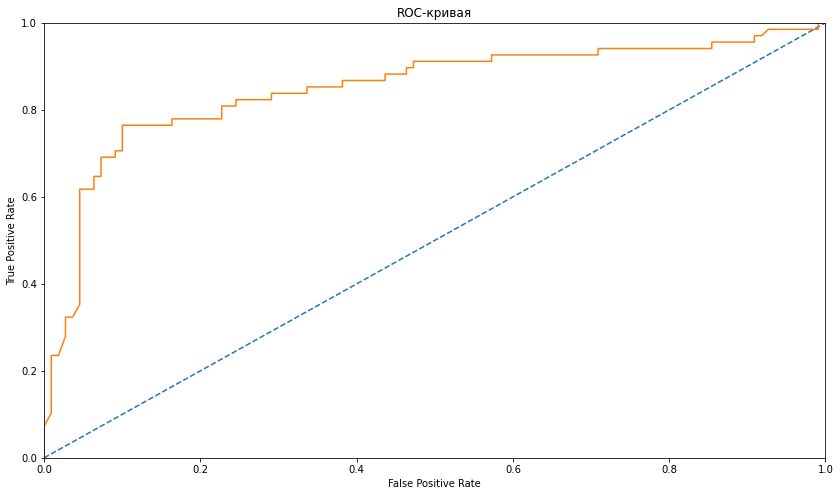

In [47]:
probabilities_valid = best_rfc_est.predict_proba(x_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(y_test,probabilities_one_valid)
print("AUC-ROC = ", round(auc_roc, 2))

fig, ax = plt.subplots(figsize=(14,8))
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

# Вывод

Модель **Случайного леса** показала на тестовых данных результат целевой метрики **roc** в 0.7647